<a href="https://colab.research.google.com/github/harvey-py/COMP3010/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages

In [1]:
# Basics
import numpy as np
import pandas as pd
from scipy import stats
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import os
import time

# Regression
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ML Tools
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# RF
from sklearn.ensemble import RandomForestRegressor

# XGB
import xgboost as xgb
from xgboost import XGBRegressor

# NN
import math
import torch
import torch.nn as nn
import tensorflow
import optuna
import optuna.visualization as opt_vis
import copy

/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Config

In [2]:
# working_dir = "~/Documents/GitHub/COMP3010/Assignment/Data/"

# train_dir = os.path.join(working_dir, "train.csv")
# test_dir = os.path.join(working_dir, "test.csv")

train_dir = "https://raw.githubusercontent.com/harvey-py/COMP3010/main/Assignment/Data/train.csv"
test_dir = "https://raw.githubusercontent.com/harvey-py/COMP3010/main/Assignment/Data/test.csv"

## Importing Data

In [3]:
raw_data = pd.read_csv(train_dir)
raw_data.rename(columns = {"Target Pressure (bar)": "tgt_pressure"}, inplace = True)

In [4]:
raw_test_data = pd.read_csv(test_dir)
raw_test_data.rename(columns = {"Target Pressure (bar)": "tgt_pressure"}, inplace = True)

# Exploratory Analysis

## Variables

In [5]:
raw_data.columns

Index(['ID', 'Tank Failure Pressure (bar)', 'Liquid Ratio (%)',
       'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)',
       'BLEVE Height (m)', 'Vapour Height (m)', 'Vapour Temperature (K)',
       'Liquid Temperature (K)', 'Obstacle Distance to BLEVE (m)',
       'Obstacle Width (m)', 'Obstacle Height (m)', 'Obstacle Thickness (m)',
       'Obstacle Angle', 'Status', 'Liquid Critical Pressure (bar)',
       'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)',
       'Sensor ID', 'Sensor Position Side', 'Sensor Position x',
       'Sensor Position y', 'Sensor Position z', 'tgt_pressure'],
      dtype='object')

In [6]:
raw_data

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
0       3203.0                         7.32              0.42            2.42   
1       3204.0                         7.18              0.42            2.39   
2       3205.0                         7.32              0.41            2.39   
3       3206.0                         7.26              0.42            2.40   
4       3207.0                         7.32              0.42            2.40   
...        ...                          ...               ...             ...   
10045  10244.0                        36.91              0.64            1.58   
10046  12758.0                        16.44              0.55            0.80   
10047   9438.0                        36.26              0.57            2.38   
10048   8689.0                        14.27              0.50            2.21   
10049  10302.0                        35.52              0.63            1.60   

       Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0                 5.39             1.00              1.79               0.60   
1                 5.39             1.01              1.81               0.59   
2                 5.38             1.00              1.78               0.62   
3                 5.41             1.00              1.81               0.61   
4                 5.41             1.02              1.79               0.62   
...                ...              ...               ...                ...   
10045             9.39             0.58              1.01               0.22   
10046             5.58             1.99              1.60               0.82   
10047             2.62             2.80              0.60               1.19   
10048             8.40             2.58              1.62               1.40   
10049             7.21             1.60              1.00               0.59   

       Vapour Temperature (K)  Liquid Temperature (K)  ...       Status  \
0                      524.61                  354.49  ...  Superheated   
1                      522.80                  354.31  ...  Superheated   
2                      523.00                  354.59  ...  Superheated   
3                      522.35                  354.37  ...  Superheated   
4                      522.98                  354.33  ...  Superheated   
...                       ...                     ...  ...          ...   
10045                  442.31                  299.28  ...    Subcooled   
10046                  293.54                  285.02  ...    Subcooled   
10047                  349.75                  418.53  ...    Subcooled   
10048                  288.61                  396.96  ...  Superheated   
10049                  436.28                  309.79  ...    Subcooled   

       Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
0                                37.9                            -1.0   
1                                37.9                            -1.0   
2                                37.9                            -1.0   
3                                37.9                            -1.0   
4                                37.9                            -1.0   
...                               ...                             ...   
10045                            37.9                             NaN   
10046                            37.9                            -1.0   
10047                            37.9                            -1.0   
10048                            37.9                            -1.0   
10049                            42.5                           -42.0   

       Liquid Critical Temperature (K)  Sensor ID Sensor Position Side  \
0                                152.0       18.0                  2.0   
1                                152.0       19.0                  3.0   
2                                152.0       20.0                  3.0   
3   

## Plots

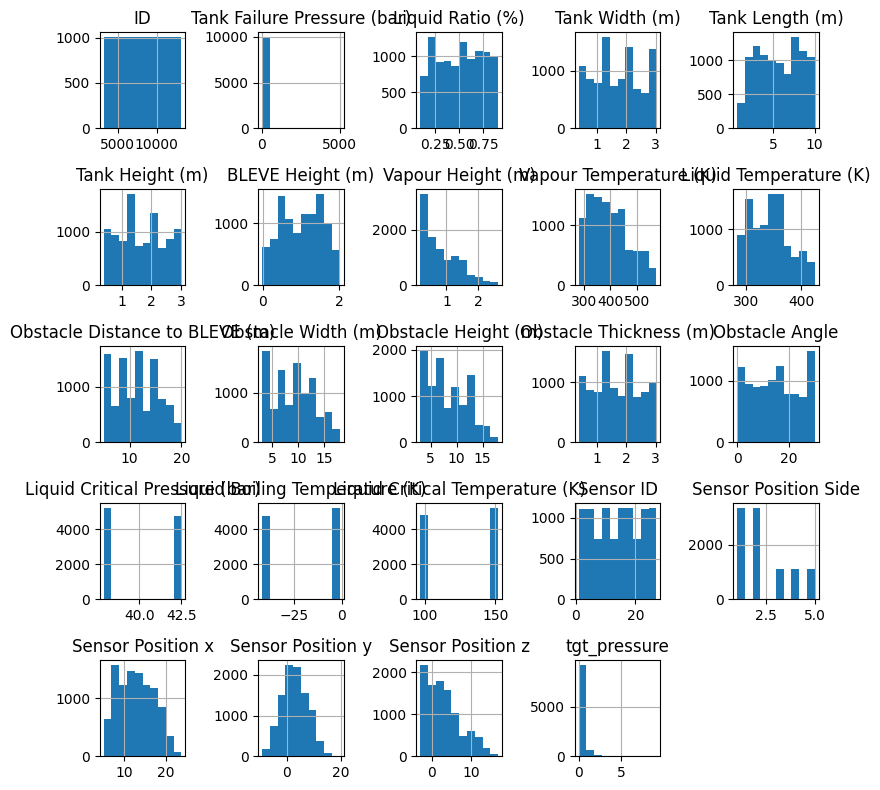

In [7]:
raw_data.hist(figsize = (8,8))
plt.tight_layout()
plt.show()

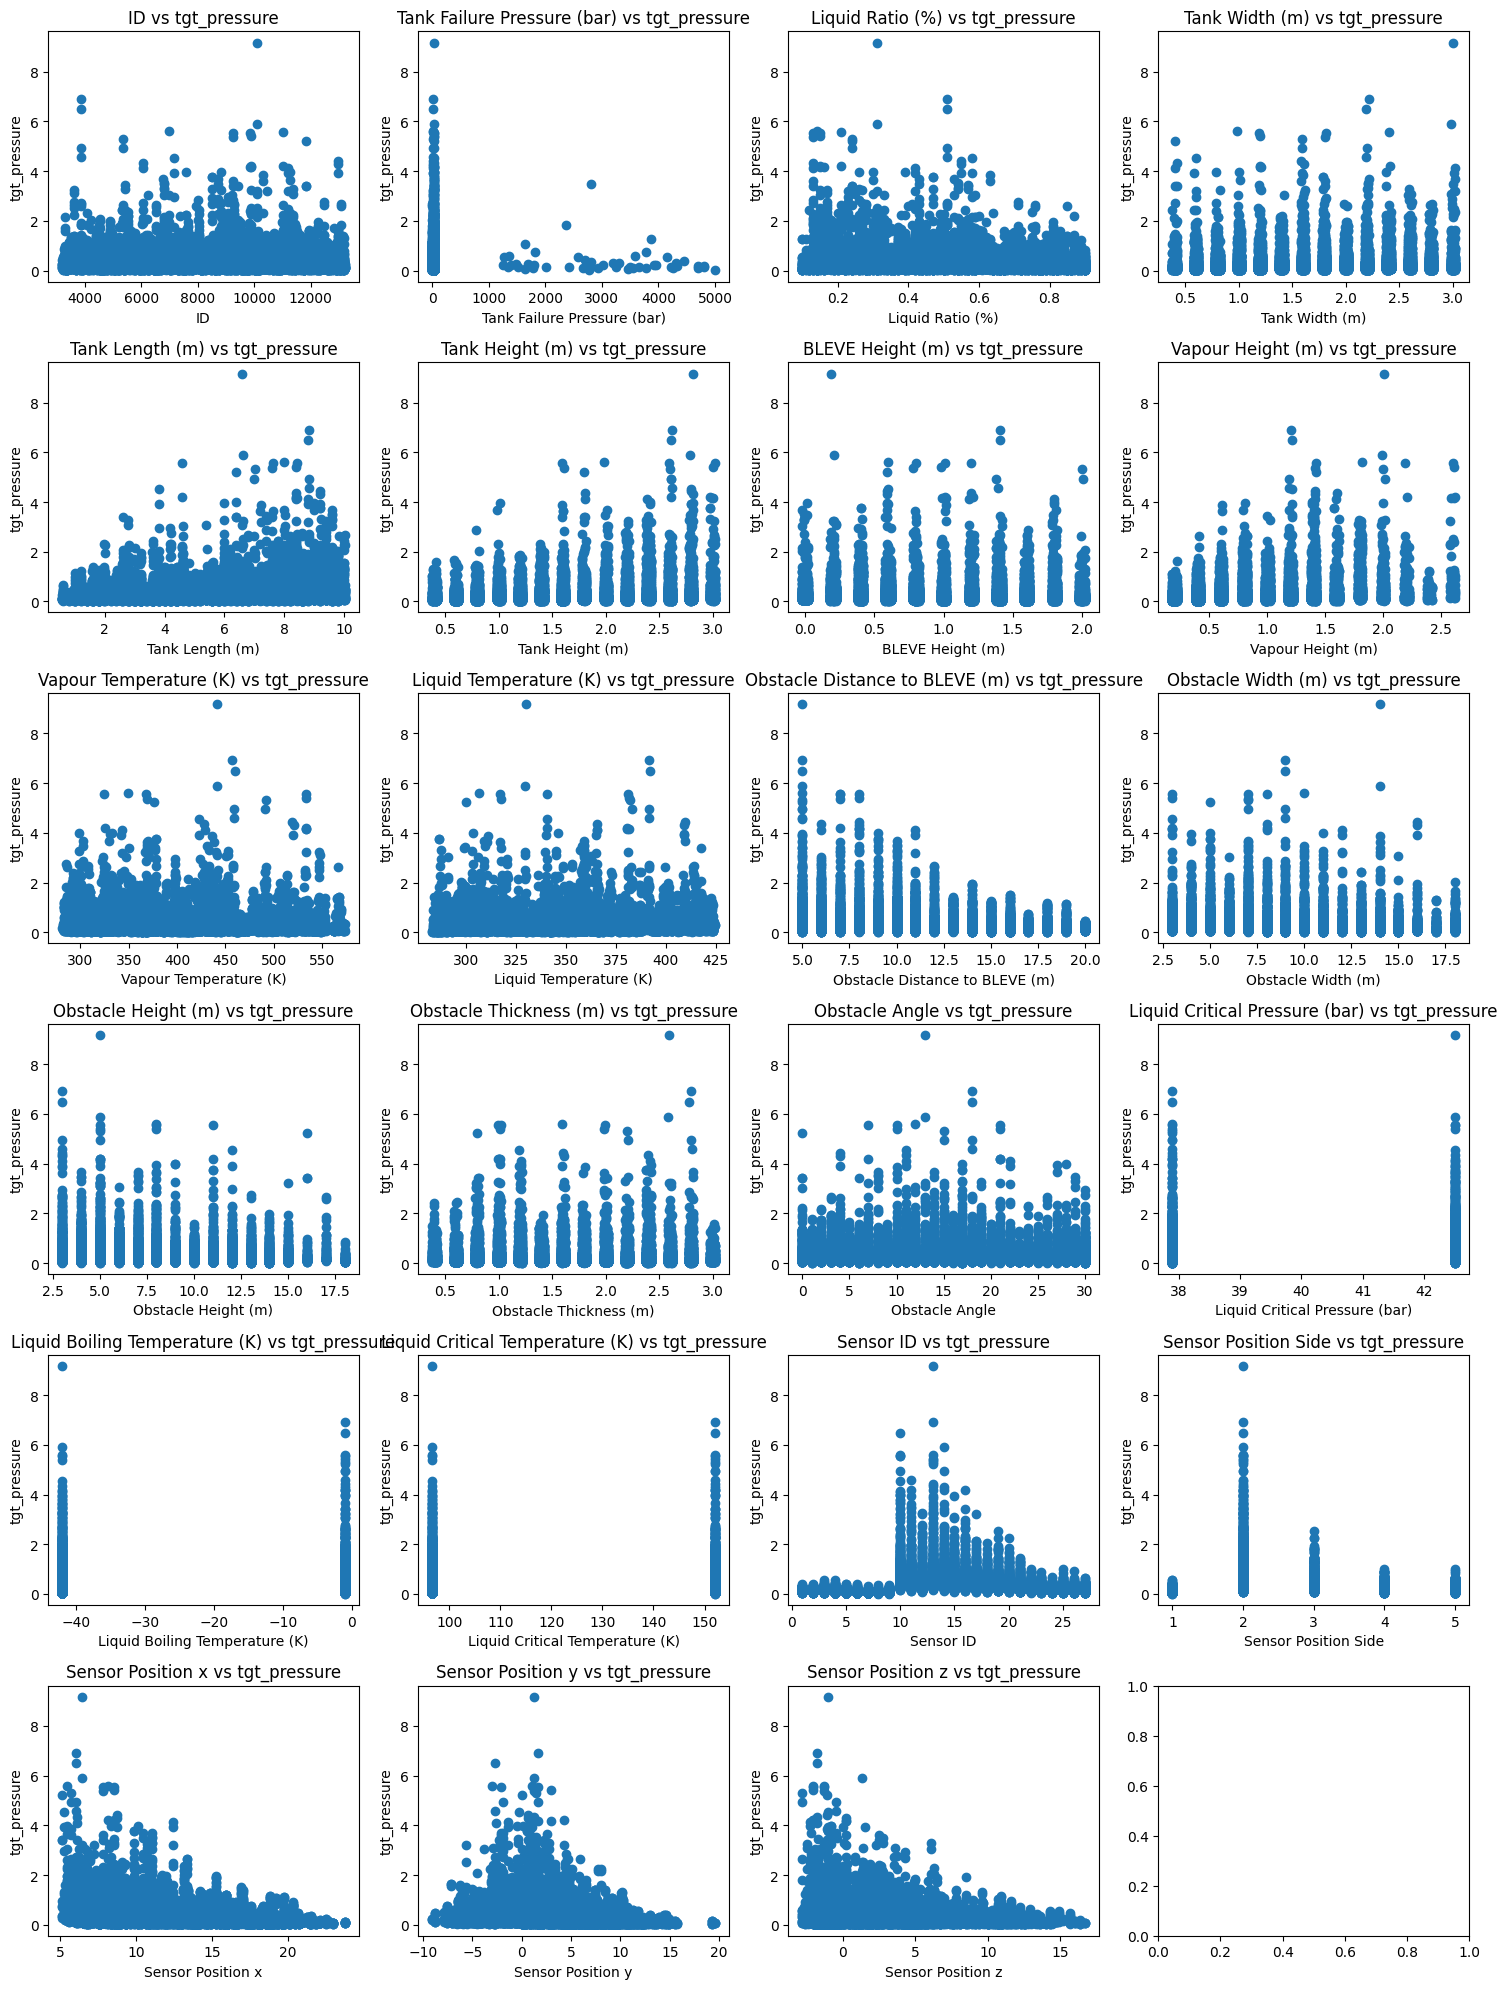

In [8]:
raw_data_num = raw_data.select_dtypes(include=[np.number])

n_cols = 4
n_rows = int(len(raw_data_num.columns) / n_cols) + (len(raw_data_num.columns) % n_cols > 0)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for i, col_name in enumerate(raw_data_num.columns):
    if col_name != "tgt_pressure":
        ax = axs[i//n_cols, i%n_cols]
        ax.scatter(raw_data_num[col_name], raw_data_num["tgt_pressure"])
        ax.set_title(f"{col_name} vs tgt_pressure")
        ax.set_xlabel(col_name)
        ax.set_ylabel("tgt_pressure")

plt.tight_layout()
plt.show()

In [9]:
raw_data_num.corr().style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [10]:
raw_data_num.corr()[["tgt_pressure"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [11]:
raw_data_num["Volume"] = raw_data_num["Tank Length (m)"] * raw_data_num["Tank Height (m)"]

In [12]:
## TURN OFF NIGHT READER WHEN VIEWING CORRPLOTS
raw_data_num.corr()[["tgt_pressure"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

# Data Preprocessing

## Missing Values

In [13]:
raw_nans = raw_data[raw_data.isna().any(axis = 1)]
print(f"{len(raw_nans)} points with NaNs out of {len(raw_data)} ({len(raw_nans)/len(raw_data)*100:.3f}%)")

112 points with NaNs out of 10050 (1.114%)


In [14]:
# 1: Removing NaNs
raw_data1 = raw_data.dropna()

## Outliers

In [15]:
outlier_df = raw_data1.drop("ID", axis = 1).select_dtypes(exclude=['object']).copy()

<Axes: >

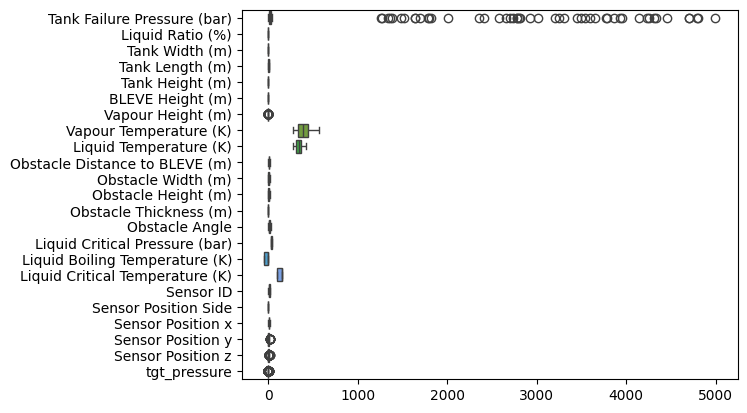

In [16]:
sns.boxplot(outlier_df, orient = "h")

It is apparent that "Tank Failure Pressure" has a large amount of outliers. We'll investigate this further below

In [17]:
outlier_count = len(raw_data1.query("`Tank Failure Pressure (bar)` > 1000"))

In [18]:
outlier_df.sort_values("Tank Failure Pressure (bar)", ascending = False, inplace = True)
display(outlier_df.head())
display(outlier_df.iloc[outlier_count - 3 : outlier_count + 3])

Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
4634                  4995.616406              0.73            1.60   
1401                  4807.927645              0.16            0.81   
1198                  4796.894538              0.53            1.19   
9558                  4703.637237              0.55            0.78   
9375                  4702.296095              0.14            2.81   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
4634             8.02             2.39              0.79               0.59   
1401             1.02             2.00              1.21               1.61   
1198             7.58             2.41              1.38               1.18   
9558             5.62             1.99              1.60               0.79   
9375             1.02             1.59              0.82               1.41   

      Vapour Temperature (K)  Liquid Temperature (K)  \
4634                  362.35                  300.93   
1401                  403.73                  330.31   
1198                  407.90                  306.97   
9558                  293.89                  285.08   
9375                  368.05                  332.95   

      Obstacle Distance to BLEVE (m)  ...  Obstacle Angle  \
4634                            11.0  ...             8.0   
1401                            17.0  ...            28.0   
1198                             8.0  ...            10.0   
9558                            15.0  ...            17.0   
9375                             6.0  ...            15.0   

      Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
4634                            42.5                           -42.0   
1401                            42.5                           -42.0   
1198                            42.5                           -42.0   
9558                            37.9                            -1.0   
9375                            42.5                           -42.0   

      Liquid Critical Temperature (K)  Sensor ID  Sensor Position Side  \
4634                             96.7        8.0                   1.0   
1401                             96.7       15.0                   2.0   
1198                             96.7        1.0                   1.0   
9558                            152.0       18.0                   2.0   
9375                             96.7       24.0                   4.0   

      Sensor Position x  Sensor Position y  Sensor Position z  tgt_pressure  
4634              14.65                7.4                5.4      0.042548  
1401              17.35                9.0                5.8      0.130719  
1198               9.85               -0.4               -1.8      0.177109  
9558              15.35                9.9                3.8      0.177894  
9375               8.40                8.4               10.6      0.120019  

[5 rows x 23 columns]

Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
1738                  1342.242706              0.20            1.21   
2484                  1270.544969              0.85            2.41   
4647                  1257.523808              0.73            1.61   
5690                    42.180000              0.43            1.80   
5696                    42.160000              0.43            1.80   
5700                    42.120000              0.43            1.82   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
1738             6.22             1.01              0.21               0.78   
2484             5.58             2.38              0.18               0.40   
4647             7.98             2.41              0.81               0.62   
5690             9.80             1.40              0.41               0.82   
5696             9.78             1.42              0.39               0.82   
5700             9.79             1.38              0.39               0.78   

      Vapour Temperature (K)  Liquid Temperature (K)  \
1738                  444.49                  405.76   
2484                  357.61                  378.31   
4647                  362.27                  301.04   
5690                  418.83                  297.97   
5696                  419.09                  298.10   
5700                  419.70                  298.00   

      Obstacle Distance to BLEVE (m)  ...  Obstacle Angle  \
1738                             5.0  ...            18.0   
2484                            11.0  ...            18.0   
4647                            11.0  ...             8.0   
5690                            10.0  ...            19.0   
5696                            10.0  ...            19.0   
5700                            10.0  ...            19.0   

      Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
1738                            37.9                            -1.0   
2484                            37.9                            -1.0   
4647                            42.5                           -42.0   
5690                            42.5                           -42.0   
5696                            42.5                           -42.0   
5700                            42.5                           -42.0   

      Liquid Critical Temperature (K)  Sensor ID  Sensor Position Side  \
1738                            152.0        1.0                   1.0   
2484                            152.0       18.0                   2.0   
4647                             96.7       21.0                   3.0   
5690                             96.7       11.0                   2.0   
5696                             96.7       17.0                   2.0   
5700                             96.7       21.0                   3.0   

      Sensor Position x  Sensor Position y  Sensor Position z  tgt_pressure  
1738               8.65              -0.70               -0.4      0.147148  
2484              12.15               5.90                7.4      0.546492  
4647              13.20              -4.45               11.7      0.236112  
5690              10.85               1.60                2.2      1.965685  
5696              10.85               5.20                2.2      1.428485  
5700              12.30               1.35                5.0      0.877835  

[6 rows x 23 columns]

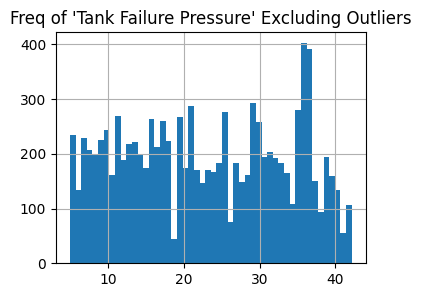



## Smallest 10 values ##


9406    4.92
9422    4.93
9425    4.96
9410    4.97
9417    4.98
9432    5.00
9427    5.00
9421    5.04
5423    5.05
9429    5.06
Name: Tank Failure Pressure (bar), dtype: float64

In [19]:
outlier_df.iloc[outlier_count:]["Tank Failure Pressure (bar)"].hist(bins = 50, figsize = (4,3))
plt.title("Freq of 'Tank Failure Pressure' Excluding Outliers")
plt.show()

print("\n\n## Smallest 10 values ##")
display(outlier_df["Tank Failure Pressure (bar)"].nsmallest(10))

We can see that 1) the outlier values are in the range [1000,5000] and that all the remaining values are roughly between 4 and 40. If we consider for the fact that another popular unit of measurement for pressure, kPa, is 100x the value of bar, these outlier values now make sense and don't appear to be outlier values anymore. Given that these sort of errors are present throughout the data (e.g. use of C instead of K in temperature, mentioned later) and the fact that the rest of the values for these "outlier" data points appear to be reasonable, it appears to be fair to assume that these values are simple recording errors and should be divided by 100, rather than removed.

In [20]:
outlier_df.loc[outlier_df['Tank Failure Pressure (bar)'] > 1000, 'Tank Failure Pressure (bar)'] /= 100

<Axes: >

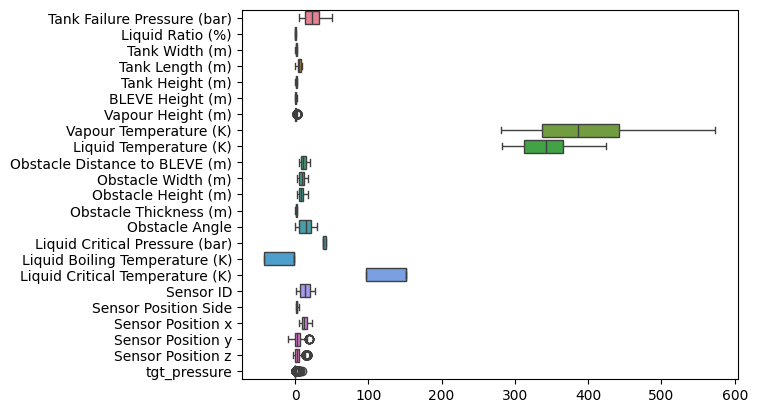

In [21]:
sns.boxplot(outlier_df, orient = "h")

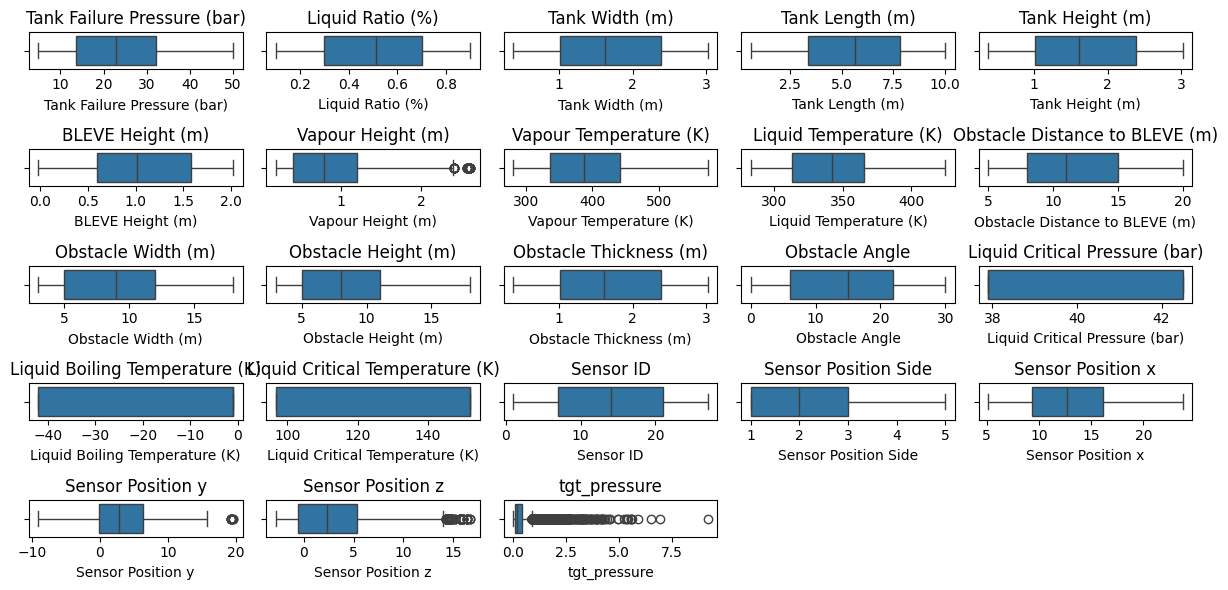

In [22]:
fig, axes = plt.subplots(nrows= 5, ncols=5, figsize=(12, 6))
axes = axes.flatten()

# Plot each boxplot in a separate subplot
for i, column in enumerate(outlier_df.columns):
    sns.boxplot(x=outlier_df[column], ax=axes[i])
    axes[i].set_title(f'{column}')

for j in range(len(outlier_df.columns), len(axes)):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

We can see that most columns do not contain outliers in the strict "1.5 * IQR" sense; only "Vapour Height (m)", "Sensor Position y", "Sensor Position z" and "tgt_pressure" do. Below are the histograms for each of these columns.

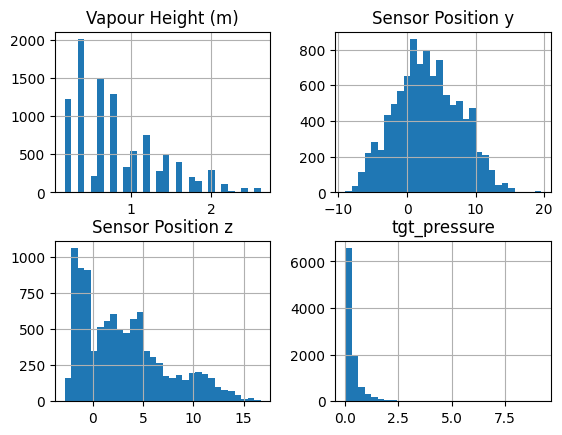

In [23]:
outlier_df[["Vapour Height (m)", "Sensor Position y", "Sensor Position z", "tgt_pressure"]].hist(bins = 30)
plt.show()

In [24]:
outlier_df.query("`Sensor Position y` > 18").sort_index()

Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
5443                         8.90              0.37            1.20   
5444                         8.90              0.37            1.22   
5445                         8.85              0.36            1.22   
5452                         8.88              0.36            1.22   
5453                         8.88              0.37            1.21   
5454                         8.82              0.37            1.19   
5460                         8.99              0.37            1.19   
5461                         8.88              0.37            1.20   
5462                         9.05              0.37            1.18   
5463                         8.82              0.37            1.20   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
5443             3.20             2.21              0.41               1.42   
5444             3.20             2.21              0.39               1.39   
5445             3.20             2.19              0.41               1.41   
5452             3.21             2.21              0.40               1.40   
5453             3.19             2.21              0.42               1.41   
5454             3.19             2.22              0.41               1.42   
5460             3.21             2.22              0.42               1.38   
5461             3.18             2.18              0.41               1.39   
5462             3.21             2.20              0.41               1.39   
5463             3.21             2.20              0.39               1.41   

      Vapour Temperature (K)  Liquid Temperature (K)  \
5443                  352.88                  343.07   
5444                  351.56                  343.28   
5445                  352.50                  342.98   
5452                  351.55                  343.11   
5453                  351.88                  342.87   
5454                  350.64                  343.46   
5460                  351.33                  343.17   
5461                  351.03                  342.86   
5462                  351.57                  343.49   
5463                  351.48                  344.13   

      Obstacle Distance to BLEVE (m)  ...  Obstacle Angle  \
5443                            19.0  ...            30.0   
5444                            19.0  ...            30.0   
5445                            19.0  ...            30.0   
5452                            19.0  ...            30.0   
5453                            19.0  ...            30.0   
5454                            19.0  ...            30.0   
5460                            19.0  ...            30.0   
5461                            19.0  ...            30.0   
5462                            19.0  ...            30.0   
5463                            19.0  ...            30.0   

      Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
5443                            42.5                           -42.0   
5444                            42.5                           -42.0   
5445                            42.5                           -42.0   
5452                            42.5                           -42.0   
5453                            42.5                           -42.0   
5454                            42.5                           -42.0   
5460                            42.5                           -42.0   
5461                            42.5                           -42.0   
5462                            42.5                           -42.0   
5463                            42.5                           -42.0   

      Liquid Critical Temperature (K)  Sensor ID  Sensor Position Side  \
5443                             96.7        7.0                   1.0   
5444                             96.7        8.0                   1.0   
5445                             96.7        9.0  

We can see that the first 3 variables distributions appear to be normal. It appears that all the outlier values for "Sensor Position y" come from the same event, so the "outliers" appear to instead be reasonable values that should not be excluded from our data. 

However, the data for tgt_pressure appears to be more prone to outliers (as there is a large gap in the middle and right of the graph). This is looked into further below

<Axes: >

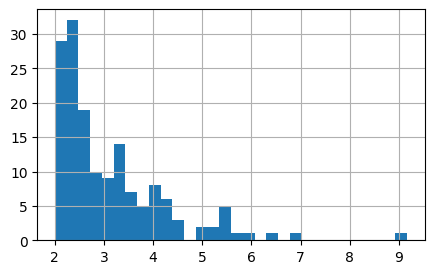

In [25]:
outlier_df.query("`tgt_pressure` > 2")["tgt_pressure"].hist(bins = 30, figsize = (5,3))

In [26]:
outlier_df.sort_values("tgt_pressure", ascending = False).head(10).T

6907        670         667   \
Tank Failure Pressure (bar)       26.150000   25.570000   25.600000   
Liquid Ratio (%)                   0.310000    0.510000    0.510000   
Tank Width (m)                     3.000000    2.220000    2.190000   
Tank Length (m)                    6.580000    8.810000    8.780000   
Tank Height (m)                    2.820000    2.620000    2.610000   
BLEVE Height (m)                   0.190000    1.410000    1.410000   
Vapour Height (m)                  2.010000    1.200000    1.210000   
Vapour Temperature (K)           440.780000  456.360000  459.640000   
Liquid Temperature (K)           329.900000  391.820000  391.920000   
Obstacle Distance to BLEVE (m)     5.000000    5.000000    5.000000   
Obstacle Width (m)                14.000000    9.000000    9.000000   
Obstacle Height (m)                5.000000    3.000000    3.000000   
Obstacle Thickness (m)             2.590000    2.800000    2.780000   
Obstacle Angle                    13.000000   18.000000   18.000000   
Liquid Critical Pressure (bar)    42.500000   37.900000   37.900000   
Liquid Boiling Temperature (K)   -42.000000   -1.000000   -1.000000   
Liquid Critical Temperature (K)   96.700000  152.000000  152.000000   
Sensor ID                         13.000000   13.000000   10.000000   
Sensor Position Side               2.000000    2.000000    2.000000   
Sensor Position x                  6.450000    6.050000    6.050000   
Sensor Position y                  1.200000    1.600000   -2.700000   
Sensor Position z                 -1.000000   -1.800000   -1.800000   
tgt_pressure                       9.170477    6.916218    6.492666   

                                       6908        3775        7822  \
Tank Failure Pressure (bar)       26.270000   15.510000   18.080000   
Liquid Ratio (%)                   0.310000    0.140000    0.210000   
Tank Width (m)                     2.980000    0.980000    2.400000   
Tank Length (m)                    6.610000    7.990000    4.590000   
Tank Height (m)                    2.790000    1.980000    2.590000   
BLEVE Height (m)                   0.210000    0.600000    1.200000   
Vapour Height (m)                  1.990000    1.820000    2.190000   
Vapour Temperature (K)           440.770000  348.900000  323.970000   
Liquid Temperature (K)           329.350000  306.300000  340.390000   
Obstacle Distance to BLEVE (m)     5.000000    5.000000    7.000000   
Obstacle Width (m)                14.000000   10.000000    8.000000   
Obstacle Height (m)                5.000000    8.000000   11.000000   
Obstacle Thickness (m)             2.580000    1.590000    0.990000   
Obstacle Angle                    13.000000   12.000000    7.000000   
Liquid Critical Pressure (bar)    42.500000   37.900000   42.500000   
Liquid Boiling Temperature (K)   -42.000000   -1.000000  -42.000000   
Liquid Critical Temperature (K)   96.700000  152.000000   96.700000   
Sensor ID                         14.000000   13.000000   10.000000   
Sensor Position Side               2.000000    2.000000    2.000000   
Sensor Position x                  6.450000    5.450000    8.150000   
Sensor Position y                  1.200000    1.000000   -3.000000   
Sensor Position z                  1.300000   -1.300000   -2.100000   
tgt_pressure                       5.893072    5.597202    5.571707   

                                       6661        6040        6664  \
Tank Failure Pressure (bar)       26.640000   34.130000   26.710000   
Liquid Ratio (%)                   0.150000    0.130000    0.150000   
Tank Width (m)                     1.190000    1.820000    1.200000   
Tank Length (m)                    8.420000    7.610000    8.400000   
Tank Height (m)                    3.020000    1.590000    3.000000   
BLEVE Height (m)                   1.010000    0.800000    0.980000   
Vapour Height (m)                  2.600000    1.420000    2.610000   
Vapour Temperature (K)           532.950000  368.170000  532.

This data doesn't appear to be too unreasonable - they instead appear to be natural variations in the data, notably when the "tank volume" is large - arguably aside from the value of 9.

In [27]:
outlier_df.sort_index(inplace = True)
outlier_df.loc[6904:6910][["Sensor ID", "tgt_pressure"]].T

6904       6905       6906       6907       6908      6909  \
Sensor ID     10.000000  11.000000  12.000000  13.000000  14.000000  15.00000   
tgt_pressure   3.221491   2.524463   1.529262   9.170477   5.893072   3.08953   

                   6910  
Sensor ID     16.000000  
tgt_pressure   2.263237

Whilst the value of 9.17 from sensor 13 does appear to be quite large, we must consider that it's 1) in the front and middle of the obstacle, and 2) the surrounding 3 sensors (10, 14 and 16) also have abnormally large tgt_pressure values (of 3.22, 5.89 and 2.26 respectively). There is thus not considerable doubt that this value is erroneous, or influenced by measurement error, errors when entering data, poor sampling etc. and so it will not be removed.

In [28]:
# Unused
def remove_outliers_IQR(df, cols, quantile = 0.25, mult = 1.5):
    for col in cols:
        Q1 = df[col].quantile(quantile)
        Q3 = df[col].quantile(1-quantile)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - mult * IQR
        upper_bound = Q3 + mult * IQR

        n_prior = len(df)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        n_after = len(df)
        
        print(f"##### {col} #####\nBounds: {lower_bound:.5f} - {upper_bound:.5f} (IQR: {IQR:.5f})\nn(removed): {n_prior - n_after}\n")
        
    return df

# raw_data2 = remove_outliers_IQR(raw_data1, ["Tank Failure Pressure (bar)"])

In [29]:
raw_data2 = raw_data1.sort_values("ID").reset_index(drop = True).copy()
raw_data2.loc[raw_data2['Tank Failure Pressure (bar)'] > 1000, 'Tank Failure Pressure (bar)'] /= 100

## Data Encoding

In [30]:
# 3.1: Encoding Status Column
raw_data2["Status"].unique()

array(['Superheated', 'Subcooled', 'Subcool', 'subcooled', 'superheated',
       'Subcoled', 'Superheat', 'Saperheated'], dtype=object)

In [31]:
raw_data2.loc[raw_data2['Status'].str.contains('sub|cool', case=False), 'Status'] = 'Subcooled'
raw_data2.loc[raw_data2['Status'].str.contains('super|heat', case=False), 'Status'] = 'Superheated'

In [32]:
raw_data2["Status"].unique()

array(['Superheated', 'Subcooled'], dtype=object)

In [33]:
temp = pd.concat([raw_data2, pd.get_dummies(raw_data2['Status'], drop_first=True).astype(int)], axis=1)
raw_data3 = temp.drop(columns = "Status").rename(columns = {"Superheated": "Superheated_status"})

temp = pd.concat([raw_test_data, pd.get_dummies(raw_test_data['Status'], drop_first=True).astype(int)], axis=1)
raw_test_data2 = temp.drop(columns = "Status").rename(columns = {"Superheated": "Superheated_status"})

In [34]:
raw_data2[["Liquid Critical Pressure (bar)", "Liquid Boiling Temperature (K)", "Liquid Critical Temperature (K)"]].drop_duplicates()

Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
0                             37.9                            -1.0   
63                            42.5                           -42.0   

    Liquid Critical Temperature (K)  
0                             152.0  
63                             96.7

In [35]:
dummies = pd.get_dummies(raw_data3['Liquid Critical Pressure (bar)'], drop_first=False)
dummies.columns = ['37.9', '42.5']
dummy_col = dummies['42.5'].rename(f"Liquid Critical Pressure (bar)") * 1
raw_data3 = pd.concat([raw_data3.drop('Liquid Critical Pressure (bar)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_data3['Liquid Boiling Temperature (K)'], drop_first=False)
dummies.columns = ['-42', '-1']
dummy_col = dummies['-42'].rename(f"Liquid Boiling Temperature (K)") * 1
raw_data3 = pd.concat([raw_data3.drop('Liquid Boiling Temperature (K)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_data3['Liquid Critical Temperature (K)'], drop_first=False)
dummies.columns = ['152.0', '96.7']
dummy_col = dummies['152.0'].rename(f"Liquid Critical Temperature (K)") * 1
raw_data3 = pd.concat([raw_data3.drop('Liquid Critical Temperature (K)', axis=1), dummy_col], axis=1)

In [36]:
dummies = pd.get_dummies(raw_test_data2['Liquid Critical Pressure (bar)'], drop_first=False)
dummies.columns = ['37.9', '42.5']
dummy_col = dummies['42.5'].rename(f"Liquid Critical Pressure (bar)") * 1
raw_test_data2 = pd.concat([raw_test_data2.drop('Liquid Critical Pressure (bar)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_test_data2['Liquid Boiling Temperature (K)'], drop_first=False)
dummies.columns = ['-42', '-1']
dummy_col = dummies['-42'].rename(f"Liquid Boiling Temperature (K)") * 1
raw_test_data2 = pd.concat([raw_test_data2.drop('Liquid Boiling Temperature (K)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_test_data2['Liquid Critical Temperature (K)'], drop_first=False)
dummies.columns = ['152.0', '96.7']
dummy_col = dummies['152.0'].rename(f"Liquid Critical Temperature (K)") * 1
raw_test_data2 = pd.concat([raw_test_data2.drop('Liquid Critical Temperature (K)', axis=1), dummy_col], axis=1)

In [37]:
# Creating a lookup for the properties of each substance (there are only 2 distinct substance present; we will denote them 0 and 1). This table will allow us to view their properties later
substance_properties = raw_data2[["Liquid Critical Pressure (bar)", "Liquid Boiling Temperature (K)", "Liquid Critical Temperature (K)"]].drop_duplicates()
substance_properties = substance_properties.rename(index = {substance_properties.index[0]: "n-butane", substance_properties.index[1]: "propane"})

In [38]:
substance_properties

Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
n-butane                            37.9                            -1.0   
propane                             42.5                           -42.0   

          Liquid Critical Temperature (K)  
n-butane                            152.0  
propane                              96.7

## 'Events'

Before we continue, we should establish that the data is grouped into indiviudal explosions. 

Looking at the below example, we can clearly see that the first 4 below belong to the same explosion due to the similarity in values (especially the substance properties), they are just measurements from different sensors - and likewise for the last 4 measurements.

In [39]:
raw_data4 = raw_data3.copy()

In [40]:
raw_data4.iloc[33:41]

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
33  3236.0                        30.64              0.81            1.59   
34  3237.0                        30.59              0.81            1.59   
35  3238.0                        30.46              0.80            1.60   
36  3239.0                        30.59              0.80            1.59   
37  3240.0                        24.11              0.66            2.78   
38  3241.0                        24.05              0.66            2.81   
39  3242.0                        24.14              0.66            2.80   
40  3243.0                        23.90              0.65            2.81   

    Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
33             4.41             0.80              1.19               0.20   
34             4.39             0.78              1.20               0.18   
35             4.42             0.79              1.20               0.21   
36             4.42             0.79              1.18               0.19   
37             8.38             0.78              1.60               0.19   
38             8.38             0.78              1.58               0.21   
39             8.41             0.81              1.61               0.18   
40             8.40             0.81              1.62               0.20   

    Vapour Temperature (K)  Liquid Temperature (K)  ...  Sensor ID  \
33                  363.59                  407.41  ...       24.0   
34                  363.66                  407.68  ...       25.0   
35                  363.64                  407.02  ...       26.0   
36                  364.08                  407.56  ...       27.0   
37                  461.49                  363.16  ...        1.0   
38                  461.70                  363.94  ...        2.0   
39                  462.31                  363.63  ...        3.0   
40                  461.80                  363.41  ...        4.0   

    Sensor Position Side  Sensor Position x  Sensor Position y  \
33                   4.0              10.30               4.40   
34                   5.0              10.30               4.65   
35                   5.0              10.30               4.65   
36                   5.0              10.30               4.65   
37                   1.0              20.05               1.40   
38                   1.0              20.05               1.40   
39                   1.0              20.05               1.40   
40                   1.0              20.05               4.20   

    Sensor Position z  tgt_pressure  Superheated_status  \
33               12.8      0.102690                   0   
34               -1.1      0.149726                   0   
35                5.7      0.100412                   0   
36               12.5      0.103633                   0   
37               -1.5      0.076563                   0   
38                1.3      0.077139                   0   
39                4.1      0.105216                   0   
40               -1.5      0.055952                   0   

    Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
33                               0                               0   
34                               0                               0   
35                               0                               0   
36                               0                               0   
37                               0                               0   
38                               0                               0   
39                               0                               0   
40                               0                               0   

    Liquid Critical Temperature (K)  
33                                0  
34                                0  
35                                0  
36                                0  
37                                0  
38 

It however makes no sense that values which should be constant (e.g. "tank width") are different between measurements. This would be artificially induced noise that will be removed for the sake of consistency. This noise also leads to nonsensical values - for example, where the "Vapour Height" (the height of the vapour in the tank) exceeds the "Tank Height" as can be seen below.

In [41]:
raw_data4.query("`Tank Height (m)` < `Vapour Height (m)`")[["Vapour Height (m)","Tank Height (m)"]].head()

Vapour Height (m)  Tank Height (m)
1353               0.82             0.80
1355               0.82             0.81
1361               0.81             0.78
1364               0.81             0.79
1365               0.82             0.79

To deal with this, we'll separate the data points into their separate events by adding an "event_num". We'll then set the value of appropriate parameters to the median of all the different values for that event - we'll avoid using mean as this is prone to outliers.

In [42]:
event_num = 1
prev_id = raw_data4.loc[0, "Sensor ID"]

event_nums = []

for index, row in raw_data4.iterrows():
    curr_id = row["Sensor ID"]
    if curr_id < prev_id:
        event_num += 1 
    
    event_nums.append(event_num)
    prev_id = curr_id

raw_data4.loc[:,"event_num"] = event_nums

We will now remove the noise from the columns which should be the same across events

In [43]:
raw_data4.T

0            1            2     \
ID                               3203.000000  3204.000000  3205.000000   
Tank Failure Pressure (bar)         7.320000     7.180000     7.320000   
Liquid Ratio (%)                    0.420000     0.420000     0.410000   
Tank Width (m)                      2.420000     2.390000     2.390000   
Tank Length (m)                     5.390000     5.390000     5.380000   
Tank Height (m)                     1.000000     1.010000     1.000000   
BLEVE Height (m)                    1.790000     1.810000     1.780000   
Vapour Height (m)                   0.600000     0.590000     0.620000   
Vapour Temperature (K)            524.610000   522.800000   523.000000   
Liquid Temperature (K)            354.490000   354.310000   354.590000   
Obstacle Distance to BLEVE (m)     11.000000    11.000000    11.000000   
Obstacle Width (m)                 11.000000    11.000000    11.000000   
Obstacle Height (m)                13.000000    13.000000    13.000000   
Obstacle Thickness (m)              0.620000     0.620000     0.600000   
Obstacle Angle                     13.000000    13.000000    13.000000   
Sensor ID                          18.000000    19.000000    20.000000   
Sensor Position Side                2.000000     3.000000     3.000000   
Sensor Position x                  12.150000    12.500000    12.500000   
Sensor Position y                   7.900000    -2.950000    -2.950000   
Sensor Position z                  10.700000    -1.900000     4.400000   
tgt_pressure                        0.199929     0.435681     0.264031   
Superheated_status                  1.000000     1.000000     1.000000   
Liquid Critical Pressure (bar)      0.000000     0.000000     0.000000   
Liquid Boiling Temperature (K)      0.000000     0.000000     0.000000   
Liquid Critical Temperature (K)     0.000000     0.000000     0.000000   
event_num                           1.000000     1.000000     1.000000   

                                        3            4            5     \
ID                               3206.000000  3207.000000  3208.000000   
Tank Failure Pressure (bar)         7.260000     7.320000     7.220000   
Liquid Ratio (%)                    0.420000     0.420000     0.410000   
Tank Width (m)                      2.400000     2.400000     2.390000   
Tank Length (m)                     5.410000     5.410000     5.400000   
Tank Height (m)                     1.000000     1.020000     0.990000   
BLEVE Height (m)                    1.810000     1.790000     1.810000   
Vapour Height (m)                   0.610000     0.620000     0.590000   
Vapour Temperature (K)            522.350000   522.980000   523.300000   
Liquid Temperature (K)            354.370000   354.330000   354.220000   
Obstacle Distance to BLEVE (m)     11.000000    11.000000    11.000000   
Obstacle Width (m)                 11.000000    11.000000    11.000000   
Obstacle Height (m)                13.000000    13.000000    13.000000   
Obstacle Thickness (m)              0.600000     0.620000     0.590000   
Obstacle Angle                     13.000000    13.000000    13.000000   
Sensor ID                          21.000000    22.000000    23.000000   
Sensor Position Side                3.000000     4.000000     4.000000   
Sensor Position x                  12.500000    12.500000    12.500000   
Sensor Position y                  -2.950000    -2.700000     2.600000   
Sensor Position z                  10.700000    11.000000    11.000000   
tgt_pressure                        0.270576     0.204675     0.118211   
Superheated_status                  1.000000     1.000000     1.000000   
Liquid Critical Pressure (bar)      0.000000     0.000000     0.000000   
Liquid Boiling Temperature (K)      0.000000     0.000000     0.000000   
Liquid Critical Temperature (K)     0.000000     0.000000     0.000000   
event_num                           1.000000     1.000000     1.000000   

                                        6 

In [44]:
changing_cols = ['ID', 
                 'Sensor ID', 
                 'Sensor Position Side', 
                 'Sensor Position x', 
                 'Sensor Position y', 
                 'Sensor Position z', 
                 'tgt_pressure', 
                 'event_num']

In [45]:
constant_cols = raw_data4.columns[~raw_data4.columns.isin(changing_cols)]
event_medians = raw_data4.groupby('event_num')[constant_cols].median().reset_index()

# Merge aggregated data back to the original DataFrame based on 'event_num'
raw_data5 = pd.merge(raw_data4[changing_cols],
                       event_medians,
                       on='event_num',
                     )

raw_data5 = raw_data5[raw_data4.columns]

Whilst noise might have been added to a few columns in the dataframe, this is not present in the liquid's properties and thus the value for this should be constant for an event - if these values change, it implies that there is a different substance being used, which implies greater issues with the data or our processing of it. We will check for this below.

In [46]:
check_cols = [
    "Liquid Critical Pressure (bar)",
    "Liquid Boiling Temperature (K)",
    "Liquid Critical Temperature (K)"
]

inconsistent_trials = []
for event_num, group_data in raw_data4.groupby('event_num'):
    group_values = group_data[check_cols].values
    
    if not all(all(val == 1 for val in row) or all(val == 0 for val in row) for row in group_values):
        inconsistent_trials.append(event_num)

print(f"Event_num values with inconsistent values: {inconsistent_trials}")

Event_num values with inconsistent values: []


Thankfully, we can see that each event has the same substance for each of the 27 odd data points, thus there is no issue we need to address.

## Incorrect Values

### Negative and 0 Values

In [47]:
raw_data5

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
0      3203.0                        7.320              0.42           2.395   
1      3204.0                        7.320              0.42           2.395   
2      3205.0                        7.320              0.42           2.395   
3      3206.0                        7.320              0.42           2.395   
4      3207.0                        7.320              0.42           2.395   
...       ...                          ...               ...             ...   
9933  13199.0                       18.285              0.57           2.000   
9934  13200.0                       18.285              0.57           2.000   
9935  13201.0                       18.285              0.57           2.000   
9936  13201.0                       18.285              0.57           2.000   
9937  13202.0                       18.285              0.57           2.000   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0                5.40              1.0             1.790              0.605   
1                5.40              1.0             1.790              0.605   
2                5.40              1.0             1.790              0.605   
3                5.40              1.0             1.790              0.605   
4                5.40              1.0             1.790              0.605   
...               ...              ...               ...                ...   
9933             7.19              1.0             0.205              0.400   
9934             7.19              1.0             0.205              0.400   
9935             7.19              1.0             0.205              0.400   
9936             7.19              1.0             0.205              0.400   
9937             7.19              1.0             0.205              0.400   

      Vapour Temperature (K)  Liquid Temperature (K)  ...  \
0                    522.915                  354.43  ...   
1                    522.915                  354.43  ...   
2                    522.915                  354.43  ...   
3                    522.915                  354.43  ...   
4                    522.915                  354.43  ...   
...                      ...                     ...  ...   
9933                 540.390                  319.20  ...   
9934                 540.390                  319.20  ...   
9935                 540.390                  319.20  ...   
9936                 540.390                  319.20  ...   
9937                 540.390                  319.20  ...   

      Sensor Position Side  Sensor Position x  Sensor Position y  \
0                      2.0              12.15               7.90   
1                      3.0              12.50              -2.95   
2                      3.0              12.50              -2.95   
3                      3.0              12.50              -2.95   
4                      4.0              12.50              -2.70   
...                    ...                ...                ...   
9933                   4.0              16.10               6.60   
9934                   5.0              16.10               6.85   
9935                   5.0              16.10               6.85   
9936                   5.0              16.10               6.85   
9937                   5.0              16.10               6.85   

      Sensor Position z  tgt_pressure  Superheated_status  \
0                  10.7      0.199929                 1.0   
1                  -1.9      0.435681                 1.0   
2                   4.4      0.264031                 1.0   
3                  10.7      0.270576                 1.0   
4                  11.0      0.204675                 1.0   
...                 ...           ...                 ...   
9933               14.7      0.116293                 0.0   
9934               -0.2      0.112795                 0.0   
99

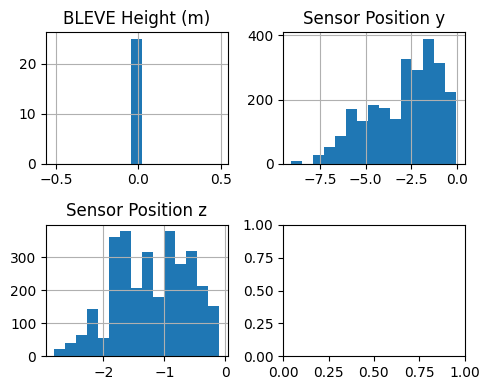

In [48]:
n_cols = 2
n_rows = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*2.5, n_rows*2))

i = 0
for var in raw_data5.columns:
    temp = raw_data5[raw_data5[var] < 0]
    
    if not temp.empty:
        ax = axs[i//n_cols, i%n_cols]
        temp[var].hist(bins=15, ax = ax)
        ax.set_title(f'{var}')
        i += 1

plt.tight_layout()

In [49]:
raw_data5["Liquid Boiling Temperature (K)"].unique()

array([0., 1.])

Note that the "BLEVE Height (m)" is "the distance of the tank to the ground (in meter)" [sic]. After confirming with the source of the data that this can not be negative, we must remove it from our data.

Additionally, the "Liquid Boiling Temperature" is in Kelvin, however, all values in our set are negative (which is impossible as Kelvin is an absolute scale). Whilst this appears to be invalid, we'll discuss in 2.6.6 how this is actually just a mistake in the recording of data

In [50]:
raw_data5["BLEVE Height (m)"] = raw_data5["BLEVE Height (m)"].clip(lower = 0)

### Others

The height of vapour in the tank should not exceed the height of the tank itself

In [51]:
raw_data5.loc[raw_data5["Tank Height (m)"] < raw_data5["Vapour Height (m)"]].head(10)[["Tank Height (m)","Vapour Height (m)"]]

Tank Height (m)  Vapour Height (m)
3413             0.59                0.6
3414             0.59                0.6
3415             0.59                0.6
3416             0.59                0.6
3417             0.59                0.6
3418             0.59                0.6
3419             0.59                0.6
3420             0.59                0.6
3421             0.59                0.6
3422             0.59                0.6

In [52]:
raw_data6 = raw_data5.query("`Tank Height (m)` >= `Vapour Height (m)`")

## Duplicates

In [53]:
# 4: Removing Duplicates
display(raw_data6[raw_data6.duplicated(keep=False)].sort_values(by=raw_data5.columns.tolist()))

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
186    3392.0                       21.090              0.67           1.600   
187    3392.0                       21.090              0.67           1.600   
461    3669.0                       34.910              0.69           2.195   
462    3669.0                       34.910              0.69           2.195   
760    3972.0                       36.875              0.58           2.590   
...       ...                          ...               ...             ...   
9213  12477.0                       31.275              0.28           3.000   
9493  12758.0                       16.390              0.55           0.810   
9494  12758.0                       16.390              0.55           0.810   
9935  13201.0                       18.285              0.57           2.000   
9936  13201.0                       18.285              0.57           2.000   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
186              4.20             1.19             1.000               0.40   
187              4.20             1.19             1.000               0.40   
461              4.20             0.60             1.800               0.20   
462              4.20             0.60             1.800               0.20   
760              3.40             2.60             1.205               1.01   
...               ...              ...               ...                ...   
9213             2.61             2.80             0.800               2.00   
9493             5.61             2.00             1.600               0.80   
9494             5.61             2.00             1.600               0.80   
9935             7.19             1.00             0.205               0.40   
9936             7.19             1.00             0.205               0.40   

      Vapour Temperature (K)  Liquid Temperature (K)  ...  \
186                  411.370                 286.875  ...   
187                  411.370                 286.875  ...   
461                  314.120                 347.740  ...   
462                  314.120                 347.740  ...   
760                  331.050                 286.950  ...   
...                      ...                     ...  ...   
9213                 568.335                 315.290  ...   
9493                 293.410                 284.460  ...   
9494                 293.410                 284.460  ...   
9935                 540.390                 319.200  ...   
9936                 540.390                 319.200  ...   

      Sensor Position Side  Sensor Position x  Sensor Position y  \
186                    2.0              15.75              12.20   
187                    2.0              15.75              12.20   
461                    5.0              16.80               2.65   
462                    5.0              16.80               2.65   
760                    1.0              19.95               8.20   
...                    ...                ...                ...   
9213                   1.0              16.35               3.80   
9493                   2.0              15.35               4.60   
9494                   2.0              15.35               4.60   
9935                   5.0              16.10               6.85   
9936                   5.0              16.10               6.85   

      Sensor Position z  tgt_pressure  Superheated_status  \
186                13.6      0.105344                 0.0   
187                13.6      0.105344                 0.0   
461                -1.7      0.131426                 0.0   
462                -1.7      0.131426                 0.0   
760                -1.5      0.083324                 0.0   
...                 ...           ...                 ...   
9213               -1.6      0.142715                 0.0   
9493                3.8      0.294822                 0.0   
94

In [54]:
raw_data7 = raw_data6.drop_duplicates()
print(f"Data dropped: {len(raw_data6) - len(raw_data7)}")

Data dropped: 48


In [55]:
len(raw_data7)

9811

## Major Edits

We will split the data into train, validation and test sets before analysing the data (so we can test our hypotheses locally before submitting them for assessment). However, before we do this, we'll do perform any changes that apply to all datasets here (so we don't have to add them to each dataset separately). This mainly includes renaming the columns to something more friendly for analysis (i.e. snake_case), as well as adding features that we'll explore later.

### Variable Renaming

In [56]:
renamed_cols = [
    "ID",
    "failure_pressure",
    "liquid_pct",
    "tank_w",
    "tank_l",
    "tank_h",
    "BLEVE_h",
    "vapour_height",
    "vapour_temp",
    "liquid_temp",
    "obstacle_dist",
    "obstacle_w",
    "obstacle_h",
    "obstacle_thk",
    "obstacle_angle",
    "sensor_id",
    "sensor_side",
    "sensor_x",
    "sensor_y",
    "sensor_z",
    "tgt_pressure",
    "superheated_status",
    "lqd_crit_pressure",
    "lqd_boil_temp",
    "lqd_crit_temp",
    "event_num",
    "tank_volume",
    "net_sensor_dist"
]

In [57]:
dict_names = dict(zip(raw_data7.columns, renamed_cols))

raw_data8 = raw_data7.rename(columns = dict_names)

In [58]:
raw_test_data3 = raw_test_data2.rename(columns = dict_names)

### Feature Addition

Immediately we can see that many of our variables relate to each other
* E.g. we have tank height, length and width, which suggest that we should create a variable for the tank volume.
* Also, we have the location of sensors. This is quite important, but we can group sensors by "front", "back" and "side" (rather than looking at them individually)
* Furthermore, we can try convert the sensor's position into a distance metric

In [59]:
tank_axis = ["tank_w", "tank_h", "tank_l"]
raw_data8["tank_volume"] = raw_data8[tank_axis].prod(axis = 1)
# raw_data8.drop(columns = tank_axis, inplace = True)

raw_data8["sensor_location"] = raw_data8["sensor_side"].map({1: 1, 2: 2, 3: 3, 4: 3, 5: 3}) # changes 4 and 5 (both sides) to 3 (1 = back, 2 = front, 3 = sides)

sensor_vars = ["sensor_x", "sensor_y", "net_z"]
raw_data8["net_z"] = raw_data8["sensor_z"] - raw_data8["BLEVE_h"]
raw_data8["net_sensor_dist"] = np.linalg.norm(raw_data8[sensor_vars], axis=1)
sensor_vars.append("sensor_z")
raw_data8.drop(columns = sensor_vars, inplace = True)

lqd_properties = ["lqd_crit_pressure", "lqd_boil_temp", "lqd_crit_temp"]
raw_data8["substance"] = raw_data8[lqd_properties].prod(axis = 1)
raw_data8.drop(columns = lqd_properties, inplace = True)

# raw_data8["vapour_volume"] = 

In [60]:
raw_test_data3["tank_volume"] = raw_test_data3[tank_axis].prod(axis = 1)
# raw_test_data3.drop(columns = tank_axis, inplace = True)

raw_test_data3["sensor_location"] = raw_test_data3["sensor_side"].map({1: 1, 2: 2, 3: 3, 4: 3, 5: 3})
raw_test_data3["net_z"] = raw_test_data3["sensor_z"] - raw_test_data3["BLEVE_h"]
raw_test_data3["net_sensor_dist"] = np.linalg.norm(raw_test_data3[sensor_vars], axis=1)
raw_test_data3.drop(columns = sensor_vars, inplace = True)

raw_test_data3["substance"] = raw_test_data3[lqd_properties].prod(axis = 1)
raw_test_data3.drop(columns = lqd_properties, inplace = True)

In [61]:
processed_data = raw_data8.copy()
processed_test_data = raw_test_data3.copy()

## Splitting Data

In [62]:
# Train, Validation and Test Splits
val_train_ratio = 0.7
val_val_ratio = 0.15

n_events = max(raw_data8["event_num"])
val_train_qty = int(val_train_ratio * n_events)
val_val_qty = int(val_val_ratio * n_events) + val_train_qty

train_split = raw_data8[raw_data8["event_num"]<val_train_qty]
validation_split = raw_data8[(raw_data8["event_num"]>=val_train_qty) & (raw_data8["event_num"]<val_val_qty)]
test_split = raw_data8[raw_data8["event_num"]>=val_val_qty]

In [63]:
# n_events = max(raw_data8["event_num"])
# train_cutoff = int(0.8 * n_events)
# train_split = raw_data8[raw_data8["event_num"]<train_cutoff]
# validation_split = raw_data8[raw_data8["event_num"]>=train_cutoff]

In [64]:
ft_data = train_split.copy()

In [65]:
def mape_calc(y_tgt, y_pred):
        return np.mean(np.abs(1 - y_pred / y_tgt))

## Feature Selection

Immediately based off priors, we can see that many of our variables relate to each other. E.g. we have tank height, length and width, which suggest that we should create a variable for the tank volume.

### Exploration

In [66]:
plot_tgt_var(ft_data)

NameError: name 'plot_tgt_var' is not defined

In [ ]:
ft_data.corr().style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [ ]:
ft_data.corr()[["tgt_pressure"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [ ]:
sample = ft_data.loc[10:36]

In [ ]:
sample

In [ ]:
plot_tgt_var(sample)

Looking into distinguishing by sensor_side (instead of individual sensors)

In [ ]:
raw_data2[["Sensor Position Side", "Sensor ID"]].drop_duplicates().sort_values(by = "Sensor ID")

In [ ]:
# We can group IDs by Position Side as such:
# 1: 1-9
# 2: 10-18
# 3: 19-21
# 4: 22-24
# 5: 25-27

# This was done above in 2.5.1 "sensor_location" (using 1 = back, 2 = front, 3 = sides)

In [ ]:
grpd_sensor_loc = ft_data.groupby("sensor_location")
grpd_sensor_loc_vld = validation_split.groupby("sensor_location")

### Net Sensor Distance

In [ ]:
# Plotting Variables vs tgt_pressure for Each Sensor
def plot_sensor_data(grpd_data, vars = None, n_cols = 4):
    if vars == None:
        vars = df.columns
        
    n_cols = min(len(vars), n_cols)
    n_rows = 27
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2))
    
    i = 0
    for sensor_id, df in grpd_data:
        for col_name in vars:
            ax = axs[i//n_cols, i%n_cols]
            ax.scatter(df[col_name], df["tgt_pressure"])
            ax.set_title(f"{i//n_cols+1}: {col_name}")
            i += 1
        
    plt.tight_layout()
    plt.show()

In [ ]:
grpd = ft_data.groupby("sensor_id")

# plot_sensor_data(grpd, ["sensor_x", "sensor_y", "sensor_z", "net_sensor_dist"])

In [ ]:
n_cols = 3
n_rows = 9
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2))

i = 0
for sensor_id, df in grpd:
    ax = axs[i//n_cols, i%n_cols]
    ax.scatter(df["obstacle_dist"], df["net_sensor_dist"])
    ax.set_title(f"{i+1}: sens_dist vs obs_dist")
    i += 1
    
plt.tight_layout()
plt.show()

In [ ]:
y_intercepts = []

for sensor_id, df in grpd:
    X = df[["obstacle_dist"]]
    y = df["net_sensor_dist"]
    model = LinearRegression()
    model.fit(X, y)

    # Get y-intercept
    y_intercept = model.intercept_
    y_intercepts.append(y_intercept)

# Plot y-intercepts on a bar graph
plt.figure(figsize=(6, 3))
plt.bar(range(1, len(y_intercepts) + 1), y_intercepts)
plt.show()

In [ ]:
ft_data.corr()[["tgt_pressure","net_sensor_dist","obstacle_dist"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [ ]:
def reg_stats(df, vars):
    r_sq_result = {}
    
    for predictor in vars:
        X = df[[predictor]]
        y = df["tgt_pressure"]
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r_squared = r2_score(y, y_pred)
        coefficients = model.coef_  # Get the coefficients
        r_sq_result[predictor] = {"R-squared": r_squared, "Coefficients": coefficients}
    
    
    for key, val in r_sq_result.items():
        print(f"### {key} ###\nCoeff = {val['Coefficients'][0]:.4f}\nR^2 = {val['R-squared']:.6f}\n")

In [ ]:
X = ft_data[["net_sensor_dist"]]
y = ft_data["tgt_pressure"]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
coefficients = model.coef_  # Get the coefficients
display(pd.DataFrame({"R-squared": r_squared, "Coefficients": coefficients}))

In [ ]:
reg_stats(ft_data, ["net_sensor_dist", "obstacle_dist"])

Conclusion: it appears that the net_sensor_dist and obstacle_distance_to_BLEVE are very similar in nature, and without more information regarding the nature of the experiment, it is hard to pinpoint where exactly this difference comes from.net_sensor_dist has a stronger correlation with tgt_pressure than the obstacle_distance, we will use that instead.

### Functions

In [ ]:
def out_of_sample_test(model, data, print_output = True):
    y2 = data["tgt_pressure"]
    X2 = data.drop(columns=["tgt_pressure"])
    y2_pred = model.predict(X2)
    
    r2_2 = r2_score(y2, y2_pred)
    mape2 = mape_calc(y2, y2_pred)

    print(f"R^2: {r2_2:.4f}, MAPE: {mape2:.4f}")
    if print_output == False:
        return r2_2, mape2

In [ ]:
def forward_selected_r2(data, response, max_features=5, select_features = 5, criterion='aic', k = False):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    if k == False:
        k = '-1 +'
    else:
        k = ''
    while remaining and len(selected) < max_features:
        scores_with_candidates = []
        if not selected:
            curr_score = float("inf")
            curr_r2 = 0
        else:
            curr_formula = f"{response} ~ {k}{' + '.join(selected)}"
            curr_model = sm.OLS.from_formula(curr_formula, data).fit()
            curr_r2 = curr_model.rsquared
            if criterion == "aic":
                curr_score = curr_model.aic
            elif criterion == "bic":
                curr_score = curr_model.bic
        for candidate in remaining:
            formula = f"{response} ~ {k}{' + '.join(selected + [candidate])}"
            if criterion == 'aic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.aic
                r_squared = model.rsquared
            elif criterion == 'bic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.bic
                r_squared = model.rsquared
            else:
                raise ValueError("Invalid: use 'aic' or 'bic'")
            scores_with_candidates.append((score, r_squared, candidate))
        scores_with_candidates.sort()
        
        print(f"\nBest variables (current: {criterion.upper()} = {curr_score:.2f}, R^2 = {curr_r2:.4f}):")
        for i, (score, r_squared, candidate) in enumerate(scores_with_candidates[:select_features], 1): # enumerate from 1 instead of 0
            print(f"{i}. {candidate.ljust(20)} \tAIC={score:.2f}, \tR^2={r_squared:.4f}")
        
        user_input = input(f"Variable to add (1-{select_features}): ")
        try:
            choice = int(user_input)
            if 1 <= choice <= select_features:
                best_candidate = scores_with_candidates[choice - 1][2]
                print(f"\n### Adding {best_candidate} ###")
                remaining.remove(best_candidate)
                selected.append(best_candidate)
                current_score = scores_with_candidates[choice - 1][0]
            else:
                break
        except ValueError:
            print("Invalid. Enter a number")

    if not selected:
        raise ValueError("No variables added to model")
            
    formula = f"{response} ~ {k}{' + '.join(selected)}"
    model = sm.OLS.from_formula(formula, data).fit()

    y_tgt = data[response]
    y_pred = model.predict(data).clip(0)
    mape = mape_calc(y_tgt, y_pred)
    
    print(f"\n\n### METRICS ###\nMape:\t{mape:.4f} \nR^2:\t{model.rsquared:.4f}")
    print("\n",model.summary(),"\n")

    
    plt.figure(figsize=(6, 3))
    plt.scatter(y_pred, y_tgt)
    plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--', label='y = x')
    
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Accuracy of Predictions")
    plt.grid(True)
    plt.show()
    
    return model

In [ ]:
def forward_selected_mape(data, response, max_features=5, select_features=5, criterion='aic', k=False):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    if k == False:
        k = '-1 +'
    else:
        k = ''
    while remaining and len(selected) < max_features:
        scores_with_candidates = []
        if not selected:
            curr_score = float("inf")
            curr_mape = float("inf")
            curr_r2 = 0
        else:
            curr_formula = f"{response} ~ {k}{' + '.join(selected)}"
            curr_model = sm.OLS.from_formula(curr_formula, data).fit()
            curr_mape = mape_calc(data[response], curr_model.predict(data))
            curr_r2 = curr_model.rsquared
            if criterion == "aic":
                curr_score = curr_model.aic
            elif criterion == "bic":
                curr_score = curr_model.bic
        for candidate in remaining:
            formula = f"{response} ~ {k}{' + '.join(selected + [candidate])}"
            if criterion == 'aic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.aic
            elif criterion == 'bic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.bic
            else:
                raise ValueError("Invalid: use 'aic' or 'bic'")
            mape = mape_calc(data[response], model.predict(data))
            r2 = model.rsquared
            scores_with_candidates.append((score, mape, r2, candidate))
        scores_with_candidates.sort(key=lambda x: x[1])
        
        print(f"\nBest variables (current: {criterion.upper()} = {curr_score:.2f}, MAPE = {curr_mape:.4f}, R^2 = {curr_r2:.4f}):")
        for i, (score, mape, r2, candidate) in enumerate(scores_with_candidates[:select_features], 1):
            print(f"{i}. {candidate.ljust(20)} \tAIC={score:.2f}, \tMAPE={mape:.4f}, \tR^2={r2:.4f}")

        user_input = input(f"Variable to add (1-{select_features}): ")
        try:
            choice = int(user_input)
            if 1 <= choice <= select_features:
                best_candidate = scores_with_candidates[choice - 1][3]
                print(f"\n### Adding {best_candidate} ###")
                remaining.remove(best_candidate)
                selected.append(best_candidate)
                current_score = scores_with_candidates[choice - 1][0]
            else:
                break
        except ValueError:
            print("Invalid. Enter a number")

    if not selected:
        raise ValueError("No variables added to model")

    formula = f"{response} ~ {k}{' + '.join(selected)}"
    model = sm.OLS.from_formula(formula, data).fit()

    y_tgt = data[response]
    y_pred = model.predict(data).clip(0)
    mape = mape_calc(y_tgt, y_pred)

    print(f"\n\n### METRICS ###\nMAPE:\t{mape:.4f} \n{criterion.upper()}:\t{current_score:.2f}")
    print("\n",model.summary(),"\n")

    plt.figure(figsize=(6, 3))
    plt.scatter(y_pred, y_tgt)
    plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--', label='y = x')

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Accuracy of Predictions")
    plt.grid(True)
    plt.show()

    return model


### Automatic Variable Selection

In [ ]:
selected_model = forward_selected_r2(ft_data, "tgt_pressure", criterion='aic', k = False)

In [ ]:
out_of_sample_test(selected_model, validation_split)

In [ ]:
preds = selected_model.predict(raw_test_data3).clip(0)

In [ ]:
output_df = pd.DataFrame({'ID': preds.index, 'Target Pressure (bar)': preds.values})
output_df.to_csv('predictions.csv', index=False)

### Testing by Sensor Side

In [ ]:
grpd_sensor_side = ft_data.groupby("sensor_side")
grpd_sensor_side_vld = validation_split.groupby("sensor_side")
grpd_sensor_side_test = raw_test_data3.groupby("sensor_side")

In [ ]:
models = {}
side_dict = {1: "back", 2: "front", 3: "side_L", 4: "side_T", 5: "side_R"}

for side, df in grpd_sensor_side:
    print(f"\n##### SIDE: {side_dict[side]} #####\n")
    model_side = f"model_{side_dict[side]}" 
    model = forward_selected_mape(df, "tgt_pressure", criterion='aic', k=False)
    models[model_side] = model
    print("\n")

In [ ]:
for model, (side, df) in zip(models.values(), grpd_sensor_side_vld):
    out_of_sample_test(model, df)

In [ ]:
for model, (side, df) in zip(models.values(), grpd_sensor_side_test):
    model.predict(df).clip(0)

In [ ]:
preds = [model.predict(df).clip(0) for model, (_, df) in zip(models.values(), grpd_sensor_side_test)]
preds_concat = pd.concat(preds).sort_index()

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

### Testing by Sensor

In [ ]:
grpd_sensor = ft_data.groupby("sensor_id")
grpd_sensor_vld = validation_split.groupby("sensor_id")
grpd_sensor_tst = test_split.groupby("sensor_id")
grpd_sensor_test = raw_test_data3.groupby("sensor_id")

In [ ]:
models = {}

for side, df in grpd_sensor:
    if side % 4 == 0:
        print(f"\n##### SIDE: {side} #####\n")
        model_side = f"model_{side}" 
        model = forward_selected_mape(df, "tgt_pressure", criterion='aic', k=False)
        models[model_side] = model
        print("\n")

In [ ]:
sensor10 = ft_data.query("sensor_id == 10")

In [ ]:
temp = sensor10.sort_values("tgt_pressure", ascending = False).round(2).drop(columns = ["ID", "event_num", "BLEVE_h", "obstacle_angle", "sensor_side", "sensor_id", "sensor_location"]).reset_index(drop = True)

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(temp.columns):
    ax = axes[i]
    ax.plot(temp.index, temp[column], alpha = 0.2)
    ewma = temp[column].ewm(span=10).mean()
    ax.plot(temp.index, ewma, label='EWMA', color='orange')
    ax.set_title(column)

plt.tight_layout()
plt.show()


In [ ]:
models = {}

m1 = ["tank_volume", "vapour_height", "net_sensor_dist", "failure_pressure"]
m2 = ["tank_volume", "vapour_height"]
m3 = ["tank_volume", "vapour_height"]

for side, df in grpd_sensor:
    if side <= 9:
        model_side = f"model_{int(side)}" 
        temp_formula = f"tgt_pressure ~ {' + '.join(m1)} - 1"
        temp_model = sm.OLS.from_formula(temp_formula, df).fit()
        temp_mape = mape_calc(df["tgt_pressure"], temp_model.predict(df))
        temp_r2 = temp_model.rsquared
    
        models[model_side] = temp_model
        
    elif side <= 15:
        model_side = f"model_{int(side)}" 
        temp_formula = f"tgt_pressure ~ {' + '.join(m2)} - 1"
        temp_model = sm.OLS.from_formula(temp_formula, df).fit()
        temp_mape = mape_calc(df["tgt_pressure"], temp_model.predict(df))
        temp_r2 = temp_model.rsquared
    
        models[model_side] = temp_model

    else:
        model_side = f"model_{int(side)}" 
    
        temp_formula = f"tgt_pressure ~ {' + '.join(m3)} - 1"
        temp_model = sm.OLS.from_formula(temp_formula, df).fit()
        temp_mape = mape_calc(df["tgt_pressure"], temp_model.predict(df))
        temp_r2 = temp_model.rsquared
    
        models[model_side] = temp_model

In [ ]:
mapes = []
for model, (side, df) in zip(models.values(), grpd_sensor_vld):
    if side in [10,16]:
        print("\n")
    
    temp_r2, temp_mape = out_of_sample_test(model, df, print_output = False)
    mapes.append(temp_mape)

print(f"\nAverage MAPE: {sum(mapes)/len(mapes):.4f}")

In [ ]:
for model, (side, df) in zip(models.values(), grpd_sensor_vld):
    if side in [10,16]:
        print("\n")
    out_of_sample_test(model, df)

In [ ]:
for model, (side, df) in zip(models.values(), grpd_sensor_test):
    model.predict(df).clip(0)

In [ ]:
preds = [model.predict(df).clip(0) for model, (_, df) in zip(models.values(), grpd_sensor_test)]
preds_concat = pd.concat(preds).sort_index()

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

In [ ]:
coefficients_df = pd.DataFrame()

for i, model in enumerate(models.values()):
    coefficients = model.params
    coefficients_df[f'{i+1}'] = coefficients

coefficients_df = coefficients_df.T
coefficients_df.index = coefficients_df.index.astype(int)

In [ ]:
first_range = coefficients_df[coefficients_df.index < 9]
second_range = coefficients_df[(coefficients_df.index >= 9) & (coefficients_df.index <= 15)]
third_range = coefficients_df[coefficients_df.index > 15]

plt.figure(figsize=(6, 3))
for column in first_range.columns:
    plt.plot(first_range.index, first_range[column], label=column)
plt.legend()
plt.show()

plt.figure(figsize=(6, 3))
for column in second_range.columns:
    plt.plot(second_range.index, second_range[column], label=column)
plt.legend()
plt.show()

plt.figure(figsize=(6, 3))
for column in third_range.columns:
    plt.plot(third_range.index, third_range[column], label=column)
plt.legend()
plt.show()


In [ ]:
# Implement standarisation
# df.dtypes --> check nums are nums (for erroneous vals)

# ML Implementation

In [67]:
# Use ReLU activation (or leaky ReLU if many neurons die)
# Hyperparams: grid search. Bayesian optimisation w ray tune and optuna

In [68]:
# Implement: RF, XGB, NN

In [67]:
mape_scorer = make_scorer(mape_calc, greater_is_better = False)

## Random Forest

### Data Preparation

In [68]:
dfs = ["grpd_sensor",
"grpd_sensor_vld", 
"grpd_sensor_tst",
"grpd_sensor_test"]

In [69]:
model_data = ft_data.copy()
model_val = validation_split.copy()
ext_test = raw_test_data3.copy()

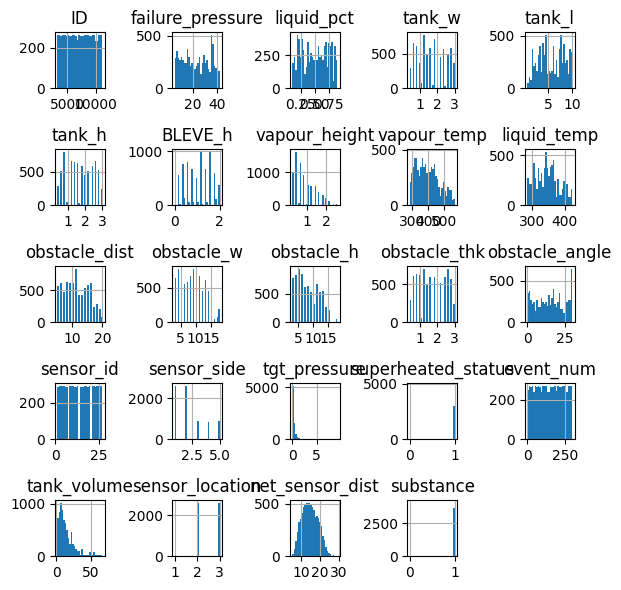

In [70]:
model_data.hist(bins = 30, figsize = (6,6))
plt.tight_layout()
plt.show()

Unnecessary data points:
* ID
* event_num
* sensor_location

In [71]:
model_data.drop(["ID", "event_num","sensor_location"], axis = 1, inplace = True)
model_val.drop(["ID", "event_num","sensor_location"], axis = 1, inplace = True)
ext_test.drop(["ID","sensor_location"], axis = 1, inplace = True)

### Initial Model

In [78]:
param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [3, 5, 8],
        'min_samples_leaf': [2, 3, 5]
    }

In [79]:
def rf_fxn(sensor_id, model_data, validation_split, param_grid, grid_search = True, prediction = False):
    train_data = model_data[model_data['sensor_id'] == sensor_id]
    
    X_train = train_data.drop(['tgt_pressure'], axis=1)
    y_train = train_data['tgt_pressure']
    
    val_data = validation_split[validation_split['sensor_id'] == sensor_id]
    
    X_val = val_data.drop(['tgt_pressure'], axis=1)
    y_val = val_data['tgt_pressure']


    if grid_search == True:
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring = mape_scorer, verbose = 0, cv = 3, n_jobs = -1)
    
        # temp_time = time.time()
        grid_search.fit(X_train, y_train)
        # print(f"{sensor_id} time: {time.time() - temp_time:.2f}")
        
        best_rf_model = grid_search.best_estimator_
        y_pred = best_rf_model.predict(X_val)
        mape = mape_calc(y_val, y_pred)
        
        return mape, grid_search.best_params_


    else:
        n_estimators = param_grid["n_estimators"]
        max_depth = param_grid["max_depth"]
        min_samples_leaf = param_grid["min_samples_leaf"]
        min_samples_split = param_grid["min_samples_split"]
        
        rf_model = RandomForestRegressor(n_estimators = n_estimators, 
                                         max_depth = max_depth, 
                                         min_samples_leaf = min_samples_leaf, 
                                         min_samples_split = min_samples_split, 
                                         random_state=42)
        rf_model.fit(X_train, y_train)
    
        if prediction == True:
            X_test = raw_test_data3[raw_test_data3['sensor_id'] == sensor_id]
        
            y_pred_array = rf_model.predict(X_test)
            y_pred = pd.Series(y_pred_array, X_test.index).clip(lower = 0)
            
            return y_pred
            
       
        y_pred = rf_model.predict(X_val)
        mape = mape_calc(y_val, y_pred)
        
        return mape

In [ ]:
mapes = []
unique_sensors = model_data['sensor_id'].sort_values().unique()
params_dict = {}

for sensor in unique_sensors:
    mape, best_params = rf_train_and_eval(sensor, model_data, model_val, param_grid)
    sensor_str = str(int(sensor)).rjust(2)
    print(f"{sensor_str}: {mape:.5f} \t | {best_params}")
    mapes.append(mape)
    params_dict[sensor] = best_params

print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

params_df = pd.DataFrame(params_dict).T

In [ ]:
param_grid = {
        'n_estimators': [20, 50, 100],
        'max_depth': [None, 10, 15],
        'min_samples_split': [3],
        'min_samples_leaf': [1, 2, 3, 4]
    }

In [ ]:
# After new data split
mapes = []
unique_sensors = model_data['sensor_id'].sort_values().unique()
params_dict = {}

for sensor in unique_sensors:
    mape, best_params = rf_fxn(sensor, model_data, model_val, param_grid)
    sensor_str = str(int(sensor)).rjust(2)
    print(f"{sensor_str}: {mape:.5f} \t | {best_params}")
    mapes.append(mape)
    params_dict[sensor] = best_params

print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

params_df = pd.DataFrame(params_dict).T
display(params_df)

In [ ]:
mapes = []
unique_sensors = model_data['sensor_id'].sort_values().unique()
params_dict = {}

for sensor in unique_sensors:
    mape, best_params = rf_train_and_eval(sensor, model_data, model_val, param_grid)
    sensor_str = str(int(sensor)).rjust(2)
    print(f"{sensor_str}: {mape:.5f} \t | {best_params}")
    mapes.append(mape)
    params_dict[sensor] = best_params

print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

params_df = pd.DataFrame(params_dict).T
display(params_df)

In [ ]:
for col in params_df:
    display(pd.DataFrame(params_df[col].value_counts()).reset_index())

In [80]:
class TreeCV:
    """Perform a cross-validation for chosen hyperparameter"""

    def __init__(self, X, Y, hp="max_depth", tree_type = "rf"):
        """Save training data"""
        self.X = X    # features
        self.Y = Y    # targets
        self.hp = hp  # hyperparameter
        self.tree_type = tree_type

    def set_method(self, hp):
        """Set hyperparameter to use"""
        self.hp = hp

    def cross_me(self, *hp_vals):
        """Perform cross validation for given hyperparameter values"""
        self.scores = []  # the accuracy table
        self.best = None  # the best fit

        best_score = 0

        for hp in hp_vals:
            # create a tree with given hyperparameter cut
            if self.tree_type == "rf":
                fit = RandomForestRegressor(random_state=42, **{self.hp: hp})
            elif self.tree_type == "xgb":
                fit = XGBRegressor(random_state=42, **{self.hp: hp})
            else:
                raise ValueError("Invalid tree_type")

            # calculate a cross validation scores and a mean value
            score = cross_val_score(fit, self.X, self.Y).mean()

            # update best fit if necessary
            if score > best_score:
                self.best = fit
                best_score = score

            self.scores.append([hp, score])

        # train the best fit
        self.best.fit(self.X, self.Y)

    def plot(self):
        """Plot accuracy as a function of hyperparameter values and best fit"""
        plt.figure(figsize=(3, 2))

        plt.xlabel(self.hp)
        plt.ylabel("accuracy")

        plt.plot(*zip(*self.scores), marker = "o")
        plt.title(f"{self.hp}")

        plt.show()


In [ ]:
tree_handler = TreeCV(temp_x, temp_y, "max_depth")
tree_handler.cross_me(*range(1, 20))
tree_handler.plot()

tree_handler = TreeCV(temp_x, temp_y, "n_estimators")
tree_handler.cross_me(*range(10, 200, 10))
tree_handler.plot()

tree_handler = TreeCV(temp_x, temp_y, "min_samples_split")
tree_handler.cross_me(*range(2, 10))
tree_handler.plot()

tree_handler = TreeCV(temp_x, temp_y, "min_samples_leaf")
tree_handler.cross_me(*range(1, 5))
tree_handler.plot()

### Model Creation

In [ ]:
final_param_grid = {
        'n_estimators': 100, 
        'max_depth': 10, 
        'min_samples_split': 3,
        'min_samples_leaf': 2
    }

In [ ]:
preds = []
unique_sensors = model_data['sensor_id'].sort_values().unique()

for sensor in unique_sensors:
    temp_pred = rf_final(sensor, model_data, model_val, final_param_grid, prediction = True)
    preds.append(temp_pred)
    
preds_concat = pd.concat(preds).sort_index()


In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

## XGBoost

In [72]:
# # Saving train and val data for each sensor to "data_dict"
# data_dict = {}
# unique_sensors = model_data["sensor_id"].unique()
# unique_sensors.sort()

# for sensor in unique_sensors:
#     train_data = model_data[model_data['sensor_id'] == sensor]
    
#     X_train = train_data.drop(['tgt_pressure'], axis=1)
#     y_train = train_data['tgt_pressure']
    
#     val_data = model_val[model_val['sensor_id'] == sensor]
#     val_data.drop([])
    
#     X_val = val_data.drop(['tgt_pressure'], axis=1)
#     y_val = val_data['tgt_pressure']

#     X_test_ext = ext_test[ext_test['sensor_id'] == sensor]
    
#     data_dict[sensor] = (X_train, y_train, X_val, y_val, X_test_ext)

In [73]:
# X_train_1, y_train_1, X_val_1, y_val_1, X_test_ext_1 = data_dict[1]
# X_train_10, y_train_10, X_val_10, y_val_10, X_test_ext_10 = data_dict[10]

### Functions

In [146]:
def param_freq(params_df):
    for col in params_df.columns:
        display(pd.DataFrame(params_df[col].value_counts()).reset_index())

In [147]:
def gridCV_sim(fxn = "xgb", params_df = True):
    mapes = []
    params_dict = {}
    
    for sensor, dict_val in data_dict.items():
        if fxn == "xgb":
            mape, best_params = xgb_fxn(dict_val, param_grid)
        sensor_str = str(int(sensor)).rjust(2)
        print(f"{sensor_str}: {mape:.5f} \t | {best_params}")
        mapes.append(mape)
        params_dict[sensor] = best_params
    
    print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

    if params_df:
        params_df = pd.DataFrame(params_dict).T
        param_freq(params_df)

In [86]:
# Grid Search
def xgb_fxn(dict_val, param_grid, grid_search = True, prediction = False):
    
    X_train, y_train, X_val, y_val, X_test_ext = dict_val
    
    if grid_search == True:
        xgb_reg = XGBRegressor(random_state = 42,
                          # n_estimators = 50,
                          # max_depth = 6, 
                          early_stopping_rounds = 10,
                          eval_metric = "mape",
                         )
        
        grid_search = GridSearchCV(estimator = xgb_reg, 
                                   param_grid = param_grid, 
                                   scoring = mape_scorer, 
                                   verbose = 0, 
                                   cv = 3, 
                                   n_jobs = -1)
    
        # temp_time = time.time()
        grid_search.fit(X_train, 
                        y_train,
                        eval_set = [(X_val, y_val)],
                        verbose = False
                       )
        # print(f"{sensor_id} time: {time.time() - temp_time:.2f}")
        
        best_xgb_model = grid_search.best_estimator_
        y_pred = best_xgb_model.predict(X_val)
        mape = mape_calc(y_val, y_pred)
        
        return mape, grid_search.best_params_


    else:

        xgb_model = XGBRegressor(n_estimators = param_grid["n_estimators"], 
                                max_depth = param_grid["max_depth"], 
                                learning_rate = param_grid["learning_rate"],
                                min_child_weight = param_grid["min_child_weight"],
                                random_state=42)
        xgb_model.fit(X_train, y_train)
    
        if prediction == True:
            y_pred_array = xgb_model.predict(X_test_ext)
            y_pred = pd.Series(y_pred_array, X_test_ext.index).clip(lower = 0)
            
            return y_pred
            
            
        y_pred = xgb_model.predict(X_val)
        mape = mape_calc(y_val, y_pred)
        
        return mape


### Models

In [ ]:
preds = []
mapes = []

for sensor, (X_train, y_train, X_val, y_val, X_test_ext) in data_dict.items():
    xgb_reg = XGBRegressor(random_state = 42,
                          n_estimators = 100,
                          # max_depth = 6, 
                          early_stopping_rounds = 20,
                          eval_metric = "mape",
                         )
    xgb_reg.fit(X_train, 
               y_train, 
               verbose = False,
               eval_set = [(X_val, y_val)],
              )

    evals_result = xgb_reg.evals_result()
    final_mape = evals_result["validation_0"]["mape"][-1]
    print(f"{str(int(sensor)).rjust(2)}: {final_mape:.5f}")
    mapes.append(final_mape)

#     y_pred_array = xg_reg.predict(X_test_ext)
#     y_pred = pd.Series(y_pred_array, X_test_ext.index).clip(lower = 0)
#     preds.append(y_pred)

# preds_concat = pd.concat(preds).sort_index()

print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

### Tree CV

In [ ]:
params_treecv = {"learning_rate": [i/100 for i in range(1, 30, 2)],
                 "max_depth": range(1,10),
                 "n_estimators": range(10, 200, 10),
                 "min_child_weight": range(1,15),
                 "max_leaves": range(1, 20)
                }


In [ ]:
temp = model_data[model_data['sensor_id'] == 2]

temp_x = temp.drop(['tgt_pressure'], axis=1)
temp_y = temp['tgt_pressure']


In [ ]:
temp = model_data[model_data['sensor_id'] == 1]

temp_x = temp.drop(['tgt_pressure'], axis=1)
temp_y = temp['tgt_pressure']


for hp, vals in params_treecv.items():
    tree_handler = TreeCV(temp_x, temp_y, hp, tree_type = "xgb")
    tree_handler.cross_me(*vals)
    tree_handler.plot()

In [ ]:
temp = model_data[model_data['sensor_id'] == 2]

temp_x = temp.drop(['tgt_pressure'], axis=1)
temp_y = temp['tgt_pressure']


for hp, vals in params_treecv.items():
    tree_handler = TreeCV(temp_x, temp_y, hp, tree_type = "xgb")
    tree_handler.cross_me(*vals)
    tree_handler.plot()

In [ ]:
temp = model_data[model_data['sensor_id'] == 3]

temp_x = temp.drop(['tgt_pressure'], axis=1)
temp_y = temp['tgt_pressure']


for hp, vals in params_treecv.items():
    tree_handler = TreeCV(temp_x, temp_y, hp, tree_type = "xgb")
    tree_handler.cross_me(*vals)
    tree_handler.plot()

In [ ]:
# Conclusion:
# learning_rate = 0.1
# max_depth = 2
# n_estimators = 50

In [ ]:
# Investigating min_child_weight further:
for i in range(10):
    temp = model_data[model_data['sensor_id'] == i+1]
    temp_x = temp.drop(['tgt_pressure'], axis=1)
    temp_y = temp['tgt_pressure']

    tree_handler = TreeCV(temp_x, temp_y, "min_child_weight", tree_type = "xgb")
    tree_handler.cross_me(*range(1,50,2))
    tree_handler.plot()

In [ ]:
# Looking at the above data points, it apperas that maximum accuracy is generally achieved with a child weight bewteen 10 and 30

### Hyperparam Tuning

In [ ]:
# After redefining train test split
gridCV_sim()

In [ ]:
param_grid = {
    'n_estimators': [80,100,150], 
    'max_depth': [1,2,3,4],
    "learning_rate": [0.1,0.15,0.2],
    "min_child_weight": [3,5,10],
    }
gridCV_sim()

In [ ]:
param_grid = {
    'n_estimators': [80,150], 
    'max_depth': [3],
    "learning_rate": [0.15],
    "min_child_weight": [5,8,10],
    }
gridCV_sim()

In [ ]:
param_grid = {
    'n_estimators': [100,], 
    'max_depth': [3],
    "learning_rate": [0.15],
    "min_child_weight": [8],
    }
gridCV_sim()

In [ ]:
final_param_grid = {
    'n_estimators': 100,
    'max_depth': 3,
    "learning_rate": 0.15,
    "min_child_weight": 8,
    }

### Model Creation

In [ ]:
# With the new data split
preds = []

for sensor, dict_val in data_dict.items():
    temp_pred = xgb_fxn(dict_val, final_param_grid, grid_search = False, prediction = True)
    preds.append(temp_pred)

preds_concat = pd.concat(preds).sort_index()

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

### Bayesian Optimisation

In [87]:
def xgb_objective(trial, X_train, y_train, X_val, y_val):
    n_estimators = 150 # trial.suggest_int("n_estimators", 80, 200)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 15)
    max_leaves = trial.suggest_int("max_leaves", 3, 12)
    learning_rate = 0.15 # trial.suggest_float("learning_rate", 0.05, 0.25)
    # min_split_loss = trial.suggest_float("min_split_loss", 1e-5, 0.001, log = True)
    # reg_alpha = trial.suggest_float("reg_alpha", 0, 1)

    xgb_model = XGBRegressor(n_estimators = n_estimators,
                         max_depth = max_depth,
                         max_leaves = max_leaves,
                         learning_rate = learning_rate,
                         min_child_weight = min_child_weight,
                         # min_split_loss = min_split_loss,
                         # reg_alpha = reg_alpha,
                         n_jobs = -1,
                         random_state = 42,
                        )
    
    xgb_model.fit(X_train, 
               y_train, 
               verbose = False,
               eval_set = [(X_val, y_val)],
              )
    
    y_pred = xgb_model.predict(X_val)
    score = mape_calc(y_val, y_pred)
    # print(score)

    # score = - cross_val_score(xgb_model, X_val, y_val, cv = 5, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1).mean()
    
    return score



def train_best_xgb(best_params):
    model = XGBRegressor(
        n_estimators = 150,
        max_depth = best_params["max_depth"],
        max_leaves = best_params["max_leaves"],
        learning_rate = 0.15,
        min_child_weight = best_params["min_child_weight"],
        n_jobs = -1,
        random_state = 42,
    )

    return model


In [ ]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))
study.optimize(lambda trial: xgb_objective(trial, X_train_10, y_train_10, X_val_10, y_val_10), n_trials=200, n_jobs=-1)

In [ ]:
study.best_params

In [ ]:
opt_vis.plot_optimization_history(study)

In [ ]:
display(opt_vis.plot_slice(study),
        opt_vis.plot_parallel_coordinate(study),
        opt_vis.plot_param_importances(study),
       )

In [ ]:
result = {}
preds = []

start_time = time.time()
for sensor, (X_train, y_train, X_val, y_val, ext_test) in data_dict.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: xgb_objective(trial, X_train, y_train, X_val, y_val), n_trials=150, n_jobs=-1)
    
    best_score = study.best_value
    best_params = study.best_params

    best_xgb = train_best_xgb(best_params)
    best_xgb.fit(X_train, 
               y_train, 
               verbose = False,
               eval_set = [(X_val, y_val)],
              )
    
    y_pred = best_xgb.predict(X_val)
    score = mape_calc(y_val, y_pred)

    ext_pred = best_xgb.predict(ext_test)
    temp_pred = pd.Series(ext_pred, ext_test.index).clip(lower = 0)
    preds.append(temp_pred)

    result[sensor] = round(best_score,5)    

    total_time = time.time() - temp_time
    rem_time = ((time.time() - start_time)/sensor * (27-sensor))/60
    print(f"{int(sensor)}: {best_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

In [ ]:
display(pd.DataFrame(result.values()))
display(pd.DataFrame(result.values()).mean())

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

## Neural Networks

In [91]:
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return (math.exp(2*x) - 1) / (math.exp(2*x) + 1)

def leaky_relu(x, alpha=0.01):
    return x if x >= 0 else alpha * x

In [92]:
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, pred, targets):
        return torch.mean(torch.abs(1 - pred / targets))


class torchNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(17,30),
            nn.ReLU(),
            nn.Linear(30,30),
            nn.ReLU(),
            nn.Linear(30,30),
            nn.ReLU(),
            nn.Linear(30,1),
        )

    def forward(self, x):
        x = self.layers(x)
        return x

In [90]:
torch_nn = torchNN()

In [91]:
criterion = CustomLoss()  # nn.MSELoss()
optimizer = torch.optim.Adam(torch_nn.parameters(), lr=0.001) # can try adamW

In [92]:
torch.manual_seed(42)

mapes = []

for sensor, (X_train, y_train, X_val, y_val, X_test_ext) in data_dict.items():
    torch_nn = torchNN()
    criterion = CustomLoss()  # nn.MSELoss()
    optimizer = torch.optim.Adam(torch_nn.parameters(), lr=0.001) # can try adamW
    
    X_torch = torch.tensor(X_train.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)


    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 20
    patience = patience_val
    
    n_epochs = 1000
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        output = torch_nn(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()
        # print(f"{epoch}: {loss:.4f}")
    
        torch_nn.eval()
    
        with torch.no_grad():
            y_pred = pd.Series(torch_nn(X_val_torch).numpy().flatten(), index = X_val.index)
            mape = mape_calc(y_val, y_pred)
    
        if mape < best_score:
            best_score = mape
            best_model_weights = copy.deepcopy(torch_nn.state_dict())  # Deep copy here      
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break

    mapes.append(mape)
    print(f"{str(int(sensor)).rjust(2)}: {best_score:.5f}\n")
    

np.mean(mapes)

### 87: 0.28205 ###
 1: 0.28205

### 157: 0.22134 ###
 2: 0.22134

### 124: 0.33738 ###
 3: 0.33738

### 117: 0.48591 ###
 4: 0.48591

### 112: 0.46342 ###
 5: 0.46342

### 174: 0.45893 ###
 6: 0.45893

### 23: 0.66597 ###
 7: 0.66597

### 166: 0.44920 ###
 8: 0.44920

### 3: 1.34386 ###
 9: 1.34386

### 363: 0.33171 ###
10: 0.33171

### 11: 0.50738 ###
11: 0.50738

### 105: 0.43223 ###
12: 0.43223

### 233: 0.33363 ###
13: 0.33363

### 50: 0.41354 ###
14: 0.41354

### 179: 0.32685 ###
15: 0.32685

### 45: 0.39463 ###
16: 0.39463

### 240: 0.33392 ###
17: 0.33392

### 312: 0.30174 ###
18: 0.30174

### 247: 0.32807 ###
19: 0.32807

### 320: 0.31120 ###
20: 0.31120

### 15: 0.56681 ###
21: 0.56681

### 193: 0.30315 ###
22: 0.30315

### 158: 0.31584 ###
23: 0.31584

### 223: 0.33910 ###
24: 0.33910

### 236: 0.34445 ###
25: 0.34445

### 153: 0.41781 ###
26: 0.41781

### 201: 0.32264 ###
27: 0.32264



0.685290389154563

In [117]:
torch.manual_seed(42)

mapes = []

for sensor, (X_train, y_train, X_val, y_val, X_test_ext) in data_dict.items():
    torch_nn = torchNN()
    criterion = CustomLoss()  # nn.MSELoss()
    optimizer = torch.optim.Adam(torch_nn.parameters(), lr=0.001) # can try adamW
    
    X_torch = torch.tensor(X_train.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

    n_epochs = 1000
    
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        output = torch_nn(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()
    
    torch_nn.eval()

    with torch.no_grad():
        y_pred = pd.Series(torch_nn(X_val_torch).numpy().flatten(), index = X_val.index)
        # print(y_pred, y_val)
    # display(y_pred.head())
    # display(y_pred.shape, y_val.shape)
    mape = mape_calc(y_val, y_pred)
    mapes.append(mape)
    print(f"{str(int(sensor)).rjust(2)}: {mape:.5f}")

np.mean(mapes)

 1: 0.21372
 2: 0.20088
 3: 0.24356
 4: 0.34921
 5: 0.78063
 6: 0.42000
 7: 0.29010
 8: 0.26939
 9: 0.29051
10: 0.30116
11: 0.33184
12: 0.31576
13: 0.26190
14: 0.30164
15: 0.32796
16: 0.24857
17: 0.27402
18: 0.30270
19: 0.29278
20: 0.34822
21: 0.41999
22: 0.31917
23: 0.26275
24: 0.27244
25: 0.31658
26: 0.23256
27: 0.35964


0.31658109736468965

### Bayesian Optimisation

#### Set-Up and First Optimisation

In [93]:
def model_builder(trial):
    n_layers = trial.suggest_int("n_layers", 1, 5)
    layers = []
    
    in_features = 17
    activation = trial.suggest_categorical("activation", ["ReLU","Tanh","LeakyReLU"])
    
    for i in range(n_layers):
        out_features = trial.suggest_int(f"n_units_l{i}", 4, 128)
        layers.append(nn.Linear(in_features, out_features))

        if activation == "Tanh":
            layers.append(nn.Tanh())
        elif activation == "LeakyReLU":
            layers.append(nn.LeakyReLU())
        else: 
            layers.append(nn.ReLU())
        
        # p = trial.suggest_float(f"dropout_l{i}", 0.1, 0.5)
        # layers.append(nn.Drouput(p))

        in_features = out_features

    layers.append(nn.Linear(in_features, 1))
    
    return nn.Sequential(*layers)


def objective(trial):    
    X_torch = torch.tensor(X_train_1.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train_1.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val_1.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val_1.values, dtype=torch.float32).reshape(-1, 1)
    
    nn_model = model_builder(trial)
    # print(nn_model)

    optimizer_name = trial.suggest_categorical("optimizer",["Adam","SGD"])
    lr = trial.suggest_float("lr",1e-5,5e-2, log = True)
    optimizer = getattr(torch.optim,optimizer_name)(nn_model.parameters(), lr = lr)
    criteron = CustomLoss()
    
    n_epochs = 100    
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        output = nn_model(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()

    nn_model.eval()
    with torch.no_grad():        
        y_pred = pd.Series(nn_model(X_val_torch).numpy().flatten(), index = X_val_1.index)
        score = mape_calc(y_val_1, y_pred)

    

    return score
    
    

In [ ]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))

In [ ]:
study.optimize(objective, n_trials = 200, n_jobs = -1)

In [ ]:
# output of various sim:
display(pd.DataFrame(Out[135].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[132].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[129].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[126].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[144].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[148].items(), columns = ["params", "vals"]),
       )

In [ ]:
study.best_params

In [ ]:
def outlier_trial(trial):
    return trial.value is not None and trial.value > 1
    
all_trials = study.trials
filtered_trials = [trial for trial in all_trials if not outlier_trial(trial)]
filtered_study = optuna.create_study(study_name='filtered_study')
for trial in filtered_trials:
    filtered_study.add_trial(trial)

opt_vis.plot_optimization_history(filtered_study)

In [ ]:
opt_vis.plot_param_importances(study)

#### Further Optimisation

In [78]:
def model_builder(trial):
    n_layers = trial.suggest_int("n_layers", 1, 5)
    layers = []
    
    in_features = 17
    
    for i in range(n_layers):
        out_features = trial.suggest_int(f"n_units_l{i}", 4, 128)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU())
  
        p = trial.suggest_float(f"dropout_l{i}", 0.1, 0.5)
        layers.append(nn.Dropout(p))

        in_features = out_features

    layers.append(nn.Linear(in_features, 1))
    
    return nn.Sequential(*layers)


def objective(trial):    
    X_torch = torch.tensor(X_train_1.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train_1.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val_1.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val_1.values, dtype=torch.float32).reshape(-1, 1)
    
    nn_model = model_builder(trial)
    # print(nn_model)

    optimizer_name = trial.suggest_categorical("optimizer",["Adam","AdamW"])
    lr = trial.suggest_float("lr",1e-5,5e-2, log = True)
    optimizer = getattr(torch.optim,optimizer_name)(nn_model.parameters(), lr = lr)
    criteron = CustomLoss()

    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 50
    patience = patience_val
    
    # n_epochs = trial.suggest_int("n_epochs", 100, 1000)    
    for epoch in range(1000):
        optimizer.zero_grad()
        output = nn_model(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()

        nn_model.eval()
        with torch.no_grad():        
            y_pred = pd.Series(nn_model(X_val_torch).numpy().flatten(), index = X_val_1.index)
            score = mape_calc(y_val_1, y_pred)

        if score < best_score:
            best_score = score
            best_model_weights = copy.deepcopy(nn_model.state_dict())  # Deep copy here      
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                # print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break

        
        trial.report(score, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()
            
    nn_model.load_state_dict(best_model_weights)
    return score
    
    

In [ ]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))
study.optimize(objective, n_trials = 50, n_jobs = -1)

study.best_params

In [ ]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))
study.optimize(objective, n_trials = 50, n_jobs = -1)

study.best_params

In [ ]:
display(pd.DataFrame(Out[175].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[188].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[210].items(), columns = ["params", "vals"]),
        # increased number of layers to 10, removed "RMSprop" optimiser
        pd.DataFrame(Out[219].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[223].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[278].items(), columns = ["params", "vals"]),
       )

In [ ]:
def outlier_trial(trial):
    return trial.value is not None and trial.value > 1

all_trials = study.trials
filtered_trials = [trial for trial in all_trials if not outlier_trial(trial)]
filtered_study = optuna.create_study(study_name='filtered_study')
for trial in filtered_trials:
    filtered_study.add_trial(trial)

display(opt_vis.plot_optimization_history(study),
        opt_vis.plot_optimization_history(filtered_study),
        opt_vis.plot_param_importances(filtered_study),
       )

#### Extending To All Sensor & Predictions

In [94]:
def model_builder(trial): # unch from original
    n_layers = trial.suggest_int("n_layers", 2, 5)
    layers = []
    
    in_features = 17
    
    for i in range(n_layers):
        out_features = trial.suggest_int(f"n_units_l{i}", 4, 128)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU())
  
        p = trial.suggest_float(f"dropout_l{i}", 0.1, 0.5)
        layers.append(nn.Dropout(p))

        in_features = out_features

    layers.append(nn.Linear(in_features, 1))
    
    return nn.Sequential(*layers)

def objective(trial, X_train, y_train, X_val, y_val):    
    X_torch = torch.tensor(X_train.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)
    
    nn_model = model_builder(trial)
    # print(nn_model)

    lr = trial.suggest_float("lr",1e-5,5e-2, log = True)
    # optimizer_name = trial.suggest_categorical("optimizer",["Adam","AdamW"])
    # optimizer = getattr(torch.optim,optimizer_name)(nn_model.parameters(), lr = lr)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)
    optimizer = torch.optim.Adam(nn_model.parameters(), lr=lr, weight_decay=weight_decay)
    criteron = CustomLoss()

    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 50
    patience = patience_val
    
    # n_epochs = trial.suggest_int("n_epochs", 10, 1000)    
    for epoch in range(1000):
        optimizer.zero_grad()
        output = nn_model(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()

        nn_model.eval()
        with torch.no_grad():        
            y_pred = pd.Series(nn_model(X_val_torch).numpy().flatten(), index = X_val.index)
            score = mape_calc(y_val, y_pred)

        if score < best_score:
            best_score = score
            best_model_weights = copy.deepcopy(nn_model.state_dict()) 
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                # print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break

        
        trial.report(score, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return best_score



def final_model(best_params):
    n_layers = best_params["n_layers"]
    layers = []
    
    in_features = 17
    
    for i in range(n_layers):
        out_features = best_params[f"n_units_l{i}"]
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU())
  
        p = best_params[f"dropout_l{i}"]
        layers.append(nn.Dropout(p))

        in_features = out_features

    layers.append(nn.Linear(in_features, 1))
    
    return nn.Sequential(*layers)


def train_best_nn(X_train, y_train, X_val, y_val, best_params):
    model = final_model(best_params)

    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

    optimizer = torch.optim.Adam(model.parameters(), lr=best_params['lr'], weight_decay=best_params['weight_decay'])
    criterion = CustomLoss()

    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 50
    patience = patience_val
    
    for epoch in range(1000):
        optimizer.zero_grad()
        output = model(X_train_tensor)
        loss = criterion(output, y_train_tensor)

        l1_reg = 0
        for param in model.parameters():
            l1_reg += torch.norm(param, 1)

        loss += best_params["weight_decay"] * l1_reg
        
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():      
            y_pred = pd.Series(model(X_val_torch).numpy().flatten(), index = X_val.index)
            score = mape_calc(y_val, y_pred)

        if score < best_score:
            best_score = score
            best_model_weights = copy.deepcopy(model.state_dict()) 
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                # print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break

    model.load_state_dict(best_model_weights)
    return model


def predict(model, X_test_ext):
    X_ext_tensor = torch.tensor(X_test_ext.values, dtype=torch.float32)

    with torch.no_grad():
        preds_array = model(X_ext_tensor).numpy().flatten()
        pred = pd.Series(preds_array, X_test_ext.index).clip(lower = 0)

    return pred

In [ ]:
# Adding Regularisation
result = {}
preds = []

start_time = time.time()
for sensor, (X_train, y_train, X_val, y_val, ext_test) in data_dict.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val), n_trials=50, n_jobs=-1)

    # display(opt_vis.plot_optimization_history(study), 
    #         opt_vis.plot_slice(study, params = ["weight_decay", "n_layers", "lr", "dropout_l0", "n_units_l0"]))
    
    best_score = study.best_value
    best_params = study.best_params

    best_nn = train_best_nn(X_train, y_train, X_val, y_val, best_params)
    temp_pred = predict(best_nn, ext_test)
    preds.append(temp_pred)

    result[sensor] = round(best_score,5)    

    sensor_time = time.time() - temp_time
    rem_time = ((time.time() - start_time)/sensor * (27 - sensor))/60
    print(f"{sensor}: {best_score:.5f} \t {sensor_time:.2f}s \t Rem: {rem_time:.2f}m")

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

In [ ]:
pd.DataFrame(result.values(), index = result.keys())#).mean()

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

In [ ]:
result = {}
preds = []

for sensor, (X_train, y_train, X_val, y_val, ext_test) in data_dict.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val), n_trials=50, n_jobs=-1)
    
    best_score = study.best_value
    best_params = study.best_params

    best_nn = train_best_nn(X_train, y_train, best_params)
    temp_pred = predict(best_nn, ext_test)
    preds.append(temp_pred)

    result[sensor] = round(best_score,5)    

    total_time = time.time() - temp_time
    rem_time = (total_time * (27 - sensor))/60
    print(f"{sensor}: {best_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

In [ ]:
display(pd.DataFrame(result.values()))

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

In [ ]:
result = {}
preds = []

start_time = time.time()
for sensor, (X_train, y_train, X_val, y_val, ext_test) in data_dict.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val), n_trials=50, n_jobs=-1)
    
    best_score = study.best_value
    best_params = study.best_params

    best_nn = train_best_nn(X_train, y_train, X_val, y_val, best_params)
    temp_pred = predict(best_nn, ext_test)
    preds.append(temp_pred)

    result[sensor] = round(best_score,5)    

    total_time = time.time() - temp_time
    rem_time = ((time.time() - start_time)/sensor * (27-sensor))/60
    print(f"{sensor}: {best_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

In [ ]:
display(pd.DataFrame(result.values()))

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

# External

## Real-World Research

In [95]:
expl_data = model_data.copy()

Here we have the properties of the 2 unique substances present in our data

In [96]:
substance_properties

Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
0                            37.9                            -1.0   
1                            42.5                           -42.0   

   Liquid Critical Temperature (K)  
0                            152.0  
1                             96.7

As mentioned in 2.3.2 (and by using common sense), a sub-0 boiling temperature raises some red flags and that they instead might be in degrees celsius. 

Through some elementary research, we can discover that these are the distinct properties of 2 unique molecules; n-butane and propane respectively.

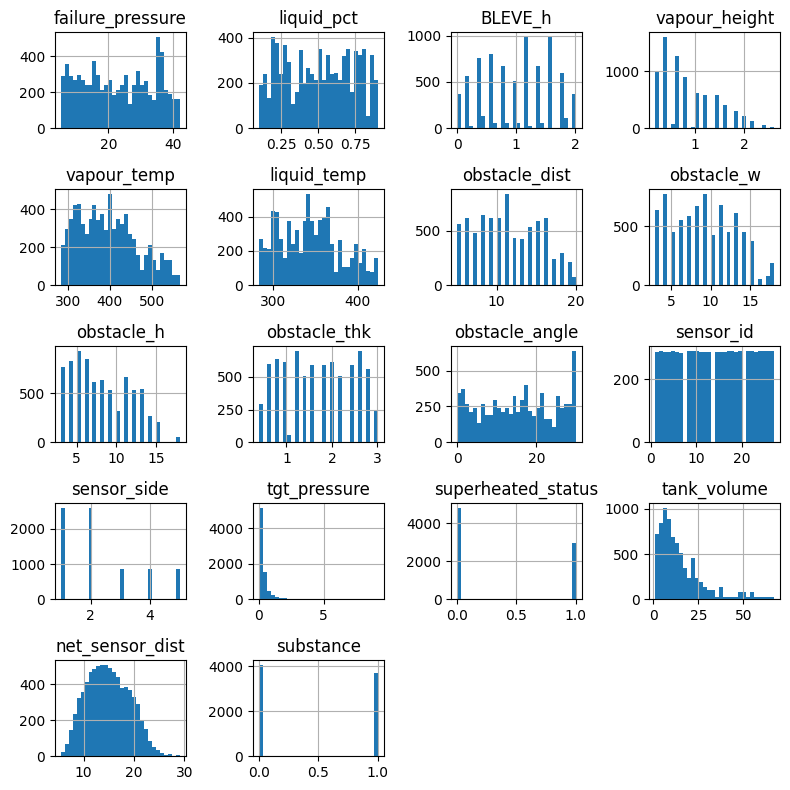

In [97]:
expl_data.hist(bins = 30, figsize = (8,8))
plt.tight_layout()
plt.show()

In [98]:
expl_data

failure_pressure  liquid_pct  BLEVE_h  vapour_height  vapour_temp  \
0                 7.32        0.42     1.79          0.605      522.915   
1                 7.32        0.42     1.79          0.605      522.915   
2                 7.32        0.42     1.79          0.605      522.915   
3                 7.32        0.42     1.79          0.605      522.915   
4                 7.32        0.42     1.79          0.605      522.915   
...                ...         ...      ...            ...          ...   
7890             22.42        0.70     1.80          0.800      367.360   
7891             22.42        0.70     1.80          0.800      367.360   
7892             22.42        0.70     1.80          0.800      367.360   
7893             22.42        0.70     1.80          0.800      367.360   
7894             22.42        0.70     1.80          0.800      367.360   

      liquid_temp  obstacle_dist  obstacle_w  obstacle_h  obstacle_thk  \
0          354.43           11.0        11.0        13.0         0.615   
1          354.43           11.0        11.0        13.0         0.615   
2          354.43           11.0        11.0        13.0         0.615   
3          354.43           11.0        11.0        13.0         0.615   
4          354.43           11.0        11.0        13.0         0.615   
...           ...            ...         ...         ...           ...   
7890       330.67           18.0         4.0         8.0         2.410   
7891       330.67           18.0         4.0         8.0         2.410   
7892       330.67           18.0         4.0         8.0         2.410   
7893       330.67           18.0         4.0         8.0         2.410   
7894       330.67           18.0         4.0         8.0         2.410   

      obstacle_angle  sensor_id  sensor_side  tgt_pressure  \
0               13.0       18.0          2.0      0.199929   
1               13.0       19.0          3.0      0.435681   
2               13.0       20.0          3.0      0.264031   
3               13.0       21.0          3.0      0.270576   
4               13.0       22.0          4.0      0.204675   
...              ...        ...          ...           ...   
7890            25.0       23.0          4.0      0.100555   
7891            25.0       24.0          4.0      0.092211   
7892            25.0       25.0          5.0      0.105432   
7893            25.0       26.0          5.0      0.102144   
7894            25.0       27.0          5.0      0.095301   

      superheated_status  tank_volume  net_sensor_dist  substance  
0                    1.0      12.9330        17.012366        0.0  
1                    1.0      12.9330        13.362956        0.0  
2                    1.0      12.9330        13.105899        0.0  
3                    1.0      12.9330        15.631398        0.0  
4                    1.0      12.9330        15.759572        0.0  
...                  ...          ...              ...        ...  
7890                 0.0      17.4096        21.714742        0.0  
7891                 0.0      17.4096        22.472428        0.0  
7892                 0.0      17.4096        22.534474        0.0  
7893                 0.0      17.4096        22.211765        0.0  
7894                 0.0      17.4096        22.534474        0.0  

[7776 rows x 18 columns]

In [99]:
raw_data.columns

Index(['ID', 'Tank Failure Pressure (bar)', 'Liquid Ratio (%)',
       'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)',
       'BLEVE Height (m)', 'Vapour Height (m)', 'Vapour Temperature (K)',
       'Liquid Temperature (K)', 'Obstacle Distance to BLEVE (m)',
       'Obstacle Width (m)', 'Obstacle Height (m)', 'Obstacle Thickness (m)',
       'Obstacle Angle', 'Status', 'Liquid Critical Pressure (bar)',
       'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)',
       'Sensor ID', 'Sensor Position Side', 'Sensor Position x',
       'Sensor Position y', 'Sensor Position z', 'tgt_pressure'],
      dtype='object')

<Axes: >

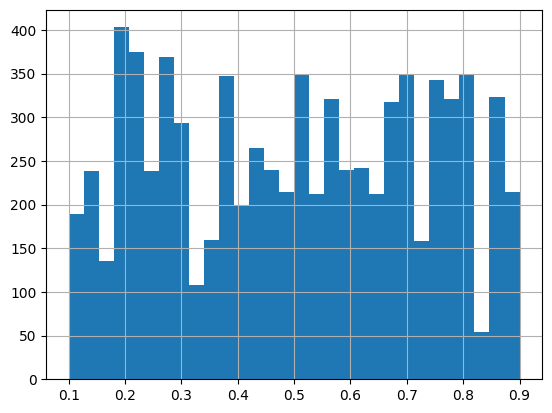

In [100]:
expl_data.liquid_pct.hist(bins = 30)

In [101]:
def enthalpy_of_vap(substance_dict, df):
    lookup = substance_dict
    # t0 = df[]
    tb = lookup["tb"]
    tc = lookup["tc"]
    pc = lookup["pc"]

    num = 1.092 * 8.3145 * tb * (np.log(pc) - 1.013)
    denom = 0.93 - tb / tc
    frac = (tc - t0) / (tc - tb)

    return num / denom * frac ** 0.383

In [102]:
n_butane_props = {
    "tb": -1 + 273.15,
    "tc": 425.1,
    "pc": 3796.0,
}

propane_props = {
    "tb": -42 + 273.15 ,
    "tc": 369.522,
    "pc": 4249.24,
}

In [103]:
# Calculating the boiling point at the failure pressure through the Classius-Clayperton equation

def calc_new_BP(p2, element):
    if element == "n-butane" or element == 0:
        h = 22.40 * 1000
        p1 = 1
        t1 = -1 + 273.15
    elif element == "propane" or element == 1:
        h = 16.25 * 1000
        p1 = 1
        t1 = -42 + 273.15
    else:
        raise ValueError("Element must be propane or n-butane")

    calc = 1/t1 - 8.3145 * np.log(p2/p1)/h
    return round(1/calc, 3)

In [104]:
map_dict = {0: -1.0, 1: -42.0}
expl_data["BP_orig"] = expl_data["substance"].map(map_dict)
expl_data["BP_new"] = expl_data.apply(lambda row: calc_new_BP(row["failure_pressure"], row["substance"]), axis = 1)
expl_data["temp_excess"] =  expl_data["liquid_temp"] - expl_data["BP_new"]

In [105]:
expl_data

failure_pressure  liquid_pct  BLEVE_h  vapour_height  vapour_temp  \
0                 7.32        0.42     1.79          0.605      522.915   
1                 7.32        0.42     1.79          0.605      522.915   
2                 7.32        0.42     1.79          0.605      522.915   
3                 7.32        0.42     1.79          0.605      522.915   
4                 7.32        0.42     1.79          0.605      522.915   
...                ...         ...      ...            ...          ...   
7890             22.42        0.70     1.80          0.800      367.360   
7891             22.42        0.70     1.80          0.800      367.360   
7892             22.42        0.70     1.80          0.800      367.360   
7893             22.42        0.70     1.80          0.800      367.360   
7894             22.42        0.70     1.80          0.800      367.360   

      liquid_temp  obstacle_dist  obstacle_w  obstacle_h  obstacle_thk  ...  \
0          354.43           11.0        11.0        13.0         0.615  ...   
1          354.43           11.0        11.0        13.0         0.615  ...   
2          354.43           11.0        11.0        13.0         0.615  ...   
3          354.43           11.0        11.0        13.0         0.615  ...   
4          354.43           11.0        11.0        13.0         0.615  ...   
...           ...            ...         ...         ...           ...  ...   
7890       330.67           18.0         4.0         8.0         2.410  ...   
7891       330.67           18.0         4.0         8.0         2.410  ...   
7892       330.67           18.0         4.0         8.0         2.410  ...   
7893       330.67           18.0         4.0         8.0         2.410  ...   
7894       330.67           18.0         4.0         8.0         2.410  ...   

      sensor_id  sensor_side  tgt_pressure  superheated_status  tank_volume  \
0          18.0          2.0      0.199929                 1.0      12.9330   
1          19.0          3.0      0.435681                 1.0      12.9330   
2          20.0          3.0      0.264031                 1.0      12.9330   
3          21.0          3.0      0.270576                 1.0      12.9330   
4          22.0          4.0      0.204675                 1.0      12.9330   
...         ...          ...           ...                 ...          ...   
7890       23.0          4.0      0.100555                 0.0      17.4096   
7891       24.0          4.0      0.092211                 0.0      17.4096   
7892       25.0          5.0      0.105432                 0.0      17.4096   
7893       26.0          5.0      0.102144                 0.0      17.4096   
7894       27.0          5.0      0.095301                 0.0      17.4096   

      net_sensor_dist  substance  BP_orig   BP_new  temp_excess  
0           17.012366        0.0     -1.0  340.650       13.780  
1           13.362956        0.0     -1.0  340.650       13.780  
2           13.105899        0.0     -1.0  340.650       13.780  
3           15.631398        0.0     -1.0  340.650       13.780  
4           15.759572        0.0     -1.0  340.650       13.780  
...               ...        ...      ...      ...          ...  
7890        21.714742        0.0     -1.0  396.812      -66.142  
7891        22.472428        0.0     -1.0  396.812      -66.142  
7892        22.534474        0.0     -1.0  396.812      -66.142  
7893        22.211765        0.0     -1.0  396.812      -66.142  
7894        22.534474        0.0     -1.0  396.812      -66.142  

[7776 rows x 21 columns]

In [106]:
sensor1 = list(expl_data.groupby("sensor_id"))[14][1]

In [107]:
# Plotting Variables vs tgt_pressure
def plot_tgt_var(df, vars = None, n_cols = 4):
    if vars == None:
        vars = df.columns
        
    numeric_cols = df[vars].select_dtypes(include = np.number).columns.to_list()
    n_cols = n_cols
    n_rows = int(len(numeric_cols) / n_cols) + (len(numeric_cols) % n_cols > 0)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2))
    
    i = 0
    for col_name in numeric_cols:
        if col_name != "tgt_pressure":
            ax = axs[i//n_cols, i%n_cols]
            ax.scatter(df[col_name], df["tgt_pressure"])
            ax.set_title(f"{col_name}")
            i += 1
    
    plt.tight_layout()
    plt.show()

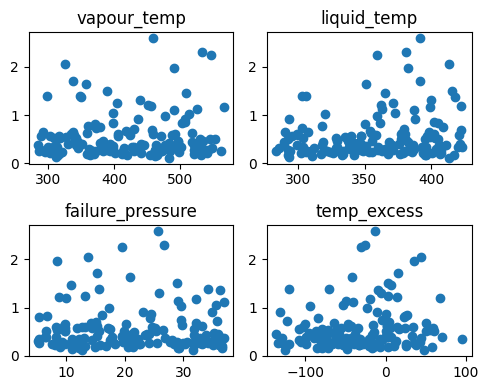

In [108]:
plot_tgt_var(sensor1.query("substance == 0"),["vapour_temp", "liquid_temp","failure_pressure", "temp_excess"], n_cols = 2)

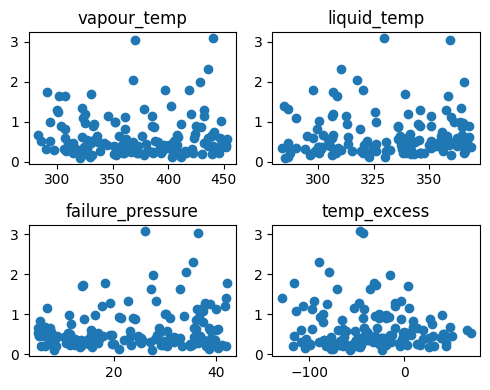

In [109]:
plot_tgt_var(sensor1.query("substance == 1"),["vapour_temp", "liquid_temp","failure_pressure", "temp_excess"], n_cols = 2)

## Vapour Height Calculation

"liquid_pct" is equivalent to the "Liquid Fill Ratio" or "Liquid Fill Level", so we should be able to back out "vapour height" by multiplying "tank height" by "(1 - liquid_pct)"

In [60]:
raw_data.columns

Index(['ID', 'Tank Failure Pressure (bar)', 'Liquid Ratio (%)',
       'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)',
       'BLEVE Height (m)', 'Vapour Height (m)', 'Vapour Temperature (K)',
       'Liquid Temperature (K)', 'Obstacle Distance to BLEVE (m)',
       'Obstacle Width (m)', 'Obstacle Height (m)', 'Obstacle Thickness (m)',
       'Obstacle Angle', 'Status', 'Liquid Critical Pressure (bar)',
       'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)',
       'Sensor ID', 'Sensor Position Side', 'Sensor Position x',
       'Sensor Position y', 'Sensor Position z', 'tgt_pressure'],
      dtype='object')

In [110]:
temp = raw_data7.copy().rename(columns = dict_names)[["liquid_pct","vapour_height","tank_h"]]

In [111]:
temp["vapour_height_calc"] = temp["tank_h"] * (1 - temp["liquid_pct"])
temp["dif_amt"] = temp["vapour_height"] - temp["vapour_height_calc"]
temp["dif_ratio"] = 1 - temp["vapour_height_calc"]/temp["vapour_height"]

In [112]:
temp2 = raw_data.copy()

In [113]:
temp2["vapour_height_calc"] = temp2["Tank Height (m)"] * (1 - temp2["Liquid Ratio (%)"])
temp2["dif_amt"] = temp2["Vapour Height (m)"] - temp2["vapour_height_calc"]
temp2["dif_ratio"] = 1 - temp2["vapour_height_calc"]/temp2["Vapour Height (m)"]

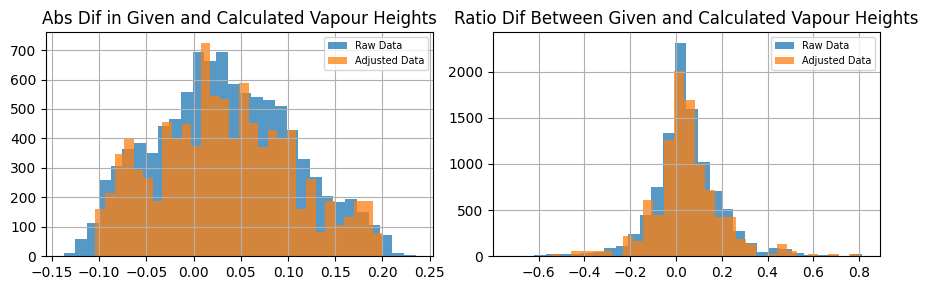

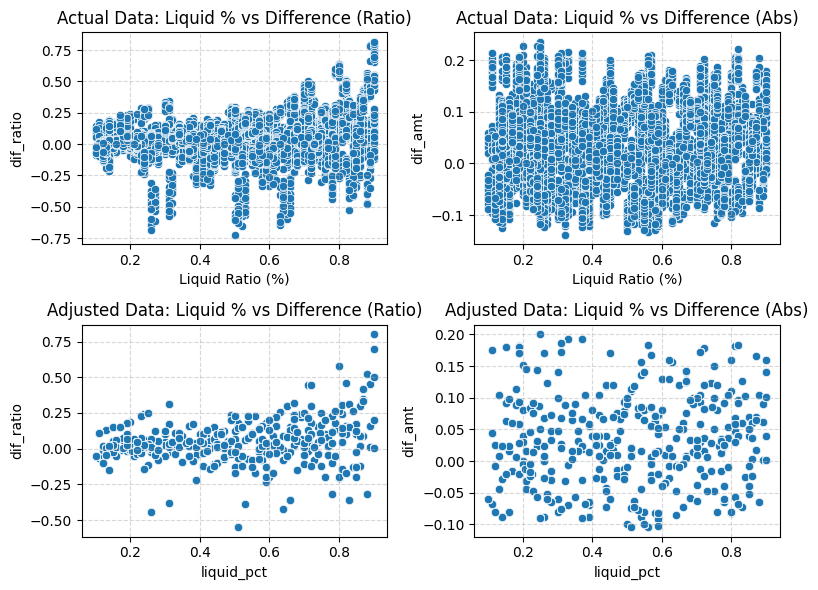

In [131]:
fig, ax = plt.subplots(1, 2, figsize = (9, 3))

temp2["dif_amt"].hist(bins = 30, alpha = 0.75, label = "Raw Data", ax = ax[0])
temp["dif_amt"].hist(bins = 30, alpha = 0.75, label = "Adjusted Data", ax = ax[0])
ax[0].legend(fontsize = 7)
ax[0].set_title("Abs Dif in Given and Calculated Vapour Heights")

temp2["dif_ratio"].hist(bins = 30, alpha = 0.75, label = "Raw Data", ax = ax[1])
temp["dif_ratio"].hist(bins = 30, alpha = 0.75, label = "Adjusted Data", ax = ax[1])
ax[1].legend(fontsize = 7)
ax[1].set_title("Ratio Dif Between Given and Calculated Vapour Heights")

plt.tight_layout()
plt.show()



fig, ax = plt.subplots(2, 2, figsize = (8, 6))
ax = ax.flatten()

sns.scatterplot(data = temp2, x = "Liquid Ratio (%)", y = "dif_ratio", ax = ax[0]).set_title("Actual Data: Liquid % vs Difference (Ratio)")
ax[0].grid(True, linestyle = "--", alpha = 0.5)

sns.scatterplot(data = temp2, x = "Liquid Ratio (%)", y = "dif_amt", ax = ax[1]).set_title("Actual Data: Liquid % vs Difference (Abs)")
ax[1].grid(True, linestyle = "--", alpha = 0.5)

sns.scatterplot(data = temp, x = "liquid_pct", y = "dif_ratio", ax = ax[2]).set_title("Adjusted Data: Liquid % vs Difference (Ratio)")
ax[2].grid(True, linestyle = "--", alpha = 0.5)

sns.scatterplot(data = temp, x = "liquid_pct", y = "dif_amt", ax = ax[3]).set_title("Adjusted Data: Liquid % vs Difference (Abs)")
ax[3].grid(True, linestyle = "--", alpha = 0.5)

plt.tight_layout()
plt.show()

We can see above that there does not appear to be a clear relationship between "Liquid Ratio (%)" and the error present in the data. This was tested as the data may have been generated from a non-rectangular (e.g. cylindrical) tank, in which case smaller "liquid_pct" values would lead to relatively large vapour_height values up until 50% fill ratio, beyond which these values would be relatively low vapour_height values - with the overall shape being similar to a -x^3 graph, due to the fact that horizontal cylinders are 1) initally "quick" to fill (filling it at a certain rate corresponds to a relatively large increase in height), before 2) slowing down in the middle as the tank widens, before 3) speeding up again as the tank gets full.

This is to say that the noise in our data doesn't appear to be due to incorrect measurements, instead just random noise that has been added to the data. As there is no way of validating which values are the "true" values, there is no way to confirm which metric for vapour_height is more accurate, however, since our calculated vapour height involves 2 sources of uncertainity, we will instead just use the given values for vapour_height.

## Liquid Correction Method

BLEVEs are one of the explosions that can occur when a vessel carrying LPG is ruptured. The liquid is contained inside a pressurised vessel, and thus can be contained as a liquid whilst being at temperature higher than it's boiling point at atmospheric conditions (i.e. it's "normal boiling point"). Such liquids are referred to as being "superheated", whereas liquids whose temperature is below its "normal boiling point" are referred to as "subcooled".

When a substance is superheated, a rapid depressurisation from failure of the vessel will lead to mass boiling of liquid, being quickly converted to vapour. The pressure wave from this rapid expansion of vapour is what ultimately leads to the damage caused by BLEVEs.

From the attached reading and its references (papers by QiLin Li), we can learn that the initial pressure of the explosion is caused by 2 separate factors: 1) the existing vapour in the tank escaping, and 2) the liquid flashing. These can either be modelled separately ("shock tube method") or simultaneously ("liquid correction method"). 

In the liquid flashing method, we can calculate the percentage of the liquid which evaporates (f). Whilst this can later be used to calculate the initial explosion pressure, it appears that this value has already been given to us (as "Tank Failure Pressure (bar)" - later renamed to "failure_pressure"), however, this factor may still be good to have in our model (e.g. as an input in a neural network), so we will still calculate this for each data point.

In [231]:
# Using the NIST database
cp = pd.DataFrame.from_dict({"n-butane": 130, "propane": 100}, orient = "index", columns = ["cp"])

In [232]:
substance_dict = substance_properties.copy()
substance_dict.columns = ["pc", "tb", "tc"]
substance_dict = pd.concat([substance_dict, cp], axis = 1)

In [264]:
# t0 = temp at explosion
# tc = critical temp
# tb = boiling temp
# pc = critical pressure

def Hv(superheated, substance_val, liquid_temp, substance_dict = substance_dict):
    # if substance not in ["propane", "n-butane"]:
    #     raise ValueError("Invalid Substance Specified")

    if substance_val == 0:
        substance = "n-butane"
    if substance_val == 1:
        substance = "propane"
    
    lookup = substance_dict.loc[substance]
    
    t0 = liquid_temp
    tb = lookup["tb"] + 273.15
    tc = lookup["tc"] + 273.15
    pc = lookup["pc"]
    
    num = 1.092 * 8.3145 * tb * (np.log(pc) - 1.013)
    denom = 0.93 - tb / tc
    frac = (tc - t0) / (tc - tb)
    
    return (num / denom * frac ** 0.383), frac, substance, lookup, superheated


def f_frac(Hv_output):
    Hv, frac, substance, lookup, superheated = Hv_output

    if superheated == 0:
        return 0
    
    cp = lookup["cp"]
    tc = lookup["tc"]
    tb = lookup["tb"]
    
    term = -2.63 * cp / Hv * (tc - tb) * (1 - frac ** 0.38)
    return (1 - np.exp(term))



In [269]:
temp = ho_train_set[["superheated_status","substance", "liquid_temp",]]
temp["f"] = temp.apply(lambda row: f_frac(Hv(row["superheated_status"],
                                             row["substance"], 
                                             row["liquid_temp"])), axis=1)

/var/folders/g1/gcf6wcx125v51909bvw56yxm0000gn/T/ipykernel_19654/2385984557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["f"] = temp.apply(lambda row: f_frac(Hv(row["superheated_status"],


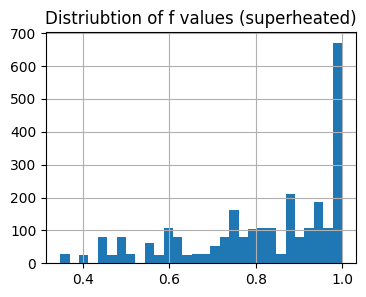

In [274]:
temp.query("f > 0")["f"].hist(bins = 30, figsize = (4,3))
plt.title("Distriubtion of f values (superheated)")
plt.show()

# Overhaul

## Filtering and Standardisation

Only considering relevant input variables and standardizing these as required

In [75]:
processed_data.columns

Index(['ID', 'failure_pressure', 'liquid_pct', 'tank_w', 'tank_l', 'tank_h',
       'BLEVE_h', 'vapour_height', 'vapour_temp', 'liquid_temp',
       'obstacle_dist', 'obstacle_w', 'obstacle_h', 'obstacle_thk',
       'obstacle_angle', 'sensor_id', 'sensor_side', 'tgt_pressure',
       'superheated_status', 'event_num', 'tank_volume', 'sensor_location',
       'net_sensor_dist', 'substance'],
      dtype='object')

In [465]:
relevant_cols = ["tgt_pressure",
                 "sensor_id",
                 "failure_pressure", 
                 "liquid_pct", 
                 "tank_w", 
                 "tank_l", 
                 "tank_h", 
                 "BLEVE_h", 
                 "vapour_temp", 
                 "liquid_temp", 
                 "superheated_status",
                 "vapour_height",
                 "net_sensor_dist",
                 ## Include obstalce measurements, (thk, angle etc.)
                ]

unscaled_cols = [col for col in relevant_cols if col not in ["tgt_pressure","superheated_status", "sensor_id"]]

In [77]:
temp = processed_data[relevant_cols]
temp[unscaled_cols] = temp[unscaled_cols].apply(stats.zscore)

/var/folders/g1/gcf6wcx125v51909bvw56yxm0000gn/T/ipykernel_35171/3197744231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[unscaled_cols] = temp[unscaled_cols].apply(stats.zscore)


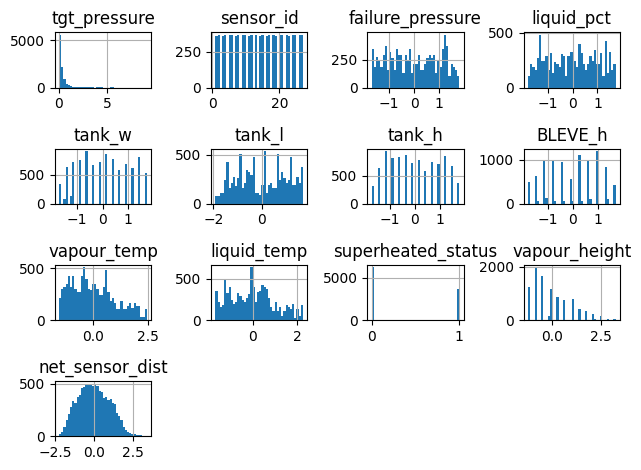

In [78]:
temp.hist(bins = 40)
plt.tight_layout()
plt.show()

In [79]:
qt = sklearn.preprocessing.QuantileTransformer(output_distribution="normal")
tgt_temp = qt.fit_transform(temp[["tgt_pressure"]])
temp["tgt_pressure"] = tgt_temp.clip(-3,3) # doesn't appear to be anything super special about the extremes, thus squish to rest of data

/var/folders/g1/gcf6wcx125v51909bvw56yxm0000gn/T/ipykernel_35171/3400478121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["tgt_pressure"] = tgt_temp.clip(-3,3) # doesn't appear to be anything super special about the extremes, thus squish to rest of data


In [466]:
data = processed_data[relevant_cols]
data[unscaled_cols] = data[unscaled_cols].apply(stats.zscore)

qt = sklearn.preprocessing.QuantileTransformer(output_distribution="normal")
tgt_data = qt.fit_transform(data[["tgt_pressure"]])
data["tgt_pressure"] = tgt_data.clip(-3.5,3.5)


ext_test_data = processed_test_data[[col for col in relevant_cols if col != "tgt_pressure"]]
ext_test_data[unscaled_cols] = ext_test_data[unscaled_cols].apply(stats.zscore)

/var/folders/g1/gcf6wcx125v51909bvw56yxm0000gn/T/ipykernel_35171/3905321141.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g1/gcf6wcx125v51909bvw56yxm0000gn/T/ipykernel_35171/3905321141.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g1/gcf6wcx125v51909bvw56yxm0000gn/T/ipykernel_35171/3905321141.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

## Data Splitting

We will again split the data into train and test splits for cross-validation, however, we will also go back to splitting the data into train, validation AND test sets for holdout validation (previously we were doing holdout validation with just the 2 data sets). 

In [467]:
# Holdout validation spltis: train_split, validation_split, test_split
train_ratio = 0.7
val_ratio = 0.15
n_data = len(data)

train_qty = int(n_data * train_ratio)
val_qty = int(n_data * (val_ratio + train_ratio))

ho_train_set = data.iloc[:train_qty]
ho_validation_set = data.iloc[train_qty:val_qty]
ho_test_set = data.iloc[val_qty:] # processed_data[relevant_cols].iloc[val_qty:]

In [284]:
# Cross-val splits: cv_train_set, cv_test_set 
cv_ratio = 0.8
cv_qty = int(n_data * cv_ratio)

cv_train_set = data.iloc[:cv_qty]
cv_test_set = data.iloc[cv_qty:] #processed_data[relevant_cols].iloc[cv_qty:]

In [135]:
X_train_all = cv_train_set.drop(["tgt_pressure","sensor_id"], axis = 1)
y_train_all = cv_train_set["tgt_pressure"]
X_test_all = cv_test_set.drop(["tgt_pressure","sensor_id"], axis = 1)
y_test_all = cv_test_set["tgt_pressure"]

In [468]:
# Saving train and val data for each sensor to "data_dict"
ho_data = {}
unique_sensors = ho_train_set["sensor_id"].unique()
unique_sensors.sort()

for sensor in unique_sensors:
    train_data = ho_train_set[ho_train_set['sensor_id'] == sensor].drop(columns = "sensor_id")
    X_train = train_data.drop(['tgt_pressure'], axis=1)
    y_train = train_data['tgt_pressure']
    
    val_data = ho_validation_set[ho_validation_set['sensor_id'] == sensor].drop(columns = "sensor_id")
    X_val = val_data.drop(['tgt_pressure'], axis=1)
    y_val = val_data['tgt_pressure']

    test_data = ho_test_set[ho_test_set['sensor_id'] == sensor].drop(columns = "sensor_id")
    X_test = test_data.drop(['tgt_pressure'], axis=1)
    y_test = test_data['tgt_pressure']

    X_test_ext = ext_test_data[ext_test_data['sensor_id'] == sensor].drop(columns = "sensor_id")
    
    ho_data[sensor] = (X_train, y_train, X_val, y_val, X_test, y_test, X_test_ext)

In [469]:
X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1, X_test_ext_1 = ho_data[1]
X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2, X_test_ext_2 = ho_data[2]
X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3, X_test_ext_3 = ho_data[3]
X_train_10, y_train_10, X_val_10, y_val_10, X_test_10, y_test_10, X_test_ext_10 = ho_data[10]

## Neural Network

In [463]:
def model_builder(trial): # unch from original
    n_layers = trial.suggest_int("n_layers", 1, 4)
    layers = []
    
    # in_features

    # activation = trial.suggest_categorical("activation", ["ReLU","LeakyReLU", "Mish"])
    n_neurons = trial.suggest_categorical("neurons", [32, 64, 128, 256, 512])
    p = trial.suggest_float("dropout", 0.05, 0.2)

    layers.append(nn.Linear(11, n_neurons))
    # layers.append(nn.Droupout(p))
    
    for i in range(n_layers):
        # if activation == "LeakyReLU":
        #     layers.append(nn.LeakyReLU())
        # elif activation == "ReLU":
        #     layers.append(nn.ReLU())
        # else:
        layers.append(nn.Mish())
  
        layers.append(nn.Dropout(p))
        
        if i+1 == n_layers:
            layers.append(nn.Linear(n_neurons, 1))
        else:
            layers.append(nn.Linear(n_neurons, n_neurons))

        # in_features = out_features

    # layers.append(nn.Softplus())

    return nn.Sequential(*layers)


def objective(trial, X_train, y_train, X_val, y_val):    
    X_torch = torch.tensor(X_train.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)
    
    nn_model = model_builder(trial)
    # print(nn_model)

    lr = trial.suggest_float("lr",1e-3,5e-1, log = True)
    weight_decay = trial.suggest_float("weight_decay", 1e-7, 1e-4, log=True)
    optimizer_name = trial.suggest_categorical("optimizer",["Adam","AdamW"])
    
    # if optimizer_name == "SGD":
        # mu = trial.suggest_float("mu", 0.5, 0.95)
        # optimizer = torch.optim.SGD(nn_model.parameters(), lr = lr, momentum = mu, weight_decay = weight_decay)
    # else:
    optimizer = getattr(torch.optim,optimizer_name)(nn_model.parameters(), lr = lr, weight_decay = weight_decay)
    # optimizer = torch.optim.Adam(nn_model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = CustomLoss()

    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 50
    patience = patience_val
    
    # n_epochs = trial.suggest_int("n_epochs", 10, 1000)    
    for epoch in range(500):
        optimizer.zero_grad()
        output = nn_model(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()

        # nn_model.eval()
        with torch.no_grad():        
            y_pred = pd.Series(nn_model(X_val_torch).numpy().flatten(), index = X_val.index)
            score = mape_calc(y_val, y_pred)

        if score < best_score:
            best_score = score
            best_model_weights = copy.deepcopy(nn_model.state_dict()) 
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                # print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break

        
        trial.report(score, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return best_score



def final_model(best_params):
    n_layers = best_params["n_layers"]
    layers = []
    
    n = 11
    # p = best_params["dropout"]
    n_neurons = best_params["neurons"]
    # activation = best_params["activation"]

    layers.append(nn.Linear(11, n_neurons))
    
    for i in range(n_layers):    
        layers.append(nn.Mish())
        layers.append(nn.Dropout(0.1))
        
        if i+1 == n_layers:
            layers.append(nn.Linear(n_neurons, 1))
        else:
            layers.append(nn.Linear(n_neurons, n_neurons))


    # layers.append(nn.Softplus())

    return nn.Sequential(*layers)



def train_best_nn(X_train, y_train, X_val, y_val, best_params):
    model = final_model(best_params)

    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

    optimizer = torch.optim.Adam(model.parameters(), lr=best_params['lr'], weight_decay=best_params['weight_decay'])
    criterion = CustomLoss()

    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 50
    patience = patience_val
    
    for epoch in range(1000):
        optimizer.zero_grad()
        output = model(X_train_tensor)
        loss = criterion(output, y_train_tensor)        
        loss.backward()
        optimizer.step()
        
        # model.eval()
        with torch.no_grad():      
            y_pred = pd.Series(model(X_val_torch).numpy().flatten(), index = X_val.index)
            score = mape_calc(y_val, y_pred)

        if score < best_score:
            best_score = score
            best_model_weights = copy.deepcopy(model.state_dict()) 
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                # print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break

    model.load_state_dict(best_model_weights)
    return model


def predict(model, X_test_ext):
    X_ext_tensor = torch.tensor(X_test_ext.values, dtype=torch.float32)
    
    # pd.Series(np.ravel(qt.inverse_transform(pd.DataFrame(y_test_10))), index = y_test_10.index)
    
    with torch.no_grad():
        preds_array = model(X_ext_tensor).numpy().flatten()
        pred = pd.Series(np.ravel(qt.inverse_transform(pd.DataFrame(preds_array, X_test_ext.index))), index = X_test_ext.index) # .clip(lower = 0)

    return pred

### Without Obstacle Data

In [143]:
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(lambda trial: objective(trial, X_train_all, y_train_all, X_test_all, y_test_all), n_trials=50, n_jobs=-1)

[I 2024-04-30 15:32:03,039] A new study created in memory with name: no-name-5cbc1ec2-d7b1-4fa0-ae33-fdae0497f3df


KeyboardInterrupt: 

[I 2024-04-30 15:32:34,855] Trial 5 finished with value: 1.0388706581542428 and parameters: {'n_layers': 1, 'neurons': 64, 'dropout': 0.08482036980024515, 'lr': 0.09335403870516391, 'weight_decay': 1.5622168981060899e-07, 'optimizer': 'Adam'}. Best is trial 5 with value: 1.0388706581542428.
[I 2024-04-30 15:32:48,600] Trial 1 finished with value: 1.0335292017195765 and parameters: {'n_layers': 1, 'neurons': 64, 'dropout': 0.12167971866299107, 'lr': 0.07229514927674688, 'weight_decay': 2.68128429044822e-07, 'optimizer': 'Adam'}. Best is trial 1 with value: 1.0335292017195765.
[I 2024-04-30 15:33:12,258] Trial 7 finished with value: 1.006382140621915 and parameters: {'n_layers': 3, 'neurons': 128, 'dropout': 0.188251216765972, 'lr': 0.4259089605304527, 'weight_decay': 4.115030921083529e-06, 'optimizer': 'Adam'}. Best is trial 7 with value: 1.006382140621915.
[I 2024-04-30 15:33:18,596] Trial 2 finished with value: 1.0080402904502763 and parameters: {'n_layers': 2, 'neurons': 32, 'dropout

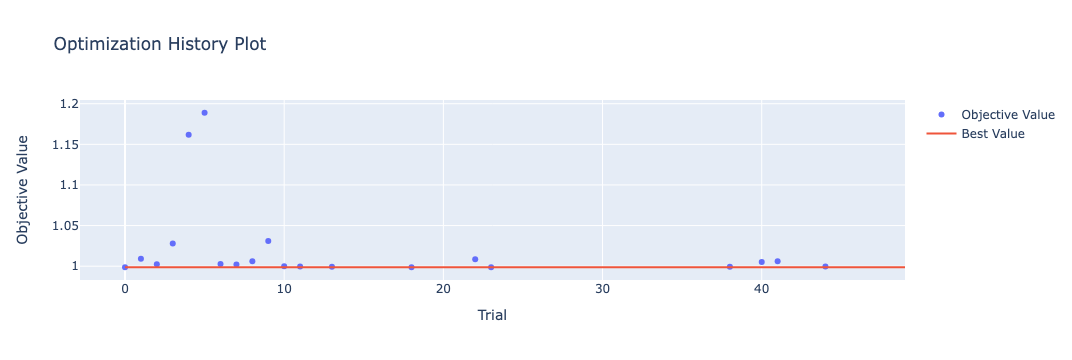

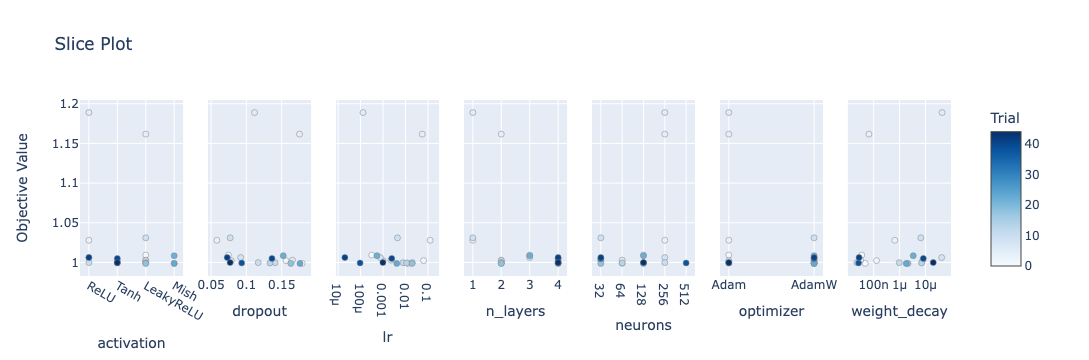

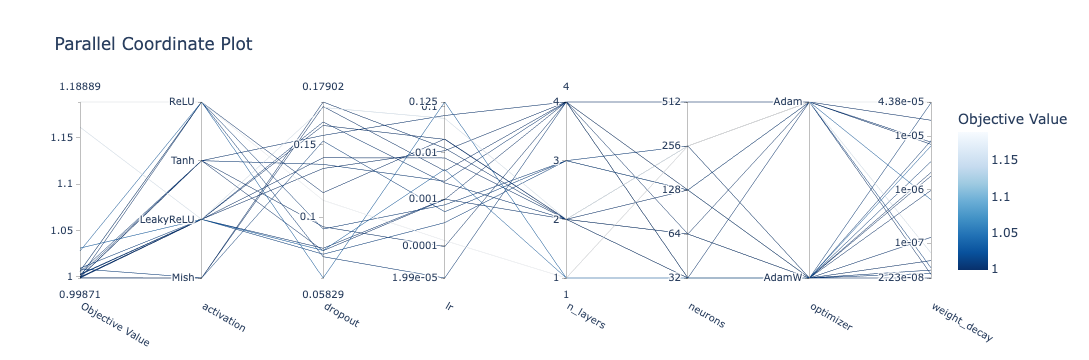

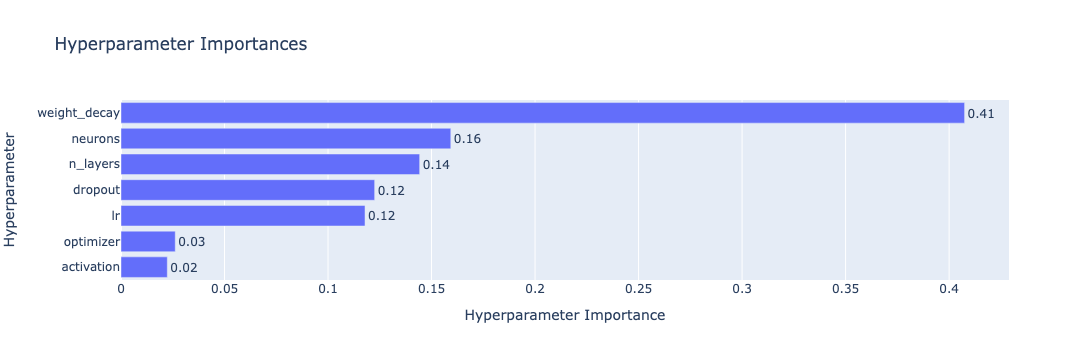

In [137]:
display(opt_vis.plot_optimization_history(study),
        opt_vis.plot_slice(study),
        opt_vis.plot_parallel_coordinate(study),
        opt_vis.plot_param_importances(study),
       )

In [144]:
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(lambda trial: objective(trial, X_train_3, y_train_3, X_val_3, y_val_3), n_trials=50, n_jobs=-1)

[I 2024-04-30 15:32:14,515] A new study created in memory with name: no-name-6e437d83-596f-4fb6-9b3c-a988e283d80a
[I 2024-04-30 15:32:16,660] Trial 3 finished with value: 0.9677845622372467 and parameters: {'n_layers': 2, 'neurons': 32, 'dropout': 0.142151630017716, 'lr': 0.06068383707668683, 'weight_decay': 6.640997587729755e-07, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.9677845622372467.
[I 2024-04-30 15:32:18,807] Trial 0 finished with value: 0.9649953028062732 and parameters: {'n_layers': 4, 'neurons': 32, 'dropout': 0.09552124547284804, 'lr': 0.0018136930225225924, 'weight_decay': 6.581951263621794e-05, 'optimizer': 'AdamW'}. Best is trial 0 with value: 0.9649953028062732.
[I 2024-04-30 15:32:20,169] Trial 2 finished with value: 1.0602151177643107 and parameters: {'n_layers': 1, 'neurons': 64, 'dropout': 0.13733514843611944, 'lr': 0.2794040826964036, 'weight_decay': 6.89946935470966e-07, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.9649953028062732.
[I 2024-04-30

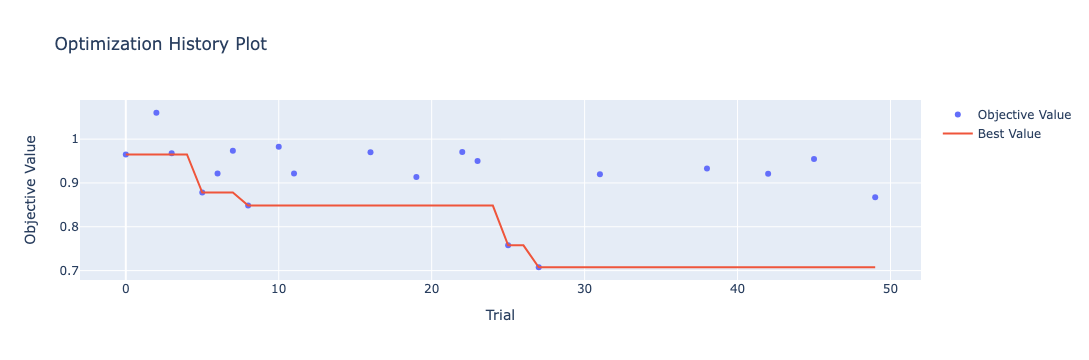

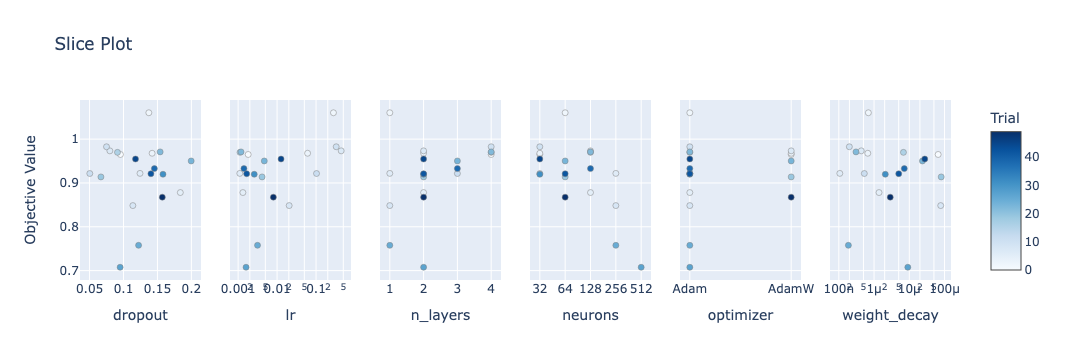

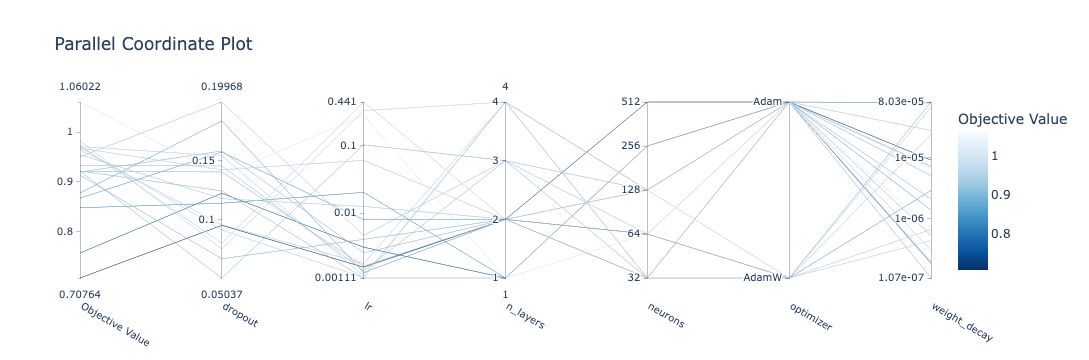

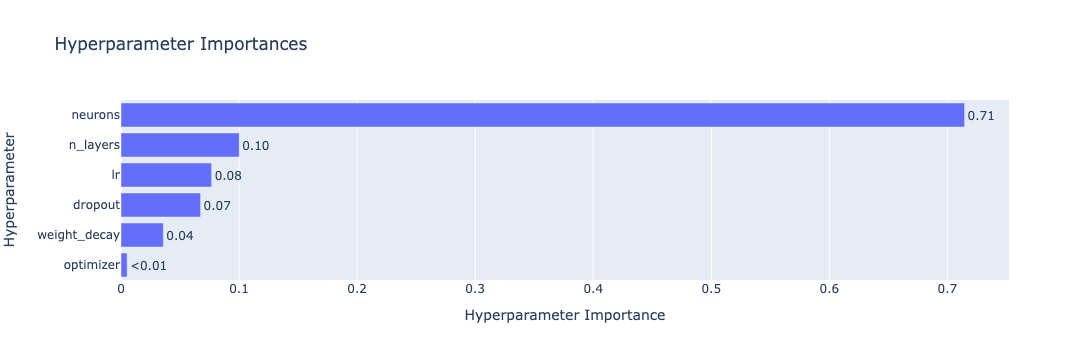

In [145]:
display(opt_vis.plot_optimization_history(study),
        opt_vis.plot_slice(study),
        opt_vis.plot_parallel_coordinate(study),
        opt_vis.plot_param_importances(study),
       )

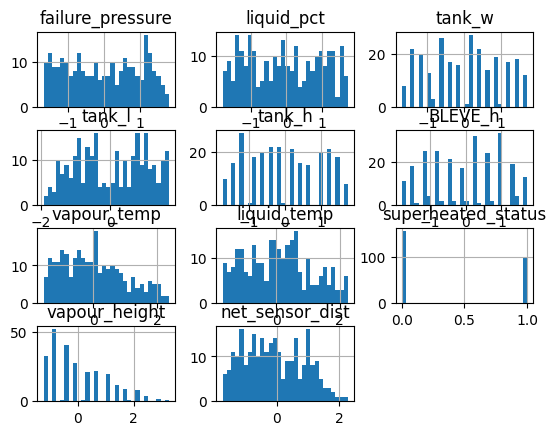

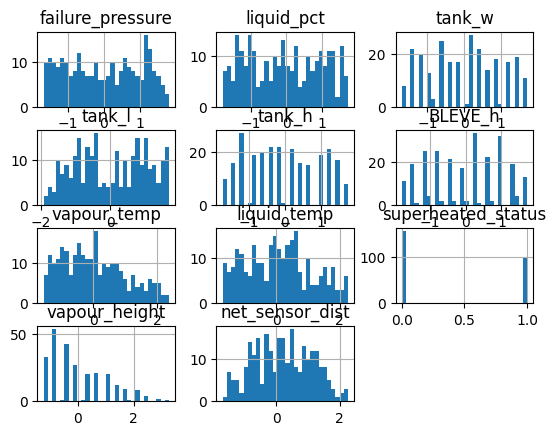

In [128]:
X_train_2.hist(bins = 30)
X_train_3.hist(bins = 30)
plt.show()

In [122]:
best_nn = train_best_nn(X_train_3, y_train_3, X_val_3, y_val_3, study.best_params)

In [123]:
mape_calc(pd.Series(np.ravel(qt.inverse_transform(pd.DataFrame(y_test_3))), index = y_test_3.index),
          predict(best_nn, X_test_3)
         )

/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but QuantileTransformer was fitted with feature names



0.5750958143563574

In [100]:
result = pd.DataFrame()
preds = []
features = pd.DataFrame()

start_time = time.time()
for sensor, (X_train, y_train, X_val, y_val, X_test, y_test, ext_test) in ho_data.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val), n_trials=50, n_jobs=-1)
    
    best_score = study.best_value
    best_params = study.best_params
    features[sensor] = best_params

    best_nn = train_best_nn(X_train, y_train, X_val, y_val, best_params)
    temp_pred = predict(best_nn, ext_test)
    preds.append(temp_pred)

    # result[sensor] = round(best_score,5)    

    total_time = time.time() - temp_time
    rem_time = ((time.time() - start_time)/sensor * (27-sensor))/60
    print(f"{sensor}: {best_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")

    val_mape = mape_calc(pd.Series(np.ravel(qt.inverse_transform(pd.DataFrame(y_val))), index = y_val.index), predict(best_nn, X_val))
    test_mape = mape_calc(pd.Series(np.ravel(qt.inverse_transform(pd.DataFrame(y_test))), index = y_test.index), predict(best_nn, X_test))
    print(f"Val: {val_mape:.5f} \tTest: {test_mape:.5f}")

    result.loc[sensor, "val"] = round(val_mape,5) 
    result.loc[sensor, "test"] = round(test_mape,5) 

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

[I 2024-04-30 15:01:33,003] A new study created in memory with name: no-name-a5595c58-40bf-4174-a3dd-545855e4d203
[I 2024-04-30 15:01:33,792] Trial 4 finished with value: 0.42182494965865963 and parameters: {'n_layers': 1, 'activation': 'LeakyReLU', 'neurons': 64, 'dropout': 0.1099457624872112, 'lr': 0.0025771030233725646, 'weight_decay': 1.2492947518772614e-08, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.42182494965865963.
[I 2024-04-30 15:01:35,875] Trial 8 finished with value: 0.9054736694868402 and parameters: {'n_layers': 4, 'activation': 'ReLU', 'neurons': 32, 'dropout': 0.10431182495786315, 'lr': 3.474170356029217e-05, 'weight_decay': 7.489540213786346e-05, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.42182494965865963.
[I 2024-04-30 15:01:36,018] Trial 2 finished with value: 0.5863533189086115 and parameters: {'n_layers': 1, 'activation': 'Mish', 'neurons': 256, 'dropout': 0.1517069196126051, 'lr': 0.07328572605840884, 'weight_decay': 3.576991230923783e-07, 'opti

1.0: 0.32985 	 13.62s 	 Rem: 5.90m
Val: 0.15138 	Test: 0.17864


[I 2024-04-30 15:01:47,531] Trial 5 finished with value: 1.318264291808815 and parameters: {'n_layers': 1, 'activation': 'Tanh', 'neurons': 128, 'dropout': 0.12430826869836638, 'lr': 0.00018275696219517993, 'weight_decay': 1.4448132760812855e-08, 'optimizer': 'Adam'}. Best is trial 5 with value: 1.318264291808815.
[I 2024-04-30 15:01:47,656] Trial 3 finished with value: 0.6166718794202986 and parameters: {'n_layers': 1, 'activation': 'Tanh', 'neurons': 128, 'dropout': 0.19654063367332458, 'lr': 0.009634031776952944, 'weight_decay': 4.527418568360179e-06, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.6166718794202986.
[I 2024-04-30 15:01:47,664] Trial 2 finished with value: 1.2280282603107675 and parameters: {'n_layers': 2, 'activation': 'Mish', 'neurons': 32, 'dropout': 0.09968562625358324, 'lr': 0.15255048755398498, 'weight_decay': 7.490255999604535e-08, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.6166718794202986.
[I 2024-04-30 15:01:47,768] Trial 1 finished with valu

2.0: 0.49369 	 6.70s 	 Rem: 4.23m
Val: 0.24391 	Test: 0.23617


[I 2024-04-30 15:01:54,194] Trial 7 finished with value: 0.9300559587026217 and parameters: {'n_layers': 1, 'activation': 'LeakyReLU', 'neurons': 32, 'dropout': 0.12008423721978012, 'lr': 0.002005309013115215, 'weight_decay': 3.5442965420926985e-06, 'optimizer': 'Adam'}. Best is trial 7 with value: 0.9300559587026217.
[I 2024-04-30 15:01:54,416] Trial 1 finished with value: 0.9040377114550187 and parameters: {'n_layers': 2, 'activation': 'ReLU', 'neurons': 64, 'dropout': 0.17265489171433995, 'lr': 0.000709841981028849, 'weight_decay': 6.404801744422534e-07, 'optimizer': 'AdamW'}. Best is trial 1 with value: 0.9040377114550187.
[I 2024-04-30 15:01:54,580] Trial 0 finished with value: 0.8549163476330363 and parameters: {'n_layers': 1, 'activation': 'Tanh', 'neurons': 32, 'dropout': 0.06342649105116119, 'lr': 2.1263136128966633e-05, 'weight_decay': 8.203955520914757e-05, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.8549163476330363.
[I 2024-04-30 15:01:54,689] Trial 2 finished with

3.0: 0.85492 	 7.63s 	 Rem: 3.73m
Val: 0.72067 	Test: 0.75557


[I 2024-04-30 15:02:01,713] Trial 1 finished with value: 0.6075639087817443 and parameters: {'n_layers': 1, 'activation': 'Tanh', 'neurons': 64, 'dropout': 0.13675150309606904, 'lr': 0.06215913587251564, 'weight_decay': 3.9465131040090524e-05, 'optimizer': 'AdamW'}. Best is trial 1 with value: 0.6075639087817443.
[I 2024-04-30 15:02:01,852] Trial 5 finished with value: 0.5486391588319937 and parameters: {'n_layers': 1, 'activation': 'LeakyReLU', 'neurons': 128, 'dropout': 0.1084673464845815, 'lr': 0.04079222385244051, 'weight_decay': 4.661945503570644e-08, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.5486391588319937.
[I 2024-04-30 15:02:02,146] Trial 0 finished with value: 0.5855204442940581 and parameters: {'n_layers': 1, 'activation': 'Tanh', 'neurons': 64, 'dropout': 0.18586490558836033, 'lr': 0.0104038526301317, 'weight_decay': 4.569390992465745e-08, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.5486391588319937.
[I 2024-04-30 15:02:02,180] Trial 7 finished with value

4.0: 0.49696 	 5.88s 	 Rem: 3.24m
Val: 0.31560 	Test: 0.46162


[I 2024-04-30 15:02:08,456] Trial 4 finished with value: 0.5034650694560807 and parameters: {'n_layers': 2, 'activation': 'Tanh', 'neurons': 32, 'dropout': 0.1342627092105352, 'lr': 0.03944339662441302, 'weight_decay': 9.376822644690093e-05, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.5034650694560807.
[I 2024-04-30 15:02:08,539] Trial 1 finished with value: 0.5295426417924413 and parameters: {'n_layers': 2, 'activation': 'LeakyReLU', 'neurons': 64, 'dropout': 0.1521830050993426, 'lr': 0.00638891157335228, 'weight_decay': 6.526668396750747e-07, 'optimizer': 'AdamW'}. Best is trial 4 with value: 0.5034650694560807.
[I 2024-04-30 15:02:08,662] Trial 3 finished with value: 0.564391494723223 and parameters: {'n_layers': 2, 'activation': 'Mish', 'neurons': 64, 'dropout': 0.07082760149852246, 'lr': 0.05808045286566625, 'weight_decay': 7.143892450214215e-05, 'optimizer': 'AdamW'}. Best is trial 4 with value: 0.5034650694560807.
[I 2024-04-30 15:02:09,090] Trial 5 finished with value: 

5.0: 0.50153 	 7.39s 	 Rem: 3.02m
Val: 0.40120 	Test: 0.48799


[I 2024-04-30 15:02:15,294] Trial 2 finished with value: 0.6447018133582169 and parameters: {'n_layers': 1, 'activation': 'Mish', 'neurons': 128, 'dropout': 0.16355572159506454, 'lr': 0.08132332652075769, 'weight_decay': 1.5071234324321679e-06, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.6447018133582169.
[I 2024-04-30 15:02:15,817] Trial 6 finished with value: 0.4965817835610937 and parameters: {'n_layers': 3, 'activation': 'LeakyReLU', 'neurons': 128, 'dropout': 0.14391565706001747, 'lr': 0.004196723344670639, 'weight_decay': 2.7730209167129756e-06, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4965817835610937.
[I 2024-04-30 15:02:16,032] Trial 1 finished with value: 0.6780040730209614 and parameters: {'n_layers': 1, 'activation': 'ReLU', 'neurons': 512, 'dropout': 0.11390455222844842, 'lr': 0.060601584541151804, 'weight_decay': 6.279612747416957e-05, 'optimizer': 'AdamW'}. Best is trial 6 with value: 0.4965817835610937.
[I 2024-04-30 15:02:16,214] Trial 3 finished wit

6.0: 0.44049 	 4.89s 	 Rem: 2.69m
Val: 0.64983 	Test: 0.86925


[I 2024-04-30 15:02:21,942] Trial 2 finished with value: 0.34406461922394066 and parameters: {'n_layers': 1, 'activation': 'Tanh', 'neurons': 256, 'dropout': 0.18383239497235176, 'lr': 0.00028965962481788726, 'weight_decay': 2.5331273209479645e-06, 'optimizer': 'AdamW'}. Best is trial 2 with value: 0.34406461922394066.
[I 2024-04-30 15:02:23,222] Trial 0 finished with value: 0.277187142719051 and parameters: {'n_layers': 4, 'activation': 'LeakyReLU', 'neurons': 128, 'dropout': 0.19238777726033002, 'lr': 0.015737405862435223, 'weight_decay': 6.120461114518977e-05, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.277187142719051.
[I 2024-04-30 15:02:24,206] Trial 5 finished with value: 0.33518540228981286 and parameters: {'n_layers': 1, 'activation': 'LeakyReLU', 'neurons': 128, 'dropout': 0.13842281283258234, 'lr': 0.00010992053656354363, 'weight_decay': 7.651970637644009e-07, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.277187142719051.
[I 2024-04-30 15:02:27,339] Trial 7 fin

7.0: 0.25104 	 34.40s 	 Rem: 3.84m
Val: 0.22273 	Test: 0.34576


[I 2024-04-30 15:02:55,712] Trial 4 finished with value: 0.34083933468997946 and parameters: {'n_layers': 2, 'activation': 'LeakyReLU', 'neurons': 128, 'dropout': 0.15779708244482138, 'lr': 0.011429121027363966, 'weight_decay': 1.292350121531776e-06, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.34083933468997946.
[I 2024-04-30 15:02:58,253] Trial 6 finished with value: 0.3309683721822849 and parameters: {'n_layers': 3, 'activation': 'Tanh', 'neurons': 64, 'dropout': 0.1532887593832858, 'lr': 0.0013713786015720432, 'weight_decay': 1.0501033901210412e-08, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.3309683721822849.
[I 2024-04-30 15:03:04,261] Trial 0 finished with value: 0.33136654473987576 and parameters: {'n_layers': 3, 'activation': 'Mish', 'neurons': 128, 'dropout': 0.13636432395270615, 'lr': 0.0005484076000505324, 'weight_decay': 1.32947077931027e-08, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.3309683721822849.
[I 2024-04-30 15:03:05,733] Trial 10 finished w

8.0: 0.31212 	 19.38s 	 Rem: 3.96m
Val: 0.31549 	Test: 0.35614


[I 2024-04-30 15:03:14,116] Trial 1 finished with value: 1.3638461036365546 and parameters: {'n_layers': 1, 'activation': 'Tanh', 'neurons': 128, 'dropout': 0.12591748143908463, 'lr': 3.05780096327586e-05, 'weight_decay': 5.579583180629221e-07, 'optimizer': 'AdamW'}. Best is trial 1 with value: 1.3638461036365546.
[I 2024-04-30 15:03:14,307] Trial 6 finished with value: 0.623974583194564 and parameters: {'n_layers': 2, 'activation': 'ReLU', 'neurons': 32, 'dropout': 0.09753714859225557, 'lr': 0.1495198285665303, 'weight_decay': 7.014924760985033e-05, 'optimizer': 'AdamW'}. Best is trial 6 with value: 0.623974583194564.
[I 2024-04-30 15:03:14,345] Trial 0 finished with value: 1.0942866164320977 and parameters: {'n_layers': 1, 'activation': 'LeakyReLU', 'neurons': 32, 'dropout': 0.18706498688634315, 'lr': 3.995194072681422e-05, 'weight_decay': 2.8154311698011938e-08, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.623974583194564.
[I 2024-04-30 15:03:14,719] Trial 5 finished with val

9.0: 0.49413 	 13.07s 	 Rem: 3.77m
Val: 0.43055 	Test: 0.41221


[I 2024-04-30 15:03:28,063] Trial 1 finished with value: 0.30898745381072257 and parameters: {'n_layers': 2, 'activation': 'ReLU', 'neurons': 32, 'dropout': 0.059360642789792015, 'lr': 0.0008167695231688589, 'weight_decay': 1.9681818372767686e-06, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.30898745381072257.
[I 2024-04-30 15:03:28,964] Trial 3 finished with value: 2.1799247504249597 and parameters: {'n_layers': 3, 'activation': 'LeakyReLU', 'neurons': 256, 'dropout': 0.1543905239816536, 'lr': 0.13806431830240845, 'weight_decay': 5.145519778970405e-05, 'optimizer': 'AdamW'}. Best is trial 1 with value: 0.30898745381072257.
[I 2024-04-30 15:03:29,610] Trial 7 finished with value: 0.22485214847179635 and parameters: {'n_layers': 2, 'activation': 'LeakyReLU', 'neurons': 128, 'dropout': 0.16187469626874312, 'lr': 0.003234389671304659, 'weight_decay': 7.562039420301894e-07, 'optimizer': 'AdamW'}. Best is trial 7 with value: 0.22485214847179635.
[I 2024-04-30 15:03:29,813] Trial 0 fi

10.0: 0.20746 	 26.91s 	 Rem: 3.96m
Val: 0.24082 	Test: 0.25244


[I 2024-04-30 15:03:55,868] Trial 7 finished with value: 0.3426510953480282 and parameters: {'n_layers': 2, 'activation': 'ReLU', 'neurons': 64, 'dropout': 0.10530860034599687, 'lr': 0.010859219117896363, 'weight_decay': 8.581472456019021e-05, 'optimizer': 'AdamW'}. Best is trial 7 with value: 0.3426510953480282.
[I 2024-04-30 15:03:57,999] Trial 5 finished with value: 0.29668487139974414 and parameters: {'n_layers': 2, 'activation': 'Tanh', 'neurons': 64, 'dropout': 0.0527580070350036, 'lr': 0.01527934177538472, 'weight_decay': 1.9878462692645482e-07, 'optimizer': 'AdamW'}. Best is trial 5 with value: 0.29668487139974414.
[I 2024-04-30 15:03:59,675] Trial 1 finished with value: 0.3618683637266072 and parameters: {'n_layers': 2, 'activation': 'ReLU', 'neurons': 64, 'dropout': 0.059104930592524196, 'lr': 0.0005026904562428494, 'weight_decay': 1.5746684299038344e-05, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.29668487139974414.
[I 2024-04-30 15:04:00,676] Trial 6 finished with v

11.0: 0.25295 	 18.22s 	 Rem: 3.83m
Val: 0.27970 	Test: 0.33923


[I 2024-04-30 15:04:12,584] Trial 3 finished with value: 0.5362024895367312 and parameters: {'n_layers': 1, 'activation': 'Tanh', 'neurons': 256, 'dropout': 0.17989123128649992, 'lr': 0.002723683274214407, 'weight_decay': 8.91994117072075e-07, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.5362024895367312.
[I 2024-04-30 15:04:14,878] Trial 7 finished with value: 0.7265930345825806 and parameters: {'n_layers': 1, 'activation': 'ReLU', 'neurons': 32, 'dropout': 0.13385748385072938, 'lr': 0.0005790685476084939, 'weight_decay': 4.435082905263441e-08, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.5362024895367312.
[I 2024-04-30 15:04:15,353] Trial 0 finished with value: 0.7217983059963111 and parameters: {'n_layers': 1, 'activation': 'Mish', 'neurons': 128, 'dropout': 0.19924574223777153, 'lr': 0.00031205094944489594, 'weight_decay': 2.2264168012132746e-07, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.5362024895367312.
[I 2024-04-30 15:04:15,494] Trial 2 finished with va

12.0: 0.53129 	 10.20s 	 Rem: 3.51m
Val: 0.28713 	Test: 0.30111


[I 2024-04-30 15:04:22,906] Trial 7 finished with value: 0.7110896828021156 and parameters: {'n_layers': 1, 'activation': 'LeakyReLU', 'neurons': 64, 'dropout': 0.1345239437990633, 'lr': 1.6382638540971776e-05, 'weight_decay': 2.2135060043241613e-07, 'optimizer': 'Adam'}. Best is trial 7 with value: 0.7110896828021156.
[I 2024-04-30 15:04:23,654] Trial 2 finished with value: 0.15785123314734884 and parameters: {'n_layers': 1, 'activation': 'Mish', 'neurons': 128, 'dropout': 0.0538143531982849, 'lr': 0.04109908927843064, 'weight_decay': 1.1476227005149396e-07, 'optimizer': 'AdamW'}. Best is trial 2 with value: 0.15785123314734884.
[I 2024-04-30 15:04:25,614] Trial 8 finished with value: 0.16347742307026916 and parameters: {'n_layers': 2, 'activation': 'Mish', 'neurons': 32, 'dropout': 0.05996134905687385, 'lr': 0.05520372499035707, 'weight_decay': 2.0825644374555176e-06, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.15785123314734884.
[I 2024-04-30 15:04:26,431] Trial 4 finished w

13.0: 0.13813 	 8.62s 	 Rem: 3.18m
Val: 0.17411 	Test: 0.16181


[I 2024-04-30 15:04:30,800] Trial 5 finished with value: 0.38539235461129534 and parameters: {'n_layers': 1, 'activation': 'LeakyReLU', 'neurons': 32, 'dropout': 0.1907552859919307, 'lr': 0.1927202472987069, 'weight_decay': 3.6212767594442764e-06, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.38539235461129534.
[I 2024-04-30 15:04:31,791] Trial 3 finished with value: 0.2719164003364844 and parameters: {'n_layers': 2, 'activation': 'LeakyReLU', 'neurons': 64, 'dropout': 0.07915842541412693, 'lr': 0.021274109708632763, 'weight_decay': 5.872228299910774e-05, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.2719164003364844.
[I 2024-04-30 15:04:33,721] Trial 0 finished with value: 0.3018466810333422 and parameters: {'n_layers': 4, 'activation': 'ReLU', 'neurons': 32, 'dropout': 0.11239209103996003, 'lr': 0.0017748401088369325, 'weight_decay': 2.1508224689118773e-05, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.2719164003364844.
[I 2024-04-30 15:04:33,924] Trial 6 finished 

14.0: 0.21756 	 24.99s 	 Rem: 3.13m
Val: 0.24223 	Test: 0.24239


[I 2024-04-30 15:04:56,555] Trial 6 finished with value: 0.7657200978718444 and parameters: {'n_layers': 2, 'activation': 'Tanh', 'neurons': 256, 'dropout': 0.06036972139328402, 'lr': 0.0023280964430480566, 'weight_decay': 1.3638212516877065e-08, 'optimizer': 'AdamW'}. Best is trial 6 with value: 0.7657200978718444.
[I 2024-04-30 15:04:57,458] Trial 0 finished with value: 0.6204558650793202 and parameters: {'n_layers': 2, 'activation': 'ReLU', 'neurons': 32, 'dropout': 0.08318895961880693, 'lr': 0.010033105607912308, 'weight_decay': 1.8855647491021778e-07, 'optimizer': 'AdamW'}. Best is trial 0 with value: 0.6204558650793202.
[I 2024-04-30 15:04:59,001] Trial 9 finished with value: 0.7885834165731244 and parameters: {'n_layers': 2, 'activation': 'LeakyReLU', 'neurons': 512, 'dropout': 0.11720511371305563, 'lr': 0.00022512993165447955, 'weight_decay': 3.202983432587497e-08, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.6204558650793202.
[I 2024-04-30 15:04:59,086] Trial 7 finished

15.0: 0.55722 	 8.09s 	 Rem: 2.80m
Val: 0.32293 	Test: 0.36830


[I 2024-04-30 15:05:04,221] Trial 3 finished with value: 0.36345412223564477 and parameters: {'n_layers': 3, 'activation': 'Tanh', 'neurons': 32, 'dropout': 0.07045680735701375, 'lr': 0.032085635218739694, 'weight_decay': 3.2013361903359464e-07, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.36345412223564477.
[I 2024-04-30 15:05:06,782] Trial 7 finished with value: 0.5588249406833681 and parameters: {'n_layers': 2, 'activation': 'LeakyReLU', 'neurons': 64, 'dropout': 0.18527957918435423, 'lr': 0.0004226478328312779, 'weight_decay': 4.914356581687305e-06, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.36345412223564477.
[I 2024-04-30 15:05:07,275] Trial 0 finished with value: 0.4563466604100239 and parameters: {'n_layers': 4, 'activation': 'ReLU', 'neurons': 128, 'dropout': 0.10562318728188853, 'lr': 0.0006650989246883752, 'weight_decay': 4.61201825981758e-05, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.36345412223564477.
[I 2024-04-30 15:05:08,294] Trial 9 finished 

16.0: 0.33712 	 10.70s 	 Rem: 2.53m
Val: 0.21027 	Test: 0.16743


[I 2024-04-30 15:05:17,971] Trial 1 finished with value: 0.990507933225817 and parameters: {'n_layers': 3, 'activation': 'LeakyReLU', 'neurons': 32, 'dropout': 0.05283056583279261, 'lr': 0.013923213033927349, 'weight_decay': 1.7393047985920702e-08, 'optimizer': 'AdamW'}. Best is trial 1 with value: 0.990507933225817.
[I 2024-04-30 15:05:19,245] Trial 2 finished with value: 0.968798819082028 and parameters: {'n_layers': 3, 'activation': 'Tanh', 'neurons': 128, 'dropout': 0.15242559191689026, 'lr': 0.0007383933584378446, 'weight_decay': 1.5914572295170312e-08, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.968798819082028.
[I 2024-04-30 15:05:19,655] Trial 7 finished with value: 1.0208880600596175 and parameters: {'n_layers': 2, 'activation': 'Mish', 'neurons': 128, 'dropout': 0.10352296314057455, 'lr': 0.003909363186002536, 'weight_decay': 9.840447021301089e-05, 'optimizer': 'AdamW'}. Best is trial 2 with value: 0.968798819082028.
[I 2024-04-30 15:05:20,387] Trial 10 finished with 

17.0: 0.65013 	 12.77s 	 Rem: 2.29m
Val: 0.60496 	Test: 0.61344


[I 2024-04-30 15:05:27,020] Trial 2 finished with value: 3.7395346769669824 and parameters: {'n_layers': 1, 'activation': 'LeakyReLU', 'neurons': 64, 'dropout': 0.12980940643523023, 'lr': 0.0008397758578916969, 'weight_decay': 6.200073021272692e-05, 'optimizer': 'Adam'}. Best is trial 2 with value: 3.7395346769669824.
[I 2024-04-30 15:05:27,674] Trial 0 finished with value: 1.2667882944224287 and parameters: {'n_layers': 2, 'activation': 'ReLU', 'neurons': 64, 'dropout': 0.14505865848846394, 'lr': 0.0018905016418490777, 'weight_decay': 3.60538638804323e-05, 'optimizer': 'Adam'}. Best is trial 0 with value: 1.2667882944224287.
[I 2024-04-30 15:05:28,147] Trial 5 finished with value: 3.893738543938083 and parameters: {'n_layers': 2, 'activation': 'ReLU', 'neurons': 256, 'dropout': 0.058213173598179055, 'lr': 0.0012433278805168717, 'weight_decay': 2.954918315857252e-07, 'optimizer': 'AdamW'}. Best is trial 0 with value: 1.2667882944224287.
[I 2024-04-30 15:05:28,157] Trial 3 finished with

18.0: 0.74924 	 12.04s 	 Rem: 2.05m
Val: 0.37176 	Test: 0.40002


[I 2024-04-30 15:05:39,557] Trial 4 finished with value: 0.6298529569528695 and parameters: {'n_layers': 1, 'activation': 'Tanh', 'neurons': 128, 'dropout': 0.10287551753968971, 'lr': 5.037452817066855e-05, 'weight_decay': 6.300095132768849e-08, 'optimizer': 'AdamW'}. Best is trial 4 with value: 0.6298529569528695.
[I 2024-04-30 15:05:39,693] Trial 0 finished with value: 0.6232818551437357 and parameters: {'n_layers': 1, 'activation': 'LeakyReLU', 'neurons': 128, 'dropout': 0.11825838572449814, 'lr': 0.014091921871897761, 'weight_decay': 1.4710831255997534e-06, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.6232818551437357.
[I 2024-04-30 15:05:39,950] Trial 5 finished with value: 0.6243668896049742 and parameters: {'n_layers': 1, 'activation': 'ReLU', 'neurons': 32, 'dropout': 0.17404697419377993, 'lr': 0.004937936194284682, 'weight_decay': 1.8576455834762148e-05, 'optimizer': 'AdamW'}. Best is trial 0 with value: 0.6232818551437357.
[I 2024-04-30 15:05:40,182] Trial 6 finished w

19.0: 0.46903 	 9.93s 	 Rem: 1.79m
Val: 0.41612 	Test: 0.43142


[I 2024-04-30 15:05:50,634] Trial 0 finished with value: 1.5715594115082951 and parameters: {'n_layers': 1, 'activation': 'ReLU', 'neurons': 32, 'dropout': 0.07478492667401304, 'lr': 0.0167137972481008, 'weight_decay': 1.7376305628552307e-05, 'optimizer': 'Adam'}. Best is trial 0 with value: 1.5715594115082951.
[I 2024-04-30 15:05:50,899] Trial 2 finished with value: 1.5632833283327476 and parameters: {'n_layers': 1, 'activation': 'ReLU', 'neurons': 128, 'dropout': 0.09314678684046218, 'lr': 0.0368593352306267, 'weight_decay': 2.886691364234263e-07, 'optimizer': 'AdamW'}. Best is trial 2 with value: 1.5632833283327476.
[I 2024-04-30 15:05:50,971] Trial 6 finished with value: 1.3378237097956778 and parameters: {'n_layers': 2, 'activation': 'Tanh', 'neurons': 64, 'dropout': 0.18886142631911973, 'lr': 0.008664238364573891, 'weight_decay': 3.234540462966864e-05, 'optimizer': 'Adam'}. Best is trial 6 with value: 1.3378237097956778.
[I 2024-04-30 15:05:52,364] Trial 7 finished with value: 2.

20.0: 0.74373 	 12.13s 	 Rem: 1.56m
Val: 0.35154 	Test: 0.39441


[I 2024-04-30 15:06:02,396] Trial 7 finished with value: 0.8661418158687224 and parameters: {'n_layers': 2, 'activation': 'Tanh', 'neurons': 32, 'dropout': 0.09415140356523415, 'lr': 0.0036055914596104955, 'weight_decay': 6.473326846724777e-08, 'optimizer': 'Adam'}. Best is trial 7 with value: 0.8661418158687224.
[I 2024-04-30 15:06:03,010] Trial 6 finished with value: 0.8516172460848949 and parameters: {'n_layers': 3, 'activation': 'Tanh', 'neurons': 64, 'dropout': 0.11350620174469389, 'lr': 0.002198723930021474, 'weight_decay': 3.059371561836889e-08, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.8516172460848949.
[I 2024-04-30 15:06:03,063] Trial 4 finished with value: 0.9011570585518249 and parameters: {'n_layers': 2, 'activation': 'ReLU', 'neurons': 128, 'dropout': 0.17960925520940335, 'lr': 0.012870904193104394, 'weight_decay': 4.92613800928066e-07, 'optimizer': 'AdamW'}. Best is trial 6 with value: 0.8516172460848949.
[I 2024-04-30 15:06:03,192] Trial 0 finished with value:

21.0: 0.80920 	 23.41s 	 Rem: 1.39m
Val: 0.29662 	Test: 0.41809


[I 2024-04-30 15:06:25,336] Trial 1 finished with value: 1.1456566698032864 and parameters: {'n_layers': 1, 'activation': 'LeakyReLU', 'neurons': 128, 'dropout': 0.1712004729903983, 'lr': 7.013534411058602e-05, 'weight_decay': 2.839359289632059e-05, 'optimizer': 'Adam'}. Best is trial 1 with value: 1.1456566698032864.
[I 2024-04-30 15:06:26,204] Trial 3 finished with value: 1.0629533230385755 and parameters: {'n_layers': 2, 'activation': 'Mish', 'neurons': 32, 'dropout': 0.06735243910138554, 'lr': 0.00012280144905607674, 'weight_decay': 2.8877253844074766e-08, 'optimizer': 'AdamW'}. Best is trial 3 with value: 1.0629533230385755.
[I 2024-04-30 15:06:29,046] Trial 9 finished with value: 0.9206818387151872 and parameters: {'n_layers': 3, 'activation': 'Mish', 'neurons': 32, 'dropout': 0.06269838988647208, 'lr': 0.0006143018816328747, 'weight_decay': 1.624849847196494e-08, 'optimizer': 'Adam'}. Best is trial 9 with value: 0.9206818387151872.
[I 2024-04-30 15:06:30,584] Trial 6 finished wi

22.0: 0.78279 	 40.20s 	 Rem: 1.26m
Val: 0.34044 	Test: 0.43745


[I 2024-04-30 15:07:05,811] Trial 5 finished with value: 0.8207585199280549 and parameters: {'n_layers': 1, 'activation': 'Mish', 'neurons': 64, 'dropout': 0.18280869813588685, 'lr': 0.0035308479752388794, 'weight_decay': 7.326111543731685e-06, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.8207585199280549.
[I 2024-04-30 15:07:06,813] Trial 0 finished with value: 1.3884625278523497 and parameters: {'n_layers': 1, 'activation': 'Mish', 'neurons': 256, 'dropout': 0.0991750569025959, 'lr': 1.2112573034480002e-05, 'weight_decay': 1.7979859386707665e-08, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.8207585199280549.
[I 2024-04-30 15:07:07,880] Trial 4 finished with value: 0.91854234692835 and parameters: {'n_layers': 1, 'activation': 'LeakyReLU', 'neurons': 256, 'dropout': 0.1363882938734181, 'lr': 0.0001772656219482502, 'weight_decay': 1.8398425109204823e-06, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.8207585199280549.
[I 2024-04-30 15:07:09,153] Trial 9 finished with

23.0: 0.73888 	 24.30s 	 Rem: 1.03m
Val: 0.67940 	Test: 0.74001


[I 2024-04-30 15:07:30,515] Trial 0 finished with value: 0.5592185203150722 and parameters: {'n_layers': 1, 'activation': 'Mish', 'neurons': 64, 'dropout': 0.11129126698733388, 'lr': 0.0034186481774957102, 'weight_decay': 6.673800000434784e-05, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.5592185203150722.
[I 2024-04-30 15:07:30,777] Trial 5 finished with value: 0.9242120374346802 and parameters: {'n_layers': 3, 'activation': 'Tanh', 'neurons': 64, 'dropout': 0.07698458540922909, 'lr': 0.11634848445587968, 'weight_decay': 2.6293169709242712e-05, 'optimizer': 'AdamW'}. Best is trial 0 with value: 0.5592185203150722.
[I 2024-04-30 15:07:33,090] Trial 3 finished with value: 0.6474907159904304 and parameters: {'n_layers': 1, 'activation': 'Tanh', 'neurons': 256, 'dropout': 0.15398233289962815, 'lr': 0.12337216672847551, 'weight_decay': 4.877622837483389e-08, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.5592185203150722.
[I 2024-04-30 15:07:34,600] Trial 6 finished with value:

24.0: 0.55060 	 14.60s 	 Rem: 0.77m
Val: 0.36077 	Test: 0.40644


[I 2024-04-30 15:07:43,978] Trial 3 finished with value: 1.47129550046105 and parameters: {'n_layers': 1, 'activation': 'LeakyReLU', 'neurons': 32, 'dropout': 0.17322291935666173, 'lr': 0.026009159951014268, 'weight_decay': 5.357290721527839e-07, 'optimizer': 'AdamW'}. Best is trial 3 with value: 1.47129550046105.
[I 2024-04-30 15:07:45,309] Trial 2 finished with value: 1.134329498349267 and parameters: {'n_layers': 2, 'activation': 'Mish', 'neurons': 32, 'dropout': 0.07505999723320061, 'lr': 0.00047094407377199735, 'weight_decay': 4.4333408597522785e-08, 'optimizer': 'AdamW'}. Best is trial 2 with value: 1.134329498349267.
[I 2024-04-30 15:07:45,660] Trial 7 finished with value: 0.9872635713786105 and parameters: {'n_layers': 4, 'activation': 'Tanh', 'neurons': 32, 'dropout': 0.12158558323132383, 'lr': 0.05084918228683683, 'weight_decay': 1.3799049890212915e-05, 'optimizer': 'AdamW'}. Best is trial 7 with value: 0.9872635713786105.
[I 2024-04-30 15:07:45,864] Trial 6 finished with val

25.0: 0.94518 	 10.17s 	 Rem: 0.51m
Val: 0.53743 	Test: 0.68280


[I 2024-04-30 15:07:54,329] Trial 5 finished with value: 1.8489258852713504 and parameters: {'n_layers': 2, 'activation': 'ReLU', 'neurons': 64, 'dropout': 0.17615323715759568, 'lr': 8.35819802873528e-05, 'weight_decay': 3.43282136933785e-06, 'optimizer': 'AdamW'}. Best is trial 5 with value: 1.8489258852713504.
[I 2024-04-30 15:07:54,822] Trial 4 finished with value: 0.8183758584756261 and parameters: {'n_layers': 4, 'activation': 'LeakyReLU', 'neurons': 32, 'dropout': 0.10790168461217714, 'lr': 0.006695524005158382, 'weight_decay': 1.731006890311901e-08, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.8183758584756261.
[I 2024-04-30 15:07:56,365] Trial 6 finished with value: 1.0873342194554543 and parameters: {'n_layers': 2, 'activation': 'Tanh', 'neurons': 128, 'dropout': 0.16647358678682977, 'lr': 0.154340258709724, 'weight_decay': 1.61578811423461e-05, 'optimizer': 'AdamW'}. Best is trial 4 with value: 0.8183758584756261.
[I 2024-04-30 15:07:56,677] Trial 2 finished with value

26.0: 0.78243 	 16.87s 	 Rem: 0.25m
Val: 0.41318 	Test: 0.50640


[I 2024-04-30 15:08:11,509] Trial 4 finished with value: 3.4949931858662757 and parameters: {'n_layers': 1, 'activation': 'Mish', 'neurons': 256, 'dropout': 0.13037947940005937, 'lr': 1.4375836353861203e-05, 'weight_decay': 5.315977363772883e-06, 'optimizer': 'Adam'}. Best is trial 4 with value: 3.4949931858662757.
[I 2024-04-30 15:08:11,962] Trial 3 finished with value: 1.1683171983139966 and parameters: {'n_layers': 1, 'activation': 'ReLU', 'neurons': 128, 'dropout': 0.0632874601803958, 'lr': 0.00013864732962625388, 'weight_decay': 4.960586371675189e-06, 'optimizer': 'Adam'}. Best is trial 3 with value: 1.1683171983139966.
[I 2024-04-30 15:08:12,179] Trial 1 finished with value: 0.7940277359384765 and parameters: {'n_layers': 1, 'activation': 'Tanh', 'neurons': 32, 'dropout': 0.19394897882688894, 'lr': 0.003369265503075356, 'weight_decay': 8.100033206775251e-06, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7940277359384765.
[I 2024-04-30 15:08:12,627] Trial 8 finished with val

27.0: 0.77291 	 17.52s 	 Rem: 0.00m
Val: 0.38730 	Test: 0.44147


/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [108]:
result

val     test
1   0.15138  0.17864
2   0.24391  0.23617
3   0.72067  0.75557
4   0.31560  0.46162
5   0.40120  0.48799
6   0.64983  0.86925
7   0.22273  0.34576
8   0.31549  0.35614
9   0.43055  0.41221
10  0.24082  0.25244
11  0.27970  0.33923
12  0.28713  0.30111
13  0.17411  0.16181
14  0.24223  0.24239
15  0.32293  0.36830
16  0.21027  0.16743
17  0.60496  0.61344
18  0.37176  0.40002
19  0.41612  0.43142
20  0.35154  0.39441
21  0.29662  0.41809
22  0.34044  0.43745
23  0.67940  0.74001
24  0.36077  0.40644
25  0.53743  0.68280
26  0.41318  0.50640
27  0.38730  0.44147

In [573]:
# Issue: predictions for small values = shit, high MAPE --> better for sensor 10?
# Transform test data to 0 mean, 1 var, then predict on original target_pressure

In [105]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

### With Obstacle Data

In [471]:
result = pd.DataFrame()
preds = []
features = pd.DataFrame()

start_time = time.time()
for sensor, (X_train, y_train, X_val, y_val, X_test, y_test, ext_test) in ho_data.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val), n_trials=50, n_jobs=-1)
    
    best_score = study.best_value
    best_params = study.best_params
    features[sensor] = best_params

    best_nn = train_best_nn(X_train, y_train, X_val, y_val, best_params)
    temp_pred = predict(best_nn, ext_test)
    preds.append(temp_pred)

    # result[sensor] = round(best_score,5)    

    total_time = time.time() - temp_time
    rem_time = ((time.time() - start_time)/sensor * (27-sensor))/60
    print(f"{sensor}: {best_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")

    val_mape = mape_calc(pd.Series(np.ravel(qt.inverse_transform(pd.DataFrame(y_val))), index = y_val.index), predict(best_nn, X_val))
    test_mape = mape_calc(pd.Series(np.ravel(qt.inverse_transform(pd.DataFrame(y_test))), index = y_test.index), predict(best_nn, X_test))
    print(f"Val: {val_mape:.5f} \tTest: {test_mape:.5f}")

    result.loc[sensor, "val"] = round(val_mape,5) 
    result.loc[sensor, "test"] = round(test_mape,5) 

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

[I 2024-04-30 23:57:28,610] A new study created in memory with name: no-name-889caac0-27ed-416e-b72e-1297969608b9
[I 2024-04-30 23:57:30,604] Trial 6 finished with value: 0.4844134105887282 and parameters: {'n_layers': 1, 'neurons': 32, 'dropout': 0.06320846951715905, 'lr': 0.42771864144673016, 'weight_decay': 5.247574184421225e-07, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.4844134105887282.
[I 2024-04-30 23:57:30,787] Trial 2 finished with value: 0.4510547619930258 and parameters: {'n_layers': 1, 'neurons': 32, 'dropout': 0.13679681796692397, 'lr': 0.0022296476431641174, 'weight_decay': 1.118447292503548e-07, 'optimizer': 'AdamW'}. Best is trial 2 with value: 0.4510547619930258.
[I 2024-04-30 23:57:31,712] Trial 4 finished with value: 0.3953612357677789 and parameters: {'n_layers': 4, 'neurons': 32, 'dropout': 0.10753519732943248, 'lr': 0.002492023073863687, 'weight_decay': 2.8492103172100314e-06, 'optimizer': 'AdamW'}. Best is trial 4 with value: 0.3953612357677789.
[I 2024

1.0: 0.36157 	 12.26s 	 Rem: 5.31m
Val: 0.16960 	Test: 0.23254


[I 2024-04-30 23:57:41,651] Trial 2 finished with value: 1.9649954833035745 and parameters: {'n_layers': 3, 'neurons': 32, 'dropout': 0.16655886195704758, 'lr': 0.005314058405929101, 'weight_decay': 1.7680938990499564e-07, 'optimizer': 'AdamW'}. Best is trial 2 with value: 1.9649954833035745.
[I 2024-04-30 23:57:41,677] Trial 3 finished with value: 0.8994148983900312 and parameters: {'n_layers': 2, 'neurons': 32, 'dropout': 0.05037041083656653, 'lr': 0.0021595367090823394, 'weight_decay': 4.135714684289862e-05, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.8994148983900312.
[I 2024-04-30 23:57:41,773] Trial 4 finished with value: 0.839835551777121 and parameters: {'n_layers': 1, 'neurons': 64, 'dropout': 0.18473712532164316, 'lr': 0.004008360584635491, 'weight_decay': 1.4748723942108368e-07, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.839835551777121.
[I 2024-04-30 23:57:42,701] Trial 7 finished with value: 1.7875349950810988 and parameters: {'n_layers': 2, 'neurons': 128

2.0: 0.51809 	 5.35s 	 Rem: 3.67m
Val: 0.19903 	Test: 0.23508


[I 2024-04-30 23:57:46,734] Trial 1 finished with value: 0.9670602512467155 and parameters: {'n_layers': 3, 'neurons': 32, 'dropout': 0.12587610149770712, 'lr': 0.0033332775404507223, 'weight_decay': 4.3526601342597244e-07, 'optimizer': 'AdamW'}. Best is trial 1 with value: 0.9670602512467155.
[I 2024-04-30 23:57:47,292] Trial 2 finished with value: 0.8430087594168689 and parameters: {'n_layers': 1, 'neurons': 128, 'dropout': 0.08871254798248782, 'lr': 0.07313631114737337, 'weight_decay': 4.177015823817575e-06, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.8430087594168689.
[I 2024-04-30 23:57:47,931] Trial 8 finished with value: 0.8479032169440819 and parameters: {'n_layers': 1, 'neurons': 32, 'dropout': 0.11139409963332775, 'lr': 0.002978261287294906, 'weight_decay': 1.7878057975279563e-07, 'optimizer': 'AdamW'}. Best is trial 2 with value: 0.8430087594168689.
[I 2024-04-30 23:57:48,645] Trial 7 finished with value: 0.8506161541850903 and parameters: {'n_layers': 1, 'neurons': 

3.0: 0.77795 	 8.18s 	 Rem: 3.44m
Val: 0.57345 	Test: 0.63872


[I 2024-04-30 23:57:55,113] Trial 1 finished with value: 0.5763313972611531 and parameters: {'n_layers': 1, 'neurons': 128, 'dropout': 0.12658121829615873, 'lr': 0.03584564029279473, 'weight_decay': 1.4519017955459092e-06, 'optimizer': 'AdamW'}. Best is trial 1 with value: 0.5763313972611531.
[I 2024-04-30 23:57:55,936] Trial 3 finished with value: 0.5589937572360841 and parameters: {'n_layers': 2, 'neurons': 128, 'dropout': 0.1685064079414653, 'lr': 0.022056031426284185, 'weight_decay': 2.287042376338721e-07, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.5589937572360841.
[I 2024-04-30 23:57:56,240] Trial 7 finished with value: 0.5480287573369328 and parameters: {'n_layers': 1, 'neurons': 32, 'dropout': 0.15394812134755245, 'lr': 0.0017336683581149546, 'weight_decay': 1.7838125598419856e-07, 'optimizer': 'AdamW'}. Best is trial 7 with value: 0.5480287573369328.
[I 2024-04-30 23:57:56,331] Trial 0 finished with value: 0.5566707295550666 and parameters: {'n_layers': 3, 'neurons':

4.0: 0.49129 	 9.43s 	 Rem: 3.38m
Val: 0.28913 	Test: 0.36564


[I 2024-04-30 23:58:05,387] Trial 0 finished with value: 0.6907175877422288 and parameters: {'n_layers': 2, 'neurons': 32, 'dropout': 0.16893708477798663, 'lr': 0.4109083108855806, 'weight_decay': 1.5445553497475455e-07, 'optimizer': 'AdamW'}. Best is trial 0 with value: 0.6907175877422288.
[I 2024-04-30 23:58:05,444] Trial 3 finished with value: 0.5909334403370742 and parameters: {'n_layers': 3, 'neurons': 32, 'dropout': 0.15265785920976618, 'lr': 0.00817454288496373, 'weight_decay': 2.8062468998157818e-05, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.5909334403370742.
[I 2024-04-30 23:58:05,537] Trial 4 finished with value: 0.6128050238249666 and parameters: {'n_layers': 1, 'neurons': 128, 'dropout': 0.1502055642433931, 'lr': 0.12073023021499409, 'weight_decay': 3.2924748442575253e-07, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.5909334403370742.
[I 2024-04-30 23:58:06,234] Trial 2 finished with value: 0.5468150469723302 and parameters: {'n_layers': 3, 'neurons': 64,

5.0: 0.47913 	 7.52s 	 Rem: 3.14m
Val: 0.37300 	Test: 0.39008


[I 2024-04-30 23:58:12,456] Trial 2 finished with value: 0.5064873031808553 and parameters: {'n_layers': 2, 'neurons': 64, 'dropout': 0.06926747615454062, 'lr': 0.011289631502084547, 'weight_decay': 1.0158308465187351e-05, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.5064873031808553.
[I 2024-04-30 23:58:12,552] Trial 1 finished with value: 0.49430391239317745 and parameters: {'n_layers': 2, 'neurons': 128, 'dropout': 0.15249518897340544, 'lr': 0.005794876496901971, 'weight_decay': 1.5341546290617928e-07, 'optimizer': 'AdamW'}. Best is trial 1 with value: 0.49430391239317745.
[I 2024-04-30 23:58:12,716] Trial 3 finished with value: 0.45890820132642424 and parameters: {'n_layers': 4, 'neurons': 32, 'dropout': 0.11844398903181765, 'lr': 0.006529798172848376, 'weight_decay': 3.315043436983136e-05, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.45890820132642424.
[I 2024-04-30 23:58:13,090] Trial 7 finished with value: 0.9013711619181456 and parameters: {'n_layers': 2, 'neuron

6.0: 0.44257 	 9.82s 	 Rem: 3.07m
Val: 0.37551 	Test: 0.43357


[I 2024-04-30 23:58:24,362] Trial 7 finished with value: 0.38931916479316026 and parameters: {'n_layers': 1, 'neurons': 512, 'dropout': 0.1290475215779762, 'lr': 0.187873442961395, 'weight_decay': 2.2189192416206133e-06, 'optimizer': 'AdamW'}. Best is trial 7 with value: 0.38931916479316026.
[I 2024-04-30 23:58:24,466] Trial 4 finished with value: 0.5892071384599762 and parameters: {'n_layers': 2, 'neurons': 256, 'dropout': 0.09054405306839976, 'lr': 0.20316810305237193, 'weight_decay': 7.552889183177763e-05, 'optimizer': 'Adam'}. Best is trial 7 with value: 0.38931916479316026.
[I 2024-04-30 23:58:24,540] Trial 1 finished with value: 0.3104745664366761 and parameters: {'n_layers': 4, 'neurons': 64, 'dropout': 0.1861515889060762, 'lr': 0.0012627942778180314, 'weight_decay': 1.1342991522042336e-06, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.3104745664366761.
[I 2024-04-30 23:58:24,605] Trial 3 finished with value: 0.2714477634331811 and parameters: {'n_layers': 4, 'neurons': 64

7.0: 0.22611 	 19.77s 	 Rem: 3.45m
Val: 0.20321 	Test: 0.32340


[I 2024-04-30 23:58:41,574] Trial 3 finished with value: 0.34882774775296316 and parameters: {'n_layers': 1, 'neurons': 32, 'dropout': 0.08771517298092293, 'lr': 0.08884928146221906, 'weight_decay': 9.38523117910019e-07, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.34882774775296316.
[I 2024-04-30 23:58:42,642] Trial 7 finished with value: 0.33350029175298623 and parameters: {'n_layers': 3, 'neurons': 64, 'dropout': 0.10180702913265768, 'lr': 0.018387204416139346, 'weight_decay': 2.4626890582424027e-06, 'optimizer': 'AdamW'}. Best is trial 7 with value: 0.33350029175298623.
[I 2024-04-30 23:58:42,890] Trial 2 finished with value: 0.4511594934466812 and parameters: {'n_layers': 3, 'neurons': 32, 'dropout': 0.08588356816330131, 'lr': 0.1784859441984903, 'weight_decay': 4.483706260910327e-06, 'optimizer': 'Adam'}. Best is trial 7 with value: 0.33350029175298623.
[I 2024-04-30 23:58:43,374] Trial 9 finished with value: 0.32153593514265316 and parameters: {'n_layers': 1, 'neurons': 1

8.0: 0.31515 	 6.55s 	 Rem: 3.13m
Val: 0.39787 	Test: 0.37195


[I 2024-04-30 23:58:48,759] Trial 0 finished with value: 0.5686933675970385 and parameters: {'n_layers': 2, 'neurons': 32, 'dropout': 0.11383562947494781, 'lr': 0.026411916775477304, 'weight_decay': 1.9056094897127998e-07, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.5686933675970385.
[I 2024-04-30 23:58:49,208] Trial 1 finished with value: 0.9104390428929179 and parameters: {'n_layers': 2, 'neurons': 64, 'dropout': 0.05557087223568242, 'lr': 0.021634436602904965, 'weight_decay': 2.4015374155723445e-07, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.5686933675970385.
[I 2024-04-30 23:58:49,428] Trial 3 finished with value: 0.6625071112909232 and parameters: {'n_layers': 4, 'neurons': 32, 'dropout': 0.059776619653404056, 'lr': 0.06419963890944111, 'weight_decay': 1.4217033791572447e-07, 'optimizer': 'AdamW'}. Best is trial 0 with value: 0.5686933675970385.
[I 2024-04-30 23:58:49,546] Trial 8 finished with value: 0.7180939545347171 and parameters: {'n_layers': 2, 'neurons': 3

9.0: 0.56869 	 4.19s 	 Rem: 2.77m
Val: 0.49911 	Test: 0.52025


[I 2024-04-30 23:58:52,630] Trial 0 finished with value: 0.4465771361443776 and parameters: {'n_layers': 4, 'neurons': 32, 'dropout': 0.10899312338727415, 'lr': 0.08846952748683573, 'weight_decay': 5.018754976862476e-05, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.4465771361443776.
[I 2024-04-30 23:58:53,575] Trial 1 finished with value: 0.6531681377907639 and parameters: {'n_layers': 2, 'neurons': 128, 'dropout': 0.05790238763310166, 'lr': 0.3907138111540845, 'weight_decay': 2.1115462830072403e-07, 'optimizer': 'AdamW'}. Best is trial 0 with value: 0.4465771361443776.
[I 2024-04-30 23:58:54,070] Trial 4 finished with value: 0.22779960814322625 and parameters: {'n_layers': 2, 'neurons': 64, 'dropout': 0.17322788526092053, 'lr': 0.06045084364944715, 'weight_decay': 4.627038258167909e-06, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.22779960814322625.
[I 2024-04-30 23:58:56,245] Trial 2 finished with value: 0.19550635868372443 and parameters: {'n_layers': 1, 'neurons': 512

10.0: 0.19551 	 15.54s 	 Rem: 2.80m
Val: 0.21554 	Test: 0.26363


[I 2024-04-30 23:59:08,254] Trial 2 finished with value: 0.36902573539169564 and parameters: {'n_layers': 3, 'neurons': 32, 'dropout': 0.08036691546592584, 'lr': 0.07720159519170865, 'weight_decay': 4.743107858091898e-07, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.36902573539169564.
[I 2024-04-30 23:59:09,106] Trial 1 finished with value: 0.3517569727815225 and parameters: {'n_layers': 4, 'neurons': 64, 'dropout': 0.09696450697317713, 'lr': 0.005572976093950519, 'weight_decay': 1.3047857473072468e-05, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.3517569727815225.
[I 2024-04-30 23:59:09,831] Trial 6 finished with value: 0.26897123549420743 and parameters: {'n_layers': 1, 'neurons': 256, 'dropout': 0.059478935667896846, 'lr': 0.001622996593626428, 'weight_decay': 4.9827601991747184e-06, 'optimizer': 'AdamW'}. Best is trial 6 with value: 0.26897123549420743.
[I 2024-04-30 23:59:09,961] Trial 5 finished with value: 0.3688917487357862 and parameters: {'n_layers': 1, 'neurons

11.0: 0.25257 	 12.51s 	 Rem: 2.70m
Val: 0.27876 	Test: 0.32432


[I 2024-04-30 23:59:20,553] Trial 2 finished with value: 0.6380835201069426 and parameters: {'n_layers': 3, 'neurons': 32, 'dropout': 0.1157442789419199, 'lr': 0.019262774451660476, 'weight_decay': 6.256893600542803e-06, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.6380835201069426.
[I 2024-04-30 23:59:20,761] Trial 5 finished with value: 0.704046179054182 and parameters: {'n_layers': 2, 'neurons': 64, 'dropout': 0.09197945601524773, 'lr': 0.07893385329217228, 'weight_decay': 3.5312475218692176e-07, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.6380835201069426.
[I 2024-04-30 23:59:21,100] Trial 0 finished with value: 0.617108527970764 and parameters: {'n_layers': 2, 'neurons': 128, 'dropout': 0.11149771298490335, 'lr': 0.0369764561070552, 'weight_decay': 5.778710951582961e-06, 'optimizer': 'AdamW'}. Best is trial 0 with value: 0.617108527970764.
[I 2024-04-30 23:59:21,286] Trial 7 finished with value: 0.8769730396545581 and parameters: {'n_layers': 3, 'neurons': 64, 'drop

12.0: 0.56891 	 8.29s 	 Rem: 2.49m
Val: 0.27970 	Test: 0.34126


[I 2024-04-30 23:59:29,210] Trial 3 finished with value: 0.16860225352965172 and parameters: {'n_layers': 1, 'neurons': 128, 'dropout': 0.10779928480405943, 'lr': 0.018460675399537448, 'weight_decay': 8.70729399096408e-06, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.16860225352965172.
[I 2024-04-30 23:59:29,484] Trial 4 finished with value: 0.2929892126754949 and parameters: {'n_layers': 4, 'neurons': 32, 'dropout': 0.18865884308802577, 'lr': 0.08192987627960677, 'weight_decay': 3.04339997792209e-05, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.16860225352965172.
[I 2024-04-30 23:59:29,824] Trial 1 finished with value: 0.6312951041541836 and parameters: {'n_layers': 3, 'neurons': 128, 'dropout': 0.16564918409223023, 'lr': 0.17465837159795852, 'weight_decay': 5.157099508810556e-05, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.16860225352965172.
[I 2024-04-30 23:59:30,431] Trial 9 finished with value: 0.2047206843093214 and parameters: {'n_layers': 1, 'neurons': 64

13.0: 0.13955 	 17.05s 	 Rem: 2.45m
Val: 0.18986 	Test: 0.18074


[I 2024-04-30 23:59:46,596] Trial 5 finished with value: 0.3358974520142984 and parameters: {'n_layers': 1, 'neurons': 32, 'dropout': 0.1320490140784753, 'lr': 0.3052216819734733, 'weight_decay': 7.840930031814606e-05, 'optimizer': 'AdamW'}. Best is trial 5 with value: 0.3358974520142984.
[I 2024-04-30 23:59:47,111] Trial 6 finished with value: 0.2747109387714011 and parameters: {'n_layers': 2, 'neurons': 64, 'dropout': 0.10963109144803689, 'lr': 0.022049181908634297, 'weight_decay': 9.911143430318334e-05, 'optimizer': 'AdamW'}. Best is trial 6 with value: 0.2747109387714011.
[I 2024-04-30 23:59:47,216] Trial 2 finished with value: 0.24267759949504977 and parameters: {'n_layers': 2, 'neurons': 64, 'dropout': 0.09905140336076021, 'lr': 0.05205784951062544, 'weight_decay': 2.545070161778559e-07, 'optimizer': 'AdamW'}. Best is trial 2 with value: 0.24267759949504977.
[I 2024-04-30 23:59:48,354] Trial 3 finished with value: 0.2849787206078457 and parameters: {'n_layers': 1, 'neurons': 64, 

14.0: 0.21220 	 22.15s 	 Rem: 2.46m
Val: 0.21101 	Test: 0.23490


[I 2024-05-01 00:00:08,012] Trial 6 finished with value: 0.7330732027330482 and parameters: {'n_layers': 1, 'neurons': 128, 'dropout': 0.05759042291905071, 'lr': 0.004315046791530248, 'weight_decay': 1.1534685752514763e-06, 'optimizer': 'Adam'}. Best is trial 6 with value: 0.7330732027330482.
[I 2024-05-01 00:00:08,223] Trial 3 finished with value: 0.5981096563081079 and parameters: {'n_layers': 1, 'neurons': 32, 'dropout': 0.19584049379253848, 'lr': 0.08291439531876874, 'weight_decay': 4.571739244513724e-06, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.5981096563081079.
[I 2024-05-01 00:00:08,549] Trial 2 finished with value: 0.9828267988871002 and parameters: {'n_layers': 3, 'neurons': 32, 'dropout': 0.19905688881736855, 'lr': 0.22207003821977475, 'weight_decay': 4.193984264643561e-05, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.5981096563081079.
[I 2024-05-01 00:00:08,813] Trial 9 finished with value: 0.680368204557658 and parameters: {'n_layers': 1, 'neurons': 64, 

15.0: 0.59811 	 5.22s 	 Rem: 2.19m
Val: 0.27555 	Test: 0.28509


[I 2024-05-01 00:00:14,186] Trial 5 finished with value: 0.5650926565202563 and parameters: {'n_layers': 1, 'neurons': 64, 'dropout': 0.07405039197999697, 'lr': 0.48901122572454575, 'weight_decay': 3.1689747964897844e-05, 'optimizer': 'AdamW'}. Best is trial 5 with value: 0.5650926565202563.
[I 2024-05-01 00:00:14,637] Trial 0 finished with value: 0.3402529703936701 and parameters: {'n_layers': 1, 'neurons': 128, 'dropout': 0.0617371487499568, 'lr': 0.005273951082705875, 'weight_decay': 7.875636960644058e-06, 'optimizer': 'AdamW'}. Best is trial 0 with value: 0.3402529703936701.
[I 2024-05-01 00:00:14,756] Trial 6 finished with value: 0.37462607261949665 and parameters: {'n_layers': 4, 'neurons': 32, 'dropout': 0.07636719028472855, 'lr': 0.0067696816496946675, 'weight_decay': 3.35024420074723e-06, 'optimizer': 'AdamW'}. Best is trial 0 with value: 0.3402529703936701.
[I 2024-05-01 00:00:14,911] Trial 3 finished with value: 0.89874804821315 and parameters: {'n_layers': 3, 'neurons': 64,

16.0: 0.29829 	 14.32s 	 Rem: 2.04m
Val: 0.23390 	Test: 0.17957


[I 2024-05-01 00:00:27,512] Trial 3 finished with value: 0.8380348673547258 and parameters: {'n_layers': 1, 'neurons': 64, 'dropout': 0.14200226226098467, 'lr': 0.01580866523774785, 'weight_decay': 4.6187680815271445e-06, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.8380348673547258.
[I 2024-05-01 00:00:27,847] Trial 6 finished with value: 1.055032739521995 and parameters: {'n_layers': 1, 'neurons': 32, 'dropout': 0.10632547233346834, 'lr': 0.002666850567548072, 'weight_decay': 7.164812419904205e-06, 'optimizer': 'AdamW'}. Best is trial 3 with value: 0.8380348673547258.
[I 2024-05-01 00:00:28,244] Trial 7 finished with value: 1.0495374105603341 and parameters: {'n_layers': 3, 'neurons': 64, 'dropout': 0.08186476564959473, 'lr': 0.019822620908438015, 'weight_decay': 1.272677699071616e-05, 'optimizer': 'Adam'}. Best is trial 3 with value: 0.8380348673547258.
[I 2024-05-01 00:00:28,837] Trial 1 finished with value: 0.8561151687134093 and parameters: {'n_layers': 3, 'neurons': 64, 

17.0: 0.54435 	 6.59s 	 Rem: 1.81m
Val: 0.49533 	Test: 0.57965


[I 2024-05-01 00:00:34,274] Trial 2 finished with value: 1.7299964953970153 and parameters: {'n_layers': 2, 'neurons': 64, 'dropout': 0.09216431277140627, 'lr': 0.014130378010676141, 'weight_decay': 2.83846063577889e-07, 'optimizer': 'AdamW'}. Best is trial 2 with value: 1.7299964953970153.
[I 2024-05-01 00:00:34,673] Trial 0 finished with value: 1.2231085787298357 and parameters: {'n_layers': 1, 'neurons': 256, 'dropout': 0.1710108454022502, 'lr': 0.006488076756072574, 'weight_decay': 5.924548773632366e-05, 'optimizer': 'AdamW'}. Best is trial 0 with value: 1.2231085787298357.
[I 2024-05-01 00:00:35,430] Trial 7 finished with value: 1.0053719055004027 and parameters: {'n_layers': 4, 'neurons': 64, 'dropout': 0.16966792696333222, 'lr': 0.0028233892784365416, 'weight_decay': 1.8581157803397783e-07, 'optimizer': 'Adam'}. Best is trial 7 with value: 1.0053719055004027.
[I 2024-05-01 00:00:36,123] Trial 8 finished with value: 3.0428661653908864 and parameters: {'n_layers': 1, 'neurons': 51

18.0: 0.88759 	 8.25s 	 Rem: 1.61m
Val: 0.37522 	Test: 0.39445


[I 2024-05-01 00:00:42,328] Trial 0 finished with value: 0.8432802951264313 and parameters: {'n_layers': 2, 'neurons': 32, 'dropout': 0.19746194967282338, 'lr': 0.003202359296111595, 'weight_decay': 9.745106468020822e-05, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.8432802951264313.
[I 2024-05-01 00:00:43,137] Trial 1 finished with value: 0.7518093451501281 and parameters: {'n_layers': 4, 'neurons': 32, 'dropout': 0.11915054854934326, 'lr': 0.11287145442245664, 'weight_decay': 2.0529281665202546e-06, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7518093451501281.
[I 2024-05-01 00:00:43,151] Trial 7 finished with value: 0.902687902615055 and parameters: {'n_layers': 3, 'neurons': 64, 'dropout': 0.17750259436061944, 'lr': 0.014175621402897305, 'weight_decay': 9.159864534633729e-06, 'optimizer': 'Adam'}. Best is trial 1 with value: 0.7518093451501281.
[I 2024-05-01 00:00:43,341] Trial 6 finished with value: 0.8131433198797924 and parameters: {'n_layers': 4, 'neurons': 64, 'd

19.0: 0.74661 	 5.64s 	 Rem: 1.40m
Val: 0.39548 	Test: 0.40004


[I 2024-05-01 00:00:47,766] Trial 3 finished with value: 1.3524257181430648 and parameters: {'n_layers': 1, 'neurons': 32, 'dropout': 0.10261270091458694, 'lr': 0.006819749140940098, 'weight_decay': 1.1855087612074569e-07, 'optimizer': 'Adam'}. Best is trial 3 with value: 1.3524257181430648.
[I 2024-05-01 00:00:48,612] Trial 1 finished with value: 1.9753818917395334 and parameters: {'n_layers': 2, 'neurons': 128, 'dropout': 0.0711811786361545, 'lr': 0.03128012382316466, 'weight_decay': 3.0567906854747e-05, 'optimizer': 'AdamW'}. Best is trial 3 with value: 1.3524257181430648.
[I 2024-05-01 00:00:49,096] Trial 6 finished with value: 1.5581334341924857 and parameters: {'n_layers': 1, 'neurons': 256, 'dropout': 0.12282945928894494, 'lr': 0.04294285009182906, 'weight_decay': 4.176793324707712e-07, 'optimizer': 'AdamW'}. Best is trial 3 with value: 1.3524257181430648.
[I 2024-05-01 00:00:49,197] Trial 8 finished with value: 1.4605303649182984 and parameters: {'n_layers': 1, 'neurons': 512, 

20.0: 0.88079 	 8.17s 	 Rem: 1.21m
Val: 0.35279 	Test: 0.40727


[I 2024-05-01 00:00:56,313] Trial 0 finished with value: 1.2661558563098632 and parameters: {'n_layers': 1, 'neurons': 128, 'dropout': 0.08875777906872805, 'lr': 0.007089484548219215, 'weight_decay': 2.5567507645104773e-05, 'optimizer': 'Adam'}. Best is trial 0 with value: 1.2661558563098632.
[I 2024-05-01 00:00:56,410] Trial 2 finished with value: 0.8060193469380245 and parameters: {'n_layers': 2, 'neurons': 32, 'dropout': 0.13819019315152004, 'lr': 0.02445508113285279, 'weight_decay': 9.924357954649295e-06, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.8060193469380245.
[I 2024-05-01 00:00:56,817] Trial 9 finished with value: 0.948802669626027 and parameters: {'n_layers': 2, 'neurons': 32, 'dropout': 0.17617770343045253, 'lr': 0.025752777749406968, 'weight_decay': 2.508676342113423e-07, 'optimizer': 'AdamW'}. Best is trial 2 with value: 0.8060193469380245.
[I 2024-05-01 00:00:57,337] Trial 3 finished with value: 0.8830426575228734 and parameters: {'n_layers': 3, 'neurons': 64, 

21.0: 0.80602 	 5.35s 	 Rem: 1.01m
Val: 0.29267 	Test: 0.40637


[I 2024-05-01 00:01:01,711] Trial 6 finished with value: 0.9096143327067853 and parameters: {'n_layers': 1, 'neurons': 64, 'dropout': 0.18625214694846715, 'lr': 0.00994382772947732, 'weight_decay': 7.242399906487279e-07, 'optimizer': 'AdamW'}. Best is trial 6 with value: 0.9096143327067853.
[I 2024-05-01 00:01:02,046] Trial 5 finished with value: 0.9085580194274127 and parameters: {'n_layers': 1, 'neurons': 128, 'dropout': 0.15928482591063087, 'lr': 0.01033041670313377, 'weight_decay': 1.0705917833295762e-06, 'optimizer': 'Adam'}. Best is trial 5 with value: 0.9085580194274127.
[I 2024-05-01 00:01:02,437] Trial 4 finished with value: 0.8976736176061102 and parameters: {'n_layers': 3, 'neurons': 32, 'dropout': 0.19473000033570265, 'lr': 0.005064259582720054, 'weight_decay': 2.307144221939536e-06, 'optimizer': 'AdamW'}. Best is trial 4 with value: 0.8976736176061102.
[I 2024-05-01 00:01:02,951] Trial 3 finished with value: 0.8946787948172034 and parameters: {'n_layers': 1, 'neurons': 512

22.0: 0.89468 	 6.43s 	 Rem: 0.83m
Val: 0.33609 	Test: 0.45140


[I 2024-05-01 00:01:08,699] Trial 2 finished with value: 0.9016716921265697 and parameters: {'n_layers': 1, 'neurons': 128, 'dropout': 0.17290527115938925, 'lr': 0.0014617380873319272, 'weight_decay': 4.749990541818692e-06, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.9016716921265697.
[I 2024-05-01 00:01:09,003] Trial 4 finished with value: 0.796001327934653 and parameters: {'n_layers': 1, 'neurons': 256, 'dropout': 0.15134783187658804, 'lr': 0.013438959841807043, 'weight_decay': 7.884375707130066e-06, 'optimizer': 'AdamW'}. Best is trial 4 with value: 0.796001327934653.
[I 2024-05-01 00:01:09,472] Trial 3 finished with value: 0.9520822932660903 and parameters: {'n_layers': 2, 'neurons': 32, 'dropout': 0.07513975112777858, 'lr': 0.1824533911785582, 'weight_decay': 1.4199677939696125e-05, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.796001327934653.
[I 2024-05-01 00:01:09,892] Trial 1 finished with value: 0.7765758922320211 and parameters: {'n_layers': 1, 'neurons': 64, '

23.0: 0.74224 	 6.00s 	 Rem: 0.65m
Val: 0.54828 	Test: 0.57077


[I 2024-05-01 00:01:14,252] Trial 7 finished with value: 0.6849716702819147 and parameters: {'n_layers': 1, 'neurons': 64, 'dropout': 0.06580093825328912, 'lr': 0.002175857109801389, 'weight_decay': 5.986499963885501e-05, 'optimizer': 'Adam'}. Best is trial 7 with value: 0.6849716702819147.
[I 2024-05-01 00:01:14,540] Trial 6 finished with value: 0.6915344567549598 and parameters: {'n_layers': 2, 'neurons': 32, 'dropout': 0.10504479109799292, 'lr': 0.0015533772787106805, 'weight_decay': 2.1404121452748778e-05, 'optimizer': 'Adam'}. Best is trial 7 with value: 0.6849716702819147.
[I 2024-05-01 00:01:14,814] Trial 0 finished with value: 0.68146605283226 and parameters: {'n_layers': 3, 'neurons': 64, 'dropout': 0.08226543574796608, 'lr': 0.051846507386979636, 'weight_decay': 1.060874683731874e-06, 'optimizer': 'Adam'}. Best is trial 0 with value: 0.68146605283226.
[I 2024-05-01 00:01:15,087] Trial 2 finished with value: 0.6638385117935465 and parameters: {'n_layers': 4, 'neurons': 64, 'dr

24.0: 0.64427 	 4.61s 	 Rem: 0.48m
Val: 0.40492 	Test: 0.40249


[I 2024-05-01 00:01:18,832] Trial 4 finished with value: 0.998899074600411 and parameters: {'n_layers': 4, 'neurons': 32, 'dropout': 0.17770445709723887, 'lr': 0.003790932420084077, 'weight_decay': 5.811925953667033e-05, 'optimizer': 'AdamW'}. Best is trial 4 with value: 0.998899074600411.
[I 2024-05-01 00:01:18,978] Trial 0 finished with value: 1.3549173558989382 and parameters: {'n_layers': 2, 'neurons': 128, 'dropout': 0.13482661543442448, 'lr': 0.014291786478011216, 'weight_decay': 1.242354369723232e-06, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.998899074600411.
[I 2024-05-01 00:01:19,179] Trial 2 finished with value: 1.2226143880012088 and parameters: {'n_layers': 3, 'neurons': 64, 'dropout': 0.10826605803666883, 'lr': 0.0012355428980584695, 'weight_decay': 4.3354540216116244e-05, 'optimizer': 'AdamW'}. Best is trial 4 with value: 0.998899074600411.
[I 2024-05-01 00:01:19,575] Trial 1 finished with value: 1.0660979571603129 and parameters: {'n_layers': 4, 'neurons': 64, 

25.0: 0.93167 	 5.38s 	 Rem: 0.31m
Val: 0.54331 	Test: 0.69449


[I 2024-05-01 00:01:24,838] Trial 7 finished with value: 0.8318872804681666 and parameters: {'n_layers': 2, 'neurons': 32, 'dropout': 0.1762124450602895, 'lr': 0.0068183052384468805, 'weight_decay': 5.088193001504039e-05, 'optimizer': 'Adam'}. Best is trial 7 with value: 0.8318872804681666.
[I 2024-05-01 00:01:24,948] Trial 1 finished with value: 1.100276777454831 and parameters: {'n_layers': 1, 'neurons': 256, 'dropout': 0.13163816095370462, 'lr': 0.009251299552231173, 'weight_decay': 1.373334705646119e-06, 'optimizer': 'Adam'}. Best is trial 7 with value: 0.8318872804681666.
[I 2024-05-01 00:01:25,117] Trial 6 finished with value: 1.121617722101866 and parameters: {'n_layers': 3, 'neurons': 64, 'dropout': 0.17210044491277465, 'lr': 0.3514792210410248, 'weight_decay': 3.986030870990502e-05, 'optimizer': 'AdamW'}. Best is trial 7 with value: 0.8318872804681666.
[I 2024-05-01 00:01:25,342] Trial 3 finished with value: 1.1277385181960515 and parameters: {'n_layers': 3, 'neurons': 64, 'dr

26.0: 0.69503 	 10.21s 	 Rem: 0.16m
Val: 0.29903 	Test: 0.30495


[I 2024-05-01 00:01:34,852] Trial 5 finished with value: 1.7147762790465941 and parameters: {'n_layers': 1, 'neurons': 64, 'dropout': 0.0518258313977723, 'lr': 0.23715842248666538, 'weight_decay': 3.099180676180559e-05, 'optimizer': 'Adam'}. Best is trial 5 with value: 1.7147762790465941.
[I 2024-05-01 00:01:35,091] Trial 2 finished with value: 0.8860269827585627 and parameters: {'n_layers': 1, 'neurons': 256, 'dropout': 0.07883901419388518, 'lr': 0.0011103043706904969, 'weight_decay': 3.058652773026056e-05, 'optimizer': 'Adam'}. Best is trial 2 with value: 0.8860269827585627.
[I 2024-05-01 00:01:35,379] Trial 4 finished with value: 0.813841768713317 and parameters: {'n_layers': 3, 'neurons': 32, 'dropout': 0.16267093047402523, 'lr': 0.01837528316561833, 'weight_decay': 4.465862812398826e-06, 'optimizer': 'Adam'}. Best is trial 4 with value: 0.813841768713317.
[I 2024-05-01 00:01:35,526] Trial 1 finished with value: 0.8529904220699022 and parameters: {'n_layers': 3, 'neurons': 32, 'dro

27.0: 0.67539 	 8.37s 	 Rem: 0.00m
Val: 0.33129 	Test: 0.32154


/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but QuantileTransformer was fitted with feature names

/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but QuantileTransformer was fitted with feature names

/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but QuantileTransformer was fitted with feature names



In [472]:
result

val     test
1   0.16960  0.23254
2   0.19903  0.23508
3   0.57345  0.63872
4   0.28913  0.36564
5   0.37300  0.39008
6   0.37551  0.43357
7   0.20321  0.32340
8   0.39787  0.37195
9   0.49911  0.52025
10  0.21554  0.26363
11  0.27876  0.32432
12  0.27970  0.34126
13  0.18986  0.18074
14  0.21101  0.23490
15  0.27555  0.28509
16  0.23390  0.17957
17  0.49533  0.57965
18  0.37522  0.39445
19  0.39548  0.40004
20  0.35279  0.40727
21  0.29267  0.40637
22  0.33609  0.45140
23  0.54828  0.57077
24  0.40492  0.40249
25  0.54331  0.69449
26  0.29903  0.30495
27  0.33129  0.32154

In [473]:
Out[472].mean()

val     0.338468
test    0.379784
dtype: float64

## XGBoost

### Without Obstacle Data

In [67]:
def xgb_objective(trial, X_train, y_train, X_val, y_val):
    n_estimators = 150 # trial.suggest_int("n_estimators", 80, 200)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 15)
    max_leaves = trial.suggest_int("max_leaves", 3, 12)
    learning_rate = 0.15 # trial.suggest_float("learning_rate", 0.05, 0.25)
    # min_split_loss = trial.suggest_float("min_split_loss", 1e-5, 0.001, log = True)
    # reg_alpha = trial.suggest_float("reg_alpha", 0, 1)

    xgb_model = XGBRegressor(n_estimators = n_estimators,
                         max_depth = max_depth,
                         max_leaves = max_leaves,
                         learning_rate = learning_rate,
                         min_child_weight = min_child_weight,
                         # min_split_loss = min_split_loss,
                         # reg_alpha = reg_alpha,
                         n_jobs = -1,
                         random_state = 42,
                        )
    
    xgb_model.fit(X_train, 
               y_train, 
               verbose = False,
               eval_set = [(X_val, y_val)],
              )
    
    y_pred = xgb_model.predict(X_val)
    score = mape_calc(y_val, y_pred)
    # print(score)

    # score = - cross_val_score(xgb_model, X_val, y_val, cv = 5, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1).mean()
    
    return score



def train_best_xgb(best_params):
    model = XGBRegressor(
        n_estimators = 150,
        max_depth = best_params["max_depth"],
        max_leaves = best_params["max_leaves"],
        learning_rate = 0.15,
        min_child_weight = best_params["min_child_weight"],
        n_jobs = -1,
        random_state = 42,
    )

    return model


In [249]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))
study.optimize(lambda trial: xgb_objective(trial, X_train_3, y_train_3, X_val_3, y_val_3), n_trials=50, n_jobs=-1)

[I 2024-04-30 17:00:47,755] A new study created in memory with name: no-name-94abdafb-2e5e-4663-be68-d1d61b0a45c0
[I 2024-04-30 17:00:49,481] Trial 1 finished with value: 1.042784940842918 and parameters: {'max_depth': 2, 'min_child_weight': 4, 'max_leaves': 11}. Best is trial 1 with value: 1.042784940842918.
[I 2024-04-30 17:00:49,498] Trial 0 finished with value: 0.8602983878535249 and parameters: {'max_depth': 2, 'min_child_weight': 10, 'max_leaves': 11}. Best is trial 0 with value: 0.8602983878535249.
[I 2024-04-30 17:00:49,887] Trial 6 finished with value: 0.7360359033673652 and parameters: {'max_depth': 3, 'min_child_weight': 5, 'max_leaves': 11}. Best is trial 6 with value: 0.7360359033673652.
[I 2024-04-30 17:00:50,178] Trial 4 finished with value: 1.154667028222679 and parameters: {'max_depth': 5, 'min_child_weight': 11, 'max_leaves': 7}. Best is trial 6 with value: 0.7360359033673652.
[I 2024-04-30 17:00:50,240] Trial 2 finished with value: 0.8132931774232093 and parameters: 

In [176]:
best_xgb = train_best_xgb(study.best_params)
best_xgb.fit(X_train_3, y_train_3)
display(best_xgb.predict(X_val_3)[0:10], y_val_3[0:10])
mape_calc(np.ravel(qt.inverse_transform(pd.DataFrame(best_xgb.predict(X_val_3), index = X_val_3.index))), 
          np.ravel(qt.inverse_transform(pd.DataFrame(y_val_3, index = y_val_3.index))))

array([-0.86741036, -0.00381212, -0.18740048, -0.51984465, -0.83463156,
       -0.5149944 , -0.00960788, -0.51023895, -0.38422003, -0.50360215],
      dtype=float32)

6979   -0.765927
7032   -0.009137
7060   -0.625293
7087   -0.884648
7114   -0.548923
7140   -0.248738
7167   -0.611936
7193   -0.759202
7221   -0.676471
7248   -0.502972
Name: tgt_pressure, dtype: float64

/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but QuantileTransformer was fitted with feature names



0.22895529641265486

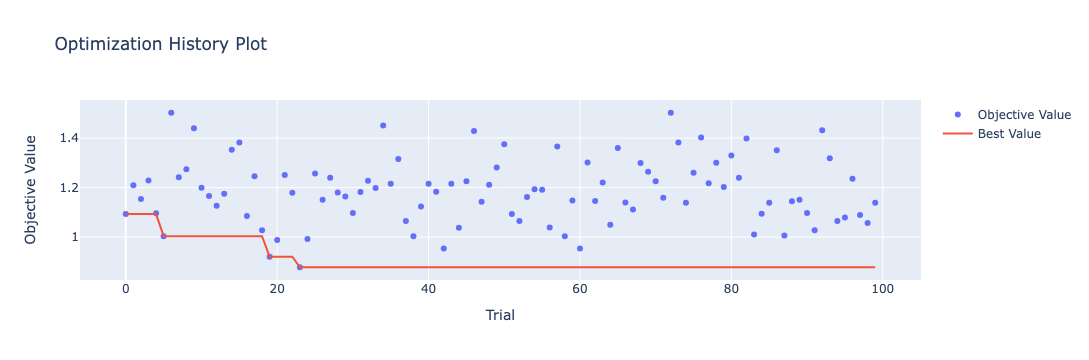

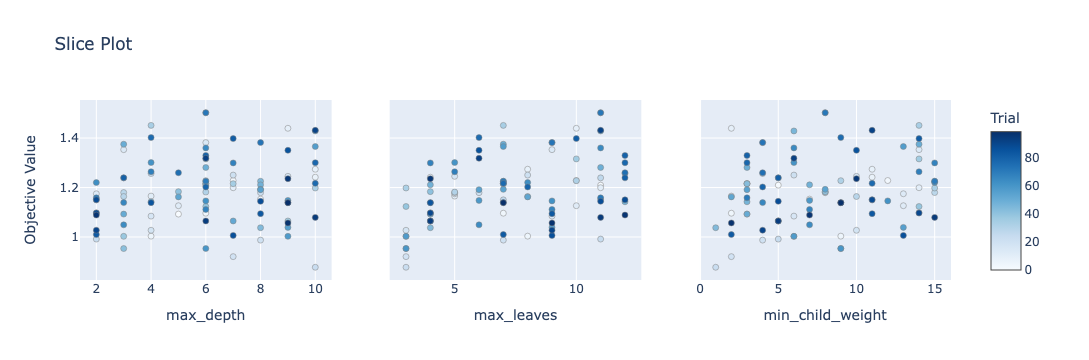

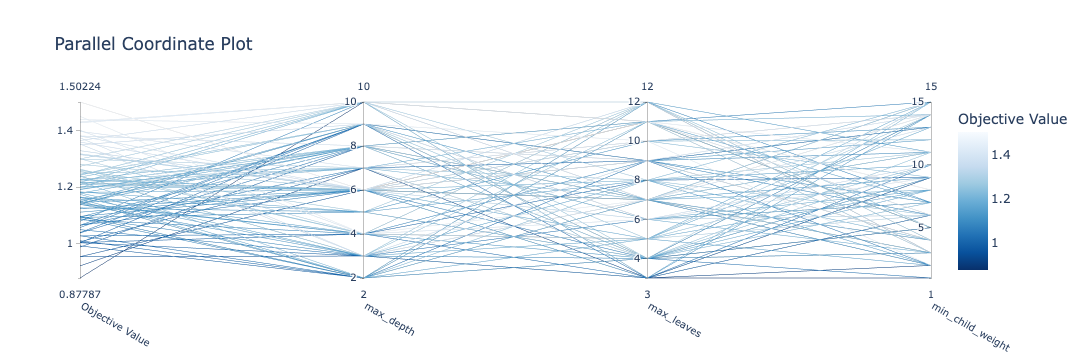

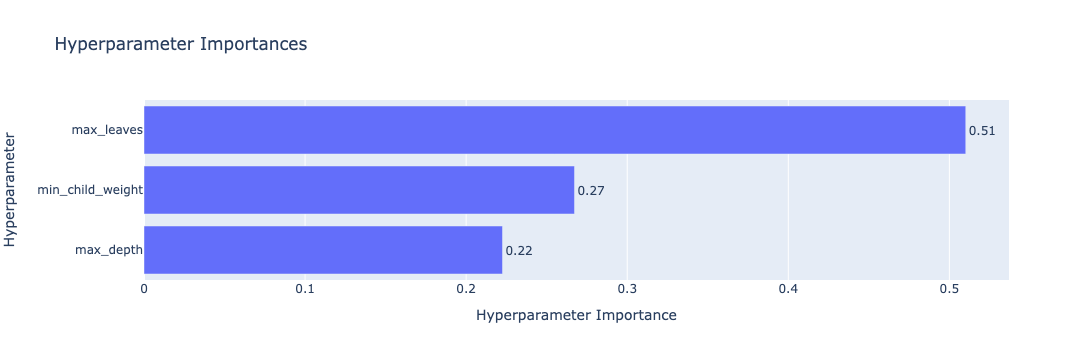

In [153]:
display(opt_vis.plot_optimization_history(study), 
        opt_vis.plot_slice(study),
        opt_vis.plot_parallel_coordinate(study),
        opt_vis.plot_param_importances(study),
       )

In [193]:
result = pd.DataFrame()
preds = []
features = pd.DataFrame()

start_time = time.time()
for sensor, (X_train, y_train, X_val, y_val, X_test, y_test, ext_test) in ho_data.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: xgb_objective(trial, X_train, y_train, X_val, y_val), n_trials=50, n_jobs=-1)
    
    best_score = study.best_value
    best_params = study.best_params
    features[sensor] = best_params

    best_xgb = train_best_xgb(best_params)
    best_xgb.fit(X_train, 
               y_train, 
               verbose = False,
               eval_set = [(X_val, y_val)],
              )

    y_pred_val = np.ravel(qt.inverse_transform(pd.DataFrame(best_xgb.predict(X_val), index = X_val.index)))
    y_act_val = np.ravel(qt.inverse_transform(pd.DataFrame(y_val, index = y_val.index)))
    y_pred_test = np.ravel(qt.inverse_transform(pd.DataFrame(best_xgb.predict(X_test), index = X_test.index)))
    y_act_test = np.ravel(qt.inverse_transform(pd.DataFrame(y_test, index = y_test.index)))
    ext_pred = np.ravel(qt.inverse_transform(pd.DataFrame(best_xgb.predict(ext_test), index = ext_test.index)))
    
    val_mape = mape_calc(y_act_val, y_pred_val)
    test_mape = mape_calc(y_act_test, y_pred_test)
    
    temp_pred = pd.Series(ext_pred, ext_test.index).clip(lower = 0)
    preds.append(temp_pred)

    total_time = time.time() - temp_time
    rem_time = ((time.time() - start_time)/sensor * (27-sensor))/60
    print(f"{sensor}: {best_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")

    print(f"Val: {val_mape:.5f} \tTest: {test_mape:.5f}")

    result.loc[sensor, "val"] = round(val_mape,5) 
    result.loc[sensor, "test"] = round(test_mape,5) 

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

[I 2024-04-30 15:54:32,154] A new study created in memory with name: no-name-0b9144a4-3ebf-40ea-888b-4de00b56939d
[I 2024-04-30 15:54:33,244] Trial 6 finished with value: 1.338122466506129 and parameters: {'max_depth': 10, 'min_child_weight': 2, 'max_leaves': 3}. Best is trial 6 with value: 1.338122466506129.
[I 2024-04-30 15:54:33,250] Trial 7 finished with value: 1.7069071601505843 and parameters: {'max_depth': 2, 'min_child_weight': 5, 'max_leaves': 8}. Best is trial 6 with value: 1.338122466506129.
[I 2024-04-30 15:54:33,309] Trial 3 finished with value: 1.4227637993148694 and parameters: {'max_depth': 10, 'min_child_weight': 9, 'max_leaves': 4}. Best is trial 6 with value: 1.338122466506129.
[I 2024-04-30 15:54:33,564] Trial 0 finished with value: 1.3658976913422123 and parameters: {'max_depth': 5, 'min_child_weight': 9, 'max_leaves': 5}. Best is trial 6 with value: 1.338122466506129.
[I 2024-04-30 15:54:33,694] Trial 1 finished with value: 1.2368566468537268 and parameters: {'max

1.0: 0.94656 	 9.14s 	 Rem: 3.96m
Val: 0.14576 	Test: 0.16334


[I 2024-04-30 15:54:42,314] Trial 3 finished with value: 11.301955415587907 and parameters: {'max_depth': 7, 'min_child_weight': 5, 'max_leaves': 3}. Best is trial 3 with value: 11.301955415587907.
[I 2024-04-30 15:54:42,328] Trial 6 finished with value: 12.183282072608286 and parameters: {'max_depth': 2, 'min_child_weight': 3, 'max_leaves': 4}. Best is trial 3 with value: 11.301955415587907.
[I 2024-04-30 15:54:42,379] Trial 1 finished with value: 11.470656749763377 and parameters: {'max_depth': 5, 'min_child_weight': 10, 'max_leaves': 4}. Best is trial 3 with value: 11.301955415587907.
[I 2024-04-30 15:54:42,630] Trial 7 finished with value: 12.754460912901273 and parameters: {'max_depth': 6, 'min_child_weight': 9, 'max_leaves': 5}. Best is trial 3 with value: 11.301955415587907.
[I 2024-04-30 15:54:42,656] Trial 5 finished with value: 11.44761904962088 and parameters: {'max_depth': 4, 'min_child_weight': 13, 'max_leaves': 5}. Best is trial 3 with value: 11.301955415587907.
[I 2024-0

2.0: 8.98774 	 8.90s 	 Rem: 3.76m
Val: 0.14592 	Test: 0.17489


[I 2024-04-30 15:54:51,136] Trial 6 finished with value: 0.9916496940831494 and parameters: {'max_depth': 2, 'min_child_weight': 5, 'max_leaves': 6}. Best is trial 6 with value: 0.9916496940831494.
[I 2024-04-30 15:54:51,144] Trial 1 finished with value: 1.1244808355129643 and parameters: {'max_depth': 2, 'min_child_weight': 13, 'max_leaves': 3}. Best is trial 6 with value: 0.9916496940831494.
[I 2024-04-30 15:54:51,199] Trial 2 finished with value: 1.0927459585019237 and parameters: {'max_depth': 5, 'min_child_weight': 3, 'max_leaves': 4}. Best is trial 6 with value: 0.9916496940831494.
[I 2024-04-30 15:54:51,472] Trial 7 finished with value: 1.3183729129341175 and parameters: {'max_depth': 6, 'min_child_weight': 6, 'max_leaves': 6}. Best is trial 6 with value: 0.9916496940831494.
[I 2024-04-30 15:54:51,756] Trial 0 finished with value: 1.056890584436237 and parameters: {'max_depth': 8, 'min_child_weight': 2, 'max_leaves': 9}. Best is trial 6 with value: 0.9916496940831494.
[I 2024-04

3.0: 0.90022 	 9.75s 	 Rem: 3.71m
Val: 0.20682 	Test: 0.22005


[I 2024-04-30 15:55:01,028] Trial 1 finished with value: 1.4668143594244838 and parameters: {'max_depth': 4, 'min_child_weight': 6, 'max_leaves': 3}. Best is trial 1 with value: 1.4668143594244838.
[I 2024-04-30 15:55:01,029] Trial 0 finished with value: 1.4966733701189845 and parameters: {'max_depth': 2, 'min_child_weight': 9, 'max_leaves': 3}. Best is trial 1 with value: 1.4668143594244838.
[I 2024-04-30 15:55:01,128] Trial 4 finished with value: 1.6040131736670118 and parameters: {'max_depth': 4, 'min_child_weight': 13, 'max_leaves': 4}. Best is trial 1 with value: 1.4668143594244838.
[I 2024-04-30 15:55:01,402] Trial 5 finished with value: 1.7605256180244362 and parameters: {'max_depth': 7, 'min_child_weight': 11, 'max_leaves': 5}. Best is trial 1 with value: 1.4668143594244838.
[I 2024-04-30 15:55:01,483] Trial 3 finished with value: 1.8398284376418763 and parameters: {'max_depth': 10, 'min_child_weight': 12, 'max_leaves': 6}. Best is trial 1 with value: 1.4668143594244838.
[I 202

4.0: 1.39710 	 10.25s 	 Rem: 3.65m
Val: 0.31172 	Test: 0.31117


[I 2024-04-30 15:55:11,384] Trial 5 finished with value: 1.154032518317166 and parameters: {'max_depth': 2, 'min_child_weight': 5, 'max_leaves': 3}. Best is trial 5 with value: 1.154032518317166.
[I 2024-04-30 15:55:11,400] Trial 2 finished with value: 1.0877623643769914 and parameters: {'max_depth': 9, 'min_child_weight': 1, 'max_leaves': 4}. Best is trial 2 with value: 1.0877623643769914.
[I 2024-04-30 15:55:11,723] Trial 0 finished with value: 1.1624683465672287 and parameters: {'max_depth': 3, 'min_child_weight': 7, 'max_leaves': 7}. Best is trial 2 with value: 1.0877623643769914.
[I 2024-04-30 15:55:11,786] Trial 7 finished with value: 0.9640088523210275 and parameters: {'max_depth': 8, 'min_child_weight': 5, 'max_leaves': 6}. Best is trial 7 with value: 0.9640088523210275.
[I 2024-04-30 15:55:11,883] Trial 1 finished with value: 0.9648344684058421 and parameters: {'max_depth': 6, 'min_child_weight': 10, 'max_leaves': 7}. Best is trial 7 with value: 0.9640088523210275.
[I 2024-04-

5.0: 0.84269 	 9.22s 	 Rem: 3.47m
Val: 0.31175 	Test: 0.34221


[I 2024-04-30 15:55:20,904] Trial 7 finished with value: 0.8511004995703227 and parameters: {'max_depth': 2, 'min_child_weight': 6, 'max_leaves': 7}. Best is trial 7 with value: 0.8511004995703227.
[I 2024-04-30 15:55:20,908] Trial 1 finished with value: 0.6804305450598769 and parameters: {'max_depth': 3, 'min_child_weight': 15, 'max_leaves': 3}. Best is trial 1 with value: 0.6804305450598769.
[I 2024-04-30 15:55:20,910] Trial 2 finished with value: 0.8691235770325354 and parameters: {'max_depth': 2, 'min_child_weight': 2, 'max_leaves': 8}. Best is trial 1 with value: 0.6804305450598769.
[I 2024-04-30 15:55:21,052] Trial 5 finished with value: 0.7172716961594671 and parameters: {'max_depth': 6, 'min_child_weight': 11, 'max_leaves': 4}. Best is trial 1 with value: 0.6804305450598769.
[I 2024-04-30 15:55:21,308] Trial 4 finished with value: 0.788403345399869 and parameters: {'max_depth': 10, 'min_child_weight': 3, 'max_leaves': 5}. Best is trial 1 with value: 0.6804305450598769.
[I 2024-

6.0: 0.67063 	 10.93s 	 Rem: 3.39m
Val: 0.29996 	Test: 0.29499


[I 2024-04-30 15:55:31,479] Trial 1 finished with value: 0.30284572428763523 and parameters: {'max_depth': 10, 'min_child_weight': 8, 'max_leaves': 3}. Best is trial 1 with value: 0.30284572428763523.
[I 2024-04-30 15:55:31,487] Trial 3 finished with value: 0.3004932682258951 and parameters: {'max_depth': 7, 'min_child_weight': 1, 'max_leaves': 3}. Best is trial 3 with value: 0.3004932682258951.
[I 2024-04-30 15:55:31,488] Trial 6 finished with value: 0.32625376080257984 and parameters: {'max_depth': 2, 'min_child_weight': 5, 'max_leaves': 7}. Best is trial 3 with value: 0.3004932682258951.
[I 2024-04-30 15:55:31,873] Trial 4 finished with value: 0.33223712506218056 and parameters: {'max_depth': 8, 'min_child_weight': 3, 'max_leaves': 5}. Best is trial 3 with value: 0.3004932682258951.
[I 2024-04-30 15:55:32,352] Trial 0 finished with value: 0.3244512248057829 and parameters: {'max_depth': 6, 'min_child_weight': 7, 'max_leaves': 9}. Best is trial 3 with value: 0.3004932682258951.
[I 20

7.0: 0.29081 	 9.34s 	 Rem: 3.22m
Val: 0.20999 	Test: 0.22156


[I 2024-04-30 15:55:40,746] Trial 5 finished with value: 0.4087253035800683 and parameters: {'max_depth': 2, 'min_child_weight': 11, 'max_leaves': 8}. Best is trial 5 with value: 0.4087253035800683.
[I 2024-04-30 15:55:41,060] Trial 6 finished with value: 0.4086282103240906 and parameters: {'max_depth': 3, 'min_child_weight': 15, 'max_leaves': 6}. Best is trial 6 with value: 0.4086282103240906.
[I 2024-04-30 15:55:41,148] Trial 2 finished with value: 0.4305046040364457 and parameters: {'max_depth': 10, 'min_child_weight': 5, 'max_leaves': 7}. Best is trial 6 with value: 0.4086282103240906.
[I 2024-04-30 15:55:41,332] Trial 3 finished with value: 0.4138976277616302 and parameters: {'max_depth': 4, 'min_child_weight': 3, 'max_leaves': 12}. Best is trial 6 with value: 0.4086282103240906.
[I 2024-04-30 15:55:41,364] Trial 4 finished with value: 0.4511051457196855 and parameters: {'max_depth': 10, 'min_child_weight': 4, 'max_leaves': 9}. Best is trial 6 with value: 0.4086282103240906.
[I 20

8.0: 0.40076 	 9.83s 	 Rem: 3.06m
Val: 0.22993 	Test: 0.25712


[I 2024-04-30 15:55:50,539] Trial 0 finished with value: 3.8446811219674397 and parameters: {'max_depth': 10, 'min_child_weight': 2, 'max_leaves': 3}. Best is trial 0 with value: 3.8446811219674397.
[I 2024-04-30 15:55:50,552] Trial 4 finished with value: 3.6153711193381395 and parameters: {'max_depth': 2, 'min_child_weight': 4, 'max_leaves': 6}. Best is trial 4 with value: 3.6153711193381395.
[I 2024-04-30 15:55:50,611] Trial 1 finished with value: 3.482021474005102 and parameters: {'max_depth': 4, 'min_child_weight': 6, 'max_leaves': 4}. Best is trial 1 with value: 3.482021474005102.
[I 2024-04-30 15:55:50,928] Trial 6 finished with value: 3.1988590786773536 and parameters: {'max_depth': 8, 'min_child_weight': 6, 'max_leaves': 6}. Best is trial 6 with value: 3.1988590786773536.
[I 2024-04-30 15:55:51,157] Trial 3 finished with value: 2.8611596158601675 and parameters: {'max_depth': 4, 'min_child_weight': 2, 'max_leaves': 12}. Best is trial 3 with value: 2.8611596158601675.
[I 2024-04

9.0: 2.68937 	 8.47s 	 Rem: 2.86m
Val: 0.20378 	Test: 0.22301


[I 2024-04-30 15:55:59,495] Trial 3 finished with value: 0.25102310057677363 and parameters: {'max_depth': 5, 'min_child_weight': 11, 'max_leaves': 5}. Best is trial 3 with value: 0.25102310057677363.
[I 2024-04-30 15:55:59,501] Trial 2 finished with value: 0.252449817046618 and parameters: {'max_depth': 3, 'min_child_weight': 15, 'max_leaves': 7}. Best is trial 3 with value: 0.25102310057677363.
[I 2024-04-30 15:55:59,502] Trial 7 finished with value: 0.24412095952174157 and parameters: {'max_depth': 3, 'min_child_weight': 11, 'max_leaves': 8}. Best is trial 7 with value: 0.24412095952174157.
[I 2024-04-30 15:55:59,824] Trial 5 finished with value: 0.2495749740280667 and parameters: {'max_depth': 7, 'min_child_weight': 7, 'max_leaves': 8}. Best is trial 7 with value: 0.24412095952174157.
[I 2024-04-30 15:55:59,831] Trial 0 finished with value: 0.26776845910550073 and parameters: {'max_depth': 4, 'min_child_weight': 13, 'max_leaves': 10}. Best is trial 7 with value: 0.24412095952174157

10.0: 0.22470 	 9.32s 	 Rem: 2.70m
Val: 0.24560 	Test: 0.26280


[I 2024-04-30 15:56:08,372] Trial 0 finished with value: 0.23405698015386453 and parameters: {'max_depth': 2, 'min_child_weight': 7, 'max_leaves': 11}. Best is trial 0 with value: 0.23405698015386453.
[I 2024-04-30 15:56:08,386] Trial 7 finished with value: 0.23786738264072668 and parameters: {'max_depth': 2, 'min_child_weight': 15, 'max_leaves': 10}. Best is trial 0 with value: 0.23405698015386453.
[I 2024-04-30 15:56:08,742] Trial 3 finished with value: 0.30262291008218856 and parameters: {'max_depth': 3, 'min_child_weight': 4, 'max_leaves': 6}. Best is trial 0 with value: 0.23405698015386453.
[I 2024-04-30 15:56:08,750] Trial 5 finished with value: 0.2977385011048826 and parameters: {'max_depth': 7, 'min_child_weight': 9, 'max_leaves': 5}. Best is trial 0 with value: 0.23405698015386453.
[I 2024-04-30 15:56:08,788] Trial 2 finished with value: 0.2599917858407925 and parameters: {'max_depth': 6, 'min_child_weight': 3, 'max_leaves': 6}. Best is trial 0 with value: 0.23405698015386453.

11.0: 0.22839 	 9.17s 	 Rem: 2.53m
Val: 0.20881 	Test: 0.33296


[I 2024-04-30 15:56:17,433] Trial 1 finished with value: 1.3021117996360063 and parameters: {'max_depth': 2, 'min_child_weight': 14, 'max_leaves': 8}. Best is trial 1 with value: 1.3021117996360063.
[I 2024-04-30 15:56:17,446] Trial 6 finished with value: 1.1809718799856925 and parameters: {'max_depth': 2, 'min_child_weight': 11, 'max_leaves': 4}. Best is trial 6 with value: 1.1809718799856925.
[I 2024-04-30 15:56:17,457] Trial 5 finished with value: 1.1830925255917273 and parameters: {'max_depth': 9, 'min_child_weight': 4, 'max_leaves': 3}. Best is trial 6 with value: 1.1809718799856925.
[I 2024-04-30 15:56:17,529] Trial 2 finished with value: 1.0826167015465893 and parameters: {'max_depth': 6, 'min_child_weight': 9, 'max_leaves': 4}. Best is trial 2 with value: 1.0826167015465893.
[I 2024-04-30 15:56:17,757] Trial 3 finished with value: 1.224589341816268 and parameters: {'max_depth': 3, 'min_child_weight': 11, 'max_leaves': 12}. Best is trial 2 with value: 1.0826167015465893.
[I 2024

12.0: 1.00400 	 10.33s 	 Rem: 2.39m
Val: 0.31032 	Test: 0.34247


[I 2024-04-30 15:56:27,928] Trial 4 finished with value: 0.1914530439883408 and parameters: {'max_depth': 2, 'min_child_weight': 4, 'max_leaves': 8}. Best is trial 4 with value: 0.1914530439883408.
[I 2024-04-30 15:56:27,946] Trial 5 finished with value: 0.19906999747186016 and parameters: {'max_depth': 8, 'min_child_weight': 4, 'max_leaves': 3}. Best is trial 4 with value: 0.1914530439883408.
[I 2024-04-30 15:56:27,955] Trial 0 finished with value: 0.1902031518592157 and parameters: {'max_depth': 3, 'min_child_weight': 3, 'max_leaves': 4}. Best is trial 0 with value: 0.1902031518592157.
[I 2024-04-30 15:56:27,956] Trial 6 finished with value: 0.19419308351627215 and parameters: {'max_depth': 4, 'min_child_weight': 3, 'max_leaves': 3}. Best is trial 0 with value: 0.1902031518592157.
[I 2024-04-30 15:56:27,994] Trial 2 finished with value: 0.19406273975299393 and parameters: {'max_depth': 9, 'min_child_weight': 10, 'max_leaves': 4}. Best is trial 0 with value: 0.1902031518592157.
[I 202

13.0: 0.18117 	 9.49s 	 Rem: 2.23m
Val: 0.18858 	Test: 0.18192


[I 2024-04-30 15:56:37,391] Trial 6 finished with value: 0.2691212449072005 and parameters: {'max_depth': 3, 'min_child_weight': 15, 'max_leaves': 3}. Best is trial 6 with value: 0.2691212449072005.
[I 2024-04-30 15:56:37,392] Trial 2 finished with value: 0.294558009537072 and parameters: {'max_depth': 9, 'min_child_weight': 9, 'max_leaves': 3}. Best is trial 6 with value: 0.2691212449072005.
[I 2024-04-30 15:56:37,702] Trial 3 finished with value: 0.2593988083210053 and parameters: {'max_depth': 3, 'min_child_weight': 1, 'max_leaves': 12}. Best is trial 3 with value: 0.2593988083210053.
[I 2024-04-30 15:56:37,724] Trial 7 finished with value: 0.2555424789512014 and parameters: {'max_depth': 8, 'min_child_weight': 4, 'max_leaves': 5}. Best is trial 7 with value: 0.2555424789512014.
[I 2024-04-30 15:56:37,765] Trial 0 finished with value: 0.28090876839722445 and parameters: {'max_depth': 9, 'min_child_weight': 8, 'max_leaves': 6}. Best is trial 7 with value: 0.2555424789512014.
[I 2024-

14.0: 0.22547 	 9.01s 	 Rem: 2.06m
Val: 0.19939 	Test: 0.22835


[I 2024-04-30 15:56:46,628] Trial 2 finished with value: 0.8158867103358323 and parameters: {'max_depth': 3, 'min_child_weight': 2, 'max_leaves': 9}. Best is trial 2 with value: 0.8158867103358323.
[I 2024-04-30 15:56:46,636] Trial 3 finished with value: 1.0040304661008181 and parameters: {'max_depth': 6, 'min_child_weight': 4, 'max_leaves': 5}. Best is trial 2 with value: 0.8158867103358323.
[I 2024-04-30 15:56:46,639] Trial 0 finished with value: 1.0040304661008181 and parameters: {'max_depth': 9, 'min_child_weight': 4, 'max_leaves': 5}. Best is trial 2 with value: 0.8158867103358323.
[I 2024-04-30 15:56:46,648] Trial 4 finished with value: 0.8953736189297148 and parameters: {'max_depth': 3, 'min_child_weight': 4, 'max_leaves': 10}. Best is trial 2 with value: 0.8158867103358323.
[I 2024-04-30 15:56:46,649] Trial 1 finished with value: 0.9470550793186635 and parameters: {'max_depth': 3, 'min_child_weight': 3, 'max_leaves': 10}. Best is trial 2 with value: 0.8158867103358323.
[I 2024-

15.0: 0.80856 	 8.67s 	 Rem: 1.89m
Val: 0.26225 	Test: 0.25752


[I 2024-04-30 15:56:54,942] Trial 2 finished with value: 1.2999144517280967 and parameters: {'max_depth': 9, 'min_child_weight': 12, 'max_leaves': 3}. Best is trial 2 with value: 1.2999144517280967.
[I 2024-04-30 15:56:54,955] Trial 3 finished with value: 1.472649586114024 and parameters: {'max_depth': 2, 'min_child_weight': 4, 'max_leaves': 8}. Best is trial 2 with value: 1.2999144517280967.
[I 2024-04-30 15:56:55,192] Trial 0 finished with value: 1.7526375869571005 and parameters: {'max_depth': 3, 'min_child_weight': 13, 'max_leaves': 9}. Best is trial 2 with value: 1.2999144517280967.
[I 2024-04-30 15:56:55,212] Trial 5 finished with value: 1.5506049581627601 and parameters: {'max_depth': 9, 'min_child_weight': 14, 'max_leaves': 5}. Best is trial 2 with value: 1.2999144517280967.
[I 2024-04-30 15:56:55,257] Trial 4 finished with value: 1.5545292995876137 and parameters: {'max_depth': 9, 'min_child_weight': 5, 'max_leaves': 6}. Best is trial 2 with value: 1.2999144517280967.
[I 2024-

16.0: 1.27061 	 8.57s 	 Rem: 1.72m
Val: 0.22296 	Test: 0.21153


[I 2024-04-30 15:57:03,555] Trial 0 finished with value: 4.361683963859532 and parameters: {'max_depth': 6, 'min_child_weight': 9, 'max_leaves': 4}. Best is trial 0 with value: 4.361683963859532.
[I 2024-04-30 15:57:03,571] Trial 6 finished with value: 4.505842977491994 and parameters: {'max_depth': 5, 'min_child_weight': 8, 'max_leaves': 4}. Best is trial 0 with value: 4.361683963859532.
[I 2024-04-30 15:57:03,766] Trial 2 finished with value: 4.16643765277308 and parameters: {'max_depth': 5, 'min_child_weight': 4, 'max_leaves': 5}. Best is trial 2 with value: 4.16643765277308.
[I 2024-04-30 15:57:03,801] Trial 5 finished with value: 3.9335924385297294 and parameters: {'max_depth': 8, 'min_child_weight': 14, 'max_leaves': 5}. Best is trial 5 with value: 3.9335924385297294.
[I 2024-04-30 15:57:03,866] Trial 4 finished with value: 4.103274836686587 and parameters: {'max_depth': 5, 'min_child_weight': 12, 'max_leaves': 6}. Best is trial 5 with value: 3.9335924385297294.
[I 2024-04-30 15:

17.0: 3.63884 	 8.61s 	 Rem: 1.56m
Val: 0.22807 	Test: 0.26101


[I 2024-04-30 15:57:12,293] Trial 5 finished with value: 1.4345353615994951 and parameters: {'max_depth': 2, 'min_child_weight': 2, 'max_leaves': 4}. Best is trial 5 with value: 1.4345353615994951.
[I 2024-04-30 15:57:12,305] Trial 3 finished with value: 5.98536140259115 and parameters: {'max_depth': 10, 'min_child_weight': 10, 'max_leaves': 3}. Best is trial 5 with value: 1.4345353615994951.
[I 2024-04-30 15:57:12,312] Trial 1 finished with value: 1.2585080486951592 and parameters: {'max_depth': 2, 'min_child_weight': 9, 'max_leaves': 7}. Best is trial 1 with value: 1.2585080486951592.
[I 2024-04-30 15:57:12,672] Trial 0 finished with value: 11.285185650683411 and parameters: {'max_depth': 4, 'min_child_weight': 11, 'max_leaves': 5}. Best is trial 1 with value: 1.2585080486951592.
[I 2024-04-30 15:57:12,684] Trial 2 finished with value: 6.447481683002374 and parameters: {'max_depth': 5, 'min_child_weight': 12, 'max_leaves': 5}. Best is trial 1 with value: 1.2585080486951592.
[I 2024-0

18.0: 1.25851 	 9.48s 	 Rem: 1.40m
Val: 0.22835 	Test: 0.22539


[I 2024-04-30 15:57:21,792] Trial 4 finished with value: 0.5928198597507609 and parameters: {'max_depth': 4, 'min_child_weight': 2, 'max_leaves': 3}. Best is trial 4 with value: 0.5928198597507609.
[I 2024-04-30 15:57:21,797] Trial 6 finished with value: 0.4811468774548061 and parameters: {'max_depth': 7, 'min_child_weight': 15, 'max_leaves': 3}. Best is trial 6 with value: 0.4811468774548061.
[I 2024-04-30 15:57:21,806] Trial 1 finished with value: 0.5609710920692453 and parameters: {'max_depth': 2, 'min_child_weight': 4, 'max_leaves': 10}. Best is trial 6 with value: 0.4811468774548061.
[I 2024-04-30 15:57:21,845] Trial 5 finished with value: 0.5592909747324198 and parameters: {'max_depth': 6, 'min_child_weight': 6, 'max_leaves': 4}. Best is trial 6 with value: 0.4811468774548061.
[I 2024-04-30 15:57:22,092] Trial 3 finished with value: 0.5403026581724898 and parameters: {'max_depth': 3, 'min_child_weight': 12, 'max_leaves': 6}. Best is trial 6 with value: 0.4811468774548061.
[I 2024

19.0: 0.41300 	 9.94s 	 Rem: 1.25m
Val: 0.20094 	Test: 0.26295


[I 2024-04-30 15:57:31,828] Trial 4 finished with value: 4.417417763044204 and parameters: {'max_depth': 2, 'min_child_weight': 10, 'max_leaves': 4}. Best is trial 4 with value: 4.417417763044204.
[I 2024-04-30 15:57:31,852] Trial 2 finished with value: 1.7626494832664923 and parameters: {'max_depth': 2, 'min_child_weight': 2, 'max_leaves': 9}. Best is trial 2 with value: 1.7626494832664923.
[I 2024-04-30 15:57:31,862] Trial 7 finished with value: 2.3790235212161273 and parameters: {'max_depth': 2, 'min_child_weight': 13, 'max_leaves': 7}. Best is trial 2 with value: 1.7626494832664923.
[I 2024-04-30 15:57:31,923] Trial 0 finished with value: 3.0207244921315803 and parameters: {'max_depth': 5, 'min_child_weight': 14, 'max_leaves': 4}. Best is trial 2 with value: 1.7626494832664923.
[I 2024-04-30 15:57:31,942] Trial 5 finished with value: 2.7398484076941796 and parameters: {'max_depth': 3, 'min_child_weight': 3, 'max_leaves': 4}. Best is trial 2 with value: 1.7626494832664923.
[I 2024-0

20.0: 1.24074 	 9.23s 	 Rem: 1.09m
Val: 0.22925 	Test: 0.28213


[I 2024-04-30 15:57:41,176] Trial 1 finished with value: 2.241678475076504 and parameters: {'max_depth': 3, 'min_child_weight': 13, 'max_leaves': 11}. Best is trial 1 with value: 2.241678475076504.
[I 2024-04-30 15:57:41,203] Trial 2 finished with value: 1.8477438031097226 and parameters: {'max_depth': 4, 'min_child_weight': 2, 'max_leaves': 6}. Best is trial 2 with value: 1.8477438031097226.
[I 2024-04-30 15:57:41,296] Trial 5 finished with value: 2.3516962693630923 and parameters: {'max_depth': 6, 'min_child_weight': 3, 'max_leaves': 6}. Best is trial 2 with value: 1.8477438031097226.
[I 2024-04-30 15:57:41,304] Trial 0 finished with value: 2.0134872988285246 and parameters: {'max_depth': 7, 'min_child_weight': 9, 'max_leaves': 6}. Best is trial 2 with value: 1.8477438031097226.
[I 2024-04-30 15:57:41,321] Trial 4 finished with value: 2.5136570668390923 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'max_leaves': 8}. Best is trial 2 with value: 1.8477438031097226.
[I 2024-04

21.0: 1.28241 	 9.53s 	 Rem: 0.94m
Val: 0.20636 	Test: 0.31343


[I 2024-04-30 15:57:50,461] Trial 2 finished with value: 1.5027304730101536 and parameters: {'max_depth': 2, 'min_child_weight': 3, 'max_leaves': 10}. Best is trial 2 with value: 1.5027304730101536.
[I 2024-04-30 15:57:50,463] Trial 4 finished with value: 1.4857657471984387 and parameters: {'max_depth': 2, 'min_child_weight': 15, 'max_leaves': 10}. Best is trial 4 with value: 1.4857657471984387.
[I 2024-04-30 15:57:50,513] Trial 0 finished with value: 1.5491791051577544 and parameters: {'max_depth': 5, 'min_child_weight': 13, 'max_leaves': 4}. Best is trial 4 with value: 1.4857657471984387.
[I 2024-04-30 15:57:50,773] Trial 3 finished with value: 1.258502705448033 and parameters: {'max_depth': 8, 'min_child_weight': 1, 'max_leaves': 5}. Best is trial 3 with value: 1.258502705448033.
[I 2024-04-30 15:57:50,807] Trial 1 finished with value: 1.4800106532162334 and parameters: {'max_depth': 5, 'min_child_weight': 6, 'max_leaves': 5}. Best is trial 3 with value: 1.258502705448033.
[I 2024-0

22.0: 1.09804 	 9.57s 	 Rem: 0.78m
Val: 0.27218 	Test: 0.28529


[I 2024-04-30 15:58:00,148] Trial 4 finished with value: 1.7084193536535353 and parameters: {'max_depth': 3, 'min_child_weight': 10, 'max_leaves': 3}. Best is trial 4 with value: 1.7084193536535353.
[I 2024-04-30 15:58:00,159] Trial 5 finished with value: 1.6526690603948184 and parameters: {'max_depth': 6, 'min_child_weight': 6, 'max_leaves': 3}. Best is trial 5 with value: 1.6526690603948184.
[I 2024-04-30 15:58:00,611] Trial 1 finished with value: 2.1341250298415027 and parameters: {'max_depth': 10, 'min_child_weight': 12, 'max_leaves': 6}. Best is trial 5 with value: 1.6526690603948184.
[I 2024-04-30 15:58:00,804] Trial 6 finished with value: 2.524408344081243 and parameters: {'max_depth': 10, 'min_child_weight': 11, 'max_leaves': 7}. Best is trial 5 with value: 1.6526690603948184.
[I 2024-04-30 15:58:00,873] Trial 2 finished with value: 1.6741750056722517 and parameters: {'max_depth': 6, 'min_child_weight': 1, 'max_leaves': 10}. Best is trial 5 with value: 1.6526690603948184.
[I 20

23.0: 1.46584 	 10.47s 	 Rem: 0.63m
Val: 0.29357 	Test: 0.27554


[I 2024-04-30 15:58:10,688] Trial 3 finished with value: 0.8028043519489148 and parameters: {'max_depth': 2, 'min_child_weight': 8, 'max_leaves': 10}. Best is trial 3 with value: 0.8028043519489148.
[I 2024-04-30 15:58:11,009] Trial 6 finished with value: 1.1131635626847989 and parameters: {'max_depth': 3, 'min_child_weight': 6, 'max_leaves': 12}. Best is trial 3 with value: 0.8028043519489148.
[I 2024-04-30 15:58:11,058] Trial 7 finished with value: 0.8659696262509277 and parameters: {'max_depth': 10, 'min_child_weight': 3, 'max_leaves': 7}. Best is trial 3 with value: 0.8028043519489148.
[I 2024-04-30 15:58:11,153] Trial 0 finished with value: 1.085352467390119 and parameters: {'max_depth': 9, 'min_child_weight': 3, 'max_leaves': 8}. Best is trial 3 with value: 0.8028043519489148.
[I 2024-04-30 15:58:11,441] Trial 2 finished with value: 1.086467281883837 and parameters: {'max_depth': 5, 'min_child_weight': 7, 'max_leaves': 10}. Best is trial 3 with value: 0.8028043519489148.
[I 2024-

24.0: 0.66984 	 9.33s 	 Rem: 0.47m
Val: 0.17665 	Test: 0.23588


[I 2024-04-30 15:58:19,908] Trial 4 finished with value: 2.009497055702562 and parameters: {'max_depth': 2, 'min_child_weight': 7, 'max_leaves': 5}. Best is trial 4 with value: 2.009497055702562.
[I 2024-04-30 15:58:19,919] Trial 6 finished with value: 2.8720206115101896 and parameters: {'max_depth': 7, 'min_child_weight': 8, 'max_leaves': 3}. Best is trial 4 with value: 2.009497055702562.
[I 2024-04-30 15:58:19,993] Trial 7 finished with value: 2.669899617762643 and parameters: {'max_depth': 3, 'min_child_weight': 10, 'max_leaves': 4}. Best is trial 4 with value: 2.009497055702562.
[I 2024-04-30 15:58:20,580] Trial 3 finished with value: 2.500461714711276 and parameters: {'max_depth': 5, 'min_child_weight': 5, 'max_leaves': 9}. Best is trial 4 with value: 2.009497055702562.
[I 2024-04-30 15:58:20,654] Trial 0 finished with value: 2.219363720293397 and parameters: {'max_depth': 6, 'min_child_weight': 14, 'max_leaves': 8}. Best is trial 4 with value: 2.009497055702562.
[I 2024-04-30 15:

25.0: 1.54323 	 9.75s 	 Rem: 0.32m
Val: 0.23155 	Test: 0.22220


[I 2024-04-30 15:58:29,469] Trial 6 finished with value: 2.488609986452098 and parameters: {'max_depth': 3, 'min_child_weight': 15, 'max_leaves': 3}. Best is trial 6 with value: 2.488609986452098.
[I 2024-04-30 15:58:29,470] Trial 1 finished with value: 3.365141734839987 and parameters: {'max_depth': 2, 'min_child_weight': 5, 'max_leaves': 8}. Best is trial 6 with value: 2.488609986452098.
[I 2024-04-30 15:58:29,532] Trial 2 finished with value: 2.0757990702128986 and parameters: {'max_depth': 4, 'min_child_weight': 4, 'max_leaves': 4}. Best is trial 2 with value: 2.0757990702128986.
[I 2024-04-30 15:58:29,777] Trial 3 finished with value: 1.868670043945122 and parameters: {'max_depth': 3, 'min_child_weight': 3, 'max_leaves': 12}. Best is trial 3 with value: 1.868670043945122.
[I 2024-04-30 15:58:29,956] Trial 5 finished with value: 2.1201470291688143 and parameters: {'max_depth': 7, 'min_child_weight': 6, 'max_leaves': 7}. Best is trial 3 with value: 1.868670043945122.
[I 2024-04-30 1

26.0: 1.34159 	 9.40s 	 Rem: 0.16m
Val: 0.20975 	Test: 0.19093


[I 2024-04-30 15:58:38,827] Trial 0 finished with value: 2.0690850227888666 and parameters: {'max_depth': 4, 'min_child_weight': 6, 'max_leaves': 3}. Best is trial 0 with value: 2.0690850227888666.
[I 2024-04-30 15:58:38,856] Trial 7 finished with value: 1.179326157205063 and parameters: {'max_depth': 2, 'min_child_weight': 3, 'max_leaves': 3}. Best is trial 7 with value: 1.179326157205063.
[I 2024-04-30 15:58:39,149] Trial 4 finished with value: 6.272125582478055 and parameters: {'max_depth': 3, 'min_child_weight': 5, 'max_leaves': 8}. Best is trial 7 with value: 1.179326157205063.
[I 2024-04-30 15:58:39,169] Trial 3 finished with value: 3.962479497362909 and parameters: {'max_depth': 7, 'min_child_weight': 9, 'max_leaves': 5}. Best is trial 7 with value: 1.179326157205063.
[I 2024-04-30 15:58:39,415] Trial 5 finished with value: 1.6000119872672156 and parameters: {'max_depth': 8, 'min_child_weight': 15, 'max_leaves': 7}. Best is trial 7 with value: 1.179326157205063.
[I 2024-04-30 15

27.0: 0.94497 	 11.83s 	 Rem: 0.00m
Val: 0.20345 	Test: 0.22387


/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but QuantileTransformer was fitted with feature names

/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but QuantileTransformer was fitted with feature names

/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but QuantileTransformer was fitted with feature names



In [203]:
display(result, result.mean())
display(features)
for col in features.T.columns:
    print(features.T[col].value_counts(),"\n")

val     test
1   0.14576  0.16334
2   0.14592  0.17489
3   0.20682  0.22005
4   0.31172  0.31117
5   0.31175  0.34221
6   0.29996  0.29499
7   0.20999  0.22156
8   0.22993  0.25712
9   0.20378  0.22301
10  0.24560  0.26280
11  0.20881  0.33296
12  0.31032  0.34247
13  0.18858  0.18192
14  0.19939  0.22835
15  0.26225  0.25752
16  0.22296  0.21153
17  0.22807  0.26101
18  0.22835  0.22539
19  0.20094  0.26295
20  0.22925  0.28213
21  0.20636  0.31343
22  0.27218  0.28529
23  0.29357  0.27554
24  0.17665  0.23588
25  0.23155  0.22220
26  0.20975  0.19093
27  0.20345  0.22387

val     0.229024
test    0.252019
dtype: float64

1   2   3   4   5   6   7   8   9   10  ...  18  19  20  21  \
max_depth          7   8   8  10   7   4   6   8   7   4  ...   2   8   8   7   
min_child_weight  10  12   4  12   9   9   1   8   5  14  ...   9  15  14  10   
max_leaves        10  11   3  11   9   6   6  10   6   8  ...   7  12  12  10   

                  22  23  24  25  26  27  
max_depth          8  10  10  10   6   7  
min_child_weight   4   9   4   8  11   7  
max_leaves         3   5   5   9   3   3  

[3 rows x 27 columns]

max_depth
7     6
8     6
10    5
4     2
6     2
9     2
5     2
3     1
2     1
Name: count, dtype: int64 

min_child_weight
9     5
10    3
12    3
4     3
14    3
8     2
13    2
15    2
1     1
5     1
11    1
7     1
Name: count, dtype: int64 

max_leaves
3     5
6     5
10    4
11    4
9     3
12    2
5     2
8     1
7     1
Name: count, dtype: int64 



In [202]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

### With Obstacle Data

In [274]:
def xgb_objective(trial, X_train, y_train, X_val, y_val):
    n_estimators = 150 # trial.suggest_int("n_estimators", 80, 200)
    max_depth = trial.suggest_int("max_depth", 2, 15)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 15)
    max_leaves = trial.suggest_int("max_leaves", 3, 15)
    learning_rate = 0.15 # trial.suggest_float("learning_rate", 0.05, 0.25)
    # min_split_loss = trial.suggest_float("min_split_loss", 1e-5, 0.001, log = True)
    reg_lambda = trial.suggest_float("reg_lambda", 0, 10)

    xgb_model = XGBRegressor(n_estimators = n_estimators,
                         max_depth = max_depth,
                         max_leaves = max_leaves,
                         learning_rate = learning_rate,
                         min_child_weight = min_child_weight,
                         # min_split_loss = min_split_loss,
                         reg_lambda = reg_lambda,
                         n_jobs = -1,
                         random_state = 42,
                        )
    
    xgb_model.fit(X_train, 
               y_train, 
               verbose = False,
               eval_set = [(X_val, y_val)],
              )
    
    y_pred = xgb_model.predict(X_val)
    score = mape_calc(y_val, y_pred)
    # print(score)

    # score = - cross_val_score(xgb_model, X_val, y_val, cv = 5, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1).mean()
    
    return score



def train_best_xgb(best_params):
    model = XGBRegressor(
        n_estimators = 150,
        max_depth = best_params["max_depth"],
        max_leaves = best_params["max_leaves"],
        learning_rate = 0.15,
        min_child_weight = best_params["min_child_weight"],
        reg_lambda = best_params["reg_lambda"],
        n_jobs = -1,
        random_state = 42,
    )

    return model


In [516]:
relevant_cols = ["tgt_pressure",
                 "sensor_id",
                 "failure_pressure", 
                 "liquid_pct", 
                 "tank_w", 
                 "tank_l", 
                 "tank_h", 
                 "BLEVE_h", 
                 "vapour_temp", 
                 "liquid_temp", 
                 "superheated_status",
                 "vapour_height",
                 "net_sensor_dist",
                 # "obstacle_dist",
                 # "obstacle_w", 
                 # "obstacle_h",
                 # "obstacle_thk",
                 # "obstacle_angle"
                 ## Include obstalce measurements, (thk, angle etc.)
                ]

In [243]:
data = processed_data[relevant_cols]
data["tank_volume"] = data["tank_h"] * data["tank_w"] * data["tank_l"]
data.drop(columns = ["tank_h", "tank_w", "tank_l"], inplace = True)
unscaled_cols = [col for col in data.columns if col not in ["tgt_pressure","superheated_status", "sensor_id"]]
data[unscaled_cols] = data[unscaled_cols].apply(stats.zscore)

# qt = sklearn.preprocessing.QuantileTransformer(output_distribution="normal")
# tgt_data = qt.fit_transform(data[["tgt_pressure"]])
# data["tgt_pressure"] = tgt_data.clip(-3,3)


ext_test_data = processed_test_data[[col for col in relevant_cols if col != "tgt_pressure"]]
ext_test_data["tank_volume"] = ext_test_data["tank_h"] * ext_test_data["tank_w"] * ext_test_data["tank_l"]
ext_test_data.drop(columns = ["tank_h", "tank_w", "tank_l"], inplace = True)
ext_test_data[unscaled_cols] = ext_test_data[unscaled_cols].apply(stats.zscore)

/var/folders/g1/gcf6wcx125v51909bvw56yxm0000gn/T/ipykernel_35171/2990503139.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g1/gcf6wcx125v51909bvw56yxm0000gn/T/ipykernel_35171/2990503139.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g1/gcf6wcx125v51909bvw56yxm0000gn/T/ipykernel_35171/2990503139.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [244]:
# Holdout validation spltis: train_split, validation_split, test_split
train_ratio = 0.7
val_ratio = 0.15
n_data = len(data)

train_qty = int(n_data * train_ratio)
val_qty = int(n_data * (val_ratio + train_ratio))

ho_train_set = data.iloc[:train_qty]
ho_validation_set = data.iloc[train_qty:val_qty]
ho_test_set = data.iloc[val_qty:] # processed_data[relevant_cols].iloc[val_qty:]

In [245]:
# Cross-val splits: cv_train_set, cv_test_set 
cv_ratio = 0.8
cv_qty = int(n_data * cv_ratio)

cv_train_set = data.iloc[:cv_qty]
cv_test_set = data.iloc[cv_qty:] #processed_data[relevant_cols].iloc[cv_qty:]

In [246]:
# Saving train and val data for each sensor to "data_dict"
ho_data = {}
unique_sensors = ho_train_set["sensor_id"].unique()
unique_sensors.sort()

for sensor in unique_sensors:
    train_data = ho_train_set[ho_train_set['sensor_id'] == sensor].drop(columns = "sensor_id")
    X_train = train_data.drop(['tgt_pressure'], axis=1)
    y_train = train_data['tgt_pressure']
    
    val_data = ho_validation_set[ho_validation_set['sensor_id'] == sensor].drop(columns = "sensor_id")
    X_val = val_data.drop(['tgt_pressure'], axis=1)
    y_val = val_data['tgt_pressure']

    test_data = ho_test_set[ho_test_set['sensor_id'] == sensor].drop(columns = "sensor_id")
    X_test = test_data.drop(['tgt_pressure'], axis=1)
    y_test = test_data['tgt_pressure']

    X_test_ext = ext_test_data[ext_test_data['sensor_id'] == sensor].drop(columns = "sensor_id")
    
    ho_data[sensor] = (X_train, y_train, X_val, y_val, X_test, y_test, X_test_ext)

In [232]:
X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3, X_test_ext_3 = ho_data[3]

In [270]:
result = pd.DataFrame()
preds = []
features = pd.DataFrame()

start_time = time.time()
for sensor, (X_train, y_train, X_val, y_val, X_test, y_test, ext_test) in ho_data.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: xgb_objective(trial, X_train, y_train, X_val, y_val), n_trials=50, n_jobs=-1)
    
    best_score = study.best_value
    best_params = study.best_params
    features[sensor] = best_params

    best_xgb = train_best_xgb(best_params)
    best_xgb.fit(X_train, 
               y_train, 
               verbose = False,
               eval_set = [(X_val, y_val)],
              )

    y_pred_val = best_xgb.predict(X_val) # np.ravel(qt.inverse_transform(pd.DataFrame(best_xgb.predict(X_val), index = X_val.index)))
    y_act_val = y_val # np.ravel(qt.inverse_transform(pd.DataFrame(y_val, index = y_val.index)))
    y_pred_test = best_xgb.predict(X_test) # np.ravel(qt.inverse_transform(pd.DataFrame(best_xgb.predict(X_test), index = X_test.index)))
    y_act_test = y_test #np.ravel(qt.inverse_transform(pd.DataFrame(y_test, index = y_test.index)))
    ext_pred = best_xgb.predict(ext_test) # np.ravel(qt.inverse_transform(pd.DataFrame(best_xgb.predict(ext_test), index = ext_test.index)))
    
    val_mape = mape_calc(y_act_val, y_pred_val)
    test_mape = mape_calc(y_act_test, y_pred_test)
    
    temp_pred = pd.Series(ext_pred, ext_test.index).clip(lower = 0)
    preds.append(temp_pred)

    total_time = time.time() - temp_time
    rem_time = ((time.time() - start_time)/sensor * (27-sensor))/60
    print(f"{sensor}: {best_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")

    print(f"Val: {val_mape:.5f} \tTest: {test_mape:.5f}")

    result.loc[sensor, "val"] = round(val_mape,5) 
    result.loc[sensor, "test"] = round(test_mape,5) 

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

[I 2024-04-30 17:26:56,530] A new study created in memory with name: no-name-f73902a6-c904-497e-a2f0-8fe1c2d587d7
[I 2024-04-30 17:26:57,800] Trial 7 finished with value: 0.13971632571060272 and parameters: {'max_depth': 2, 'min_child_weight': 14, 'max_leaves': 11, 'reg_lambda': 1.4198401858091451e-07}. Best is trial 7 with value: 0.13971632571060272.
[I 2024-04-30 17:26:58,154] Trial 6 finished with value: 0.1478067492427232 and parameters: {'max_depth': 9, 'min_child_weight': 5, 'max_leaves': 5, 'reg_lambda': 2.6474754616180693e-08}. Best is trial 7 with value: 0.13971632571060272.
[I 2024-04-30 17:26:58,173] Trial 4 finished with value: 0.14318856816073502 and parameters: {'max_depth': 12, 'min_child_weight': 12, 'max_leaves': 5, 'reg_lambda': 1.3245449340768855e-08}. Best is trial 7 with value: 0.13971632571060272.
[I 2024-04-30 17:26:58,286] Trial 1 finished with value: 0.14456808494121484 and parameters: {'max_depth': 7, 'min_child_weight': 13, 'max_leaves': 6, 'reg_lambda': 7.60

1.0: 0.13364 	 11.94s 	 Rem: 5.17m
Val: 0.13364 	Test: 0.16616


[I 2024-04-30 17:27:09,458] Trial 1 finished with value: 0.15551669024878076 and parameters: {'max_depth': 2, 'min_child_weight': 15, 'max_leaves': 12, 'reg_lambda': 0.0669135638798058}. Best is trial 1 with value: 0.15551669024878076.
[I 2024-04-30 17:27:09,478] Trial 6 finished with value: 0.16194023195698615 and parameters: {'max_depth': 10, 'min_child_weight': 2, 'max_leaves': 4, 'reg_lambda': 0.0057530803819778285}. Best is trial 1 with value: 0.15551669024878076.
[I 2024-04-30 17:27:09,729] Trial 5 finished with value: 0.15214495278842174 and parameters: {'max_depth': 3, 'min_child_weight': 9, 'max_leaves': 9, 'reg_lambda': 0.030078155443415806}. Best is trial 5 with value: 0.15214495278842174.
[I 2024-04-30 17:27:09,733] Trial 0 finished with value: 0.16717876154611028 and parameters: {'max_depth': 3, 'min_child_weight': 6, 'max_leaves': 13, 'reg_lambda': 0.009466477852740065}. Best is trial 5 with value: 0.15214495278842174.
[I 2024-04-30 17:27:09,877] Trial 4 finished with val

2.0: 0.14287 	 9.57s 	 Rem: 4.48m
Val: 0.14287 	Test: 0.18843


[I 2024-04-30 17:27:19,038] Trial 4 finished with value: 0.18457834138165746 and parameters: {'max_depth': 2, 'min_child_weight': 4, 'max_leaves': 13, 'reg_lambda': 4.493205992236038e-08}. Best is trial 4 with value: 0.18457834138165746.
[I 2024-04-30 17:27:19,039] Trial 1 finished with value: 0.1801929173378932 and parameters: {'max_depth': 10, 'min_child_weight': 12, 'max_leaves': 3, 'reg_lambda': 0.00012777050417269066}. Best is trial 1 with value: 0.1801929173378932.
[I 2024-04-30 17:27:19,051] Trial 2 finished with value: 0.18719147862908317 and parameters: {'max_depth': 10, 'min_child_weight': 1, 'max_leaves': 4, 'reg_lambda': 0.0004039785556046327}. Best is trial 1 with value: 0.1801929173378932.
[I 2024-04-30 17:27:19,375] Trial 7 finished with value: 0.1815176718327667 and parameters: {'max_depth': 15, 'min_child_weight': 4, 'max_leaves': 7, 'reg_lambda': 3.344765874555398e-07}. Best is trial 1 with value: 0.1801929173378932.
[I 2024-04-30 17:27:19,460] Trial 3 finished with v

3.0: 0.14182 	 11.16s 	 Rem: 4.36m
Val: 0.14182 	Test: 0.24517


[I 2024-04-30 17:27:30,288] Trial 3 finished with value: 0.25576559839029855 and parameters: {'max_depth': 13, 'min_child_weight': 13, 'max_leaves': 4, 'reg_lambda': 2.5032374779941526e-07}. Best is trial 3 with value: 0.25576559839029855.
[I 2024-04-30 17:27:30,769] Trial 4 finished with value: 0.2781763525615004 and parameters: {'max_depth': 4, 'min_child_weight': 8, 'max_leaves': 11, 'reg_lambda': 1.3393476717189887e-07}. Best is trial 3 with value: 0.25576559839029855.
[I 2024-04-30 17:27:30,844] Trial 0 finished with value: 0.2742307366987756 and parameters: {'max_depth': 11, 'min_child_weight': 1, 'max_leaves': 12, 'reg_lambda': 0.0005375702722987155}. Best is trial 3 with value: 0.25576559839029855.
[I 2024-04-30 17:27:30,996] Trial 6 finished with value: 0.2546047222560502 and parameters: {'max_depth': 14, 'min_child_weight': 5, 'max_leaves': 15, 'reg_lambda': 0.0004927356261849663}. Best is trial 6 with value: 0.2546047222560502.
[I 2024-04-30 17:27:31,393] Trial 8 finished wi

4.0: 0.23456 	 9.06s 	 Rem: 4.00m
Val: 0.23456 	Test: 0.34024


[I 2024-04-30 17:27:39,276] Trial 3 finished with value: 0.2619353280228 and parameters: {'max_depth': 15, 'min_child_weight': 8, 'max_leaves': 4, 'reg_lambda': 3.346913862619208e-06}. Best is trial 3 with value: 0.2619353280228.
[I 2024-04-30 17:27:39,518] Trial 6 finished with value: 0.29256809457819416 and parameters: {'max_depth': 3, 'min_child_weight': 1, 'max_leaves': 7, 'reg_lambda': 1.858655853913988e-07}. Best is trial 3 with value: 0.2619353280228.
[I 2024-04-30 17:27:39,550] Trial 1 finished with value: 0.25319148547933495 and parameters: {'max_depth': 7, 'min_child_weight': 4, 'max_leaves': 6, 'reg_lambda': 2.3233024824638896e-06}. Best is trial 1 with value: 0.25319148547933495.
[I 2024-04-30 17:27:39,611] Trial 5 finished with value: 0.29377779153475436 and parameters: {'max_depth': 4, 'min_child_weight': 1, 'max_leaves': 8, 'reg_lambda': 0.04977579785247682}. Best is trial 1 with value: 0.25319148547933495.
[I 2024-04-30 17:27:39,618] Trial 7 finished with value: 0.25965

5.0: 0.24839 	 9.52s 	 Rem: 3.76m
Val: 0.24839 	Test: 0.23022


[I 2024-04-30 17:27:48,827] Trial 2 finished with value: 0.26988679935264104 and parameters: {'max_depth': 2, 'min_child_weight': 5, 'max_leaves': 9, 'reg_lambda': 2.2708400121003245e-05}. Best is trial 2 with value: 0.26988679935264104.
[I 2024-04-30 17:27:49,137] Trial 4 finished with value: 0.23989405092344576 and parameters: {'max_depth': 3, 'min_child_weight': 7, 'max_leaves': 15, 'reg_lambda': 3.6740772975982744e-06}. Best is trial 4 with value: 0.23989405092344576.
[I 2024-04-30 17:27:49,169] Trial 5 finished with value: 0.26778670423935497 and parameters: {'max_depth': 8, 'min_child_weight': 1, 'max_leaves': 6, 'reg_lambda': 2.7799878150099277e-06}. Best is trial 4 with value: 0.23989405092344576.
[I 2024-04-30 17:27:49,334] Trial 1 finished with value: 0.23863089961566172 and parameters: {'max_depth': 15, 'min_child_weight': 9, 'max_leaves': 7, 'reg_lambda': 8.521233966696884e-06}. Best is trial 1 with value: 0.23863089961566172.
[I 2024-04-30 17:27:49,389] Trial 0 finished wi

6.0: 0.22335 	 9.35s 	 Rem: 3.54m
Val: 0.22335 	Test: 0.20217


[I 2024-04-30 17:27:58,578] Trial 6 finished with value: 0.2055028236278878 and parameters: {'max_depth': 15, 'min_child_weight': 3, 'max_leaves': 12, 'reg_lambda': 3.0277246994395865e-05}. Best is trial 6 with value: 0.2055028236278878.
[I 2024-04-30 17:27:58,644] Trial 2 finished with value: 0.24258646072480705 and parameters: {'max_depth': 8, 'min_child_weight': 2, 'max_leaves': 9, 'reg_lambda': 5.842924695432236e-05}. Best is trial 6 with value: 0.2055028236278878.
[I 2024-04-30 17:27:58,789] Trial 4 finished with value: 0.20270806509766312 and parameters: {'max_depth': 14, 'min_child_weight': 9, 'max_leaves': 9, 'reg_lambda': 4.800644037731983e-07}. Best is trial 4 with value: 0.20270806509766312.
[I 2024-04-30 17:27:58,851] Trial 0 finished with value: 0.17656439214620934 and parameters: {'max_depth': 5, 'min_child_weight': 13, 'max_leaves': 10, 'reg_lambda': 6.620315277924791e-05}. Best is trial 0 with value: 0.17656439214620934.
[I 2024-04-30 17:27:59,258] Trial 1 finished with

7.0: 0.17656 	 9.50s 	 Rem: 3.34m
Val: 0.17656 	Test: 0.20262


[I 2024-04-30 17:28:07,629] Trial 3 finished with value: 0.22942221498583085 and parameters: {'max_depth': 2, 'min_child_weight': 12, 'max_leaves': 10, 'reg_lambda': 1.0810518521227726e-08}. Best is trial 3 with value: 0.22942221498583085.
[I 2024-04-30 17:28:07,681] Trial 4 finished with value: 0.23061760331307998 and parameters: {'max_depth': 8, 'min_child_weight': 11, 'max_leaves': 4, 'reg_lambda': 0.03505542961555124}. Best is trial 3 with value: 0.22942221498583085.
[I 2024-04-30 17:28:07,895] Trial 6 finished with value: 0.23189016017573758 and parameters: {'max_depth': 3, 'min_child_weight': 3, 'max_leaves': 8, 'reg_lambda': 1.8799259157866588e-08}. Best is trial 3 with value: 0.22942221498583085.
[I 2024-04-30 17:28:07,918] Trial 5 finished with value: 0.230577194916283 and parameters: {'max_depth': 10, 'min_child_weight': 11, 'max_leaves': 5, 'reg_lambda': 6.259648740547155e-08}. Best is trial 3 with value: 0.22942221498583085.
[I 2024-04-30 17:28:07,961] Trial 0 finished with

8.0: 0.20622 	 9.22s 	 Rem: 3.14m
Val: 0.20622 	Test: 0.18362


[I 2024-04-30 17:28:16,849] Trial 2 finished with value: 0.25056890613538463 and parameters: {'max_depth': 2, 'min_child_weight': 3, 'max_leaves': 11, 'reg_lambda': 0.004886708720872482}. Best is trial 2 with value: 0.25056890613538463.
[I 2024-04-30 17:28:16,962] Trial 0 finished with value: 0.20705466894390487 and parameters: {'max_depth': 8, 'min_child_weight': 14, 'max_leaves': 4, 'reg_lambda': 0.002719496209683523}. Best is trial 0 with value: 0.20705466894390487.
[I 2024-04-30 17:28:17,217] Trial 5 finished with value: 0.20260670847309784 and parameters: {'max_depth': 11, 'min_child_weight': 5, 'max_leaves': 6, 'reg_lambda': 3.597520080458258e-05}. Best is trial 5 with value: 0.20260670847309784.
[I 2024-04-30 17:28:17,418] Trial 6 finished with value: 0.2238325810432602 and parameters: {'max_depth': 12, 'min_child_weight': 14, 'max_leaves': 7, 'reg_lambda': 4.3251123390329316e-05}. Best is trial 5 with value: 0.20260670847309784.
[I 2024-04-30 17:28:17,423] Trial 1 finished with

9.0: 0.18660 	 8.72s 	 Rem: 2.94m
Val: 0.18660 	Test: 0.17593


[I 2024-04-30 17:28:25,794] Trial 1 finished with value: 0.33789062337207765 and parameters: {'max_depth': 3, 'min_child_weight': 5, 'max_leaves': 5, 'reg_lambda': 8.563796442596009e-08}. Best is trial 1 with value: 0.33789062337207765.
[I 2024-04-30 17:28:25,811] Trial 3 finished with value: 0.32773196914451813 and parameters: {'max_depth': 9, 'min_child_weight': 9, 'max_leaves': 5, 'reg_lambda': 0.0029858809810929237}. Best is trial 3 with value: 0.32773196914451813.
[I 2024-04-30 17:28:25,817] Trial 4 finished with value: 0.32773544184097886 and parameters: {'max_depth': 10, 'min_child_weight': 9, 'max_leaves': 5, 'reg_lambda': 1.2918205920365346e-07}. Best is trial 3 with value: 0.32773196914451813.
[I 2024-04-30 17:28:25,864] Trial 5 finished with value: 0.33310127822521135 and parameters: {'max_depth': 13, 'min_child_weight': 9, 'max_leaves': 6, 'reg_lambda': 1.2333589019183719e-08}. Best is trial 3 with value: 0.32773196914451813.
[I 2024-04-30 17:28:26,056] Trial 0 finished wit

10.0: 0.30598 	 9.32s 	 Rem: 2.76m
Val: 0.30598 	Test: 0.40591


[I 2024-04-30 17:28:34,832] Trial 2 finished with value: 0.3100789129665094 and parameters: {'max_depth': 2, 'min_child_weight': 8, 'max_leaves': 9, 'reg_lambda': 5.971738994261241e-06}. Best is trial 2 with value: 0.3100789129665094.
[I 2024-04-30 17:28:34,849] Trial 4 finished with value: 0.28372152344533924 and parameters: {'max_depth': 11, 'min_child_weight': 1, 'max_leaves': 4, 'reg_lambda': 0.00043953468780316885}. Best is trial 4 with value: 0.28372152344533924.
[I 2024-04-30 17:28:35,099] Trial 3 finished with value: 0.28788224797771544 and parameters: {'max_depth': 3, 'min_child_weight': 12, 'max_leaves': 5, 'reg_lambda': 0.003270745374409944}. Best is trial 4 with value: 0.28372152344533924.
[I 2024-04-30 17:28:35,243] Trial 7 finished with value: 0.3293676603101 and parameters: {'max_depth': 8, 'min_child_weight': 13, 'max_leaves': 6, 'reg_lambda': 0.02250844692195895}. Best is trial 4 with value: 0.28372152344533924.
[I 2024-04-30 17:28:35,558] Trial 5 finished with value: 

11.0: 0.24972 	 10.95s 	 Rem: 2.63m
Val: 0.24972 	Test: 0.38136


[I 2024-04-30 17:28:46,122] Trial 0 finished with value: 0.36928404981498403 and parameters: {'max_depth': 5, 'min_child_weight': 1, 'max_leaves': 3, 'reg_lambda': 0.0016385986982773236}. Best is trial 0 with value: 0.36928404981498403.
[I 2024-04-30 17:28:46,148] Trial 3 finished with value: 0.34276638687960503 and parameters: {'max_depth': 2, 'min_child_weight': 9, 'max_leaves': 13, 'reg_lambda': 1.1390392517737706e-08}. Best is trial 3 with value: 0.34276638687960503.
[I 2024-04-30 17:28:46,275] Trial 5 finished with value: 0.3208758878306104 and parameters: {'max_depth': 13, 'min_child_weight': 8, 'max_leaves': 4, 'reg_lambda': 0.00015605070974883807}. Best is trial 5 with value: 0.3208758878306104.
[I 2024-04-30 17:28:46,276] Trial 7 finished with value: 0.3475673240897923 and parameters: {'max_depth': 5, 'min_child_weight': 2, 'max_leaves': 4, 'reg_lambda': 0.0005760763865919802}. Best is trial 5 with value: 0.3208758878306104.
[I 2024-04-30 17:28:47,076] Trial 1 finished with va

12.0: 0.27650 	 10.80s 	 Rem: 2.48m
Val: 0.27650 	Test: 0.33732


[I 2024-04-30 17:28:56,579] Trial 7 finished with value: 0.34838569033818123 and parameters: {'max_depth': 10, 'min_child_weight': 9, 'max_leaves': 3, 'reg_lambda': 3.1248246694453556e-08}. Best is trial 7 with value: 0.34838569033818123.
[I 2024-04-30 17:28:56,585] Trial 6 finished with value: 0.3019131752745919 and parameters: {'max_depth': 2, 'min_child_weight': 15, 'max_leaves': 5, 'reg_lambda': 3.399513454755817e-07}. Best is trial 6 with value: 0.3019131752745919.
[I 2024-04-30 17:28:57,048] Trial 2 finished with value: 0.33502588454441956 and parameters: {'max_depth': 4, 'min_child_weight': 3, 'max_leaves': 8, 'reg_lambda': 4.128182848660736e-06}. Best is trial 6 with value: 0.3019131752745919.
[I 2024-04-30 17:28:57,093] Trial 5 finished with value: 0.2846742046380708 and parameters: {'max_depth': 12, 'min_child_weight': 10, 'max_leaves': 6, 'reg_lambda': 3.080013119891338e-07}. Best is trial 5 with value: 0.2846742046380708.
[I 2024-04-30 17:28:57,130] Trial 3 finished with va

13.0: 0.23403 	 10.15s 	 Rem: 2.32m
Val: 0.23403 	Test: 0.31930


[I 2024-04-30 17:29:06,751] Trial 0 finished with value: 0.3490698316123535 and parameters: {'max_depth': 5, 'min_child_weight': 1, 'max_leaves': 3, 'reg_lambda': 0.002510713010030851}. Best is trial 0 with value: 0.3490698316123535.
[I 2024-04-30 17:29:07,067] Trial 4 finished with value: 0.282714103808307 and parameters: {'max_depth': 15, 'min_child_weight': 1, 'max_leaves': 6, 'reg_lambda': 0.00417255917644323}. Best is trial 4 with value: 0.282714103808307.
[I 2024-04-30 17:29:07,161] Trial 7 finished with value: 0.2512730565184702 and parameters: {'max_depth': 13, 'min_child_weight': 4, 'max_leaves': 7, 'reg_lambda': 0.00017053444442121905}. Best is trial 7 with value: 0.2512730565184702.
[I 2024-04-30 17:29:07,357] Trial 3 finished with value: 0.27492080491044324 and parameters: {'max_depth': 4, 'min_child_weight': 4, 'max_leaves': 11, 'reg_lambda': 9.79722272420976e-08}. Best is trial 7 with value: 0.2512730565184702.
[I 2024-04-30 17:29:07,444] Trial 6 finished with value: 0.30

14.0: 0.25127 	 10.30s 	 Rem: 2.16m
Val: 0.25127 	Test: 0.28485


[I 2024-04-30 17:29:17,223] Trial 1 finished with value: 0.33278879085097474 and parameters: {'max_depth': 10, 'min_child_weight': 6, 'max_leaves': 3, 'reg_lambda': 1.0202382577140193e-06}. Best is trial 1 with value: 0.33278879085097474.
[I 2024-04-30 17:29:17,233] Trial 0 finished with value: 0.3131738226934349 and parameters: {'max_depth': 11, 'min_child_weight': 13, 'max_leaves': 3, 'reg_lambda': 0.00017642871496282268}. Best is trial 0 with value: 0.3131738226934349.
[I 2024-04-30 17:29:17,235] Trial 2 finished with value: 0.3327965797478135 and parameters: {'max_depth': 11, 'min_child_weight': 6, 'max_leaves': 3, 'reg_lambda': 0.0029420402784664785}. Best is trial 0 with value: 0.3131738226934349.
[I 2024-04-30 17:29:17,863] Trial 6 finished with value: 0.30016373624414094 and parameters: {'max_depth': 7, 'min_child_weight': 14, 'max_leaves': 7, 'reg_lambda': 7.150542583731632e-05}. Best is trial 6 with value: 0.30016373624414094.
[I 2024-04-30 17:29:17,899] Trial 5 finished with

15.0: 0.25870 	 9.47s 	 Rem: 1.99m
Val: 0.25870 	Test: 0.31506


[I 2024-04-30 17:29:26,684] Trial 6 finished with value: 0.2923861929348734 and parameters: {'max_depth': 4, 'min_child_weight': 2, 'max_leaves': 4, 'reg_lambda': 1.0753899026572868e-05}. Best is trial 6 with value: 0.2923861929348734.
[I 2024-04-30 17:29:26,794] Trial 5 finished with value: 0.27001382127504814 and parameters: {'max_depth': 5, 'min_child_weight': 10, 'max_leaves': 4, 'reg_lambda': 8.055068378039435e-06}. Best is trial 5 with value: 0.27001382127504814.
[I 2024-04-30 17:29:26,939] Trial 3 finished with value: 0.29566910316548944 and parameters: {'max_depth': 8, 'min_child_weight': 2, 'max_leaves': 5, 'reg_lambda': 1.745475026050272e-08}. Best is trial 5 with value: 0.27001382127504814.
[I 2024-04-30 17:29:27,265] Trial 7 finished with value: 0.26023799116331764 and parameters: {'max_depth': 9, 'min_child_weight': 1, 'max_leaves': 11, 'reg_lambda': 1.1794500601688863e-07}. Best is trial 7 with value: 0.26023799116331764.
[I 2024-04-30 17:29:27,321] Trial 4 finished with 

16.0: 0.25124 	 11.28s 	 Rem: 1.84m
Val: 0.25124 	Test: 0.22972


[I 2024-04-30 17:29:37,867] Trial 0 finished with value: 0.2485397701590145 and parameters: {'max_depth': 2, 'min_child_weight': 11, 'max_leaves': 6, 'reg_lambda': 4.276590748393753e-07}. Best is trial 0 with value: 0.2485397701590145.
[I 2024-04-30 17:29:38,305] Trial 7 finished with value: 0.21582164615158692 and parameters: {'max_depth': 5, 'min_child_weight': 9, 'max_leaves': 6, 'reg_lambda': 0.050406463363921156}. Best is trial 7 with value: 0.21582164615158692.
[I 2024-04-30 17:29:38,319] Trial 4 finished with value: 0.28018080768715237 and parameters: {'max_depth': 7, 'min_child_weight': 7, 'max_leaves': 7, 'reg_lambda': 2.2085448311294658e-07}. Best is trial 7 with value: 0.21582164615158692.
[I 2024-04-30 17:29:38,343] Trial 6 finished with value: 0.25140784610411576 and parameters: {'max_depth': 14, 'min_child_weight': 13, 'max_leaves': 6, 'reg_lambda': 0.0071855882006076404}. Best is trial 7 with value: 0.21582164615158692.
[I 2024-04-30 17:29:38,657] Trial 1 finished with v

17.0: 0.21582 	 10.32s 	 Rem: 1.67m
Val: 0.21582 	Test: 0.26758


[I 2024-04-30 17:29:48,161] Trial 3 finished with value: 0.2903041316756371 and parameters: {'max_depth': 2, 'min_child_weight': 10, 'max_leaves': 12, 'reg_lambda': 0.036388920297506275}. Best is trial 3 with value: 0.2903041316756371.
[I 2024-04-30 17:29:48,833] Trial 5 finished with value: 0.28923587574771736 and parameters: {'max_depth': 4, 'min_child_weight': 3, 'max_leaves': 13, 'reg_lambda': 0.004848330114123423}. Best is trial 5 with value: 0.28923587574771736.
[I 2024-04-30 17:29:48,844] Trial 1 finished with value: 0.3205932619776914 and parameters: {'max_depth': 6, 'min_child_weight': 15, 'max_leaves': 7, 'reg_lambda': 1.2525821118338498e-07}. Best is trial 5 with value: 0.28923587574771736.
[I 2024-04-30 17:29:49,043] Trial 0 finished with value: 0.3086718931638001 and parameters: {'max_depth': 6, 'min_child_weight': 2, 'max_leaves': 15, 'reg_lambda': 5.024076087686564e-08}. Best is trial 5 with value: 0.28923587574771736.
[I 2024-04-30 17:29:49,094] Trial 6 finished with va

18.0: 0.25881 	 11.46s 	 Rem: 1.52m
Val: 0.25881 	Test: 0.27256


[I 2024-04-30 17:29:59,573] Trial 4 finished with value: 0.28513038642693095 and parameters: {'max_depth': 8, 'min_child_weight': 10, 'max_leaves': 3, 'reg_lambda': 4.8861008322648355e-08}. Best is trial 4 with value: 0.28513038642693095.
[I 2024-04-30 17:29:59,591] Trial 5 finished with value: 0.2193711731906398 and parameters: {'max_depth': 2, 'min_child_weight': 1, 'max_leaves': 12, 'reg_lambda': 0.09494278267709777}. Best is trial 5 with value: 0.2193711731906398.
[I 2024-04-30 17:29:59,592] Trial 6 finished with value: 0.312669470040191 and parameters: {'max_depth': 13, 'min_child_weight': 13, 'max_leaves': 3, 'reg_lambda': 0.004221509832493377}. Best is trial 5 with value: 0.2193711731906398.
[I 2024-04-30 17:29:59,641] Trial 7 finished with value: 0.28429815467214437 and parameters: {'max_depth': 4, 'min_child_weight': 10, 'max_leaves': 4, 'reg_lambda': 2.0114448827994864e-07}. Best is trial 5 with value: 0.2193711731906398.
[I 2024-04-30 17:30:00,076] Trial 0 finished with valu

19.0: 0.21937 	 8.94s 	 Rem: 1.34m
Val: 0.21937 	Test: 0.31572


[I 2024-04-30 17:30:08,625] Trial 2 finished with value: 0.29565570107068 and parameters: {'max_depth': 12, 'min_child_weight': 9, 'max_leaves': 3, 'reg_lambda': 3.714910209907846e-05}. Best is trial 2 with value: 0.29565570107068.
[I 2024-04-30 17:30:08,643] Trial 3 finished with value: 0.3063282028740004 and parameters: {'max_depth': 13, 'min_child_weight': 6, 'max_leaves': 3, 'reg_lambda': 0.00834267581709431}. Best is trial 2 with value: 0.29565570107068.
[I 2024-04-30 17:30:08,647] Trial 5 finished with value: 0.297811085204688 and parameters: {'max_depth': 13, 'min_child_weight': 4, 'max_leaves': 3, 'reg_lambda': 1.1172868417143502e-06}. Best is trial 2 with value: 0.29565570107068.
[I 2024-04-30 17:30:08,648] Trial 6 finished with value: 0.2992604578982822 and parameters: {'max_depth': 10, 'min_child_weight': 14, 'max_leaves': 3, 'reg_lambda': 5.974418907202232e-08}. Best is trial 2 with value: 0.29565570107068.
[I 2024-04-30 17:30:08,709] Trial 4 finished with value: 0.29424953

20.0: 0.23705 	 9.05s 	 Rem: 1.17m
Val: 0.23705 	Test: 0.29558


[I 2024-04-30 17:30:17,667] Trial 3 finished with value: 0.27701467397057 and parameters: {'max_depth': 2, 'min_child_weight': 4, 'max_leaves': 15, 'reg_lambda': 4.006481728391591e-05}. Best is trial 3 with value: 0.27701467397057.
[I 2024-04-30 17:30:17,677] Trial 6 finished with value: 0.26474693671094623 and parameters: {'max_depth': 2, 'min_child_weight': 9, 'max_leaves': 9, 'reg_lambda': 3.4938719695844433e-07}. Best is trial 6 with value: 0.26474693671094623.
[I 2024-04-30 17:30:17,917] Trial 0 finished with value: 0.27216623517340643 and parameters: {'max_depth': 14, 'min_child_weight': 3, 'max_leaves': 5, 'reg_lambda': 6.194025896210905e-07}. Best is trial 6 with value: 0.26474693671094623.
[I 2024-04-30 17:30:17,931] Trial 5 finished with value: 0.22083972419740128 and parameters: {'max_depth': 3, 'min_child_weight': 1, 'max_leaves': 13, 'reg_lambda': 7.703886175237607e-05}. Best is trial 5 with value: 0.22083972419740128.
[I 2024-04-30 17:30:18,414] Trial 1 finished with valu

21.0: 0.19818 	 9.46s 	 Rem: 1.00m
Val: 0.19818 	Test: 0.34136


[I 2024-04-30 17:30:27,072] Trial 0 finished with value: 0.24800532972937986 and parameters: {'max_depth': 10, 'min_child_weight': 8, 'max_leaves': 3, 'reg_lambda': 0.005935999620701832}. Best is trial 0 with value: 0.24800532972937986.
[I 2024-04-30 17:30:27,179] Trial 2 finished with value: 0.20739573153978696 and parameters: {'max_depth': 4, 'min_child_weight': 11, 'max_leaves': 4, 'reg_lambda': 5.972022919293209e-06}. Best is trial 2 with value: 0.20739573153978696.
[I 2024-04-30 17:30:27,408] Trial 6 finished with value: 0.23603010715453565 and parameters: {'max_depth': 15, 'min_child_weight': 11, 'max_leaves': 5, 'reg_lambda': 1.6120809345334006e-06}. Best is trial 2 with value: 0.20739573153978696.
[I 2024-04-30 17:30:27,420] Trial 7 finished with value: 0.23886504807022116 and parameters: {'max_depth': 14, 'min_child_weight': 12, 'max_leaves': 5, 'reg_lambda': 1.0277251700792099e-08}. Best is trial 2 with value: 0.20739573153978696.
[I 2024-04-30 17:30:27,938] Trial 4 finished 

22.0: 0.19772 	 9.47s 	 Rem: 0.83m
Val: 0.19772 	Test: 0.27246


[I 2024-04-30 17:30:36,949] Trial 0 finished with value: 0.238617093204359 and parameters: {'max_depth': 9, 'min_child_weight': 4, 'max_leaves': 8, 'reg_lambda': 2.669816345326212e-08}. Best is trial 0 with value: 0.238617093204359.
[I 2024-04-30 17:30:37,030] Trial 2 finished with value: 0.23977599930397625 and parameters: {'max_depth': 7, 'min_child_weight': 14, 'max_leaves': 7, 'reg_lambda': 0.05874816452255708}. Best is trial 0 with value: 0.238617093204359.
[I 2024-04-30 17:30:37,149] Trial 3 finished with value: 0.21222206581473543 and parameters: {'max_depth': 12, 'min_child_weight': 3, 'max_leaves': 11, 'reg_lambda': 4.825910309182901e-05}. Best is trial 3 with value: 0.21222206581473543.
[I 2024-04-30 17:30:37,174] Trial 4 finished with value: 0.20730262845593173 and parameters: {'max_depth': 15, 'min_child_weight': 5, 'max_leaves': 9, 'reg_lambda': 0.0007627462610338277}. Best is trial 4 with value: 0.20730262845593173.
[I 2024-04-30 17:30:37,183] Trial 1 finished with value:

23.0: 0.18590 	 9.75s 	 Rem: 0.66m
Val: 0.18590 	Test: 0.24490


[I 2024-04-30 17:30:46,353] Trial 2 finished with value: 0.22421809365619066 and parameters: {'max_depth': 11, 'min_child_weight': 9, 'max_leaves': 4, 'reg_lambda': 4.740870680327394e-06}. Best is trial 2 with value: 0.22421809365619066.
[I 2024-04-30 17:30:46,549] Trial 1 finished with value: 0.19861936185072884 and parameters: {'max_depth': 3, 'min_child_weight': 9, 'max_leaves': 12, 'reg_lambda': 1.5208338350290672e-08}. Best is trial 1 with value: 0.19861936185072884.
[I 2024-04-30 17:30:46,566] Trial 0 finished with value: 0.2135643410182575 and parameters: {'max_depth': 13, 'min_child_weight': 4, 'max_leaves': 5, 'reg_lambda': 1.0833425100735113e-07}. Best is trial 1 with value: 0.19861936185072884.
[I 2024-04-30 17:30:46,577] Trial 5 finished with value: 0.20524414025414428 and parameters: {'max_depth': 3, 'min_child_weight': 11, 'max_leaves': 8, 'reg_lambda': 2.1777100372155565e-08}. Best is trial 1 with value: 0.19861936185072884.
[I 2024-04-30 17:30:47,039] Trial 3 finished w

24.0: 0.18927 	 9.51s 	 Rem: 0.50m
Val: 0.18927 	Test: 0.21707


[I 2024-04-30 17:30:55,969] Trial 0 finished with value: 0.24724707230084003 and parameters: {'max_depth': 8, 'min_child_weight': 13, 'max_leaves': 3, 'reg_lambda': 0.002600995480799742}. Best is trial 0 with value: 0.24724707230084003.
[I 2024-04-30 17:30:56,272] Trial 6 finished with value: 0.22443396224647277 and parameters: {'max_depth': 15, 'min_child_weight': 1, 'max_leaves': 5, 'reg_lambda': 0.017005920335225033}. Best is trial 6 with value: 0.22443396224647277.
[I 2024-04-30 17:30:56,622] Trial 4 finished with value: 0.2148317585164187 and parameters: {'max_depth': 8, 'min_child_weight': 3, 'max_leaves': 10, 'reg_lambda': 1.951537792120344e-06}. Best is trial 4 with value: 0.2148317585164187.
[I 2024-04-30 17:30:56,827] Trial 5 finished with value: 0.21582277408767334 and parameters: {'max_depth': 5, 'min_child_weight': 13, 'max_leaves': 10, 'reg_lambda': 0.0036530993729404714}. Best is trial 4 with value: 0.2148317585164187.
[I 2024-04-30 17:30:56,893] Trial 8 finished with va

25.0: 0.19569 	 10.26s 	 Rem: 0.33m
Val: 0.19569 	Test: 0.15328


[I 2024-04-30 17:31:06,422] Trial 3 finished with value: 0.2080869453817589 and parameters: {'max_depth': 13, 'min_child_weight': 9, 'max_leaves': 5, 'reg_lambda': 1.4380210964441674e-05}. Best is trial 3 with value: 0.2080869453817589.
[I 2024-04-30 17:31:06,538] Trial 6 finished with value: 0.2016111127933378 and parameters: {'max_depth': 6, 'min_child_weight': 12, 'max_leaves': 6, 'reg_lambda': 5.542517219455849e-07}. Best is trial 6 with value: 0.2016111127933378.
[I 2024-04-30 17:31:06,607] Trial 5 finished with value: 0.20719804147280255 and parameters: {'max_depth': 9, 'min_child_weight': 5, 'max_leaves': 8, 'reg_lambda': 0.0018503204264537277}. Best is trial 6 with value: 0.2016111127933378.
[I 2024-04-30 17:31:06,689] Trial 1 finished with value: 0.23944960723864608 and parameters: {'max_depth': 6, 'min_child_weight': 3, 'max_leaves': 9, 'reg_lambda': 5.7732561099494264e-08}. Best is trial 6 with value: 0.2016111127933378.
[I 2024-04-30 17:31:06,791] Trial 4 finished with valu

26.0: 0.18216 	 10.08s 	 Rem: 0.17m
Val: 0.18216 	Test: 0.16067


[I 2024-04-30 17:31:16,174] Trial 1 finished with value: 0.23874052887362882 and parameters: {'max_depth': 3, 'min_child_weight': 4, 'max_leaves': 4, 'reg_lambda': 0.0072279620841168265}. Best is trial 1 with value: 0.23874052887362882.
[I 2024-04-30 17:31:16,243] Trial 0 finished with value: 0.2108142152820559 and parameters: {'max_depth': 12, 'min_child_weight': 14, 'max_leaves': 4, 'reg_lambda': 0.00010925081067565046}. Best is trial 0 with value: 0.2108142152820559.
[I 2024-04-30 17:31:16,724] Trial 3 finished with value: 0.23538581547798884 and parameters: {'max_depth': 10, 'min_child_weight': 1, 'max_leaves': 10, 'reg_lambda': 0.0180011430030909}. Best is trial 0 with value: 0.2108142152820559.
[I 2024-04-30 17:31:16,896] Trial 2 finished with value: 0.24395902463676733 and parameters: {'max_depth': 6, 'min_child_weight': 5, 'max_leaves': 11, 'reg_lambda': 3.090639474927475e-08}. Best is trial 0 with value: 0.2108142152820559.
[I 2024-04-30 17:31:16,924] Trial 6 finished with val

27.0: 0.19816 	 11.33s 	 Rem: 0.00m
Val: 0.19816 	Test: 0.18722


In [236]:
# Above is a little overfit

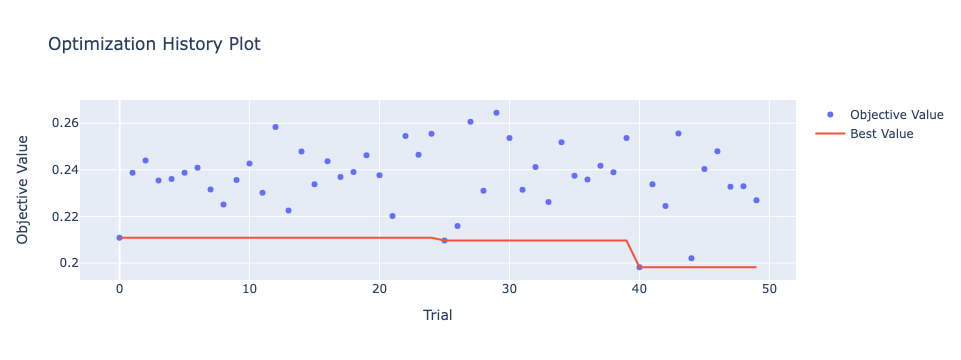

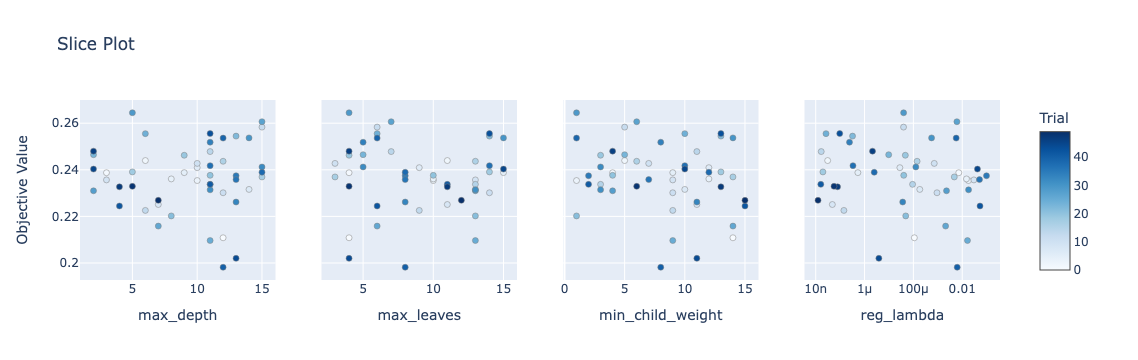

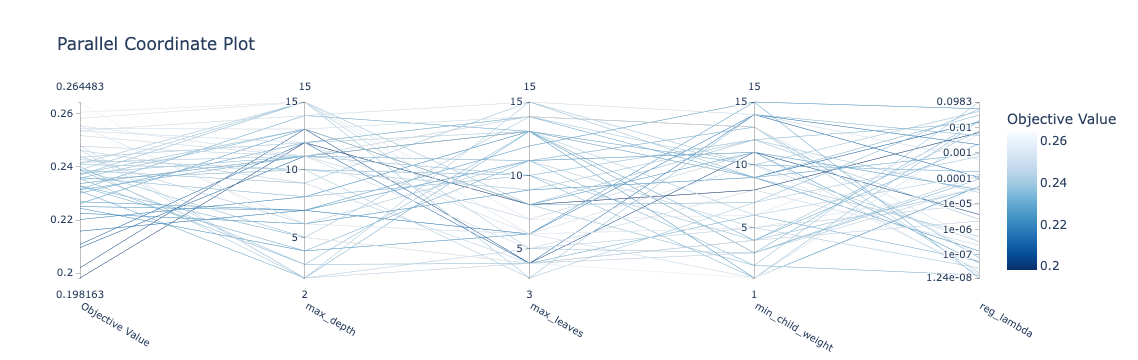

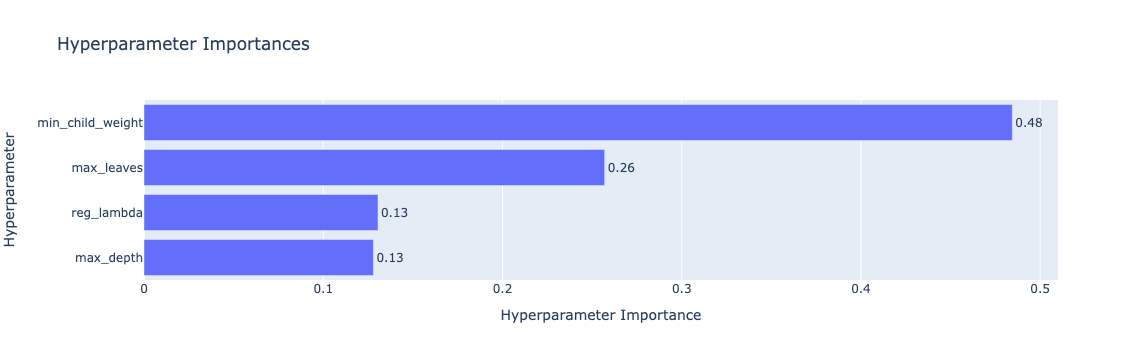

In [272]:
display(opt_vis.plot_optimization_history(study), 
        opt_vis.plot_slice(study),
        opt_vis.plot_parallel_coordinate(study),
        opt_vis.plot_param_importances(study),
       )

In [273]:
display(result, result.mean())
# features[["max_depth", "min_child_weight", "max_leaves"]] = features.T[["max_depth", "min_child_weight", "max_leaves"]].astype(int).T
display(features.T)

val     test
1   0.13364  0.16616
2   0.14287  0.18843
3   0.14182  0.24517
4   0.23456  0.34024
5   0.24839  0.23022
6   0.22335  0.20217
7   0.17656  0.20262
8   0.20622  0.18362
9   0.18660  0.17593
10  0.30598  0.40591
11  0.24972  0.38136
12  0.27650  0.33732
13  0.23403  0.31930
14  0.25127  0.28485
15  0.25870  0.31506
16  0.25124  0.22972
17  0.21582  0.26758
18  0.25881  0.27256
19  0.21937  0.31572
20  0.23705  0.29558
21  0.19818  0.34136
22  0.19772  0.27246
23  0.18590  0.24490
24  0.18927  0.21707
25  0.19569  0.15328
26  0.18216  0.16067
27  0.19816  0.18722

val     0.214799
test    0.256907
dtype: float64

max_depth  min_child_weight  max_leaves    reg_lambda
1         3.0               4.0        13.0  1.474395e-08
2         4.0              14.0         7.0  1.279028e-03
3        12.0              10.0        10.0  8.230919e-06
4        11.0               6.0         4.0  8.871526e-03
5        12.0               8.0        14.0  2.383375e-02
6        13.0              10.0        11.0  1.401382e-07
7         5.0              13.0        10.0  6.620315e-05
8        12.0               4.0        11.0  6.604993e-03
9         4.0              12.0        11.0  3.530830e-02
10        3.0              11.0         8.0  2.990442e-06
11       13.0               5.0         5.0  2.746087e-06
12       13.0              10.0        13.0  8.947215e-02
13       14.0               8.0        13.0  1.150166e-08
14       13.0               4.0         7.0  1.705344e-04
15       12.0              12.0         9.0  1.953393e-04
16       14.0              11.0         9.0  4.914279e-03
17        5.0               9.0         6.0  5.040646e-02
18       12.0               8.0        15.0  1.325369e-07
19        2.0               1.0        12.0  9.494278e-02
20        7.0               6.0         9.0  2.332653e-08
21        8.0              15.0         9.0  3.865505e-05
22        9.0              14.0         9.0  3.952209e-07
23       14.0               6.0        12.0  3.914437e-07
24       14.0               8.0        10.0  1.515330e-04
25        9.0               1.0        10.0  4.352162e-04
26        5.0               7.0         8.0  1.146103e-06
27       12.0               8.0         8.0  6.223723e-03

In [271]:
display(result, result.mean())
# features[["max_depth", "min_child_weight", "max_leaves"]] = features.T[["max_depth", "min_child_weight", "max_leaves"]].astype(int).T
display(features.T)

val     test
1   0.13364  0.16616
2   0.14287  0.18843
3   0.14182  0.24517
4   0.23456  0.34024
5   0.24839  0.23022
6   0.22335  0.20217
7   0.17656  0.20262
8   0.20622  0.18362
9   0.18660  0.17593
10  0.30598  0.40591
11  0.24972  0.38136
12  0.27650  0.33732
13  0.23403  0.31930
14  0.25127  0.28485
15  0.25870  0.31506
16  0.25124  0.22972
17  0.21582  0.26758
18  0.25881  0.27256
19  0.21937  0.31572
20  0.23705  0.29558
21  0.19818  0.34136
22  0.19772  0.27246
23  0.18590  0.24490
24  0.18927  0.21707
25  0.19569  0.15328
26  0.18216  0.16067
27  0.19816  0.18722

val     0.214799
test    0.256907
dtype: float64

max_depth  min_child_weight  max_leaves    reg_lambda
1         3.0               4.0        13.0  1.474395e-08
2         4.0              14.0         7.0  1.279028e-03
3        12.0              10.0        10.0  8.230919e-06
4        11.0               6.0         4.0  8.871526e-03
5        12.0               8.0        14.0  2.383375e-02
6        13.0              10.0        11.0  1.401382e-07
7         5.0              13.0        10.0  6.620315e-05
8        12.0               4.0        11.0  6.604993e-03
9         4.0              12.0        11.0  3.530830e-02
10        3.0              11.0         8.0  2.990442e-06
11       13.0               5.0         5.0  2.746087e-06
12       13.0              10.0        13.0  8.947215e-02
13       14.0               8.0        13.0  1.150166e-08
14       13.0               4.0         7.0  1.705344e-04
15       12.0              12.0         9.0  1.953393e-04
16       14.0              11.0         9.0  4.914279e-03
17        5.0               9.0         6.0  5.040646e-02
18       12.0               8.0        15.0  1.325369e-07
19        2.0               1.0        12.0  9.494278e-02
20        7.0               6.0         9.0  2.332653e-08
21        8.0              15.0         9.0  3.865505e-05
22        9.0              14.0         9.0  3.952209e-07
23       14.0               6.0        12.0  3.914437e-07
24       14.0               8.0        10.0  1.515330e-04
25        9.0               1.0        10.0  4.352162e-04
26        5.0               7.0         8.0  1.146103e-06
27       12.0               8.0         8.0  6.223723e-03

In [254]:
display(result, result.mean())
display(features)

val     test
1   0.13207  0.16388
2   0.14815  0.19132
3   0.14629  0.22982
4   0.23129  0.24958
5   0.23301  0.21887
6   0.23025  0.20798
7   0.18170  0.21367
8   0.21292  0.19878
9   0.19261  0.15095
10  0.30013  0.41016
11  0.23892  0.34491
12  0.25161  0.34697
13  0.23914  0.42208
14  0.26907  0.33416
15  0.26424  0.31516
16  0.24272  0.25067
17  0.23219  0.29403
18  0.26979  0.34354
19  0.23900  0.31761
20  0.23962  0.29006
21  0.19483  0.31633
22  0.18886  0.25674
23  0.20901  0.23842
24  0.18107  0.22544
25  0.19325  0.16018
26  0.19083  0.16525
27  0.20962  0.18296

val     0.217118
test    0.260723
dtype: float64

1   2   3   4   5   6   7   8   9   10  ...  18  19  20  21  \
max_depth          6   7   6   4  10   6   9   6   4  10  ...   2   9   7   9   
min_child_weight  12  12  11   3   9  11  15   3   8   4  ...  11   5   3  15   
max_leaves         5  10  11   9   6   9   9  11   6   5  ...   6  11  11  12   

                  22  23  24  25  26  27  
max_depth          5   9  10   6   9   8  
min_child_weight  13   6  12  11  11  14  
max_leaves        12   7   6   5   5   4  

[3 rows x 27 columns]

In [237]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

[I 2024-04-30 21:48:12,066] A new study created in memory with name: no-name-9af1769b-a836-4898-a22a-c8ef016acf35
[I 2024-04-30 21:48:13,516] Trial 7 finished with value: 0.7913459729201519 and parameters: {'max_depth': 3, 'min_child_weight': 4, 'max_leaves': 3, 'reg_lambda': 7.5405846474733496}. Best is trial 7 with value: 0.7913459729201519.
[I 2024-04-30 21:48:13,519] Trial 3 finished with value: 0.9217591729890809 and parameters: {'max_depth': 9, 'min_child_weight': 5, 'max_leaves': 3, 'reg_lambda': 8.268883584106286}. Best is trial 7 with value: 0.7913459729201519.
[I 2024-04-30 21:48:13,786] Trial 4 finished with value: 0.8375394123619216 and parameters: {'max_depth': 3, 'min_child_weight': 12, 'max_leaves': 15, 'reg_lambda': 5.243719135969838}. Best is trial 7 with value: 0.7913459729201519.
[I 2024-04-30 21:48:13,799] Trial 2 finished with value: 1.037229374759147 and parameters: {'max_depth': 3, 'min_child_weight': 7, 'max_leaves': 11, 'reg_lambda': 4.164905889081404}. Best is

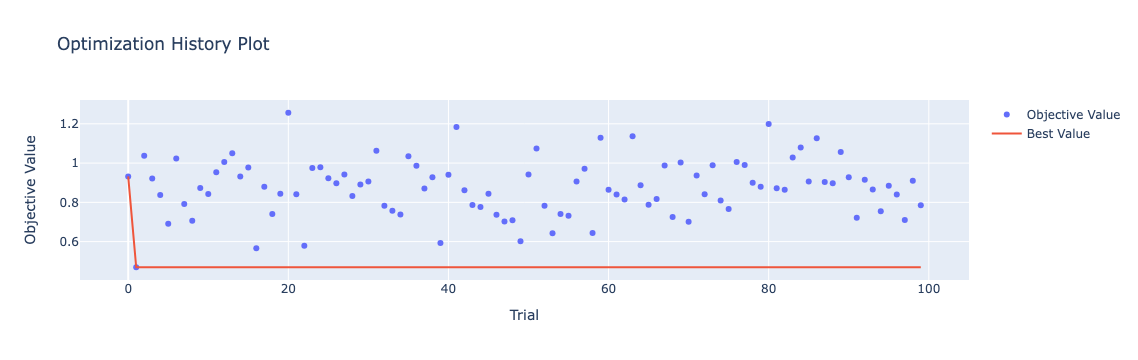

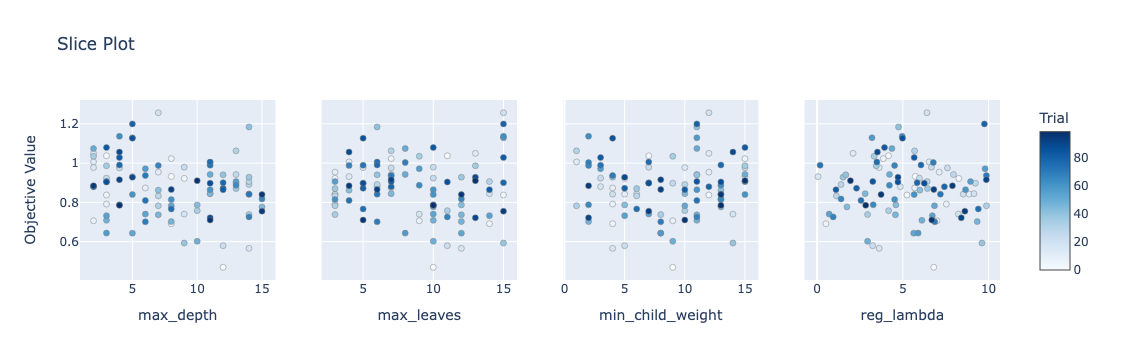

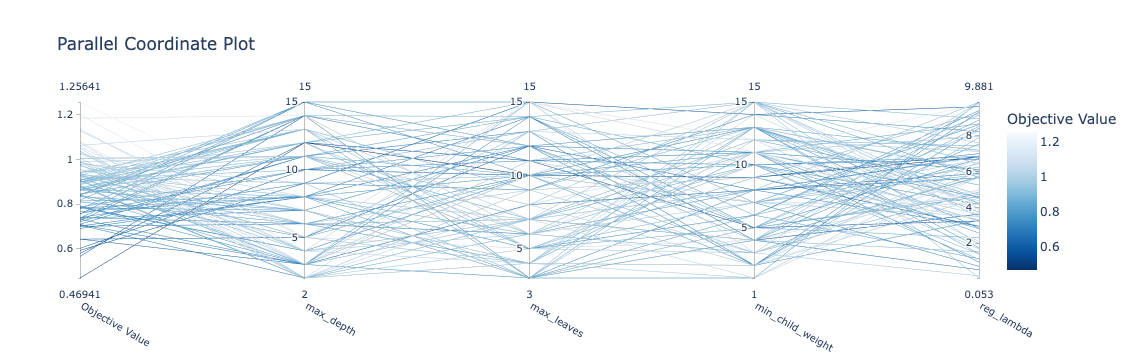

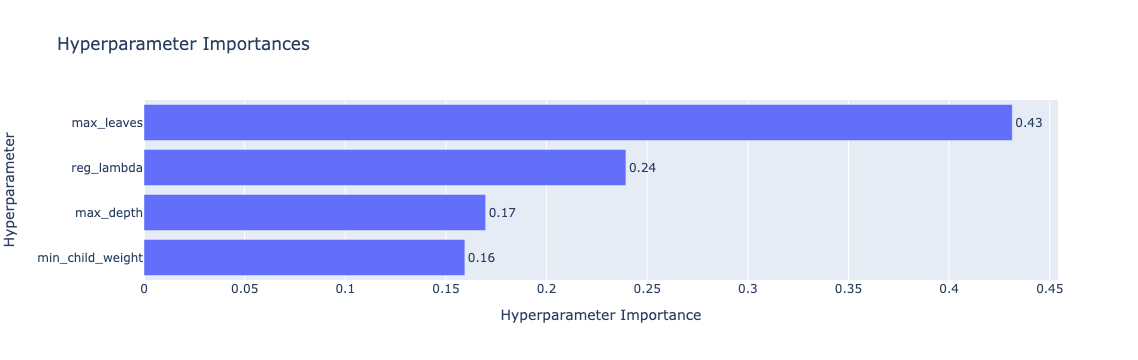

In [275]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))
study.optimize(lambda trial: xgb_objective(trial, X_train_3, y_train_3, X_val_3, y_val_3), n_trials=100, n_jobs=-1)

display(opt_vis.plot_optimization_history(study), 
        opt_vis.plot_slice(study),
        opt_vis.plot_parallel_coordinate(study),
        opt_vis.plot_param_importances(study),
       )

In [ ]:
param_grid = {
    'n_estimators': [80,100,150], 
    'max_depth': [1,2,3,4],
    "learning_rate": [0.1,0.15,0.2],
    "min_child_weight": [3,5,10],
    }

### Grid Search

In [456]:
cv_train_set

tgt_pressure  sensor_id  failure_pressure  liquid_pct   BLEVE_h  \
0         0.199929       18.0         -1.479083   -0.383024  1.334384   
1         0.435681       19.0         -1.479083   -0.383024  1.334384   
2         0.264031       20.0         -1.479083   -0.383024  1.334384   
3         0.270576       21.0         -1.479083   -0.383024  1.334384   
4         0.204675       22.0         -1.479083   -0.383024  1.334384   
...            ...        ...               ...         ...       ...   
7962      0.346055       15.0         -0.892775    1.247977  1.003480   
7963      0.505870       16.0         -0.892775    1.247977  1.003480   
7964      0.394459       17.0         -0.892775    1.247977  1.003480   
7965      0.290371       18.0         -0.892775    1.247977  1.003480   
7966      0.399276       19.0         -0.892775    1.247977  1.003480   

      vapour_temp  liquid_temp  superheated_status  vapour_height  \
0        1.759344     0.309650                 1.0      -0.453530   
1        1.759344     0.309650                 1.0      -0.453530   
2        1.759344     0.309650                 1.0      -0.453530   
3        1.759344     0.309650                 1.0      -0.453530   
4        1.759344     0.309650                 1.0      -0.453530   
...           ...          ...                 ...            ...   
7962     0.271462    -0.102036                 1.0      -0.834781   
7963     0.271462    -0.102036                 1.0      -0.834781   
7964     0.271462    -0.102036                 1.0      -0.834781   
7965     0.271462    -0.102036                 1.0      -0.834781   
7966     0.271462    -0.102036                 1.0      -0.834781   

      net_sensor_dist  obstacle_dist  obstacle_w  obstacle_h  obstacle_thk  \
0            0.513615      -0.061561    0.524127    1.324727     -1.423063   
1           -0.356042      -0.061561    0.524127    1.324727     -1.423063   
2           -0.417299      -0.061561    0.524127    1.324727     -1.423063   
3            0.184529      -0.061561    0.524127    1.324727     -1.423063   
4            0.215073      -0.061561    0.524127    1.324727     -1.423063   
...               ...            ...         ...         ...           ...   
7962        -0.169331      -0.061561    0.270103    0.783528     -0.099054   
7963        -0.321333      -0.061561    0.270103    0.783528     -0.099054   
7964        -0.373173      -0.061561    0.270103    0.783528     -0.099054   
7965         0.049938      -0.061561    0.270103    0.783528     -0.099054   
7966        -0.184949      -0.061561    0.270103    0.783528     -0.099054   

      obstacle_angle  tank_volume  
0          -0.178203    -0.165752  
1          -0.178203    -0.165752  
2          -0.178203    -0.165752  
3          -0.178203    -0.165752  
4          -0.178203    -0.165752  
...              ...          ...  
7962       -1.369173    -0.112399  
7963       -1.369173    -0.112399  
7964       -1.369173    -0.112399  
7965       -1.369173    -0.112399  
7966       -1.369173    -0.112399  

[7848 rows x 16 columns]

In [457]:
ext_test_data

sensor_id  failure_pressure  liquid_pct   BLEVE_h  vapour_temp  \
0             1         -0.445831   -0.671426 -1.118849    -0.175972   
1             2         -0.445831   -0.671426 -1.118849    -0.175972   
2             3         -0.445831   -0.671426 -1.118849    -0.175972   
3             4         -0.445831   -0.671426 -1.118849    -0.175972   
4             5         -0.445831   -0.671426 -1.118849    -0.175972   
...         ...               ...         ...       ...          ...   
3198         13         -1.384592   -0.317981  1.317130     1.632630   
3199         14         -1.384592   -0.317981  1.317130     1.632630   
3200         15         -1.384592   -0.317981  1.317130     1.632630   
3201         16         -1.384592   -0.317981  1.317130     1.632630   
3202         17         -1.384592   -0.317981  1.317130     1.632630   

      liquid_temp  superheated_status  vapour_height  net_sensor_dist  \
0        1.197256                   1       1.450964        -0.540259   
1        1.197256                   1       1.450964        -0.543957   
2        1.197256                   1       1.450964        -0.382000   
3        1.197256                   1       1.450964        -0.803924   
4        1.197256                   1       1.450964        -0.807994   
...           ...                 ...            ...              ...   
3198     0.312378                   1      -0.439929        -0.603946   
3199     0.312378                   1      -0.439929        -0.532397   
3200     0.312378                   1      -0.439929         0.591758   
3201     0.312378                   1      -0.439929        -0.178817   
3202     0.312378                   1      -0.439929        -0.116449   

      obstacle_dist  obstacle_w  obstacle_h  obstacle_thk  obstacle_angle  \
0         -0.302942    0.981193   -0.936957     -1.405597       -1.418242   
1         -0.302942    0.981193   -0.936957     -1.405597       -1.418242   
2         -0.302942    0.981193   -0.936957     -1.405597       -1.418242   
3         -0.302942    0.981193   -0.936957     -1.405597       -1.418242   
4         -0.302942    0.981193   -0.936957     -1.405597       -1.418242   
...             ...         ...         ...           ...             ...   
3198      -0.065931    0.717029    1.065594     -1.405597       -0.087848   
3199      -0.065931    0.717029    1.065594     -1.405597       -0.087848   
3200      -0.065931    0.717029    1.065594     -1.405597       -0.087848   
3201      -0.065931    0.717029    1.065594     -1.405597       -0.087848   
3202      -0.065931    0.717029    1.065594     -1.405597       -0.087848   

      tank_volume  
0        3.115520  
1        3.115520  
2        3.115520  
3        3.115520  
4        3.115520  
...           ...  
3198    -0.074863  
3199    -0.074863  
3200    -0.074863  
3201    -0.074863  
3202    -0.074863  

[3203 rows x 15 columns]

In [395]:
# Saving train and val data for each sensor to "data_dict"
cv_data = {}

for sensor in unique_sensors:
    train_data = cv_train_set[cv_train_set['sensor_id'] == sensor].drop(columns = "sensor_id")
    X_train = train_data.drop(['tgt_pressure'], axis=1)
    y_train = train_data['tgt_pressure']
    
    test_data = cv_test_set[cv_test_set['sensor_id'] == sensor].drop(columns = "sensor_id")
    X_test = test_data.drop(['tgt_pressure'], axis=1)
    y_test = test_data['tgt_pressure']

    X_test_ext = ext_test_data[ext_test_data['sensor_id'] == sensor].drop(columns = "sensor_id")
    
    cv_data[sensor] = (X_train, y_train, X_test, y_test, X_test_ext)

In [396]:
X_train_1, y_train_1, X_test_1, y_test_1, X_test_ext_1 = cv_data[1]
X_train_2, y_train_2, X_test_2, y_test_2, X_test_ext_2 = cv_data[2]
X_train_3, y_train_3, X_test_3, y_test_3, X_test_ext_3 = cv_data[3]
X_train_10, y_train_10, X_test_10, y_test_10, X_test_ext_10 = cv_data[10]

In [384]:
def plot_fxn(grid_result, sensor):
    results = grid_result.cv_results_
    means_test = np.abs(results['mean_test_score'])
    stds_test = results['std_test_score']
    means_train = np.abs(results['mean_train_score'])
    stds_train = results['std_train_score']
    
    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid_result.best_params_.keys())
    for p_k, p_v in grid_result.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))
    
    params=grid_result.param_grid
    
    ## Ploting results
    fig, ax = plt.subplots(1,4, sharex='none', sharey='all',figsize=(8,2))
    ax = ax.flatten()
    fig.suptitle(f'Score per parameter: {int(sensor)}')
    fig.text(0.08, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())
    
    handles, labels = ax[0].get_legend_handles_labels()
    fig.legend(handles[:2], labels[:2], loc='upper right', bbox_to_anchor=(0.95, 0.95), prop = {"size":8})
    
    plt.show()

In [444]:
def xgb_grid_search(param_grid, X_train, y_train, X_test, y_test, X_test_ext):

    start_time = time.time()
    
    xgb_reg = XGBRegressor(random_state = 42,
                      # n_estimators = 50,
                      # max_depth = 6, 
                      early_stopping_rounds = 10,
                      eval_metric = "mape",
                           learning_rate = 0.15
                     )
    
    grid_search = GridSearchCV(estimator = xgb_reg, 
                               param_grid = param_grid, 
                               scoring = mape_scorer, 
                               verbose = 0, 
                               cv = 3, 
                               n_jobs = -1,
                               return_train_score=True
                              )
    
    grid_search.fit(X_train, 
                    y_train,
                    eval_set = [(X_test, X_test)],
                    verbose = False
                   )
    # print(f"{sensor_id} time: {time.time() - temp_time:.2f}")
    
    best_xgb_model = grid_search.best_estimator_
    # y_pred = best_xgb_model.predict(X_val)
    # score = mape_calc(y_val, y_pred)

    y_pred = best_xgb_model.predict(X_test)
    score = mape_calc(y_test, y_pred)
    # score = - cross_val_score(xgb_model, X_val, y_val, cv = 5, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1).mean()

    # print(f"t = {time.time() - start_time:.2f}")
    
    return score, grid_search


In [420]:
param_grid = {
    'n_estimators': [20,50,100,200], 
    'max_depth': [1,2,3,5,10],
    # "learning_rate": [0.15],
    "min_child_weight": [1,2,4,8],
    "reg_lambda": [0,2,5,10]
    }

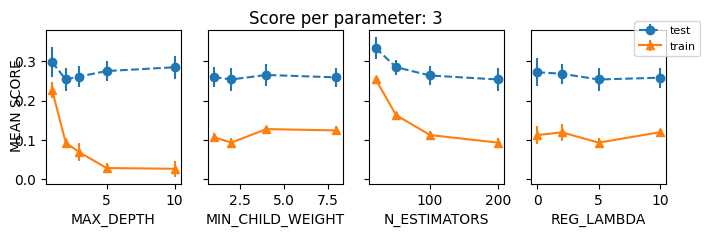

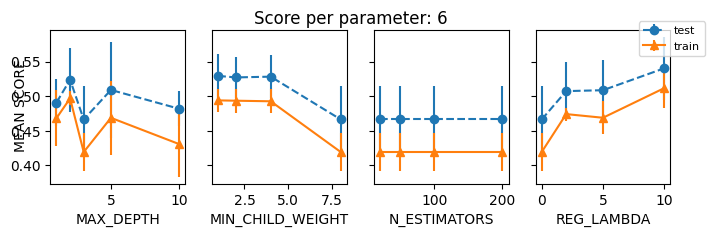

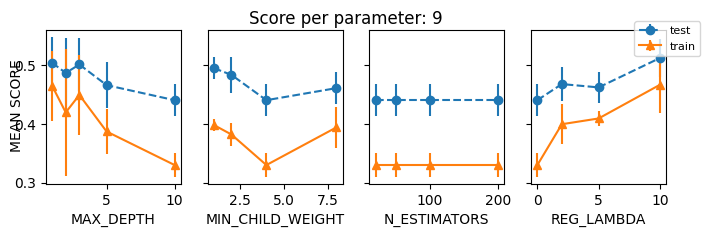

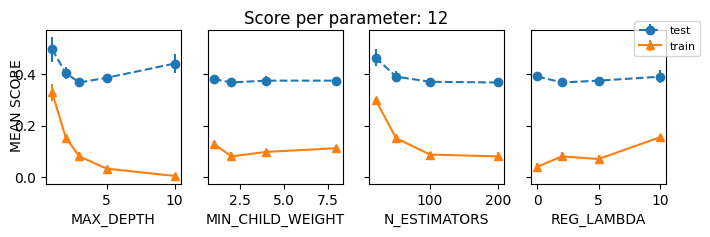

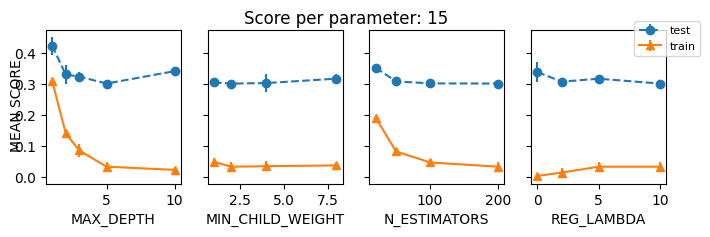

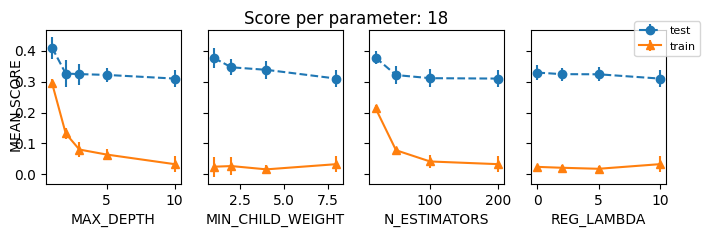

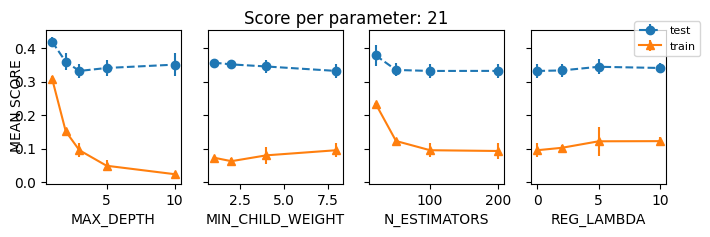

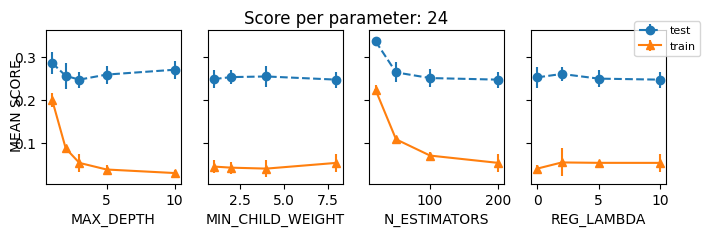

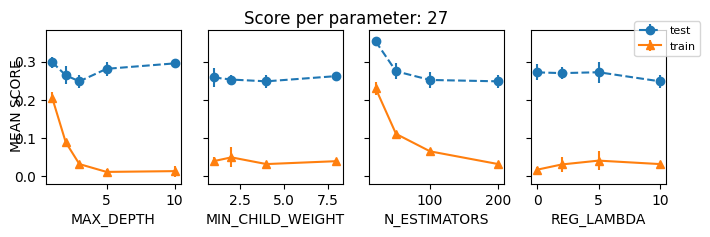

In [389]:
mapes = []
params_dict = {}

for sensor, (X_train, y_train, X_val, y_val, X_test, y_test, X_test_ext) in cv_data.items():
    if sensor % 3 == 0:
        # print(f"### {sensor} ###")
        mape, grid = xgb_grid_search(param_grid, X_train, y_train, X_val, y_val, X_test, y_test, X_test_ext)
        # print(round(mape,5))
        mapes.append(mape)
        # params_dict[sensor] = best_params
        plot_fxn(grid, sensor)
        

### Simple

In [459]:
def xgb_model(X_train, y_train, X_test, y_test, X_test_ext, predict = False):

    start_time = time.time()
    
    xgb_reg = XGBRegressor(n_estimators = 60,
                           max_depth = 3,
                           learning_rate = 0.15,
                           n_jobs = -1,
                           eval_metric = "mape",
                           random_state = 42,
                          )

    xgb_reg.fit(X_train, y_train, verbose = False,
                # eval_set = [(X_train, y_train), (X_test, y_test)]
               )
    
    # results = xgb_reg.evals_result()
    # plt.figure(figsize = (4,3))
    # plt.plot(results["validation_0"]["mape"], label = "train")
    # plt.plot(results["validation_1"]["mape"], label = "test")
    # plt.title("Train vs Test Validation by Estimator")
    # plt.legend()
    # plt.show()
    
    # y_pred_val = xgb_reg.predict(X_val)
    # score_val = mape_calc(y_val, y_pred)

    if predict == True:
        return pd.Series(xgb_reg.predict(X_test_ext), index = X_test_ext.index)
    
    y_pred_test = xgb_reg.predict(X_test)
    score_test = mape_calc(y_test, y_pred_test)
    score = - cross_val_score(xgb_reg, X_train, y_train, cv = 5, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1)

    return score_test, score.mean()

In [460]:
test_scores = []
cv_scores = []

for sensor, (X_train, y_train, X_test, y_test, X_test_ext) in cv_data.items():
    test_score, cv_score = xgb_model(X_train, y_train, X_test, y_test, X_test_ext)
    test_scores.append(test_score)
    cv_scores.append(cv_score)

In [461]:
print(f"test: {np.mean(test_scores):.5f} \ncv: {np.mean(cv_scores):.5f}")

test: 0.26371 
cv: 0.29671


In [450]:
preds = []

for sensor, (X_train, y_train, X_test, y_test, X_test_ext) in cv_data.items():
    temp_preds = xgb_model(X_train, y_train, X_test, y_test, X_test_ext, predict = True)
    preds.append(temp_preds)

preds_concat = pd.concat(preds).sort_index()

In [452]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

## Implementing Paper

In [66]:
X_cols = ["sensor_id",
          "failure_pressure", 
          "liquid_pct", 
          "tank_w", 
          "tank_l", 
          "tank_h", 
          "BLEVE_h", 
          "vapour_temp", 
          "liquid_temp", 
          "superheated_status",
          "vapour_height",
          "net_sensor_dist",
          # "obstacle_dist",
          # "obstacle_w", 
          # "obstacle_h",
          # "obstacle_thk",
          # "obstacle_angle"
          ## Include obstalce measurements, (thk, angle etc.)
         ]

y_col = ["tgt_pressure"]

In [67]:
X_train_data = train_split[X_cols]
y_train_data = train_split[y_col]

X_val_data = validation_split[X_cols]
y_val_data = validation_split[y_col]

X_test_data = test_split[X_cols]
y_test_data = test_split[y_col]

In [68]:
def xgb_objective(trial, X_train, y_train, X_val, y_val):
    # n_estimators = 150
    max_leaves = trial.suggest_int("max_leaves", 10, 100)
    # max_depth = trial.suggest_int("max_depth", 2, 10)
    min_child_weight = trial.suggest_float("min_child_weight", 1e-5, 1e-1)#, log = True)
    # min_child_samples
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 1, log = True)
    # min_split_loss = trial.suggest_float("min_split_loss", 1e-5, 0.001, log = True)
    subsample = trial.suggest_float("subsample", 0.5, 1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1)
    reg_lambda = trial.suggest_float("reg_lambda", 1e-5, 1, log = True)

    xgb_model = XGBRegressor(# n_estimators = n_estimators,
                         # max_depth = max_depth,
                         max_leaves = max_leaves,
                         learning_rate = learning_rate,
                         min_child_weight = min_child_weight,
                         # min_split_loss = min_split_loss,
                         subsample = subsample,        
                         colsample_bytree = colsample_bytree,
                         reg_lambda = reg_lambda,
        
                         n_jobs = -1,
                         random_state = 42,
                        )
    
    xgb_model.fit(X_train, 
                  y_train, 
                  verbose = False,
                  eval_set = [(X_val, y_val)],
                  # eary_stopping_rounds = 10
                 )
    
    y_pred = xgb_model.predict(X_val)
    score = mape_calc(y_val, y_pred)
    # print(score)

    # score = - cross_val_score(xgb_model, X_val, y_val, cv = 5, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1).mean()
    
    return score



def train_best_xgb(best_params):
    model = XGBRegressor(
        # n_estimators = 100,
        # max_depth = best_params["max_depth"],
        max_leaves = best_params["max_leaves"],
        learning_rate = best_params["learning_rate"],
        min_child_weight = best_params["min_child_weight"],
        subsample = best_params["subsample"],
        colsample_bytree = best_params["colsample_bytree"],
        reg_lambda = best_params["reg_lambda"],
        n_jobs = -1,
        random_state = 42,
    )

    return model


In [69]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))
study.optimize(lambda trial: xgb_objective(trial, X_train_10, y_train_10, X_val_10, y_val_10), n_trials=100, n_jobs=-1)

[I 2024-05-02 21:58:39,153] A new study created in memory with name: no-name-fa183c75-71fe-4f8d-b3f9-908d07637deb
[W 2024-05-02 21:58:39,158] Trial 0 failed with parameters: {} because of the following error: NameError("name 'X_train_10' is not defined").
Traceback (most recent call last):
  File "/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folders/g1/gcf6wcx125v51909bvw56yxm0000gn/T/ipykernel_92561/1456205462.py", line 2, in <lambda>
    study.optimize(lambda trial: xgb_objective(trial, X_train_10, y_train_10, X_val_10, y_val_10), n_trials=100, n_jobs=-1)
                                                      ^^^^^^^^^^
NameError: name 'X_train_10' is not defined. Did you mean: 'X_train_data'?
[W 2024-05-02 21:58:39,159] Trial 1 failed with parameters: {} because of the following error: NameError("name 'X_train_10' is not defin

NameError: name 'X_train_10' is not defined

In [661]:
study.best_params

{'max_leaves': 74,
 'min_child_weight': 0,
 'learning_rate': 0.06797574661363623,
 'subsample': 0.58602906118699,
 'colsample_btytree': 0.6945052149955322,
 'reg_lambda': 0.002442856448469509}

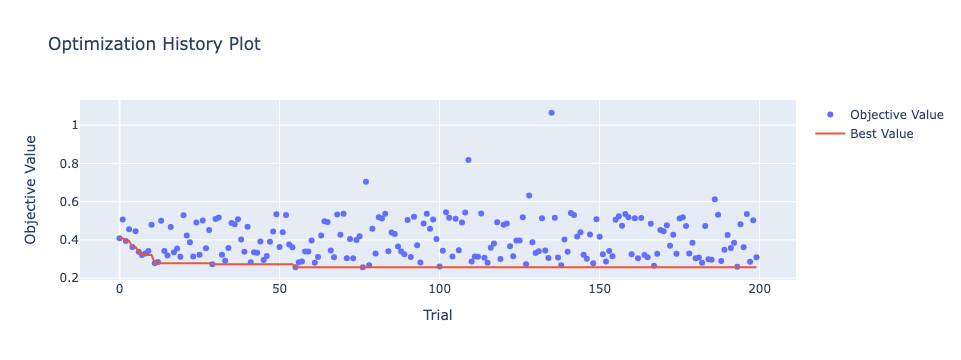

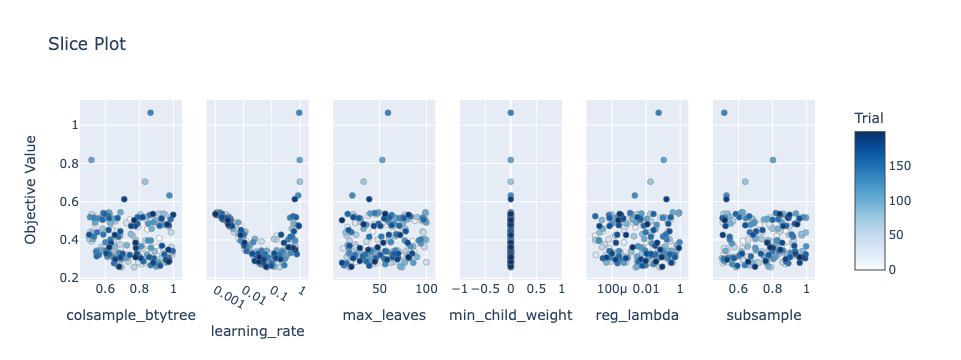

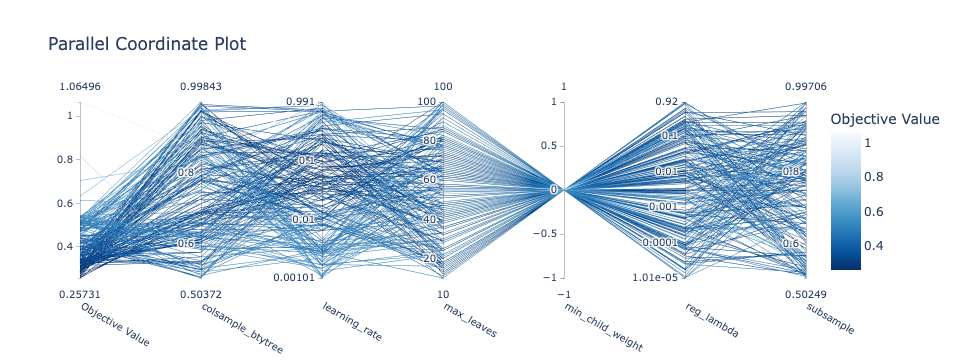

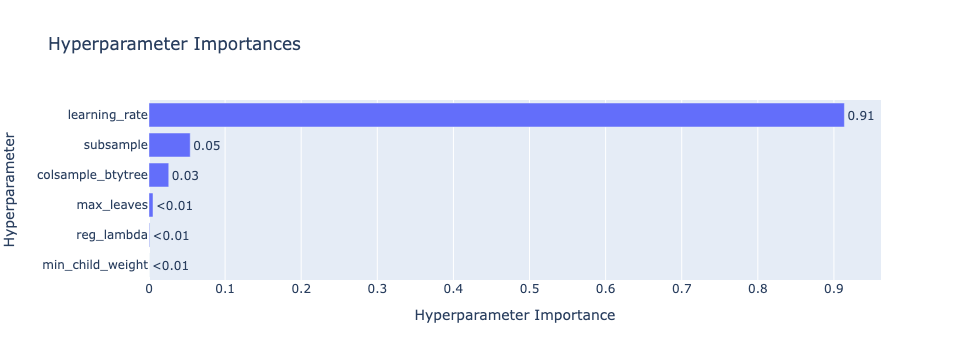

In [662]:
display(opt_vis.plot_optimization_history(study),
        opt_vis.plot_slice(study),
        opt_vis.plot_parallel_coordinate(study),
        opt_vis.plot_param_importances(study),
       )

In [69]:
# Saving train and val data for each sensor to "data_dict"
data_dict = {}
unique_sensors = train_split["sensor_id"].unique()
unique_sensors.sort()

for sensor in unique_sensors:
    train_data = train_split[train_split['sensor_id'] == sensor]
    X_train = train_data.drop(['tgt_pressure'], axis=1)
    y_train = train_data['tgt_pressure']
    
    val_data = validation_split[validation_split['sensor_id'] == sensor]
    X_val = val_data.drop(['tgt_pressure'], axis=1)
    y_val = val_data['tgt_pressure']
    
    test_data = test_split[test_split['sensor_id'] == sensor]
    X_test = test_data.drop(['tgt_pressure'], axis=1)
    y_test = test_data['tgt_pressure']
    
    data_dict[sensor] = (X_train, y_train, X_val, y_val, X_test, y_test)

In [70]:
X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1 = data_dict[1]
X_train_10, y_train_10, X_val_10, y_val_10, X_test_10, y_test_10 = data_dict[10]

In [695]:
result = pd.DataFrame()
preds = []

start_time = time.time()
for sensor, (X_train, y_train, X_val, y_val, X_test, y_test) in data_dict.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: xgb_objective(trial, X_train, y_train, X_val, y_val), n_trials=100, n_jobs=-1)
    
    best_score = study.best_value
    best_params = study.best_params

    best_xgb = train_best_xgb(best_params)
    best_xgb.fit(X_train, 
               y_train, 
               verbose = False,
               eval_set = [(X_val, y_val)],
              )
    
    y_pred = best_xgb.predict(X_val)
    val_score = mape_calc(y_val, y_pred)

    y_pred_test = best_xgb.predict(X_test)
    test_score = mape_calc(y_test, y_pred_test)

    # result[sensor] = round(best_score,5)    

    total_time = time.time() - temp_time
    rem_time = ((time.time() - start_time)/sensor * (27-sensor))/60
    print(f"{int(sensor)}: val = {val_score:.5f} \ttest = {test_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")


    result.loc[sensor, "val"] = round(val_score,5) 
    result.loc[sensor, "test"] = round(test_score,5) 
# preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

[I 2024-05-02 21:47:36,142] A new study created in memory with name: no-name-513594ff-0e87-4385-8da8-e7f3fb6fb78b
[I 2024-05-02 21:47:37,002] Trial 5 finished with value: 0.16693361947969396 and parameters: {'max_leaves': 77, 'min_child_weight': 0.018115498723161625, 'learning_rate': 0.42238628605758954, 'subsample': 0.7222788976930412, 'colsample_bytree': 0.7794694880902298, 'reg_lambda': 0.5705857097534888}. Best is trial 5 with value: 0.16693361947969396.
[I 2024-05-02 21:47:37,125] Trial 6 finished with value: 0.3449168711637256 and parameters: {'max_leaves': 89, 'min_child_weight': 0.008414105071846626, 'learning_rate': 0.6490508411178736, 'subsample': 0.534034107207968, 'colsample_bytree': 0.6117723344345658, 'reg_lambda': 0.039108232349374945}. Best is trial 5 with value: 0.16693361947969396.
[I 2024-05-02 21:47:37,136] Trial 1 finished with value: 0.17836869413495154 and parameters: {'max_leaves': 21, 'min_child_weight': 0.004413229431211393, 'learning_rate': 0.380365380090425,

1: val = 0.13219 	test = 0.16318 	 17.44s 	 Rem: 7.56m


[I 2024-05-02 21:47:54,226] Trial 1 finished with value: 0.1902673810528354 and parameters: {'max_leaves': 38, 'min_child_weight': 0.03734608906031095, 'learning_rate': 0.7029134802116321, 'subsample': 0.9649019218901517, 'colsample_bytree': 0.539981884414048, 'reg_lambda': 7.226315207670566e-05}. Best is trial 1 with value: 0.1902673810528354.
[I 2024-05-02 21:47:54,365] Trial 7 finished with value: 0.3382994955896446 and parameters: {'max_leaves': 82, 'min_child_weight': 0.07466487734792444, 'learning_rate': 0.626074763292172, 'subsample': 0.7284167592099156, 'colsample_bytree': 0.7066324758715045, 'reg_lambda': 0.0002528111744408513}. Best is trial 1 with value: 0.1902673810528354.
[I 2024-05-02 21:47:54,699] Trial 3 finished with value: 0.19397323436311276 and parameters: {'max_leaves': 79, 'min_child_weight': 0.0470509390757678, 'learning_rate': 0.20158349262280076, 'subsample': 0.7524044402052228, 'colsample_bytree': 0.6143006232542347, 'reg_lambda': 0.14686954348523604}. Best is

2: val = 0.15389 	test = 0.20276 	 16.95s 	 Rem: 7.17m


[I 2024-05-02 21:48:11,481] Trial 5 finished with value: 0.27588101392379416 and parameters: {'max_leaves': 14, 'min_child_weight': 0.027183956835479587, 'learning_rate': 0.5471068863261752, 'subsample': 0.7567406529807558, 'colsample_bytree': 0.9667779661302973, 'reg_lambda': 0.005819969697050877}. Best is trial 5 with value: 0.27588101392379416.
[I 2024-05-02 21:48:11,657] Trial 2 finished with value: 0.5856523739965626 and parameters: {'max_leaves': 83, 'min_child_weight': 0.01906978316442531, 'learning_rate': 0.40972531559468417, 'subsample': 0.5227999982442999, 'colsample_bytree': 0.8153691922385492, 'reg_lambda': 0.0005361813289723752}. Best is trial 5 with value: 0.27588101392379416.
[I 2024-05-02 21:48:11,693] Trial 7 finished with value: 0.42391170306260645 and parameters: {'max_leaves': 10, 'min_child_weight': 0.034541239866313155, 'learning_rate': 0.0015411309269037048, 'subsample': 0.5699637498874244, 'colsample_bytree': 0.6408136178222621, 'reg_lambda': 0.00255030177283611

3: val = 0.19051 	test = 0.27431 	 15.94s 	 Rem: 6.71m


[I 2024-05-02 21:48:27,543] Trial 3 finished with value: 0.35494281786876436 and parameters: {'max_leaves': 57, 'min_child_weight': 0.0599272911828716, 'learning_rate': 0.1580760102542768, 'subsample': 0.9217307550273328, 'colsample_bytree': 0.659937967283418, 'reg_lambda': 3.130879413998075e-05}. Best is trial 3 with value: 0.35494281786876436.
[I 2024-05-02 21:48:27,587] Trial 5 finished with value: 0.59201002676857 and parameters: {'max_leaves': 42, 'min_child_weight': 0.061139411455830656, 'learning_rate': 0.6812986491893545, 'subsample': 0.5681705786449094, 'colsample_bytree': 0.9609221572506169, 'reg_lambda': 0.0012465562082416783}. Best is trial 3 with value: 0.35494281786876436.
[I 2024-05-02 21:48:27,861] Trial 1 finished with value: 0.33397017416574915 and parameters: {'max_leaves': 22, 'min_child_weight': 0.016591673824136725, 'learning_rate': 0.03881403101463922, 'subsample': 0.7185335788750009, 'colsample_bytree': 0.9558998034940056, 'reg_lambda': 4.577633550144459e-05}. B

4: val = 0.29667 	test = 0.34959 	 20.45s 	 Rem: 6.79m


[I 2024-05-02 21:48:47,981] Trial 3 finished with value: 0.4728227984950211 and parameters: {'max_leaves': 68, 'min_child_weight': 0.07160362691103575, 'learning_rate': 0.6652788132965036, 'subsample': 0.7811447228537567, 'colsample_bytree': 0.7206835801831375, 'reg_lambda': 0.0002229795276308265}. Best is trial 3 with value: 0.4728227984950211.
[I 2024-05-02 21:48:48,273] Trial 7 finished with value: 0.4965813238624758 and parameters: {'max_leaves': 45, 'min_child_weight': 0.028669222753727883, 'learning_rate': 0.4363478893257685, 'subsample': 0.7536756334745356, 'colsample_bytree': 0.6341189871960089, 'reg_lambda': 0.00016157746391081196}. Best is trial 3 with value: 0.4728227984950211.
[I 2024-05-02 21:48:48,537] Trial 2 finished with value: 0.5916214289263555 and parameters: {'max_leaves': 75, 'min_child_weight': 0.09259120454231366, 'learning_rate': 0.6688877366587166, 'subsample': 0.5975642418899094, 'colsample_bytree': 0.6393941452233041, 'reg_lambda': 0.0004890292668978996}. Be

5: val = 0.30036 	test = 0.34304 	 19.03s 	 Rem: 6.59m


[I 2024-05-02 21:49:06,622] Trial 0 finished with value: 0.53757911885007 and parameters: {'max_leaves': 74, 'min_child_weight': 0.052050237829733684, 'learning_rate': 0.8076826846299, 'subsample': 0.9235366144571884, 'colsample_bytree': 0.8069740659673172, 'reg_lambda': 0.0019360548822986543}. Best is trial 0 with value: 0.53757911885007.
[I 2024-05-02 21:49:06,891] Trial 1 finished with value: 0.47939806997146106 and parameters: {'max_leaves': 46, 'min_child_weight': 0.022663914892015587, 'learning_rate': 0.5175477432915204, 'subsample': 0.6355786912709676, 'colsample_bytree': 0.6314811653156372, 'reg_lambda': 4.930342494622072e-05}. Best is trial 1 with value: 0.47939806997146106.
[I 2024-05-02 21:49:06,920] Trial 6 finished with value: 0.35268900454079666 and parameters: {'max_leaves': 96, 'min_child_weight': 0.012543937984148597, 'learning_rate': 0.5131047119320864, 'subsample': 0.5912743063185881, 'colsample_bytree': 0.8277203075235531, 'reg_lambda': 2.9912220464747215e-05}. Best

6: val = 0.23414 	test = 0.20184 	 16.63s 	 Rem: 6.21m


[I 2024-05-02 21:49:23,352] Trial 4 finished with value: 0.2988127779045301 and parameters: {'max_leaves': 79, 'min_child_weight': 0.05670413416292861, 'learning_rate': 0.31900016094391526, 'subsample': 0.9881911735256095, 'colsample_bytree': 0.9726852150769201, 'reg_lambda': 0.04362262544766531}. Best is trial 4 with value: 0.2988127779045301.
[I 2024-05-02 21:49:23,495] Trial 5 finished with value: 0.28243712114969516 and parameters: {'max_leaves': 86, 'min_child_weight': 0.0348880586865909, 'learning_rate': 0.28259565534008996, 'subsample': 0.7634333275575171, 'colsample_bytree': 0.9732944877267625, 'reg_lambda': 1.8942168725597963e-05}. Best is trial 5 with value: 0.28243712114969516.
[I 2024-05-02 21:49:23,589] Trial 2 finished with value: 0.47560742471623585 and parameters: {'max_leaves': 88, 'min_child_weight': 0.03501850681144603, 'learning_rate': 0.494252279900176, 'subsample': 0.5911851680085214, 'colsample_bytree': 0.9856915486752258, 'reg_lambda': 0.017536985518490745}. Bes

7: val = 0.20865 	test = 0.24083 	 16.05s 	 Rem: 5.83m


[I 2024-05-02 21:49:39,428] Trial 5 finished with value: 0.267538139185391 and parameters: {'max_leaves': 96, 'min_child_weight': 0.024860378145199074, 'learning_rate': 0.2360519210505478, 'subsample': 0.9826284326627386, 'colsample_bytree': 0.8504758848355246, 'reg_lambda': 0.00025968637351797596}. Best is trial 5 with value: 0.267538139185391.
[I 2024-05-02 21:49:39,548] Trial 6 finished with value: 0.3655755231020795 and parameters: {'max_leaves': 32, 'min_child_weight': 0.013604443982287785, 'learning_rate': 0.43236075654621126, 'subsample': 0.6794620778977323, 'colsample_bytree': 0.6220839192927932, 'reg_lambda': 7.593331153162884e-05}. Best is trial 5 with value: 0.267538139185391.
[I 2024-05-02 21:49:39,976] Trial 4 finished with value: 0.24540646200997832 and parameters: {'max_leaves': 61, 'min_child_weight': 0.06568381170909023, 'learning_rate': 0.09572749984347309, 'subsample': 0.9324409081549332, 'colsample_bytree': 0.8839828411857262, 'reg_lambda': 0.0008177442622447431}. B

8: val = 0.21756 	test = 0.24062 	 16.10s 	 Rem: 5.49m


[I 2024-05-02 21:49:55,650] Trial 6 finished with value: 0.38404592080060357 and parameters: {'max_leaves': 77, 'min_child_weight': 0.07140768785911662, 'learning_rate': 0.4520521333555634, 'subsample': 0.7407218332703032, 'colsample_bytree': 0.5349380699229394, 'reg_lambda': 0.04995915719771607}. Best is trial 6 with value: 0.38404592080060357.
[I 2024-05-02 21:49:56,005] Trial 4 finished with value: 0.23576387838703836 and parameters: {'max_leaves': 91, 'min_child_weight': 0.08905047157735124, 'learning_rate': 0.11748862445461186, 'subsample': 0.8887143314981127, 'colsample_bytree': 0.6072935092857887, 'reg_lambda': 0.00022676059377278244}. Best is trial 4 with value: 0.23576387838703836.
[I 2024-05-02 21:49:56,082] Trial 5 finished with value: 0.49811261305779425 and parameters: {'max_leaves': 17, 'min_child_weight': 0.06351771752990247, 'learning_rate': 0.003514908929543921, 'subsample': 0.7823984456754958, 'colsample_bytree': 0.5345835341541081, 'reg_lambda': 9.441348688161728e-05

9: val = 0.20020 	test = 0.26037 	 17.04s 	 Rem: 5.19m


[I 2024-05-02 21:50:13,366] Trial 2 finished with value: 0.462036932658656 and parameters: {'max_leaves': 47, 'min_child_weight': 0.07792316827198686, 'learning_rate': 0.014932710540341499, 'subsample': 0.8852356866577551, 'colsample_bytree': 0.8144930334433774, 'reg_lambda': 0.004921803058866544}. Best is trial 2 with value: 0.462036932658656.
[I 2024-05-02 21:50:13,391] Trial 6 finished with value: 0.38619422216956695 and parameters: {'max_leaves': 66, 'min_child_weight': 0.018098944282761736, 'learning_rate': 0.03490723300928489, 'subsample': 0.6911698204986183, 'colsample_bytree': 0.6557820731583398, 'reg_lambda': 0.9559244712817734}. Best is trial 6 with value: 0.38619422216956695.
[I 2024-05-02 21:50:13,402] Trial 3 finished with value: 0.39983934351956746 and parameters: {'max_leaves': 48, 'min_child_weight': 0.05826427157443168, 'learning_rate': 0.038084099441007574, 'subsample': 0.5242595449178937, 'colsample_bytree': 0.8042431500499257, 'reg_lambda': 3.71009660144795e-05}. Be

10: val = 0.31223 	test = 0.26746 	 17.26s 	 Rem: 4.90m


[I 2024-05-02 21:50:29,882] Trial 5 finished with value: 0.6194956569658805 and parameters: {'max_leaves': 71, 'min_child_weight': 0.03753857331724447, 'learning_rate': 0.5269737951014759, 'subsample': 0.9930553247341234, 'colsample_bytree': 0.5293696529805317, 'reg_lambda': 0.001553755356453902}. Best is trial 5 with value: 0.6194956569658805.
[I 2024-05-02 21:50:30,257] Trial 4 finished with value: 0.42516443999333303 and parameters: {'max_leaves': 12, 'min_child_weight': 0.04469886540441526, 'learning_rate': 0.40706518733295155, 'subsample': 0.7479237170016457, 'colsample_bytree': 0.9685016796224675, 'reg_lambda': 2.4899569821064933e-05}. Best is trial 4 with value: 0.42516443999333303.
[I 2024-05-02 21:50:30,269] Trial 6 finished with value: 0.3749512821137277 and parameters: {'max_leaves': 15, 'min_child_weight': 0.051751843328160956, 'learning_rate': 0.03183710416512328, 'subsample': 0.6128242399325785, 'colsample_bytree': 0.5629712264893558, 'reg_lambda': 0.000577691637230046}. 

11: val = 0.27108 	test = 0.41714 	 18.09s 	 Rem: 4.63m


[I 2024-05-02 21:50:48,593] Trial 3 finished with value: 0.4073330729246698 and parameters: {'max_leaves': 52, 'min_child_weight': 0.08972870443253025, 'learning_rate': 0.3098406938228811, 'subsample': 0.6111339309626604, 'colsample_bytree': 0.8339417756004709, 'reg_lambda': 0.3376331706841174}. Best is trial 3 with value: 0.4073330729246698.
[I 2024-05-02 21:50:48,673] Trial 0 finished with value: 0.3867832407344053 and parameters: {'max_leaves': 22, 'min_child_weight': 0.020768861024481007, 'learning_rate': 0.10494844626085452, 'subsample': 0.9353025977938028, 'colsample_bytree': 0.5011183043259904, 'reg_lambda': 0.6048122663876813}. Best is trial 0 with value: 0.3867832407344053.
[I 2024-05-02 21:50:48,789] Trial 6 finished with value: 0.5051855182170725 and parameters: {'max_leaves': 85, 'min_child_weight': 0.016315171656754605, 'learning_rate': 0.013956284127030262, 'subsample': 0.5681087706061527, 'colsample_bytree': 0.6217146014670627, 'reg_lambda': 0.012164860116780446}. Best i

12: val = 0.27310 	test = 0.42631 	 16.98s 	 Rem: 4.33m


[I 2024-05-02 21:51:04,848] Trial 2 finished with value: 0.5824817535592252 and parameters: {'max_leaves': 87, 'min_child_weight': 0.08570498888861992, 'learning_rate': 0.9134988129350201, 'subsample': 0.9241385905017852, 'colsample_bytree': 0.620025424733087, 'reg_lambda': 0.01368984763806914}. Best is trial 2 with value: 0.5824817535592252.
[I 2024-05-02 21:51:05,561] Trial 7 finished with value: 0.9802708337861382 and parameters: {'max_leaves': 28, 'min_child_weight': 0.040243543509202666, 'learning_rate': 0.0034354138427424106, 'subsample': 0.734425211808252, 'colsample_bytree': 0.8963012571656988, 'reg_lambda': 2.658883198296741e-05}. Best is trial 2 with value: 0.5824817535592252.
[I 2024-05-02 21:51:05,592] Trial 3 finished with value: 1.8093729695958396 and parameters: {'max_leaves': 50, 'min_child_weight': 0.05596082051266212, 'learning_rate': 0.04987577639674537, 'subsample': 0.7005218751770104, 'colsample_bytree': 0.50912048574587, 'reg_lambda': 0.024965142820680547}. Best i

13: val = 0.31815 	test = 0.41242 	 16.68s 	 Rem: 4.03m


[I 2024-05-02 21:51:21,844] Trial 2 finished with value: 0.5224070376618105 and parameters: {'max_leaves': 40, 'min_child_weight': 0.02337493716885815, 'learning_rate': 0.4988763310872276, 'subsample': 0.7425574286668732, 'colsample_bytree': 0.8778506830609585, 'reg_lambda': 0.032992084565691936}. Best is trial 2 with value: 0.5224070376618105.
[I 2024-05-02 21:51:22,146] Trial 1 finished with value: 0.5037425857349577 and parameters: {'max_leaves': 91, 'min_child_weight': 0.061659510318488944, 'learning_rate': 0.418296142159007, 'subsample': 0.6006893056861679, 'colsample_bytree': 0.7448784412485698, 'reg_lambda': 0.121387392344161}. Best is trial 1 with value: 0.5037425857349577.
[I 2024-05-02 21:51:22,226] Trial 4 finished with value: 0.629417876052708 and parameters: {'max_leaves': 66, 'min_child_weight': 0.045104375002237344, 'learning_rate': 0.24083790820304127, 'subsample': 0.7289058657328886, 'colsample_bytree': 0.7288934610941101, 'reg_lambda': 8.68187440897314e-05}. Best is t

14: val = 0.38521 	test = 0.39619 	 17.44s 	 Rem: 3.75m


[I 2024-05-02 21:51:39,111] Trial 4 finished with value: 0.5020518125193476 and parameters: {'max_leaves': 49, 'min_child_weight': 0.03083974756585304, 'learning_rate': 0.5053282786807403, 'subsample': 0.9669306007107831, 'colsample_bytree': 0.607480391733286, 'reg_lambda': 9.892303230343845e-05}. Best is trial 4 with value: 0.5020518125193476.
[I 2024-05-02 21:51:39,178] Trial 0 finished with value: 0.5494369169799778 and parameters: {'max_leaves': 56, 'min_child_weight': 0.028128795361035575, 'learning_rate': 0.3818249824160742, 'subsample': 0.9036936533526156, 'colsample_bytree': 0.8321275012601707, 'reg_lambda': 0.00012684555222554545}. Best is trial 4 with value: 0.5020518125193476.
[I 2024-05-02 21:51:39,455] Trial 2 finished with value: 1.1227000274536234 and parameters: {'max_leaves': 75, 'min_child_weight': 0.004957830531198511, 'learning_rate': 0.751545055127423, 'subsample': 0.6186282473265196, 'colsample_bytree': 0.9140191991434233, 'reg_lambda': 0.0005211745212851742}. Bes

15: val = 0.30474 	test = 0.40295 	 16.50s 	 Rem: 3.45m


[I 2024-05-02 21:51:55,996] Trial 7 finished with value: 0.48172927658783204 and parameters: {'max_leaves': 11, 'min_child_weight': 0.01968418594148036, 'learning_rate': 0.00807461890688992, 'subsample': 0.6557803269149212, 'colsample_bytree': 0.7023034309836693, 'reg_lambda': 0.01578212276023613}. Best is trial 7 with value: 0.48172927658783204.
[I 2024-05-02 21:51:56,216] Trial 0 finished with value: 0.34180799733148187 and parameters: {'max_leaves': 17, 'min_child_weight': 0.08542052707772031, 'learning_rate': 0.052053987042508944, 'subsample': 0.5763712686124642, 'colsample_bytree': 0.6894252205773529, 'reg_lambda': 0.00024102801380479299}. Best is trial 0 with value: 0.34180799733148187.
[I 2024-05-02 21:51:56,278] Trial 3 finished with value: 0.37723528681658636 and parameters: {'max_leaves': 23, 'min_child_weight': 0.04837628235075215, 'learning_rate': 0.024466371619901884, 'subsample': 0.545280309037874, 'colsample_bytree': 0.650019192291986, 'reg_lambda': 0.07930946199547091}.

16: val = 0.25737 	test = 0.24050 	 17.46s 	 Rem: 3.16m


[I 2024-05-02 21:52:13,271] Trial 7 finished with value: 0.6167238324955632 and parameters: {'max_leaves': 20, 'min_child_weight': 0.0825636244356189, 'learning_rate': 0.7036272229662394, 'subsample': 0.691357754689213, 'colsample_bytree': 0.6389741797900178, 'reg_lambda': 0.0010944909089612505}. Best is trial 7 with value: 0.6167238324955632.
[I 2024-05-02 21:52:13,321] Trial 1 finished with value: 0.5808994232112727 and parameters: {'max_leaves': 12, 'min_child_weight': 0.06641379887279247, 'learning_rate': 0.0015397649633058274, 'subsample': 0.8203817009882108, 'colsample_bytree': 0.5762371780886568, 'reg_lambda': 0.000491583609415274}. Best is trial 1 with value: 0.5808994232112727.
[I 2024-05-02 21:52:13,388] Trial 3 finished with value: 0.4103212181963305 and parameters: {'max_leaves': 69, 'min_child_weight': 0.024190502399889003, 'learning_rate': 0.31501306886574604, 'subsample': 0.7159594306607422, 'colsample_bytree': 0.5328369721140194, 'reg_lambda': 0.23912062493775835}. Best

17: val = 0.28537 	test = 0.30250 	 17.60s 	 Rem: 2.88m


[I 2024-05-02 21:52:30,574] Trial 7 finished with value: 0.5106749709986 and parameters: {'max_leaves': 75, 'min_child_weight': 0.04533462370054392, 'learning_rate': 0.8055912290505077, 'subsample': 0.9264955014822907, 'colsample_bytree': 0.9566537235085246, 'reg_lambda': 0.008464798708627829}. Best is trial 7 with value: 0.5106749709986.
[I 2024-05-02 21:52:30,967] Trial 1 finished with value: 0.6382945169546396 and parameters: {'max_leaves': 13, 'min_child_weight': 0.0799362211835326, 'learning_rate': 0.0019852152119571283, 'subsample': 0.8808248765408543, 'colsample_bytree': 0.9374821458659608, 'reg_lambda': 0.38935037387923804}. Best is trial 7 with value: 0.5106749709986.
[I 2024-05-02 21:52:31,104] Trial 0 finished with value: 0.318572489849156 and parameters: {'max_leaves': 27, 'min_child_weight': 0.02214115474199031, 'learning_rate': 0.2556145133318142, 'subsample': 0.8490329208666745, 'colsample_bytree': 0.7630745671331436, 'reg_lambda': 0.3112277680374456}. Best is trial 0 wi

18: val = 0.25712 	test = 0.31830 	 17.04s 	 Rem: 2.59m


[I 2024-05-02 21:52:48,042] Trial 7 finished with value: 0.2881232212551022 and parameters: {'max_leaves': 87, 'min_child_weight': 0.08762738025618941, 'learning_rate': 0.17425248787073963, 'subsample': 0.9965100304839052, 'colsample_bytree': 0.6327787424359743, 'reg_lambda': 3.651356545971778e-05}. Best is trial 7 with value: 0.2881232212551022.
[I 2024-05-02 21:52:48,420] Trial 1 finished with value: 0.2643295850382386 and parameters: {'max_leaves': 37, 'min_child_weight': 0.0802086977653606, 'learning_rate': 0.05405338610545024, 'subsample': 0.8889917317540346, 'colsample_bytree': 0.6133229300688603, 'reg_lambda': 0.0936086375865449}. Best is trial 1 with value: 0.2643295850382386.
[I 2024-05-02 21:52:48,428] Trial 3 finished with value: 0.43464004478645324 and parameters: {'max_leaves': 41, 'min_child_weight': 0.0986118538964398, 'learning_rate': 0.004176607699181692, 'subsample': 0.5417780211247287, 'colsample_bytree': 0.648277536664528, 'reg_lambda': 0.20830031639531243}. Best is

19: val = 0.24139 	test = 0.28593 	 16.84s 	 Rem: 2.30m


[I 2024-05-02 21:53:04,487] Trial 4 finished with value: 0.42807173172703716 and parameters: {'max_leaves': 22, 'min_child_weight': 0.07834946916600276, 'learning_rate': 0.7592167895171348, 'subsample': 0.9191215667611623, 'colsample_bytree': 0.7820086676396465, 'reg_lambda': 0.0024402121753706}. Best is trial 4 with value: 0.42807173172703716.
[I 2024-05-02 21:53:05,021] Trial 7 finished with value: 0.3794830638658289 and parameters: {'max_leaves': 20, 'min_child_weight': 0.07592532656286552, 'learning_rate': 0.006738727073104317, 'subsample': 0.9836740541738399, 'colsample_bytree': 0.9975983874562068, 'reg_lambda': 0.26071497104876684}. Best is trial 7 with value: 0.3794830638658289.
[I 2024-05-02 21:53:05,191] Trial 6 finished with value: 0.40820505784366196 and parameters: {'max_leaves': 31, 'min_child_weight': 0.03242050264799687, 'learning_rate': 0.006127027416627533, 'subsample': 0.5413104256954671, 'colsample_bytree': 0.9284295704463013, 'reg_lambda': 0.0079200730756222}. Best 

20: val = 0.27011 	test = 0.32250 	 17.32s 	 Rem: 2.01m


[I 2024-05-02 21:53:21,945] Trial 7 finished with value: 0.5112346722656105 and parameters: {'max_leaves': 85, 'min_child_weight': 0.007844146793993421, 'learning_rate': 0.7525988190019784, 'subsample': 0.7396214696258394, 'colsample_bytree': 0.5371385251647629, 'reg_lambda': 5.7331524958556894e-05}. Best is trial 7 with value: 0.5112346722656105.
[I 2024-05-02 21:53:22,198] Trial 1 finished with value: 0.4055243829637457 and parameters: {'max_leaves': 10, 'min_child_weight': 0.008533841762232595, 'learning_rate': 0.5159901298196928, 'subsample': 0.9377562200488416, 'colsample_bytree': 0.6343507316915833, 'reg_lambda': 1.1221673287863387e-05}. Best is trial 1 with value: 0.4055243829637457.
[I 2024-05-02 21:53:22,381] Trial 5 finished with value: 0.44492859089248143 and parameters: {'max_leaves': 57, 'min_child_weight': 0.08646446224753815, 'learning_rate': 0.6956591338183843, 'subsample': 0.5210599751405691, 'colsample_bytree': 0.8916057521278784, 'reg_lambda': 3.650497757186799e-05}.

21: val = 0.22997 	test = 0.38697 	 17.11s 	 Rem: 1.72m


[I 2024-05-02 21:53:39,006] Trial 1 finished with value: 0.23247699760668472 and parameters: {'max_leaves': 44, 'min_child_weight': 0.026192837374844787, 'learning_rate': 0.34539197881133876, 'subsample': 0.9647952618890785, 'colsample_bytree': 0.545156795791353, 'reg_lambda': 0.007057857809013916}. Best is trial 1 with value: 0.23247699760668472.
[I 2024-05-02 21:53:39,390] Trial 7 finished with value: 0.4709314266713556 and parameters: {'max_leaves': 16, 'min_child_weight': 0.025350553796343385, 'learning_rate': 0.5162911994241033, 'subsample': 0.6080050133921546, 'colsample_bytree': 0.5004929457688221, 'reg_lambda': 0.0048673808831739395}. Best is trial 1 with value: 0.23247699760668472.
[I 2024-05-02 21:53:39,608] Trial 8 finished with value: 0.3542444267617231 and parameters: {'max_leaves': 68, 'min_child_weight': 0.019225900756941586, 'learning_rate': 0.938120057022527, 'subsample': 0.9394841029523677, 'colsample_bytree': 0.8468729631087539, 'reg_lambda': 0.006906403554627114}. B

22: val = 0.22642 	test = 0.32320 	 28.22s 	 Rem: 1.48m


[I 2024-05-02 21:54:09,244] Trial 5 finished with value: 0.33672696201945224 and parameters: {'max_leaves': 27, 'min_child_weight': 0.07372981215684535, 'learning_rate': 0.501039771032846, 'subsample': 0.5897394246433214, 'colsample_bytree': 0.6006087269519138, 'reg_lambda': 0.1862240594525862}. Best is trial 5 with value: 0.33672696201945224.
[I 2024-05-02 21:54:10,001] Trial 6 finished with value: 0.9281116832935323 and parameters: {'max_leaves': 74, 'min_child_weight': 0.024301331885323234, 'learning_rate': 0.3805171676277477, 'subsample': 0.511706914934956, 'colsample_bytree': 0.7395149705495374, 'reg_lambda': 0.0001005239346761664}. Best is trial 5 with value: 0.33672696201945224.
[I 2024-05-02 21:54:10,149] Trial 1 finished with value: 0.528122284961087 and parameters: {'max_leaves': 26, 'min_child_weight': 0.0027030204924608572, 'learning_rate': 0.0042742301942153196, 'subsample': 0.9940551613219776, 'colsample_bytree': 0.9375149579217616, 'reg_lambda': 0.0009084287415918868}. B

23: val = 0.23962 	test = 0.39654 	 51.09s 	 Rem: 1.28m


[I 2024-05-02 21:54:59,418] Trial 1 finished with value: 0.5264392182076659 and parameters: {'max_leaves': 11, 'min_child_weight': 0.05726777132685412, 'learning_rate': 0.0021052088643269905, 'subsample': 0.8191853580648205, 'colsample_bytree': 0.9043415179250942, 'reg_lambda': 0.39489288850090376}. Best is trial 1 with value: 0.5264392182076659.
[I 2024-05-02 21:54:59,978] Trial 0 finished with value: 0.4130489708063316 and parameters: {'max_leaves': 84, 'min_child_weight': 0.028929009985768694, 'learning_rate': 0.014575037856995102, 'subsample': 0.8407952868352773, 'colsample_bytree': 0.5536840472748262, 'reg_lambda': 0.005525768681648223}. Best is trial 0 with value: 0.4130489708063316.
[I 2024-05-02 21:55:00,013] Trial 3 finished with value: 0.2527909974549512 and parameters: {'max_leaves': 87, 'min_child_weight': 0.04451852016195603, 'learning_rate': 0.04454703821072084, 'subsample': 0.6395464544869995, 'colsample_bytree': 0.7698520824868463, 'reg_lambda': 0.0033671565939912287}. 

24: val = 0.19058 	test = 0.25267 	 26.47s 	 Rem: 0.97m


[I 2024-05-02 21:55:25,132] Trial 0 finished with value: 0.31979117279318664 and parameters: {'max_leaves': 87, 'min_child_weight': 0.008158905321664627, 'learning_rate': 0.30484188728929285, 'subsample': 0.9549441112908468, 'colsample_bytree': 0.9546902350449457, 'reg_lambda': 0.08754837005431915}. Best is trial 0 with value: 0.31979117279318664.
[I 2024-05-02 21:55:25,261] Trial 6 finished with value: 0.2861960608199808 and parameters: {'max_leaves': 76, 'min_child_weight': 0.018976300767498937, 'learning_rate': 0.24947105772166847, 'subsample': 0.8605187034306365, 'colsample_bytree': 0.9729438462893019, 'reg_lambda': 2.527798881555912e-05}. Best is trial 6 with value: 0.2861960608199808.
[I 2024-05-02 21:55:25,547] Trial 4 finished with value: 0.44079983298085557 and parameters: {'max_leaves': 64, 'min_child_weight': 0.09982478712186875, 'learning_rate': 0.472229669528804, 'subsample': 0.5510728476051203, 'colsample_bytree': 0.6320333386923568, 'reg_lambda': 0.0001238996073845289}. 

25: val = 0.17362 	test = 0.20950 	 19.16s 	 Rem: 0.65m


[I 2024-05-02 21:55:43,891] Trial 6 finished with value: 0.6671172617265825 and parameters: {'max_leaves': 40, 'min_child_weight': 0.012951611781809941, 'learning_rate': 0.7181306112080365, 'subsample': 0.9612897337234465, 'colsample_bytree': 0.8442580878412931, 'reg_lambda': 0.0012477876985283521}. Best is trial 6 with value: 0.6671172617265825.
[I 2024-05-02 21:55:44,838] Trial 8 finished with value: 0.3480359914835335 and parameters: {'max_leaves': 13, 'min_child_weight': 0.041626834563920356, 'learning_rate': 0.9030892907909904, 'subsample': 0.8513011340436014, 'colsample_bytree': 0.8621045683463303, 'reg_lambda': 1.2768471686029272e-05}. Best is trial 8 with value: 0.3480359914835335.
[I 2024-05-02 21:55:44,996] Trial 7 finished with value: 0.2765952806585382 and parameters: {'max_leaves': 32, 'min_child_weight': 0.08455630624424114, 'learning_rate': 0.03183752549369854, 'subsample': 0.8321113244401981, 'colsample_bytree': 0.5289316925479368, 'reg_lambda': 0.31441785811542683}. Be

26: val = 0.22870 	test = 0.26219 	 20.17s 	 Rem: 0.33m


[I 2024-05-02 21:56:04,318] Trial 1 finished with value: 0.3225449925775126 and parameters: {'max_leaves': 16, 'min_child_weight': 0.014413488303236313, 'learning_rate': 0.5111148116550583, 'subsample': 0.8688782112543256, 'colsample_bytree': 0.6679298700975476, 'reg_lambda': 0.7418041544894166}. Best is trial 1 with value: 0.3225449925775126.
[I 2024-05-02 21:56:04,780] Trial 0 finished with value: 0.3054170197458653 and parameters: {'max_leaves': 55, 'min_child_weight': 0.07618988735194901, 'learning_rate': 0.11301965600643869, 'subsample': 0.9228538586590643, 'colsample_bytree': 0.6739028392295812, 'reg_lambda': 0.00045194849029228803}. Best is trial 0 with value: 0.3054170197458653.
[I 2024-05-02 21:56:04,791] Trial 3 finished with value: 0.3432123407516102 and parameters: {'max_leaves': 20, 'min_child_weight': 0.0024828854538278696, 'learning_rate': 0.04701001279653457, 'subsample': 0.8065463490083644, 'colsample_bytree': 0.5818439939433119, 'reg_lambda': 0.002701011620650471}. Be

27: val = 0.22418 	test = 0.30923 	 19.57s 	 Rem: 0.00m


In [696]:
display(result, result.mean())

val     test
1   0.13219  0.16318
2   0.15389  0.20276
3   0.19051  0.27431
4   0.29667  0.34959
5   0.30036  0.34304
6   0.23414  0.20184
7   0.20865  0.24083
8   0.21756  0.24062
9   0.20020  0.26037
10  0.31223  0.26746
11  0.27108  0.41714
12  0.27310  0.42631
13  0.31815  0.41242
14  0.38521  0.39619
15  0.30474  0.40295
16  0.25737  0.24050
17  0.28537  0.30250
18  0.25712  0.31830
19  0.24139  0.28593
20  0.27011  0.32250
21  0.22997  0.38697
22  0.22642  0.32320
23  0.23962  0.39654
24  0.19058  0.25267
25  0.17362  0.20950
26  0.22870  0.26219
27  0.22418  0.30923

val     0.245301
test    0.304039
dtype: float64

In [683]:
display(result, result.mean())

val     test
1   0.13484  0.15680
2   0.14765  0.21390
3   0.18633  0.30918
4   0.26112  0.32458
5   0.29283  0.28526
6   0.21195  0.26040
7   0.21314  0.29267
8   0.22960  0.25613
9   0.19898  0.25036
10  0.33148  0.34731
11  0.24741  0.30978
12  0.28170  0.31519
13  0.29037  0.39560
14  0.38360  0.36780
15  0.28984  0.37094
16  0.24049  0.25647
17  0.25887  0.32184
18  0.26073  0.31898
19  0.24101  0.29584
20  0.26129  0.33461
21  0.22679  0.37645
22  0.22006  0.37684
23  0.20637  0.27979
24  0.20000  0.26630
25  0.18883  0.17024
26  0.20305  0.17944
27  0.19390  0.30539

val     0.237120
test    0.294003
dtype: float64

In [71]:
import lightgbm

In [72]:
def lgbm_objective(trial, X_train, y_train, X_val, y_val):
    # n_estimators = 150
    num_leaves = trial.suggest_int("num_leaves", 10, 100)
    # max_depth = trial.suggest_int("max_depth", 2, 10)
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 1, log = True)
    min_child_weight = trial.suggest_float("min_child_weight", 1e-5, 1e-1, log = True)
    min_child_samples = trial.suggest_int("min_child_samples", 2, 100, log = True)
    # min_split_loss = trial.suggest_float("min_split_loss", 1e-5, 0.001, log = True)
    bagging_fraction = trial.suggest_float("bagging_fraction", 0.5, 1)
    feature_fraction = trial.suggest_float("feature_fraction", 0.5, 1)
    reg_lambda = trial.suggest_float("reg_lambda", 1e-5, 1, log = True)

    lgbm_model = lightgbm.LGBMRegressor(# n_estimators = n_estimators,
                         # max_depth = max_depth,
                         num_leaves = num_leaves,
                         learning_rate = learning_rate,
                         min_child_weight = min_child_weight,
                         min_child_samples = min_child_samples,
                         # min_split_loss = min_split_loss,
                         bagging_fraction = bagging_fraction,        
                         feature_fraction = feature_fraction,
                         reg_lambda = reg_lambda,
        
                         random_state = 42,
                        )
    
    lgbm_model.fit(X_train, 
                  y_train, 
                  eval_set = [(X_val, y_val)],
                  # eary_stopping_rounds = 10
                 )
    
    y_pred = lgbm_model.predict(X_val)
    score = mape_calc(y_val, y_pred)
    # print(score)

    # score = - cross_val_score(lgbm_model, X_val, y_val, cv = 5, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1).mean()
    
    return score



def train_best_lgbm(best_params):
    model = lightgbm.LGBMRegressor(
        # n_estimators = 100,
        # max_depth = best_params["max_depth"],
        num_leaves = best_params["num_leaves"],
        learning_rate = best_params["learning_rate"],
        min_child_weight = best_params["min_child_weight"],
        min_child_samples = best_params["min_child_samples"],
        bagging_fraction = best_params["bagging_fraction"],
        feature_fraction = best_params["feature_fraction"],
        reg_lambda = best_params["reg_lambda"],
        n_jobs = -1,
        random_state = 42,
    )

    return model


In [ ]:
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(lambda trial: lgbm_objective(trial, X_train_10, y_train_10, X_val_10, y_val_10), n_trials=10)

[I 2024-05-02 22:10:29,369] A new study created in memory with name: no-name-70628c19-b595-43e4-a221-13d3e5485503


In [ ]:
result = pd.DataFrame()
preds = []

start_time = time.time()
for sensor, (X_train, y_train, X_val, y_val, X_test, y_test) in data_dict.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: lgbm_objective(trial, X_train, y_train, X_val, y_val), n_trials=100)
    
    best_score = study.best_value
    best_params = study.best_params

    best_lgbm = train_best_lgbm(best_params)
    best_lgbm.fit(X_train, 
               y_train, 
               eval_set = [(X_val, y_val)],
              )
    
    y_pred = best_lgbm.predict(X_val)
    val_score = mape_calc(y_val, y_pred)

    y_pred_test = best_lgbm.predict(X_test)
    test_score = mape_calc(y_test, y_pred_test)

    # result[sensor] = round(best_score,5)    

    total_time = time.time() - temp_time
    rem_time = ((time.time() - start_time)/sensor * (27-sensor))/60
    print(f"{int(sensor)}: val = {val_score:.5f} \ttest = {test_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")


    result.loc[sensor, "val"] = round(val_score,5) 
    result.loc[sensor, "test"] = round(test_score,5) 
# preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

[I 2024-05-02 22:03:08,507] A new study created in memory with name: no-name-1d3723fc-b9a0-4953-aaa9-15b2d52464f5


In [ ]:
display(result, result.mean())

In [ ]:
display(pd.DataFrame(result.values()))
display(pd.DataFrame(result.values()).mean())

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

# Transformers

In [590]:
transformer_data = raw_data8[relevant_cols]
# transformer_data = raw_data7.drop(columns = ["event_num", "ID"])

In [591]:
transformer_data.columns

Index(['tgt_pressure', 'failure_pressure', 'liquid_pct', 'tank_w', 'tank_l',
       'tank_h', 'BLEVE_h', 'vapour_temp', 'liquid_temp', 'superheated_status',
       'vapour_height', 'net_sensor_dist'],
      dtype='object')

In [484]:
transformer_data.corr().style.background_gradient(cmap = "coolwarm")

## Base ChatGPT

In [487]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Mean Squared Error: 0.17349533560485364
R-squared: 0.2342809440746325
MAPE: 1.1818939240100672


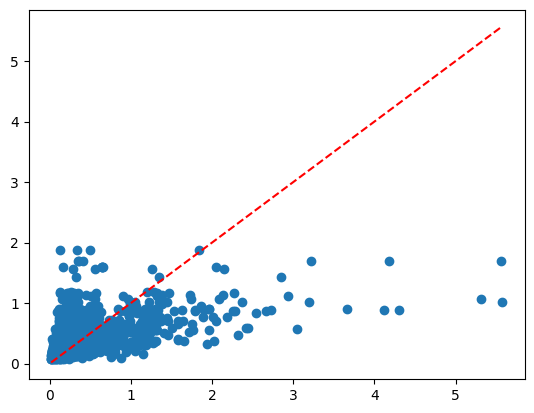

In [495]:
# Split data into features and target variable
X = transformer_data.drop(columns=['tgt_pressure'])
y = transformer_data['tgt_pressure']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical features and preprocessing steps
numerical_features = ['Tank Failure Pressure (bar)', 'Liquid Ratio (%)', 'Tank Width (m)',
                      'Tank Length (m)', 'Tank Height (m)', 'BLEVE Height (m)',
                      'Vapour Height (m)', 'Vapour Temperature (K)', 'Liquid Temperature (K)',
                      'Obstacle Distance to BLEVE (m)', 'Obstacle Width (m)',
                      'Obstacle Height (m)', 'Obstacle Thickness (m)', 'Obstacle Angle',
                      'Liquid Critical Pressure (bar)', 'Liquid Boiling Temperature (K)',
                      'Liquid Critical Temperature (K)']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numerical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest Regressor

# Create pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Train model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='y = x')

## Base Claude

In [520]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [522]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

# Data Preparation
data = transformer_data[relevant_cols].copy() # Load your data (11 input features and target peak pressure)
X = data.drop('tgt_pressure', axis=1)
y = data['tgt_pressure']

# Apply Quantile Transformation to the target variable
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
y = quantile_transformer.fit_transform(y.values.reshape(-1, 1)).reshape(-1)

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Normalization (mean 0, std 1)
X_train = (X_train - X_train.mean()) / X_train.std()
X_val = (X_val - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

# Convert to PyTorch tensors
X_train = torch.from_numpy(X_train.values).float()
y_train = torch.from_numpy(y_train).float()
X_val = torch.from_numpy(X_val.values).float()
y_val = torch.from_numpy(y_val).float()
X_test = torch.from_numpy(X_test.values).float()
y_test = torch.from_numpy(y_test).float()

# FT-Transformer Model
class FeatureTokenizer(nn.Module):
    def __init__(self, input_dim, token_dim):
        super(FeatureTokenizer, self).__init__()
        self.linear = nn.Linear(input_dim, token_dim)

    def forward(self, x):
        return self.linear(x)

class TransformerEncoderBlock(nn.Module):
    def __init__(self, token_dim, num_heads, dropout=0.1):
        super(TransformerEncoderBlock, self).__init__()
        self.attention = nn.MultiheadAttention(token_dim, num_heads, dropout=dropout, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(token_dim, token_dim * 4),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(token_dim * 4, token_dim),
            nn.Dropout(dropout)
        )
        self.norm1 = nn.LayerNorm(token_dim)
        self.norm2 = nn.LayerNorm(token_dim)

    def forward(self, x):
        attended = self.attention(x, x, x)[0] + x
        attended = self.norm1(attended)
        ffn_out = self.ffn(attended) + attended
        ffn_out = self.norm2(ffn_out)
        return ffn_out

class TransformerModel(nn.Module):
    def __init__(self, input_dim, token_dim, num_heads, num_layers, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.feature_tokenizer = FeatureTokenizer(input_dim, token_dim)
        self.transformer_blocks = nn.ModuleList([TransformerEncoderBlock(token_dim, num_heads, dropout) for _ in range(num_layers)])
        self.output_layer = nn.Linear(token_dim, 1)

    def forward(self, x):
        x = self.feature_tokenizer(x)
        for block in self.transformer_blocks:
            x = block(x)
        x = self.output_layer(x)
        return x.squeeze(-1)

# Instantiate the model
input_dim = X_train.shape[1]
model = TransformerModel(input_dim, token_dim=72, num_heads=8, num_layers=4, dropout=0.04)

# Training
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=2.38e-6)
num_epochs = 100
early_stop_patience = 16
best_val_loss = float('inf')
best_model_state = None

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch in range(0, X_train.shape[0], 512):
        inputs = X_train[batch:batch+512]
        targets = y_train[batch:batch+512]
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in range(0, X_val.shape[0], 512):
            inputs = X_val[batch:batch+512]
            targets = y_val[batch:batch+512]
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    
    train_loss /= len(X_train)
    val_loss /= len(X_val)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stop_patience:
            print('Early stopping...')
            break

# Load the best model state
model.load_state_dict(best_model_state)

# Evaluation on the test set
model.eval()
test_loss = 0.0
with torch.no_grad():
    for batch in range(0, X_test.shape[0], 512):
        inputs = X_test[batch:batch+512]
        targets = y_test[batch:batch+512]
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

test_loss /= len(X_test)
print(f'Test Loss: {test_loss:.6f}')

# Inverse Quantile Transformation for predictions
predictions = model(X_test).detach().numpy()
predictions = quantile_transformer.inverse_transform(predictions.reshape(-1, 1)).reshape(-1)
y_test_original = quantile_transformer.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

rmse = mean_squared_error(y_test_original, predictions, squared=False)
mape = mean_absolute_percentage_error(y_test_original, predictions)
r2 = r2_score(y_test_original, predictions)

print(f'RMSE: {rmse:.2f}, MAPE: {mape:.2f}%, R^2: {r2:.4f}')

Epoch 1/100, Train Loss: 0.001778, Val Loss: 0.002109
Epoch 2/100, Train Loss: 0.001429, Val Loss: 0.002115
Epoch 3/100, Train Loss: 0.001363, Val Loss: 0.002224
Epoch 4/100, Train Loss: 0.001325, Val Loss: 0.002252
Epoch 5/100, Train Loss: 0.001302, Val Loss: 0.002196
Epoch 6/100, Train Loss: 0.001294, Val Loss: 0.002174
Epoch 7/100, Train Loss: 0.001282, Val Loss: 0.002165
Epoch 8/100, Train Loss: 0.001277, Val Loss: 0.002148
Epoch 9/100, Train Loss: 0.001268, Val Loss: 0.002133
Epoch 10/100, Train Loss: 0.001260, Val Loss: 0.002116
Epoch 11/100, Train Loss: 0.001256, Val Loss: 0.002103
Epoch 12/100, Train Loss: 0.001247, Val Loss: 0.002095
Epoch 13/100, Train Loss: 0.001247, Val Loss: 0.002092
Epoch 14/100, Train Loss: 0.001235, Val Loss: 0.002092
Epoch 15/100, Train Loss: 0.001226, Val Loss: 0.002096
Epoch 16/100, Train Loss: 0.001230, Val Loss: 0.002105
Epoch 17/100, Train Loss: 0.001218, Val Loss: 0.002124
Epoch 18/100, Train Loss: 0.001213, Val Loss: 0.002142
Epoch 19/100, Train

/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [597]:
transformer_data.columns

Index(['tgt_pressure', 'failure_pressure', 'liquid_pct', 'tank_w', 'tank_l',
       'tank_h', 'BLEVE_h', 'vapour_temp', 'liquid_temp', 'superheated_status',
       'vapour_height', 'net_sensor_dist'],
      dtype='object')

In [598]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Data preprocessing
data = transformer_data.copy()
num_features = ['failure_pressure', 'liquid_pct', 'tank_w', 'tank_l', 'tank_h', 
                'BLEVE_h', 'vapour_temp', 'liquid_temp', 'vapour_height', 'net_sensor_dist']
cat_features = ['superheated_status']

X = data[num_features + cat_features]
y = data['tgt_pressure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])

X_train = X_train.values

# Transformer model
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class TransformerModel(nn.Module):
    def __init__(self, num_features, num_cat_features, d_model=128, nhead=8, num_layers=4, dim_feedforward=256, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.num_features = num_features
        self.num_cat_features = num_cat_features
        self.embedding = nn.Embedding(num_embeddings=2, embedding_dim=d_model)
        self.input_layer = nn.Linear(num_features + d_model, d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.output_layer = nn.Linear(d_model, 1)

    def forward(self, x):
        num_features = x[:, :self.num_features]
        cat_features = x[:, self.num_features:]

        cat_embeddings = self.embedding(cat_features.long())
        input_embeddings = torch.cat([num_features, cat_embeddings], dim=1)
        input_embeddings = self.input_layer(input_embeddings)
        input_embeddings = self.pos_encoder(input_embeddings)

        output = self.transformer_encoder(input_embeddings)
        output = self.output_layer(output.mean(dim=1))
        return output

# Instantiate the model
model = TransformerModel(num_features=len(num_features), num_cat_features=len(cat_features))

# Training loop
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    inputs = torch.tensor(X_train, dtype=torch.float32)
    targets = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Prediction
test_input = X_test
test_output = model(torch.tensor(test_input, dtype=torch.float32))
predicted_pressure = test_output.detach().numpy()

/Users/phillipharvey/Documents/Venvs/MLenv/lib/python3.12/site-packages/torch/nn/modules/transformer.py:286: UserWarning:

enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)



RuntimeError: Tensors must have same number of dimensions: got 2 and 3

## GPT 4

In [559]:
### DATA PROCESSING
X = transformer_data[relevant_cols].drop(columns=['tgt_pressure'])  # Features
y = transformer_data[relevant_cols]['tgt_pressure']  # Target

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define your FT-Transformer model
class FTTransformer(nn.Module):
    def __init__(self, input_dim, output_dim, num_layers, token_dim, num_heads, dropout_prob):
        super(FTTransformer, self).__init__()
        # Feature Tokenizer (linear projection)
        self.feature_tokenizer = nn.Linear(input_dim, token_dim)
        # Transformer Encoder layers
        self.transformer_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(d_model=token_dim, nhead=num_heads, dropout=dropout_prob)
            for _ in range(num_layers)
        ])
        # Prediction Head (linear layer)
        self.prediction_head = nn.Linear(token_dim, output_dim)

    def forward(self, x):
        # Tokenize features
        tokens = self.feature_tokenizer(x)
        # Apply Transformer layers
        for layer in self.transformer_layers:
            tokens = layer(tokens)
        # Get [CLS] token embedding
        cls_token = tokens.mean(dim=0)
        # Predict pressure
        pressure_prediction = self.prediction_head(cls_token)
        return pressure_prediction

In [552]:
from torch.utils.data import DataLoader, TensorDataset

In [573]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create a PyTorch dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Create a PyTorch DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [587]:
num_epochs = 10

# Example usage
input_dim = 11  # Number of input features
output_dim = 1  # Single output (pressure prediction)
num_layers = 4
token_dim = 72
num_heads = 8
dropout_prob = 0.04

lr = 1e-4
weight_decay = 2.38e-6

model = FTTransformer(input_dim, output_dim, num_layers, token_dim, num_heads, dropout_prob)
optimizer = optim.AdamW(model.parameters(), lr = lr, weight_decay = weight_decay)
criterion = nn.MSELoss()

best_val_loss = float('inf')
patience = 16  # Number of epochs without improvement before stopping

n_epochs = 4  # Adjust the number of epochs as needed
report_frequency = len(train_loader) // 5  # Adjust reporting frequency

for epoch in range(1, n_epochs + 1):
    for iteration, (x_batch, y_batch) in enumerate(train_loader):
        model.train()
        optimizer.zero_grad()
        # Forward pass
        predictions = model(x_batch)
        print(predictions)
        # Compute loss
        loss = criterion(predictions, y_batch.view(-1, 1))
        # Backpropagation
        loss.backward()
        optimizer.step()
        if iteration % report_frequency == 0:
            print(f'(epoch) {epoch} (batch) {iteration} (loss) {loss.item():.4f}')


    with torch.no_grad():
        model.eval()
        val_predictions = model(X_val_tensor)
        val_loss = criterion(val_predictions.squeeze(-1), y_val_tensor)

    # Check if validation loss improved
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping at epoch {epoch}.")
            break

# Load the best model for evaluation
model.load_state_dict(torch.load('best_model.pth'))

with torch.no_grad():
    model.eval()
    test_predictions = model(X_test_tensor)


# Calculate metrics (you can use sklearn.metrics or other libraries)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)
mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"MAPE: {mape:.4f}")

tensor([-0.9312], grad_fn=<ViewBackward0>)
(epoch) 1 (batch) 0 (loss) 1.8359
tensor([0.0001], grad_fn=<ViewBackward0>)
tensor([0.7984], grad_fn=<ViewBackward0>)
tensor([1.0904], grad_fn=<ViewBackward0>)
tensor([1.0371], grad_fn=<ViewBackward0>)
tensor([0.8627], grad_fn=<ViewBackward0>)
tensor([0.6027], grad_fn=<ViewBackward0>)
tensor([0.3943], grad_fn=<ViewBackward0>)
tensor([0.2290], grad_fn=<ViewBackward0>)
tensor([0.0730], grad_fn=<ViewBackward0>)
tensor([0.0006], grad_fn=<ViewBackward0>)
tensor([-0.0231], grad_fn=<ViewBackward0>)
tensor([0.0228], grad_fn=<ViewBackward0>)
tensor([0.0520], grad_fn=<ViewBackward0>)
tensor([0.1053], grad_fn=<ViewBackward0>)
tensor([0.1839], grad_fn=<ViewBackward0>)
tensor([0.2669], grad_fn=<ViewBackward0>)
tensor([0.3401], grad_fn=<ViewBackward0>)
tensor([0.4392], grad_fn=<ViewBackward0>)
(epoch) 1 (batch) 18 (loss) 0.2349
tensor([0.5077], grad_fn=<ViewBackward0>)
tensor([0.5548], grad_fn=<ViewBackward0>)
tensor([0.5704], grad_fn=<ViewBackward0>)
tenso

KeyboardInterrupt: 

In [586]:
model(X_train_tensor)

tensor([0.3649], grad_fn=<ViewBackward0>)

In [595]:
import torch
from torch import nn
from transformers import BertModel, BertTokenizer, BertConfig

class BLEVEPredictor(nn.Module):
    def __init__(self, feature_size, hidden_size=512, num_layers=2, dropout=0.1):
        super(BLEVEPredictor, self).__init__()

        # Load pre-trained BERT model
        self.bert = BertModel(BertConfig())

        # Feature extraction layers (you can adjust sizes as needed)
        self.feature_extractor = nn.Sequential(
            nn.Linear(feature_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # Prediction head for tgt_pressure
        self.prediction_head = nn.Sequential(
            nn.Linear(hidden_size * num_layers, 1)  # Adjust this layer's input size based on your architecture
        )

    def forward(self, features):
        x = self.feature_extractor(features)

        # You might want to modify this part to fit the FT-Transformer structure in the provided image.
        bert_outputs = self.bert(inputs_embeds=x)

        x = bert_outputs.last_hidden_state

        pressure_prediction = self.prediction_head(x[:, 0, :])

        return pressure_prediction

# Example usage:
# Initialize model with feature size equal to length of your feature vector.
model = BLEVEPredictor(feature_size=11)


In [596]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for features, targets in train_loader:  # Assuming you have a DataLoader
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss:.4f}")

# Save the trained model
torch.save(model.state_dict(), "bleve_model.pth")

ValueError: not enough values to unpack (expected 2, got 1)

## Google

In [622]:
### DATA PROCESSING
data = transformer_data.copy()
data["superheated_status"] = data['superheated_status'].map({0: 'subheated', 1: 'superheated'})

X = data.drop(columns=['tgt_pressure'])  # Features
y = data['tgt_pressure']  # Target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


NUMERIC_FEATURES = ['failure_pressure', 'liquid_pct', 'tank_w', 'tank_l', 'tank_h', 
                'BLEVE_h', 'vapour_temp', 'liquid_temp', 'vapour_height', 'net_sensor_dist']
CATEGORICAL_FEATURES = ['superheated_status']

category_prep_layers = build_categorical_prep(X_train, CATEGORICAL_FEATURES)

100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 23.45it/s]


In [623]:
from tabtransformertf.models.fttransformer import FTTransformerEncoder, FTTransformer

In [632]:
ft_linear_encoder = FTTransformerEncoder(
    numerical_features = NUMERIC_FEATURES,  
    categorical_features = CATEGORICAL_FEATURES, 
    numerical_data = X_train[NUMERIC_FEATURES],
    categorical_data = X_train[CATEGORICAL_FEATURES],
    
    depth=4,  # Number of Transformer Blocks (layers)
    heads=8,  # Number of attention heads in a Transofrmer Block
    # attn_dropout=0.2,  # Dropout for attention layers
    ff_dropout=0.04,  # Dropout in Dense layers
    explainable=True  # Whether we want to output attention importances or not
)

# Pass the encoder to the model
ft_linear_transformer = FTTransformer(
    encoder=ft_linear_encoder,  # Encoder from above
    out_dim=1,  # Number of outputs in final layer
    # out_activation='sigmoid',  # Activation function for final layer
    final_layer_size=32,  # Pre-final layer, takes CLS contextual embeddings as input 
)

InvalidIndexError: (slice(None, None, None), 0)

### Bottom